In [1]:
import redback
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
bands = ['F160W', 'F110W','lssty', 'lsstz','lssti', 'lsstr','lsstg','lsstu', 'uvot::uvw1']
frequencies=[5e9, 2e17]
bandfreqs = (redback.utils.bands_to_frequency(bands))
print(bandfreqs)
frequencies.extend(bandfreqs)
frequencies.sort()
frequencies

[1.952e+14 2.601e+14 3.083e+14 3.454e+14 3.983e+14 4.825e+14 6.273e+14
 8.152e+14 1.141e+15]


[5000000000.0,
 195200000000000.0,
 260100000000000.0,
 308300000000000.0,
 345400000000000.0,
 398300000000000.0,
 482500000000000.0,
 627300000000000.0,
 815200000000000.0,
 1141000000000000.0,
 2e+17]

In [9]:

def fixed_kilonova(model, frequency, mej):
    time= np.linspace(0.1,30,50)
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model=model, mej=mej, mej_1=0.015, mej_2=0.015, vej=0.33, vej_1=0.15, vej_2=0.35, kappa=1, kappa_1=1, kappa_2=25, 
        beta=4, temperature_floor_1=3000, temperature_floor_2=3000, output_format='flux_density', frequency=frequency )
    return kn_fluxd

def fixed_afterglow(model, frequency):
    time= np.linspace(0.1,50,200)
    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model=model,  thv= 0.2, loge0=51.0 , thc= 0.03, logn0=-3.1, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=1, xiN=1, g0=1000, thw=3,
        beta=4, output_format='flux_density', frequency=frequency)
    return ag_fluxd
   
def combined(model1, model2, frequency, mej):
    time=np.linspace(0.1,30,50)
    combined= fixed_kilonova(model1, frequency, mej) + fixed_afterglow(model2, frequency)
    return combined

In [16]:
0.5*2e30*0.02*(3e8*0.33)**2*1e7 #approx KE of kilonovaes in ergs

1.9601999999999997e+51

In [4]:
#kilonova models
ax1= plt.subplot()

time1= np.linspace(0.1,30,50)
frequency=frequencies[4]

ax1.loglog(time1, fixed_kilonova(model='two_component_kilonova_model', frequency=frequency, mej=0), label='two component', ls='dashed')
ax1.loglog(time1, fixed_kilonova(model='two_layer_stratified_kilonova', frequency=frequency, mej=0.035), label='stratified',ls='dashed')
ax1.loglog(time1, fixed_kilonova(model='metzger_kilonova_model', frequency=frequency,mej= 0.02), label='metzger',ls='dashed')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Flux Density (mJy)')
ax1.set_ylim(1e-12,1.0)
ax1.legend()
plt.savefig('kn
plt.show()

SyntaxError: EOL while scanning string literal (3792358251.py, line 15)

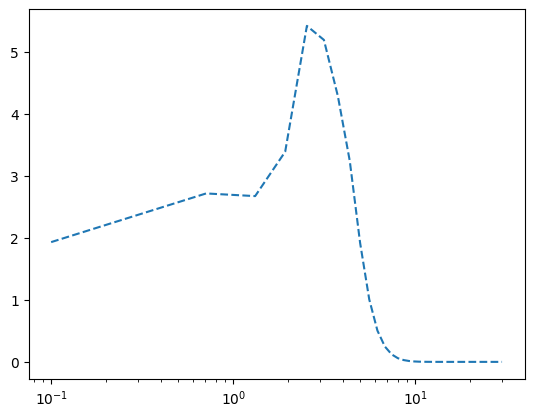

In [10]:
plt.semilogx(time1, fixed_kilonova(model='two_layer_stratified_kilonova', frequency=frequency,mej=0.035)/fixed_kilonova(model='two_component_kilonova_model', frequency=frequency, mej=0), label='stratified',ls='dashed')

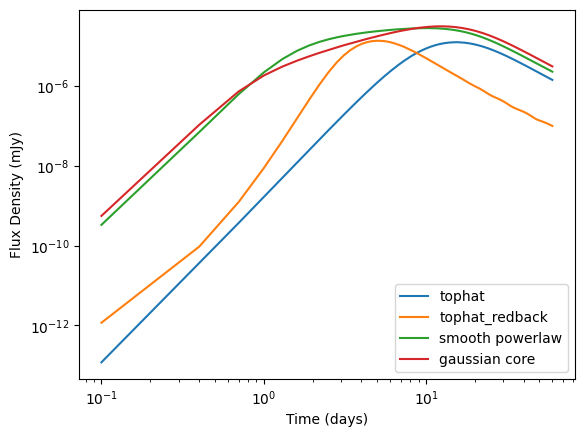

15.752261306532663 13.645226130653267 10.033165829145728 12.441206030150754


In [10]:
#afterglow models
ax2= plt.subplot()

time2= np.linspace(0.1,60,200)
frequency=frequencies[7]

ax2.loglog(time2, fixed_afterglow(model='tophat', frequency=frequency), label='tophat')
ax2.loglog(time2, fixed_afterglow(model='tophat_redback', frequency=frequency), label='tophat_redback')
ax2.loglog(time2, fixed_afterglow(model='smoothpowerlaw', frequency=frequency), label='smooth powerlaw')
ax2.loglog(time2, fixed_afterglow(model='gaussiancore', frequency=frequency), label='gaussian core')

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Flux Density (mJy)')
#ax2.set_ylim(1e-9,1e-2)
ax2.legend()
plt.savefig('afterglow_model_comparison.png', dpi='figure')
plt.show()

peak1=(time2[np.argmax(fixed_afterglow(model='tophat', frequency=frequency))])
peak2=(time2[np.argmax(fixed_afterglow(model='powerlawcore', frequency=frequency))])
peak3=(time2[np.argmax(fixed_afterglow(model='smoothpowerlaw', frequency=frequency))])
peak4=(time2[np.argmax(fixed_afterglow(model='gaussiancore', frequency=frequency))])
print(peak1,peak2,peak3,peak4)

order of peaking (earliest to latest): smoothpowerlaw, gaussiancore, powerlawcore, tophat

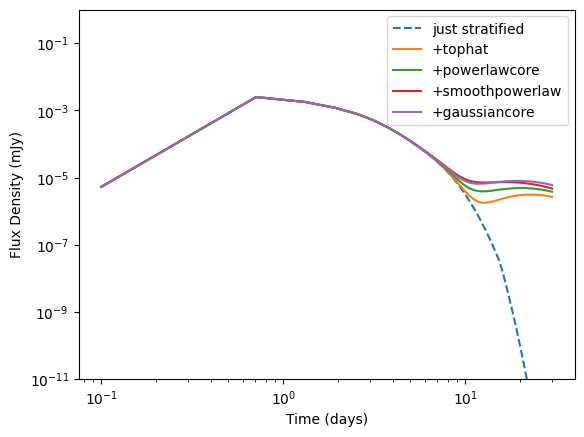

In [214]:
#twolayer strtified +afterglow models
ax3= plt.subplot()

model1 = 'two_layer_stratified_kilonova'
mej=0.035
frequency=frequencies[4]

ax3.loglog(time1, fixed_kilonova(model='two_layer_stratified_kilonova', frequency=frequency,mej=0.035), label='just stratified',ls='dashed')
ax3.loglog(time1, combined(model1=model1, model2='tophat', frequency=frequency, mej=mej), label='+tophat')
ax3.loglog(time1, combined(model1=model1, model2='powerlawcore', frequency=frequency, mej=mej), label='+powerlawcore')
ax3.loglog(time1, combined(model1=model1, model2='smoothpowerlaw', frequency=frequency, mej=mej), label='+smoothpowerlaw')
ax3.loglog(time1, combined(model1=model1, model2='gaussiancore', frequency=frequency, mej=mej), label='+gaussiancore')
  
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Flux Density (mJy)')
ax3.set_ylim(1e-11,1)
ax3.legend()
plt.show()

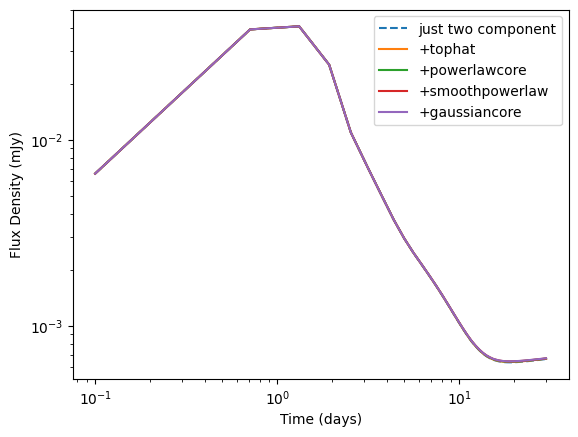

In [236]:
#combined model two component kilonova + afterglow models
ax4= plt.subplot()

model1 = 'two_component_kilonova_model'
mej=0.0
frequency=frequencies[4]

ax4.loglog(time1, fixed_kilonova(model='two_component_kilonova_model', frequency=frequency, mej=0), label='just two component', ls='dashed')
ax4.loglog(time1, combined(model1=model1, model2='tophat', frequency=frequency, mej=mej), label='+tophat')
ax4.loglog(time1, combined(model1=model1, model2='powerlawcore', frequency=frequency, mej=mej), label='+powerlawcore')
ax4.loglog(time1, combined(model1=model1, model2='smoothpowerlaw', frequency=frequency, mej=mej), label='+smoothpowerlaw')
ax4.loglog(time1, combined(model1=model1, model2='gaussiancore', frequency=frequency, mej=mej), label='+gaussiancore')
  
ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Flux Density (mJy)')
#ax4.set_ylim(1e-5,1)
ax4.legend()
plt.show()

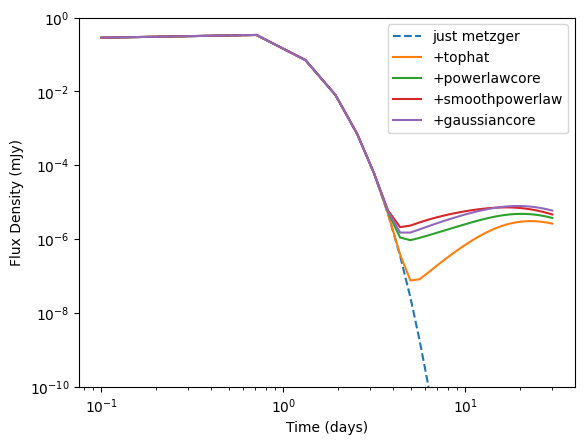

In [216]:
ax5= plt.subplot()

model1 = 'metzger_kilonova_model'
mej=0.02
frequency=frequencies[4]

ax5.loglog(time1, fixed_kilonova(model='metzger_kilonova_model', frequency=frequency,mej= 0.02), label='just metzger',ls='dashed')
ax5.loglog(time1, combined(model1=model1, model2='tophat', frequency=frequency, mej=mej), label='+tophat')
ax5.loglog(time1, combined(model1=model1, model2='powerlawcore', frequency=frequency, mej=mej), label='+powerlawcore')
ax5.loglog(time1, combined(model1=model1, model2='smoothpowerlaw', frequency=frequency, mej=mej), label='+smoothpowerlaw')
ax5.loglog(time1, combined(model1=model1, model2='gaussiancore', frequency=frequency, mej=mej), label='+gaussiancore')
  
ax5.set_xlabel('Time (days)')
ax5.set_ylabel('Flux Density (mJy)')
ax5.set_ylim(1e-10,1)
ax5.legend()
plt.show()

In [205]:
const= (0.2/0.03)**(8/3)*(10e51/10e52)**(1/3)
const1=(peak1/const)
const2=(peak2/const)
const3=(peak3/const)
const4=(peak4/const)
print(const1,const2,const3,const4)
#constants.extend([const1,const2,const3,const4])

0.21040606361674916 0.1877096414834099 0.15366500828340104 0.1820355359500751


In [231]:
altconst= ((10e51/10**(-3.1))**(1/3)*(0.20-0.03)**2)
alt1=(peak1/altconst)
alt2=(peak2/altconst)
alt3=(peak3/altconst)
alt4=(peak4/altconst)
print(alt1,alt2,alt3,alt4)
#altconsts.extend([alt1,alt2,alt3,alt4])

6.742595018246716e-16 6.015273855644557e-16 4.92429211174132e-16 5.833443564994018e-16


In [232]:
#averaged over viewing angles 0.15-0.3
avconst1= (constants[0]+constants[4]+constants[8]+constants[12])/4
avconst2= (constants[1]+constants[5]+constants[9]+constants[13])/4
avconst3= (constants[2]+constants[6]+constants[10]+constants[14])/4
avconst4= (constants[3]+constants[7]+constants[11]+constants[15])/4
avconst=[0.21115274892859173, 0.18536923173048564, 0.12806323995141866, 0.16845465428848028]

In [233]:
#averaged over viewing angles 0.15-0.3
avalt1= (altconsts[0]+altconsts[4]+altconsts[8]+altconsts[12])/4
avalt2= (altconsts[1]+altconsts[5]+altconsts[9]+altconsts[13])/4
avalt3= (altconsts[2]+altconsts[6]+altconsts[10]+altconsts[14])/4
avalt4= (altconsts[3]+altconsts[7]+altconsts[11]+altconsts[15])/4
avalt=[2.3988155594838976e-16, 2.108614386488961e-16, 1.4818515610083146e-16, 1.9267620328705883e-16]

In [234]:
def peak_2(thv, altconst):
    return altconst*(10e51/10**(-3.1))**(1/3)*(thv-0.03)**2

def peak_83(thv, constant):
    return constant*(thv/0.03)**(8/3)*(10e51/10e52)**(1/3)


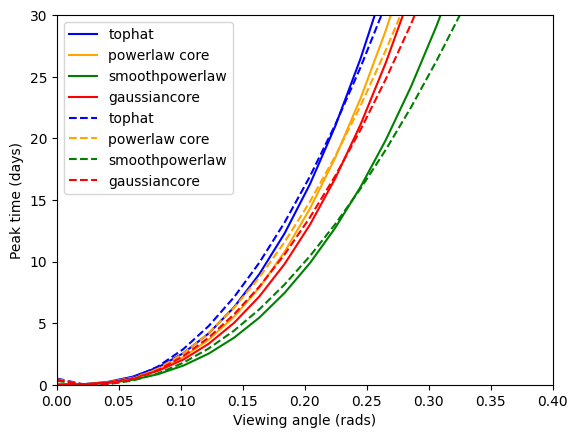

In [235]:
t_view= np.linspace(0,1.0,50)

plt.plot(t_view, peak_83(t_view, avconst[0]), label='tophat', color='b')
plt.plot(t_view, peak_83(t_view, avconst[1]), label='powerlaw core', color='orange')
plt.plot(t_view, peak_83(t_view, avconst[2]), label='smoothpowerlaw', color='g')
plt.plot(t_view, peak_83(t_view, avconst[3]), label='gaussiancore', color='r')

#dashed lines for alternative relation
plt.plot(t_view, peak_2(t_view, avalt[0]), label='tophat', color='b', ls='--')
plt.plot(t_view, peak_2(t_view, avalt[1]), label='powerlaw core', color='orange', ls='--')
plt.plot(t_view, peak_2(t_view, avalt[2]), label='smoothpowerlaw', color='g', ls='--')
plt.plot(t_view, peak_2(t_view, avalt[3]), label='gaussiancore', color='r', ls='--')

plt.legend()
plt.ylim(0,30)
plt.xlim(0,0.4)
plt.xlabel('Viewing angle (rads)')
plt.ylabel('Peak time (days)')

plt.savefig(fname="afterglow_peaktimes.png", dpi='figure')

note figure for lsstz band, will be greater viewing angle for higher freqs/UV and less towards red

In [191]:
#constants=[]
#altconsts=[]

In [5]:
kn_priors = redback.priors.get_priors(model='two_component_kilonova_model')
kn_priors['redshift']=0.01
#kn_priors['beta']=Uniform(minimum=3.001, maximum=8, name='beta', latex_label='$\\beta$', unit=None, boundary=None)
samples=kn_priors.sample(5000)
kn_data= pd.DataFrame.from_dict(samples)
kn_data

,redshift,mej_1,vej_1,kappa_1,temperature_floor_1,mej_2,vej_2,kappa_2,temperature_floor_2
0,0.01,0.010326,0.191799,24.823107,529.133479,0.021450,0.438830,6.714118,503.034715
1,0.01,0.026282,0.281664,9.372182,472.502331,0.022175,0.443546,22.423111,3115.621958
2,0.01,0.017223,0.463098,9.305103,4631.178918,0.026939,0.494231,22.652369,3182.938740
3,0.01,0.011682,0.113605,28.028494,2292.451378,0.023820,0.252824,20.468778,2690.522851
4,0.01,0.021578,0.319621,19.290695,929.080584,0.025502,0.275291,8.357557,296.267140
...,...,...,...,...,...,...,...,...,...
4995,0.01,0.025320,0.291954,5.685175,2162.385805,0.013347,0.450570,28.509140,366.315716
4996,0.01,0.025382,0.157227,2.659913,249.782893,0.024506,0.319086,4.126862,141.475630
4997,0.01,0.017602,0.238132,15.696177,241.954512,0.027857,0.461347,8.042379,821.196750
4998,0.01,0.010316,0.220741,29.184709,1749.634416,0.026145,0.255340,24.716388,1109.484946


In [6]:
time= np.linspace(0.1,40,300)
maximumkn= []
minimumkn= []
lowerkn=[]
mediankn=[]
upperkn=[]

for j in range(1,10): #loop each freqeuncy
    maximum= []
    minimum= []
    lower=[]
    median=[]
    upper=[]
    
    for i in range(300): #loop each point in time
        pointintime=[]
        
        for k in range(200): #loop each flux
            offflux = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, av=0.5,
                base_model='two_component_kilonova_model', output_format='flux_density', frequency=frequencies[j], **kn_data.iloc[k])
            pointintime.append(offflux[i])
        
        maximum.append(max(pointintime))
        minimum.append(min(pointintime))
        lower.append(np.nanpercentile(pointintime,16))
        median.append(np.nanpercentile(pointintime,50))
        upper.append(np.nanpercentile(pointintime,84))
        
    maximumkn.append(maximum)
    minimumkn.append(minimum)
    lowerkn.append(lower)
    mediankn.append(median)
    upperkn.append(upper)
        

In [10]:
loweroff=[[5.0680053909420487e-23, 1.0785494245357403e-20, 2.2422623590590607e-19, 1.5807961330769654e-18, 5.3232506323423364e-18, 1.2131187864978725e-17, 2.771534164885547e-17, 6.192937327608511e-17, 1.3632576053656792e-16, 2.7543284522546907e-16, 4.384693902999342e-16, 7.49677364367286e-16, 1.1819923629822615e-15, 1.6872416947646846e-15, 2.3661614576741457e-15, 3.2881547876796843e-15, 4.6204064161451566e-15, 6.014344748757002e-15, 7.718606326791969e-15, 9.775800517386402e-15, 1.21009801579095e-14, 1.4679450403467222e-14, 1.7653354846524698e-14, 2.106129205927872e-14, 2.5271964702854675e-14, 3.015900634659632e-14, 3.575271393652988e-14, 4.1623511011359233e-14, 4.799877685864045e-14, 5.5076353660381973e-14, 6.290998752504587e-14, 7.155140103003325e-14, 8.104231697583033e-14, 9.145604287224521e-14, 1.0284008621538959e-13, 1.1524001733379498e-13, 1.287262115895047e-13, 1.4336414226248584e-13, 1.592132640430081e-13, 1.7633300165888364e-13, 1.9479078114818993e-13, 2.1465695393725097e-13, 2.359881454678896e-13, 2.5886086244043256e-13, 2.833462104974452e-13, 3.0951466122974015e-13, 3.3742906638831017e-13, 3.671842673468164e-13, 3.9884466399623413e-13, 4.3248670870616654e-13, 4.682051034586619e-13, 5.060819422622471e-13, 5.461983027857583e-13, 5.885935496859917e-13, 6.333713142763667e-13, 6.806132630248732e-13, 7.304802213505924e-13, 7.830159560218893e-13, 8.382087841454716e-13, 8.962184994022224e-13, 9.572569206875768e-13, 1.0212607064925568e-12, 1.0883065619574752e-12, 1.1586163904059036e-12, 1.2322532235065692e-12, 1.3091653769111381e-12, 1.389633502813322e-12, 1.4737345708275908e-12, 1.5613650181645165e-12, 1.6484051949939226e-12, 1.6267422360275418e-12, 1.675400007619964e-12, 1.7475751441185125e-12, 1.838104411877757e-12, 1.937050210978133e-12, 2.039410550963267e-12, 2.145639750437241e-12, 2.2560609292353834e-12, 2.3703290873433772e-12, 2.4888645791675586e-12, 2.6114385415146787e-12, 2.738754621363724e-12, 2.869711795753827e-12, 3.005840191368443e-12, 3.1458380078790584e-12, 3.291116360593487e-12, 3.4404475309494313e-12, 3.5952577365948613e-12, 3.754228245500735e-12, 3.918943803761874e-12, 4.087836297261407e-12, 4.262423905749354e-12, 4.44202089131566e-12, 4.627176743557964e-12, 4.818308692556635e-12, 4.932298657134613e-12, 4.9031532857571996e-12, 5.113964704258506e-12, 5.351314205015798e-12, 5.489021722706746e-12, 5.700541193302628e-12, 5.957565927498526e-12, 6.222821721084283e-12, 6.497876506421297e-12, 6.7817857521880736e-12, 7.075511347872013e-12, 7.379071402961794e-12, 7.692067790341661e-12, 8.015847047162692e-12, 8.349909316572019e-12, 8.662336098815602e-12, 8.956905155503542e-12, 9.257785604771071e-12, 9.565307219581922e-12, 9.746474966571933e-12, 9.93095427785657e-12, 1.0208491699551632e-11, 1.0220573536981754e-11, 1.0080325778113087e-11, 9.960967649001346e-12, 9.902603775289802e-12, 9.95488286675399e-12, 1.0024486719233702e-11, 9.895154083185687e-12, 9.768681701202644e-12, 9.644908362850561e-12, 9.523780398862998e-12, 9.493658050990138e-12, 9.748816119740011e-12, 9.880858275164792e-12, 9.988421050810366e-12, 1.025855122091806e-11, 1.0572512630287998e-11, 1.0896219949388067e-11, 1.122636535031714e-11, 1.1561913304774465e-11, 1.1907850013660832e-11, 1.2262287289886402e-11, 1.2618997070282016e-11, 1.2985812911656471e-11, 1.336635573739914e-11, 1.3746474046080409e-11, 1.4022779921661606e-11, 1.3897694391308802e-11, 1.3954685433015897e-11, 1.4257848802474325e-11, 1.4643832382938217e-11, 1.504612163881085e-11, 1.5434984519623817e-11, 1.583214788692366e-11, 1.6163406788290907e-11, 1.6383703710553295e-11, 1.6511637297689447e-11, 1.635775477801573e-11, 1.6269562657933376e-11, 1.658352782443127e-11, 1.6922017343028268e-11, 1.726735685328451e-11, 1.763279860837558e-11, 1.8075254662240027e-11, 1.8526636168875478e-11, 1.8984493404018806e-11, 1.9451255948174656e-11, 1.9927522733015748e-11, 2.04111566240771e-11, 2.0903615099264555e-11, 2.140847263659746e-11, 2.194113281968438e-11, 2.248272207899971e-11, 2.268152027812667e-11, 2.259990856249269e-11, 2.2522689387267062e-11, 2.244998135643174e-11, 2.238110734647706e-11, 2.2737268691365744e-11, 2.3270173183295595e-11, 2.3801103502928098e-11, 2.3682438186779616e-11, 2.391180549302938e-11, 2.419067601539673e-11, 2.407723123382337e-11, 2.4351936688912815e-11, 2.4786906371686826e-11, 2.5247683028021144e-11, 2.571851753959899e-11, 2.6197338224430662e-11, 2.6587473310987845e-11, 2.6925154438804133e-11, 2.7270496073960137e-11, 2.769296632869929e-11, 2.8148322030545736e-11, 2.8573091324987493e-11, 2.844104247804446e-11, 2.8312179147962454e-11, 2.8186167564769944e-11, 2.8370404858222412e-11, 2.8679905504098013e-11, 2.8809124201940298e-11, 2.8601619301700733e-11, 2.8397156666242514e-11, 2.8195670740018128e-11, 2.8101833532961946e-11, 2.8023117655587203e-11, 2.8365887730209414e-11, 2.8803811438830016e-11, 2.924824073508418e-11, 2.970081033266018e-11, 3.0239330380156246e-11, 3.015474741823769e-11, 3.007451793197117e-11, 2.9999287086397214e-11, 3.013484788446689e-11, 3.064853630240401e-11, 3.090128211494189e-11, 3.069877769411596e-11, 3.0562653962697653e-11, 3.048007914563875e-11, 3.049514206906568e-11, 3.070489030831801e-11, 3.0721916851511774e-11, 3.052564636832262e-11, 3.0331938354732794e-11, 3.036329583875696e-11, 3.0356857342716806e-11, 3.016534867193667e-11, 2.9975855082439025e-11, 2.9788204979429394e-11, 2.97347300455197e-11, 3.0206931893008515e-11, 3.069000568325956e-11, 3.1184729724086274e-11, 3.1681791768826265e-11, 3.196961196413766e-11, 3.1863896479470525e-11, 3.176056951122139e-11, 3.166028461206586e-11, 3.156269767076046e-11, 3.1468370414679857e-11, 3.1822332053976464e-11, 3.219277378224484e-11, 3.2567951373722964e-11, 3.294555706150867e-11, 3.3329385967896995e-11, 3.371642518405478e-11, 3.410852792938445e-11, 3.4504154120332456e-11, 3.4905096799976444e-11, 3.485550861969622e-11, 3.4652104412668443e-11, 3.445058512636897e-11, 3.425136012953772e-11, 3.4133057553109597e-11, 3.403168131010998e-11, 3.393287662834019e-11, 3.383567315626193e-11, 3.3738474499466294e-11, 3.363375708314577e-11, 3.353167735000346e-11, 3.343165999201905e-11, 3.333462346727089e-11, 3.323883343276016e-11, 3.311751170884461e-11, 3.293371961854218e-11, 3.275187491040933e-11, 3.257167602595708e-11, 3.239316485783483e-11, 3.2216372468661554e-11, 3.2041209456026055e-11, 3.18676528749516e-11, 3.169557108648781e-11, 3.170643097562662e-11, 3.215942551996295e-11, 3.230425066933767e-11, 3.260754821411276e-11, 3.291355650440709e-11, 3.322561354242396e-11, 3.353832715912487e-11, 3.342348519719718e-11, 3.332815575226765e-11, 3.323582148656542e-11, 3.314549489925196e-11, 3.31848491828695e-11, 3.355932443430902e-11, 3.393644703559828e-11, 3.4318244045950037e-11, 3.4707514050927024e-11, 3.469328207006839e-11, 3.451616491198561e-11, 3.4340293420021954e-11, 3.4165056328085763e-11, 3.408336715478309e-11, 3.40098150302433e-11, 3.393835923627482e-11, 3.386879035641611e-11, 3.380152756123766e-11, 3.4068051950315615e-11, 3.442885689900042e-11, 3.479342589766379e-11, 3.5161782353614535e-11, 3.56032246232245e-11], [4.1927799979882114e-23, 1.036656248165782e-20, 1.9783449673339472e-19, 1.270158338948629e-18, 4.230705618044304e-18, 1.1177604951352236e-17, 2.2731140581912876e-17, 5.123440437218043e-17, 1.1278281649223068e-16, 2.2061666365189172e-16, 3.568957708380541e-16, 5.750921849074754e-16, 8.292665744179547e-16, 1.1930979420255177e-15, 1.7610043478382616e-15, 2.4067758469185574e-15, 3.1847647061043832e-15, 4.145581830043016e-15, 5.320299297478243e-15, 6.7382869941697095e-15, 8.435809036090391e-15, 1.0449812881449156e-14, 1.2820561253434763e-14, 1.5591357201568143e-14, 1.8809860425614702e-14, 2.2516560172439537e-14, 2.6618736518283547e-14, 3.093640344432789e-14, 3.5755785311900833e-14, 4.112870242120785e-14, 4.7081218858843945e-14, 5.411840925358949e-14, 6.214700062494173e-14, 7.106908511189591e-14, 8.09613517679879e-14, 9.140621897945242e-14, 1.02103215160616e-13, 1.1371374705271927e-13, 1.262849730002667e-13, 1.398640275821041e-13, 1.5450439186621468e-13, 1.7026186728363661e-13, 1.871813680721045e-13, 2.0532357791047615e-13, 2.2474489645995767e-13, 2.4550122046380444e-13, 2.6764240275133205e-13, 2.912436697201911e-13, 3.163561021552765e-13, 3.430403406413359e-13, 3.713715010132085e-13, 4.0141469869775644e-13, 4.332342429802734e-13, 4.668613571677532e-13, 5.023782396730972e-13, 5.398496668060372e-13, 5.794032022706939e-13, 6.210735610463406e-13, 6.648514764812767e-13, 7.108636939242468e-13, 7.592782241477948e-13, 8.100448258557616e-13, 8.632243401258781e-13, 9.189927765098256e-13, 9.774001305442907e-13, 1.0384054071741615e-12, 1.1022312144523439e-12, 1.1689386032325054e-12, 1.2384454294536903e-12, 1.3074840641862258e-12, 1.2903014116941806e-12, 1.3288958429354266e-12, 1.3861438066575169e-12, 1.4579499228340052e-12, 1.5364318737128304e-12, 1.6176221743389698e-12, 1.7018811817027468e-12, 1.7894651883933846e-12, 1.880100546874322e-12, 1.9741206743716538e-12, 2.071344040895692e-12, 2.1723287660244554e-12, 2.2762015390088594e-12, 2.384176027617533e-12, 2.4952196682614646e-12, 2.6104517311196775e-12, 2.728898412869788e-12, 2.8516909625835974e-12, 2.977783386765e-12, 3.1084326762746537e-12, 3.242395032424672e-12, 3.3808746469002967e-12, 3.5233276052608743e-12, 3.670189752342692e-12, 3.8210954434610106e-12, 3.908331797698631e-12, 3.881870677393103e-12, 3.972238886470149e-12, 4.10380097949024e-12, 4.266160951853274e-12, 4.2536925744070316e-12, 4.239094753003206e-12, 4.411844036596068e-12, 4.610280405118386e-12, 4.81592206101642e-12, 5.028066224119485e-12, 5.248133709987604e-12, 5.4749399451092285e-12, 5.709692767907948e-12, 5.952418051103984e-12, 6.202464478660827e-12, 6.461450559476236e-12, 6.728079407303918e-12, 7.0033948959166166e-12, 7.28794857320361e-12, 7.580306326280133e-12, 7.650052618995473e-12, 7.888371666328844e-12, 7.995525224450092e-12, 7.88677739362725e-12, 7.780581975725911e-12, 7.676830931783448e-12, 7.600275372090573e-12, 7.557675585379234e-12, 7.652093312708044e-12, 7.650160302370355e-12, 7.554076347694255e-12, 7.467257099380984e-12, 7.469137757823559e-12, 7.697786444696236e-12, 7.847900039442087e-12, 8.074842668116543e-12, 8.340352386586704e-12, 8.612413570398438e-12, 8.89094566523033e-12, 9.170692644869427e-12, 9.445083149982835e-12, 9.726216145575112e-12, 1.0009151648825781e-11, 1.0300103089979137e-11, 1.0601942517511869e-11, 1.0903445226078626e-11, 1.1122605861012665e-11, 1.102339036588243e-11, 1.106859459058379e-11, 1.1287826331206999e-11, 1.1512873011759083e-11, 1.1795106382844843e-11, 1.2093265124663677e-11, 1.2397400147914467e-11, 1.2648869354054957e-11, 1.2564708080555147e-11, 1.2484050449645274e-11, 1.252713072553211e-11, 1.280985013906255e-11, 1.2766653772235688e-11, 1.3061278793030022e-11, 1.3363162846532232e-11, 1.3681520908881305e-11, 1.4061412691602675e-11, 1.4453071240141702e-11, 1.485017353104034e-11, 1.5256061477999408e-11, 1.566739498469228e-11, 1.609501748315892e-11, 1.6525652079773932e-11, 1.696677258805658e-11, 1.7382810859302e-11, 1.7794359328603912e-11, 1.793314900396888e-11, 1.7848438717730715e-11, 1.776617340899862e-11, 1.7686939283447864e-11, 1.7609796640318108e-11, 1.7534830118768295e-11, 1.746213885068647e-11, 1.7682144945037956e-11, 1.8028949942660172e-11, 1.8387267717077454e-11, 1.866493545835938e-11, 1.893215469283347e-11, 1.8916910098665568e-11, 1.919518821875695e-11, 1.9601793551416242e-11, 2.006332684137864e-11, 2.053328158755986e-11, 2.066778739671876e-11, 2.0557790133341355e-11, 2.0450566351077467e-11, 2.0584085151925547e-11, 2.0862198779723527e-11, 2.1207118526571036e-11, 2.1554710432367375e-11, 2.190599808879854e-11, 2.2356739127818177e-11, 2.2502872691306975e-11, 2.274836279505491e-11, 2.2850856641068484e-11, 2.2686267648551513e-11, 2.2524091723363345e-11, 2.2364276868073973e-11, 2.2289846956528987e-11, 2.22274109998974e-11, 2.249928979014237e-11, 2.284664265707681e-11, 2.319915563402843e-11, 2.355812534521523e-11, 2.391196809281931e-11, 2.3744743124444546e-11, 2.3579517705233676e-11, 2.3467493304333504e-11, 2.339119483995447e-11, 2.3317656647874575e-11, 2.3247237663407965e-11, 2.317751206505518e-11, 2.3324617323291402e-11, 2.3730975440116618e-11, 2.4060133925265368e-11, 2.4279924374732606e-11, 2.4368047872327903e-11, 2.4212369808573133e-11, 2.405872424761335e-11, 2.3907127833446412e-11, 2.3757477248171882e-11, 2.360977626883003e-11, 2.346298578660144e-11, 2.3317147340511524e-11, 2.3208329162518894e-11, 2.3334456260642548e-11, 2.3190429557606582e-11, 2.3048091795862644e-11, 2.2924814886283437e-11, 2.3074187391200014e-11, 2.3416830208450862e-11, 2.3792561230314138e-11, 2.4173565383604546e-11, 2.4557007599884465e-11, 2.4946015216350826e-11, 2.5240876558854922e-11, 2.5534703985443608e-11, 2.583228780984986e-11, 2.6131797554677926e-11, 2.6436243439707178e-11, 2.674323568219602e-11, 2.7054244220994116e-11, 2.7368047490730283e-11, 2.7686067699522806e-11, 2.7646735285571865e-11, 2.748539888595063e-11, 2.7325557570075793e-11, 2.716753604154902e-11, 2.7073700658172595e-11, 2.6993290924806318e-11, 2.6914920905545682e-11, 2.6837820935761632e-11, 2.6760724785369393e-11, 2.6677664896030507e-11, 2.65966971674858e-11, 2.6517365276210657e-11, 2.6440397725915673e-11, 2.636441886828346e-11, 2.6268188753781934e-11, 2.6122408317076398e-11, 2.5978172507360207e-11, 2.5835242134099453e-11, 2.56936504257574e-11, 2.5553422020620443e-11, 2.5414486006373896e-11, 2.5276824183492827e-11, 2.5140332138432328e-11, 2.514894599868401e-11, 2.5508252769665904e-11, 2.562312536014057e-11, 2.586369528051242e-11, 2.6106415313356152e-11, 2.6353933099373395e-11, 2.6601971671280452e-11, 2.6494367938817142e-11, 2.6333456643952222e-11, 2.6174310807651126e-11, 2.6016506240797194e-11, 2.5860095081510518e-11, 2.5782690095568356e-11, 2.571724638949891e-11, 2.565389878250209e-11, 2.5612487307839127e-11, 2.59349146551134e-11, 2.626163315665167e-11, 2.659109865811813e-11, 2.6924656930096403e-11, 2.703428716678572e-11, 2.6975947001991974e-11, 2.691926960726446e-11, 2.6864088877396104e-11, 2.681073729061664e-11, 2.7022139434030583e-11, 2.7308323147912074e-11, 2.7597492435594668e-11, 2.7889665863316415e-11, 2.8239809586792944e-11], [3.649141515195658e-23, 9.022427491983477e-21, 1.8218350211795905e-19, 1.100796625464876e-18, 3.671601577581614e-18, 9.46934331694024e-18, 1.970227722473019e-17, 4.459131938488397e-17, 9.815932580769041e-17, 1.8767274794904043e-16, 3.0305043633135694e-16, 4.511094206702159e-16, 6.523094925190285e-16, 9.740647583274778e-16, 1.3826544134801379e-15, 1.8635812597559864e-15, 2.4659827921354593e-15, 3.209949368215724e-15, 4.119540288626181e-15, 5.22727380604237e-15, 6.578838770768706e-15, 8.1245556230647e-15, 9.934128486606368e-15, 1.2072483248576958e-14, 1.4564589981522896e-14, 1.7434710268199842e-14, 2.0737709950605548e-14, 2.4506899777545293e-14, 2.878347155744491e-14, 3.3631345493410214e-14, 3.908455330236836e-14, 4.483739223328398e-14, 5.0882320853328283e-14, 5.75319328848989e-14, 6.48217983912361e-14, 7.277540024640933e-14, 8.159473551975412e-14, 9.196574288149353e-14, 1.033317327181615e-13, 1.1576012349419676e-13, 1.2932203849398712e-13, 1.4409256896626503e-13, 1.5857463602655624e-13, 1.7394419097461594e-13, 1.903973697918233e-13, 2.0798152658082259e-13, 2.267388952153432e-13, 2.4673320532162853e-13, 2.680077310618248e-13, 2.9061384538375195e-13, 3.1461518424804037e-13, 3.4006691155920036e-13, 3.6702350828194316e-13, 3.9551142589802225e-13, 4.2560030052315745e-13, 4.573450087716446e-13, 4.908536189205739e-13, 5.261555404953683e-13, 5.63242923056982e-13, 6.022231415955233e-13, 6.432385299734863e-13, 6.862465252192786e-13, 7.312986701325712e-13, 7.785440749099743e-13, 8.280250943227706e-13, 8.797069985470977e-13, 9.33778374680753e-13, 9.902909432395067e-13, 1.049175114153033e-12, 1.1076626467917782e-12, 1.0931060010478103e-12, 1.1258020858652638e-12, 1.1743009033704066e-12, 1.2351329661683502e-12, 1.3016206028570067e-12, 1.3704026750433652e-12, 1.4417844667370922e-12, 1.5159831015999664e-12, 1.5927667533612608e-12, 1.6724178834423092e-12, 1.7547827048912418e-12, 1.8403340404566864e-12, 1.9283320465548458e-12, 2.019804907382951e-12, 2.1138778649616784e-12, 2.2114991325832044e-12, 2.311843732264952e-12, 2.4158700254702634e-12, 2.5226918767913298e-12, 2.6333741724947192e-12, 2.746863202340712e-12, 2.8641791226630333e-12, 2.984861144894183e-12, 3.109278504161516e-12, 3.2371214368737353e-12, 3.311025550643145e-12, 3.28860845558437e-12, 3.365165786104809e-12, 3.4766213825160742e-12, 3.5925053381274574e-12, 3.5563344438933615e-12, 3.5346043320783065e-12, 3.514815483844145e-12, 3.5702711699832754e-12, 3.728997909317694e-12, 3.893262432427172e-12, 4.063662032818093e-12, 4.2392794879748035e-12, 4.421050034576651e-12, 4.608993706029161e-12, 4.8026061843413685e-12, 5.003140690852718e-12, 5.209593038610057e-12, 5.422771505460672e-12, 5.643103158308873e-12, 5.86947755477597e-12, 6.1036697900726644e-12, 6.2847635593771464e-12, 6.384700215878566e-12, 6.5808507741911165e-12, 6.591483797683563e-12, 6.5035889169056136e-12, 6.417577506940234e-12, 6.333450514977757e-12, 6.280027930707715e-12, 6.245788944751017e-12, 6.359545704638136e-12, 6.3260440333726025e-12, 6.327637272759052e-12, 6.4834944670328185e-12, 6.522962801519319e-12, 6.555174285986221e-12, 6.7423096880030486e-12, 6.944378475612499e-12, 7.15097514390908e-12, 7.361147790957524e-12, 7.576287478281293e-12, 7.807621857503905e-12, 8.061039703232968e-12, 8.319173545548561e-12, 8.588268765399827e-12, 8.860443463287099e-12, 9.13718698718965e-12, 9.338697184727762e-12, 9.37699289520745e-12, 9.562719678983289e-12, 9.753372711521145e-12, 9.992472652692815e-12, 1.0245064106901251e-11, 1.0502718493722185e-11, 1.0715755924991812e-11, 1.0644456930598187e-11, 1.057612612077437e-11, 1.0612622483307881e-11, 1.082891301812633e-11, 1.0720356453115994e-11, 1.0610689373571355e-11, 1.0559667129408058e-11, 1.0738312472842235e-11, 1.1035553921847613e-11, 1.1341974805453129e-11, 1.1652662687970366e-11, 1.1970154282990107e-11, 1.229189947192937e-11, 1.2626331395612378e-11, 1.296313121770865e-11, 1.3308070515826275e-11, 1.3659552133411046e-11, 1.4019762371892311e-11, 1.438508757748817e-11, 1.475795643009682e-11, 1.5050987771557453e-11, 1.4983862914262604e-11, 1.4918509900325264e-11, 1.485500043359052e-11, 1.479341849572401e-11, 1.495796705014283e-11, 1.5171906002599266e-11, 1.5421802933483703e-11, 1.55103532774911e-11, 1.5420587437510805e-11, 1.5401870052452625e-11, 1.5745022975680292e-11, 1.5891353200615757e-11, 1.6094195934546877e-11, 1.637386026994872e-11, 1.665621529821984e-11, 1.694061275596889e-11, 1.7265164407693974e-11, 1.7438241020061672e-11, 1.763819755629013e-11, 1.7839512996440887e-11, 1.8042750867814155e-11, 1.830317706652496e-11, 1.8596582479604047e-11, 1.8637869626915986e-11, 1.857940929489347e-11, 1.8567876525496837e-11, 1.8906064750288858e-11, 1.9081758423120568e-11, 1.8946367904447863e-11, 1.888331303817406e-11, 1.8830419103271248e-11, 1.906074694332544e-11, 1.9355014236134693e-11, 1.965365302476245e-11, 1.9957761771708237e-11, 2.0257527103535164e-11, 2.0115858951583382e-11, 1.997588475979521e-11, 1.9880980930520946e-11, 1.9816343080381775e-11, 1.9754043653023018e-11, 1.9694386728051453e-11, 1.9635317219721605e-11, 1.975994053572075e-11, 2.010419536800285e-11, 2.0383048907300677e-11, 2.054637537968792e-11, 2.0445502523909303e-11, 2.0310120228360715e-11, 2.0176283006986207e-11, 2.0247080407247265e-11, 2.012664693254527e-11, 2.0001518938871892e-11, 1.9877162291993473e-11, 1.975361218256977e-11, 1.96315916449532e-11, 1.9511146218726595e-11, 1.9392236136850604e-11, 1.9274830679655285e-11, 1.9402516095666718e-11, 1.954778354733797e-11, 1.9783721005465804e-11, 2.0022009659403316e-11, 2.026360256609623e-11, 2.0518817516149334e-11, 2.0842897127053712e-11, 2.0798334561644194e-11, 2.0746992790526393e-11, 2.0697813222507014e-11, 2.0793637771549103e-11, 2.1103298007046656e-11, 2.141623179417954e-11, 2.1735548850054553e-11, 2.2062288597185804e-11, 2.239632223081432e-11, 2.2735416536911934e-11, 2.307514411979376e-11, 2.3149421283363528e-11, 2.3015550019206295e-11, 2.2936055398996037e-11, 2.2867934600794372e-11, 2.2801541789332168e-11, 2.2736224927017892e-11, 2.267091130038179e-11, 2.2600545366763608e-11, 2.253195185120106e-11, 2.2464744169614885e-11, 2.239953948925812e-11, 2.2335172400702062e-11, 2.2253649033611405e-11, 2.2130148068058744e-11, 2.2007955665773657e-11, 2.1886869191460498e-11, 2.1766916795311376e-11, 2.1648119350169232e-11, 2.1530416781174006e-11, 2.1413793670215074e-11, 2.1298161561160017e-11, 2.1305458974189232e-11, 2.1609853268435343e-11, 2.1707170001460455e-11, 2.191097387336724e-11, 2.2116599258313256e-11, 2.232628916085026e-11, 2.2536420258116087e-11, 2.2445261491160727e-11, 2.230894210062216e-11, 2.2174118355467855e-11, 2.2040430894958682e-11, 2.1907923889000574e-11, 2.1776739699380202e-11, 2.1647018039563743e-11, 2.1518558033711075e-11, 2.141357218918307e-11, 2.1352392255627318e-11, 2.1292739224680988e-11, 2.1234986217445132e-11, 2.1178876268803548e-11, 2.1460151387152896e-11, 2.1790185665764775e-11, 2.2125644315849606e-11, 2.2465266548976458e-11, 2.2713280446937564e-11, 2.289237422262888e-11, 2.313482077985247e-11, 2.337979662876637e-11, 2.3627317498149903e-11, 2.3923949123824765e-11], [3.3213010972338716e-23, 8.313866781132281e-21, 1.7940558583435376e-19, 9.993352155442436e-19, 3.3613692051686812e-18, 8.476421870973762e-18, 1.7906999825134136e-17, 4.058521638127819e-17, 8.934065043825495e-17, 1.6538741402933676e-16, 2.637397057631641e-16, 3.852879497007881e-16, 5.58499345759698e-16, 8.508016792047638e-16, 1.1709100612984026e-15, 1.5781861510882754e-15, 2.0883338845550326e-15, 2.7183669142905717e-15, 3.519548381579338e-15, 4.607420662874585e-15, 5.696856709990847e-15, 6.9400074755727124e-15, 8.48437072068294e-15, 1.0283736500058111e-14, 1.2367673755774417e-14, 1.4764700036269055e-14, 1.7561867226340613e-14, 2.0753830632582415e-14, 2.4375473811188033e-14, 2.848092801014474e-14, 3.309901321466706e-14, 3.828354574823779e-14, 4.408333455553292e-14, 5.054314512843049e-14, 5.753581361418589e-14, 6.458808332156355e-14, 7.226365415224606e-14, 8.061602944681018e-14, 8.967726792350474e-14, 9.947944195201989e-14, 1.1046640095330191e-13, 1.230711844243402e-13, 1.3675969356670557e-13, 1.516017416157019e-13, 1.676649245575068e-13, 1.850176608161552e-13, 2.0296386624461123e-13, 2.2086164456011041e-13, 2.39905399680509e-13, 2.6014111777020157e-13, 2.816257621507629e-13, 3.044087124371283e-13, 3.28538736915057e-13, 3.5403951345860473e-13, 3.8097337638965073e-13, 4.0938944815713855e-13, 4.3938446538543957e-13, 4.709847538224078e-13, 5.041832861979359e-13, 5.390761785450044e-13, 5.757908401067509e-13, 6.142891709124363e-13, 6.546173091682478e-13, 6.969087299092999e-13, 7.412013467371612e-13, 7.874640714729891e-13, 8.358657166465281e-13, 8.864525795453914e-13, 9.391623670649396e-13, 9.915171063794862e-13, 9.784868184046642e-13, 1.0077545087994223e-12, 1.0511679138960063e-12, 1.10562134432919e-12, 1.1651373254182766e-12, 1.226707155711401e-12, 1.2906041082297e-12, 1.3570225398249426e-12, 1.425754932699359e-12, 1.4970541303806761e-12, 1.570782471466335e-12, 1.6473632002039505e-12, 1.72613405035975e-12, 1.8080153944162911e-12, 1.892224198384882e-12, 1.9796092493058855e-12, 2.069432073435079e-12, 2.1625505418830845e-12, 2.2581714362291528e-12, 2.357247982577557e-12, 2.458836958972704e-12, 2.5638515518066722e-12, 2.6718792891518196e-12, 2.7832506894616777e-12, 2.8976884698463722e-12, 2.963843262775812e-12, 2.943776744065906e-12, 3.012306546934698e-12, 3.1120753084466776e-12, 3.2158080872637708e-12, 3.177867543291955e-12, 3.1386072283195914e-12, 3.119740307951004e-12, 3.1024301095656824e-12, 3.1579266142077953e-12, 3.2970351151810465e-12, 3.4413391470444807e-12, 3.590061953826716e-12, 3.74399554691315e-12, 3.903156891726135e-12, 4.067118903229843e-12, 4.236942880228287e-12, 4.411778420339351e-12, 4.592310019019369e-12, 4.778899340709024e-12, 4.970605999914278e-12, 5.168933247788644e-12, 5.37328271731843e-12, 5.549336914819504e-12, 5.620507063934663e-12, 5.7911502584655976e-12, 5.8216458618055604e-12, 5.744653300422814e-12, 5.669347563716204e-12, 5.595784900202294e-12, 5.543227732725541e-12, 5.5132464138761e-12, 5.594051410999104e-12, 5.664143877268831e-12, 5.803658444021033e-12, 5.838988270224902e-12, 5.867822173727304e-12, 5.997372772759657e-12, 6.163449471783566e-12, 6.346558991967996e-12, 6.5328313021739075e-12, 6.7235053024776665e-12, 6.923173055917007e-12, 7.117008436488766e-12, 7.314860220389596e-12, 7.53206087836207e-12, 7.738085319561718e-12, 7.95321211404666e-12, 8.173497353693082e-12, 8.28165566444538e-12, 8.481755060403513e-12, 8.688977444909827e-12, 8.936004071690672e-12, 9.170444089215004e-12, 9.401207939107544e-12, 9.591949307002992e-12, 9.52821568840208e-12, 9.467112155831981e-12, 9.499938134050697e-12, 9.693427279176596e-12, 9.596258247524316e-12, 9.488405747497338e-12, 9.425216507348066e-12, 9.400404679282821e-12, 9.574160302080135e-12, 9.790177559045283e-12, 1.000962027782817e-11, 1.023020929748892e-11, 1.0499605638363622e-11, 1.0784686099505633e-11, 1.107179182437714e-11, 1.1365801842470789e-11, 1.1665365428348987e-11, 1.1972365565921663e-11, 1.2283714660702498e-11, 1.2601463778562048e-11, 1.2926160974472283e-11, 1.3258203032337837e-11, 1.3354208350987984e-11, 1.3297358259611403e-11, 1.324223358332526e-11, 1.3389528165307272e-11, 1.3581034244974992e-11, 1.3804727878159526e-11, 1.3883993150048425e-11, 1.3803639834743647e-11, 1.3778713385795501e-11, 1.3947729555069427e-11, 1.4042292225116847e-11, 1.4016968101762533e-11, 1.4289791394174449e-11, 1.4598179565735545e-11, 1.4954511465838356e-11, 1.5288240696429154e-11, 1.53222408836733e-11, 1.532839228259173e-11, 1.5614674671095093e-11, 1.5907142412774507e-11, 1.6206498587817652e-11, 1.6511434376535216e-11, 1.6546506847388647e-11, 1.64909633057097e-11, 1.6437815986534045e-11, 1.6387236020367945e-11, 1.6443613092443746e-11, 1.6742385062443236e-11, 1.690327642328449e-11, 1.6855928757068825e-11, 1.7062105244242638e-11, 1.7325516722018327e-11, 1.7592841316208177e-11, 1.7865062308465814e-11, 1.8133395320567285e-11, 1.8006581983946963e-11, 1.7881284984890802e-11, 1.7796332431458672e-11, 1.773847227492255e-11, 1.768270534252417e-11, 1.762930382917114e-11, 1.7576428138053354e-11, 1.7687983899209317e-11, 1.7996141401992444e-11, 1.8245755357278445e-11, 1.8391956000376424e-11, 1.8301660311193863e-11, 1.818047371857368e-11, 1.8060670189180067e-11, 1.7942409445238152e-11, 1.7825355178930558e-11, 1.785860985567375e-11, 1.7792914201698883e-11, 1.768231911451826e-11, 1.757309321371997e-11, 1.746527726376919e-11, 1.735883566745598e-11, 1.7253740926265026e-11, 1.725400383041887e-11, 1.726563362661592e-11, 1.7181015532158524e-11, 1.7387159276057557e-11, 1.765664397037204e-11, 1.7927846530526267e-11, 1.8206094603053206e-11, 1.846969771563505e-11, 1.841663356443262e-11, 1.836963753582566e-11, 1.832471909338026e-11, 1.8281125015255082e-11, 1.8293788549667516e-11, 1.8563232353089967e-11, 1.8838971367158617e-11, 1.9120895338382745e-11, 1.9407114068912144e-11, 1.9693879278854988e-11, 1.9984634720480118e-11, 2.0281702221085254e-11, 2.0531062726399907e-11, 2.0470084831268385e-11, 2.0410653732371917e-11, 2.0352185762446938e-11, 2.0293720688918505e-11, 2.0230733075234084e-11, 2.0169332030192107e-11, 2.010917150553615e-11, 2.005080395457017e-11, 1.999318616852671e-11, 1.9920211049907196e-11, 1.9809659953547202e-11, 1.9700280209194362e-11, 1.9591890429164847e-11, 1.948451581192236e-11, 1.9378175041658262e-11, 1.927281434274727e-11, 1.9168419913766663e-11, 1.906491257377745e-11, 1.9071444806196535e-11, 1.9343921404286663e-11, 1.9431033853018988e-11, 1.9613467580406323e-11, 1.979753182349547e-11, 1.9985234393409402e-11, 2.0173331895952095e-11, 2.0091731711009063e-11, 1.9969706283825338e-11, 1.984901967400435e-11, 1.9729350202087787e-11, 1.9610737406483345e-11, 1.9493308721430307e-11, 1.9377189210540864e-11, 1.9262199061096493e-11, 1.916822165644291e-11, 1.9113456831734423e-11, 1.9060058804093088e-11, 1.9008361570476814e-11, 1.8958135110211727e-11, 1.9144847404339875e-11, 1.9348768718017283e-11, 1.9572339155920763e-11, 1.9843296418630614e-11, 2.0117222479675733e-11, 2.014915775178715e-11, 2.0114876989333697e-11, 2.0217968209133414e-11, 2.046341386898988e-11, 2.075623397194297e-11], [2.91624443717327e-23, 7.604035545505237e-21, 1.7439087280366657e-19, 8.74643734721724e-19, 3.1770515385574253e-18, 7.28661491518737e-18, 1.556403217698966e-17, 3.5635556078293685e-17, 7.798931426691317e-17, 1.4074907460607603e-16, 2.2628520527570965e-16, 3.248845867354721e-16, 4.7577636635533e-16, 6.815015724166654e-16, 9.379119334592954e-16, 1.2641445942351201e-15, 1.6727785814733131e-15, 2.295567537551657e-15, 3.152229023022717e-15, 3.951962965780437e-15, 4.844622261502056e-15, 5.882581009995344e-15, 7.081315474316854e-15, 8.456966092020787e-15, 1.002644712528405e-14, 1.1952513266707142e-14, 1.4174842601396391e-14, 1.6703844986144216e-14, 1.9566910807147515e-14, 2.2813538921246173e-14, 2.651267634111798e-14, 3.066554434812087e-14, 3.531123944777163e-14, 4.048561929509204e-14, 4.623084312547939e-14, 5.2603821054849446e-14, 5.963226309374892e-14, 6.737124467110921e-14, 7.587651892473695e-14, 8.458957827350464e-14, 9.358079212672856e-14, 1.0328526776399304e-13, 1.1370887481118558e-13, 1.2490299432364073e-13, 1.369044977487707e-13, 1.4983493674423064e-13, 1.6496796122902875e-13, 1.8126997496826111e-13, 1.9880044618394578e-13, 2.1761270701073633e-13, 2.377781948551758e-13, 2.5936932224634e-13, 2.824228544853043e-13, 3.0434417241160634e-13, 3.2749741918770455e-13, 3.5192482210886476e-13, 3.7770953920340606e-13, 4.048742009621045e-13, 4.3341276650922775e-13, 4.634078603920395e-13, 4.949690078448321e-13, 5.280634568621858e-13, 5.627308693847739e-13, 5.99085985003956e-13, 6.371613955159975e-13, 6.769303764856252e-13, 7.185380447930309e-13, 7.620241991305863e-13, 8.073352902681696e-13, 8.523411701284529e-13, 8.411399000463613e-13, 8.662993827396207e-13, 9.036189935271734e-13, 9.504289782609764e-13, 1.0015909003664332e-12, 1.0545183797402145e-12, 1.1094463309845015e-12, 1.1665418297305605e-12, 1.2256264867590468e-12, 1.286917654798314e-12, 1.3502969955159406e-12, 1.4161283437816819e-12, 1.483842393455487e-12, 1.554230327416287e-12, 1.6266190235344919e-12, 1.7017381274556659e-12, 1.7789528225223754e-12, 1.8590005633499208e-12, 1.9411994729312786e-12, 2.0263689762142254e-12, 2.1136982481508102e-12, 2.203972294216951e-12, 2.296836539788375e-12, 2.392575109549992e-12, 2.490949641882731e-12, 2.547818508039744e-12, 2.530568659370911e-12, 2.589479163274515e-12, 2.675243717796321e-12, 2.7644158737871397e-12, 2.731800916933466e-12, 2.691673833519483e-12, 2.654562806579943e-12, 2.6384559049169333e-12, 2.623895685886504e-12, 2.6458572815136053e-12, 2.756550788806562e-12, 2.875679404973668e-12, 2.998981918708957e-12, 3.1264719195037193e-12, 3.257807307511906e-12, 3.3938381948353405e-12, 3.533883399742994e-12, 3.6784912106799966e-12, 3.827951324870786e-12, 3.981510483114622e-12, 4.140372806242361e-12, 4.304058995645784e-12, 4.472335199215262e-12, 4.646339616366682e-12, 4.689706262574432e-12, 4.830880322215082e-12, 4.93829555189807e-12, 4.8735602293010914e-12, 4.8103233105492185e-12, 4.7560089494772435e-12, 4.726834273963413e-12, 4.719656982713982e-12, 4.806618743892296e-12, 4.816009223612085e-12, 4.983073885627039e-12, 5.044175622872429e-12, 5.155541638102644e-12, 5.270244185680638e-12, 5.399588312334692e-12, 5.5577994510181625e-12, 5.719748653277465e-12, 5.889361690718488e-12, 6.05391113057294e-12, 6.22187487402869e-12, 6.406403587539678e-12, 6.581259432398136e-12, 6.763912214531793e-12, 6.950924019210419e-12, 7.027838676735238e-12, 6.971511558786893e-12, 7.035153954031298e-12, 7.218719175733698e-12, 7.440946239244641e-12, 7.667481601545034e-12, 7.900392937104376e-12, 8.140048531596549e-12, 8.127443628912179e-12, 8.115523049002615e-12, 8.28500888351862e-12, 8.249263609194066e-12, 8.156550003465218e-12, 8.102230425374403e-12, 8.080901350535362e-12, 8.2120008426271e-12, 8.38337125455474e-12, 8.560079777779022e-12, 8.737082629286628e-12, 8.916120228948873e-12, 9.098954116808615e-12, 9.283675277452347e-12, 9.476015479851817e-12, 9.676038726500503e-12, 9.880806781191643e-12, 1.0087637898561484e-11, 1.0296386051190796e-11, 1.0507403696484297e-11, 1.0736934135406462e-11, 1.1008836439030688e-11, 1.1286160702086536e-11, 1.1383465595202633e-11, 1.151008492990938e-11, 1.1674709942408379e-11, 1.1867004449313055e-11, 1.193514352039679e-11, 1.186606913090828e-11, 1.1844641524135883e-11, 1.19899334596584e-11, 1.2038683621202525e-11, 1.1932156894952826e-11, 1.185545294571287e-11, 1.1814727921270967e-11, 1.2023278099563788e-11, 1.227114827871713e-11, 1.2568946739598337e-11, 1.2871548431451438e-11, 1.2927047857513394e-11, 1.288230633661415e-11, 1.312085834588415e-11, 1.336390000767476e-11, 1.3614060421136156e-11, 1.3925183294337587e-11, 1.405797019734578e-11, 1.4006733054713099e-11, 1.3957314060945008e-11, 1.3909710588155251e-11, 1.4097550162255509e-11, 1.4382453853284753e-11, 1.442828589465916e-11, 1.4684768191752186e-11, 1.494718852803095e-11, 1.5213445946286924e-11, 1.5484956654898726e-11, 1.547905836365589e-11, 1.5371348884815857e-11, 1.5298320836855958e-11, 1.524858231675529e-11, 1.5200643201929043e-11, 1.5154737480197065e-11, 1.5109283772793826e-11, 1.5205180825286894e-11, 1.547008329123134e-11, 1.5684659771415067e-11, 1.5810338719776018e-11, 1.5732717534140146e-11, 1.562854149774786e-11, 1.5525554388628037e-11, 1.5423893509331885e-11, 1.5323269758444264e-11, 1.522384008435348e-11, 1.512540619568665e-11, 1.5038778176053554e-11, 1.5106416960622535e-11, 1.5013734774558082e-11, 1.4922234028712937e-11, 1.483189108444632e-11, 1.4832117085624382e-11, 1.4842114446270176e-11, 1.4752015742406352e-11, 1.466293191058351e-11, 1.457482805866181e-11, 1.4518788751536075e-11, 1.474072177210328e-11, 1.4966083384234214e-11, 1.5197411420675766e-11, 1.5431970909712486e-11, 1.5587106203431502e-11, 1.554650817868541e-11, 1.550734923441656e-11, 1.546989057487033e-11, 1.5434140551668135e-11, 1.5483864811061104e-11, 1.5712101638611778e-11, 1.594078727042091e-11, 1.6172681633643844e-11, 1.640964420710691e-11, 1.6692337986338775e-11, 1.698844501017388e-11, 1.7287477472407456e-11, 1.7495417593729744e-11, 1.7445159066809487e-11, 1.739101281355177e-11, 1.7338230427608586e-11, 1.728651443435857e-11, 1.7236339741085208e-11, 1.7186809570742697e-11, 1.712407772517571e-11, 1.70290443160452e-11, 1.6935017840162732e-11, 1.6841842370626284e-11, 1.674953956887561e-11, 1.665812549646466e-11, 1.6567553926072637e-11, 1.6477812993536303e-11, 1.6388834632279948e-11, 1.6394449957106738e-11, 1.6628679927476877e-11, 1.6703564693465823e-11, 1.68603908093964e-11, 1.70186185709993e-11, 1.7179973959673075e-11, 1.7341668845604893e-11, 1.7271522605394267e-11, 1.716662547883739e-11, 1.7062879244332895e-11, 1.6960007375490952e-11, 1.6858043860845343e-11, 1.6757098247117882e-11, 1.6657278043160284e-11, 1.655842867596324e-11, 1.6477642564929245e-11, 1.6430564895291903e-11, 1.6384662169993935e-11, 1.6340221503958635e-11, 1.6297045163743922e-11, 1.6457549278328147e-11, 1.663284684000976e-11, 1.680974550100487e-11, 1.6995487789090534e-11, 1.7224333546674106e-11, 1.7245373441895877e-11, 1.720920589566189e-11, 1.717376476118168e-11, 1.7139241994409364e-11, 1.726137221113656e-11], [2.4006848441239826e-23, 7.1805686602827e-21, 1.467445966777095e-19, 7.169327066411187e-19, 2.688669163014233e-18, 5.8274992426453766e-18, 1.2502762738116962e-17, 2.933558596755137e-17, 5.900089653651858e-17, 1.1400323395258184e-16, 1.7971713877155615e-16, 2.574242422118752e-16, 3.615468777644777e-16, 4.999184129889558e-16, 6.842387155779378e-16, 9.620368258057385e-16, 1.4476838159269291e-15, 1.9972008664195264e-15, 2.517919787370531e-15, 3.118431604213801e-15, 3.821716282316372e-15, 4.6392241795009994e-15, 5.583081219746555e-15, 6.665923999422717e-15, 7.900980199342377e-15, 9.302512067615153e-15, 1.0886491816941591e-14, 1.2665722226492257e-14, 1.4658902811691436e-14, 1.6880466668137622e-14, 1.9485381512514845e-14, 2.248070645747249e-14, 2.5824500589637802e-14, 2.954122862025561e-14, 3.365885339970297e-14, 3.821754895801269e-14, 4.3310011471133473e-14, 4.8930716832649416e-14, 5.510796898406689e-14, 6.187074088529805e-14, 6.927053213297289e-14, 7.73411770378803e-14, 8.612718571398364e-14, 9.567318843282276e-14, 1.0602533585571749e-13, 1.1723097834169916e-13, 1.287786666793211e-13, 1.4029573405205835e-13, 1.525644893715582e-13, 1.6561401850503404e-13, 1.7948739849629608e-13, 1.9423286585062516e-13, 2.0984107114946946e-13, 2.2633878736104694e-13, 2.456748181407207e-13, 2.662702063317847e-13, 2.881794430278591e-13, 3.114404602365567e-13, 3.361359056671712e-13, 3.6235073090509435e-13, 3.901048192413014e-13, 4.194562104441687e-13, 4.50046249640272e-13, 4.791213978679481e-13, 5.095723587743442e-13, 5.413777593861212e-13, 5.746536575050507e-13, 6.094318822935565e-13, 6.456696075419905e-13, 6.81663238858192e-13, 6.727049785850985e-13, 6.928263748777347e-13, 7.226728819501744e-13, 7.601093533102728e-13, 8.010263038822604e-13, 8.433552658976642e-13, 8.872841132433613e-13, 9.329464653195804e-13, 9.801996546390565e-13, 1.0292175099102648e-12, 1.0799053895814568e-12, 1.1325542720359605e-12, 1.1867088524252827e-12, 1.243001882401793e-12, 1.3008950298666992e-12, 1.3609718318253742e-12, 1.4227245911326467e-12, 1.486743090048477e-12, 1.5524819947260436e-12, 1.6205966435245374e-12, 1.6904385758888385e-12, 1.7626356030686995e-12, 1.8369041525989308e-12, 1.913471454325678e-12, 1.992146877596607e-12, 2.0376279793588752e-12, 2.0238323443179934e-12, 2.070946253983587e-12, 2.139536797375682e-12, 2.210852583587803e-12, 2.184768642199937e-12, 2.1526768477348332e-12, 2.1214147419028133e-12, 2.0908459982123628e-12, 2.0685872652404714e-12, 2.056594861996793e-12, 2.045728091972247e-12, 2.0885624921011517e-12, 2.1781152443738524e-12, 2.270709305212954e-12, 2.366096212670382e-12, 2.4648933903180633e-12, 2.5666061061593555e-12, 2.671632573805753e-12, 2.780183195973211e-12, 2.8917108918881315e-12, 3.0070901963122588e-12, 3.1259730019100133e-12, 3.2481894654283472e-12, 3.3745662439015747e-12, 3.5043759191057833e-12, 3.638046972018907e-12, 3.667738419358301e-12, 3.776030565300695e-12, 3.847075188600679e-12, 3.803637062434303e-12, 3.780304499723062e-12, 3.7745644325166655e-12, 3.841355622597344e-12, 3.819356437452423e-12, 3.906010131815114e-12, 3.930506505867735e-12, 3.897136889470738e-12, 3.99262123363642e-12, 4.098149804838903e-12, 4.2140307393460555e-12, 4.353421179941899e-12, 4.494457011364654e-12, 4.63968298973885e-12, 4.789661419236497e-12, 4.941826709349827e-12, 5.0993734439641825e-12, 5.2654299544223815e-12, 5.4353453284771175e-12, 5.542527297105525e-12, 5.4950131774795125e-12, 5.4499363615033754e-12, 5.407113326574897e-12, 5.438533220234669e-12, 5.595083953270744e-12, 5.767162132290446e-12, 5.944089322130567e-12, 6.123100257375231e-12, 6.307140722651777e-12, 6.366148539905591e-12, 6.472558084771099e-12, 6.5232332874792015e-12, 6.479790988981272e-12, 6.4627329765958806e-12, 6.567580316515469e-12, 6.704634484650341e-12, 6.8459578285136415e-12, 6.987516562591486e-12, 7.1307025945941055e-12, 7.276924723172877e-12, 7.424656205662542e-12, 7.573334615545727e-12, 7.723132690547204e-12, 7.876157349160566e-12, 8.030511345987891e-12, 8.185823633446367e-12, 8.34237014098714e-12, 8.502162227087846e-12, 8.66313386582949e-12, 8.825077549929075e-12, 8.988165933989422e-12, 8.984433233423592e-12, 8.947645306152514e-12, 9.094647660704832e-12, 9.315626658517365e-12, 9.489935954954682e-12, 9.472799141263925e-12, 9.588996944232109e-12, 9.627985079708447e-12, 9.542789906947535e-12, 9.458908192815706e-12, 9.376138002803188e-12, 9.294543589345959e-12, 9.243352337533369e-12, 9.21238679133094e-12, 9.381987055874012e-12, 9.589134850342399e-12, 9.813711737367582e-12, 1.0042330401671722e-11, 1.0074323400612511e-11, 1.0039492877201673e-11, 1.0264243580535249e-11, 1.049762677645748e-11, 1.073548525274911e-11, 1.097698912793856e-11, 1.1124346333843104e-11, 1.1274571779890284e-11, 1.1449748048872629e-11, 1.1414123627084746e-11, 1.133445380016498e-11, 1.1295336646897587e-11, 1.1269700479500552e-11, 1.1411199106391e-11, 1.1610550008968213e-11, 1.1814347264759944e-11, 1.2048732244591685e-11, 1.219511432079324e-11, 1.2156774823153432e-11, 1.2120061539723484e-11, 1.2083709756549687e-11, 1.2160403805470874e-11, 1.2372260605594707e-11, 1.2543868998561092e-11, 1.264438123708537e-11, 1.258230338532962e-11, 1.2498988186126139e-11, 1.2416623836234797e-11, 1.2335320143916682e-11, 1.2254845899165862e-11, 1.2175326622079755e-11, 1.20966037283447e-11, 1.201875177063242e-11, 1.1941776532736864e-11, 1.1865731342657447e-11, 1.1790530695562087e-11, 1.173779859589992e-11, 1.1862044596751005e-11, 1.1870040025666895e-11, 1.1797983229110316e-11, 1.1726738080502626e-11, 1.165627667471628e-11, 1.1586588180062196e-11, 1.1517635657995657e-11, 1.1449345752079414e-11, 1.1381689828856065e-11, 1.1374624618417893e-11, 1.1545184006943212e-11, 1.1718146701916827e-11, 1.1894558981250559e-11, 1.2074087493507793e-11, 1.2178738892912879e-11, 1.2140810041989362e-11, 1.210434859126685e-11, 1.2075462794165326e-11, 1.2047765847317908e-11, 1.209452003844731e-11, 1.2301781608389674e-11, 1.2519360431209499e-11, 1.273910552095968e-11, 1.2959345798406566e-11, 1.3182114795556876e-11, 1.3409723859760037e-11, 1.3640858965991738e-11, 1.3824958632607051e-11, 1.3784831222217758e-11, 1.3745219271604385e-11, 1.3695049228753701e-11, 1.3619045882044687e-11, 1.3543847834203344e-11, 1.3469330382069976e-11, 1.3395510849467121e-11, 1.3322402081686408e-11, 1.3249967108244268e-11, 1.3178196440728991e-11, 1.3107035642626089e-11, 1.3111526520977167e-11, 1.3298852870842577e-11, 1.335874226010846e-11, 1.3484164569706244e-11, 1.361070785100199e-11, 1.3739752464479963e-11, 1.3869068592239551e-11, 1.3812968857800473e-11, 1.372907696387154e-11, 1.3646105500436286e-11, 1.3563833314415253e-11, 1.3482287588273431e-11, 1.340155593243705e-11, 1.3321724327537612e-11, 1.3242669153196486e-11, 1.317806013977304e-11, 1.314040958634729e-11, 1.3103698699327352e-11, 1.3068157100014399e-11, 1.3033626650302141e-11, 1.3161990453943191e-11, 1.3302185375704184e-11, 1.3443660783005503e-11, 1.359220891622582e-11, 1.3775229220512976e-11, 1.3792055960349969e-11, 1.3763130821483684e-11, 1.3734786633304963e-11, 1.3707176913351142e-11, 1.3804851039645149e-11], [1.8367279186072234e-23, 6.466890725022354e-21, 1.0619122950225788e-19, 5.641771524208721e-19, 1.9362102987162016e-18, 4.1965981551710585e-18, 9.079927990028387e-18, 2.1211651616361354e-17, 4.224360387344741e-17, 8.33355921948589e-17, 1.2942097143524746e-16, 1.8538073622679041e-16, 2.6036330457685383e-16, 3.532895890082348e-16, 5.500851336023446e-16, 8.354366237025083e-16, 1.1015367503225378e-15, 1.4252396866645451e-15, 1.78496944081052e-15, 2.209883817408182e-15, 2.7073223508765104e-15, 3.2853350270572573e-15, 3.952440748006802e-15, 4.717508754873938e-15, 5.589810351380383e-15, 6.579407401731085e-15, 7.697412203993552e-15, 8.952826501670247e-15, 1.0358834594496253e-14, 1.1925382850578294e-14, 1.3666698631979237e-14, 1.55927226189704e-14, 1.7720249111941522e-14, 2.0060782456151084e-14, 2.2626871344296397e-14, 2.5436569471046018e-14, 2.8504630820815456e-14, 3.184529853618952e-14, 3.547485205239088e-14, 3.970418451032365e-14, 4.4366251426447e-14, 4.9442004416311764e-14, 5.49587328613646e-14, 6.094310529824707e-14, 6.742281593742248e-14, 7.4426579005951e-14, 8.20318802276286e-14, 9.031329219274368e-14, 9.924138787386713e-14, 1.0883467870067558e-13, 1.1914445268029592e-13, 1.3019715714837673e-13, 1.420136359337774e-13, 1.5465925112141315e-13, 1.6818483903874278e-13, 1.8260393605438924e-13, 1.97980715163684e-13, 2.134029226765907e-13, 2.286031861099552e-13, 2.446122580505227e-13, 2.614838298240248e-13, 2.791397024407937e-13, 2.9768383200353507e-13, 3.1718036591822934e-13, 3.375201119665305e-13, 3.58838628020216e-13, 3.8339195949178223e-13, 4.095017720465727e-13, 4.370236777890463e-13, 4.659386037250672e-13, 4.844397836117239e-13, 4.989299467237504e-13, 5.2042352249325e-13, 5.47382912808775e-13, 5.768487251814386e-13, 6.073313793196333e-13, 6.389661701713705e-13, 6.718493220183101e-13, 7.05878094716021e-13, 7.411776687590733e-13, 7.776798892589078e-13, 8.155943005321882e-13, 8.545930206852134e-13, 8.951317176308305e-13, 9.368227184756426e-13, 9.800862498414406e-13, 1.0245567002001744e-12, 1.0706587936128943e-12, 1.117999814967984e-12, 1.1670516977028713e-12, 1.2173474613417107e-12, 1.2693392160303484e-12, 1.322822750728212e-12, 1.3779617020680031e-12, 1.4346187898527463e-12, 1.467371416631989e-12, 1.4574366686120646e-12, 1.4913651408697074e-12, 1.5407597329367467e-12, 1.592116873348231e-12, 1.573332860558172e-12, 1.5502223701332524e-12, 1.5277093692389167e-12, 1.5056956841167532e-12, 1.4842951530604559e-12, 1.4633547839623106e-12, 1.4521345717014321e-12, 1.4430717086385892e-12, 1.4346544748524382e-12, 1.469133858578244e-12, 1.5247721718694477e-12, 1.582748041956214e-12, 1.6416525425691704e-12, 1.702946449069817e-12, 1.7709224053717814e-12, 1.8406509224711816e-12, 1.9128513891600677e-12, 1.9871136588005196e-12, 2.063374040744892e-12, 2.142360483051373e-12, 2.2232982298622805e-12, 2.307316540526752e-12, 2.394837925851372e-12, 2.4845899388991085e-12, 2.5489189971137393e-12, 2.5916586797006323e-12, 2.6846505234967852e-12, 2.718203722474112e-12, 2.7663025335426854e-12, 2.7504601050926166e-12, 2.8128626415425642e-12, 2.8273799939928904e-12, 2.783140366489503e-12, 2.74001134149932e-12, 2.7054426734875436e-12, 2.724204832530106e-12, 2.8139746565662565e-12, 2.904813238554917e-12, 2.998320921901798e-12, 3.0948710573055694e-12, 3.192841277157057e-12, 3.2932867096633268e-12, 3.3968088503156095e-12, 3.5026443969038903e-12, 3.6100939100642785e-12, 3.7208482490039926e-12, 3.834736449195504e-12, 3.866689085245883e-12, 3.832093471199548e-12, 3.81064905475538e-12, 3.8843873562717e-12, 3.9730724613787215e-12, 4.0627639627619245e-12, 4.154529433921406e-12, 4.249428942073594e-12, 4.348623802630839e-12, 4.449281784139395e-12, 4.503674244917911e-12, 4.614442850727002e-12, 4.626294743039959e-12, 4.751022316841398e-12, 4.8806432696673515e-12, 5.012636669662926e-12, 5.135083181917819e-12, 5.240383155283462e-12, 5.346770070332701e-12, 5.4538389028884475e-12, 5.56171404778748e-12, 5.671912775113441e-12, 5.783068808148766e-12, 5.894914941779108e-12, 6.007649883027399e-12, 6.122722085668604e-12, 6.2386437278774115e-12, 6.355265375969709e-12, 6.4727113649230775e-12, 6.47002330892236e-12, 6.442218003179396e-12, 6.480173721211582e-12, 6.564196879532542e-12, 6.649202479003712e-12, 6.701694040780077e-12, 6.668624614502524e-12, 6.638793171758233e-12, 6.693507265701456e-12, 6.811710309872689e-12, 6.752104428816922e-12, 6.693345268029555e-12, 6.6354612370232136e-12, 6.595579334671613e-12, 6.570401176114707e-12, 6.638991573840171e-12, 6.7471721260593124e-12, 6.857620569074694e-12, 7.0024865090601795e-12, 7.1438100411632865e-12, 7.116526975991762e-12, 7.090522194574951e-12, 7.176821127990538e-12, 7.306232491995924e-12, 7.471622849910943e-12, 7.641748091260919e-12, 7.814985239945467e-12, 7.799384696166839e-12, 7.794091621539846e-12, 7.930286571628422e-12, 8.050037855908982e-12, 7.99459391568629e-12, 7.971173190657082e-12, 7.94892579755207e-12, 8.008223775337056e-12, 8.147641335991617e-12, 8.296066785132431e-12, 8.448705554999825e-12, 8.60061085647371e-12, 8.654849592806366e-12, 8.802595756883125e-12, 8.984552050047959e-12, 9.105687493619313e-12, 9.060982932141424e-12, 9.00098456977076e-12, 8.941670949225532e-12, 8.883121147503735e-12, 8.825168661712118e-12, 8.767903883524243e-12, 8.711212610499163e-12, 8.655148530778492e-12, 8.599715809486586e-12, 8.544952850092012e-12, 8.490798077396618e-12, 8.448709433753779e-12, 8.490624116483216e-12, 8.439280353641627e-12, 8.38848286647568e-12, 8.338321183443973e-12, 8.289389721297626e-12, 8.340845516881702e-12, 8.29427624813135e-12, 8.245098156251438e-12, 8.196376618802283e-12, 8.148121316669827e-12, 8.100414766658568e-12, 8.053193680266027e-12, 8.006494795581052e-12, 7.96363553190332e-12, 8.007717903447612e-12, 8.129016073707498e-12, 8.251953110826669e-12, 8.376725181660909e-12, 8.522480983398795e-12, 8.640487155407721e-12, 8.716524703033984e-12, 8.812054976762319e-12, 8.909363259554462e-12, 9.006818490770676e-12, 9.107257883567542e-12, 9.238320043889675e-12, 9.370965993763852e-12, 9.505224758311216e-12, 9.641577353293649e-12, 9.778019606654382e-12, 9.760224878233674e-12, 9.737525120611969e-12, 9.715765385177839e-12, 9.699763943190976e-12, 9.646603762221806e-12, 9.593955429339985e-12, 9.541792320730267e-12, 9.490107603435772e-12, 9.438862075705149e-12, 9.395776401087522e-12, 9.478399264900861e-12, 9.55675812245989e-12, 9.500006520214431e-12, 9.470736682026177e-12, 9.567647432434506e-12, 9.689793359384533e-12, 9.814291672493445e-12, 9.886817082215601e-12, 9.827066256709502e-12, 9.767819006782613e-12, 9.709094907535285e-12, 9.65095705048203e-12, 9.593467353461795e-12, 9.536536792858912e-12, 9.490009448066467e-12, 9.462895889322189e-12, 9.436459019178108e-12, 9.410864196442302e-12, 9.385997540004278e-12, 9.478437071803555e-12, 9.579396630188577e-12, 9.681278313662339e-12, 9.788253329165475e-12, 9.920053032494423e-12, 9.932170591402143e-12, 9.911340527021179e-12, 9.890928826758715e-12, 9.871046044282297e-12, 9.941384802151839e-12], [1.6385322168794996e-23, 5.905026690554038e-21, 7.623267608053266e-20, 3.99553792239381e-19, 1.3668268344655804e-18, 2.9984300112907363e-18, 6.711432453600736e-18, 1.4379576762813346e-17, 3.1397930212450225e-17, 6.021612174506628e-17, 9.240644473018601e-17, 1.327371626145007e-16, 1.898292900898857e-16, 2.8793946489922346e-16, 3.9434695064654147e-16, 5.291281709540606e-16, 6.97341444380794e-16, 9.043631047270484e-16, 1.1565989959723183e-15, 1.4602001590776296e-15, 1.822571890388243e-15, 2.2514144944547938e-15, 2.7593758463917966e-15, 3.3124147295085673e-15, 3.923700667393097e-15, 4.616989032851659e-15, 5.3999510850182364e-15, 6.278867047603319e-15, 7.262960394223257e-15, 8.359031100317073e-15, 9.577085511364538e-15, 1.0923925626631147e-14, 1.2411273380707983e-14, 1.4047098656611992e-14, 1.5840080270719272e-14, 1.7802704997424577e-14, 1.9945334561588236e-14, 2.2277755572426116e-14, 2.481120414470026e-14, 2.7557193325624848e-14, 3.052750141718799e-14, 3.373443621807911e-14, 3.7191558516453465e-14, 4.091151664824815e-14, 4.4907566963647236e-14, 4.919418093020186e-14, 5.3785515299056093e-14, 5.869231300083958e-14, 6.393264447390087e-14, 6.952039900954584e-14, 7.547059943950066e-14, 8.210425952986276e-14, 8.942200567013508e-14, 9.724402484585113e-14, 1.0559770204685803e-13, 1.1449116722650827e-13, 1.239634115607208e-13, 1.3399022524198024e-13, 1.4470631408835887e-13, 1.560428891285089e-13, 1.6806317098494458e-13, 1.8088898347268378e-13, 1.9459507638703316e-13, 2.0910667568414706e-13, 2.2438832169312062e-13, 2.405854567974353e-13, 2.5768164773340543e-13, 2.756424066046719e-13, 2.9462881832432435e-13, 3.146136390045588e-13, 3.3558879415208333e-13, 3.372475191146974e-13, 3.4955521508658316e-13, 3.705863323404505e-13, 3.9354882308089034e-13, 4.1760404262760933e-13, 4.4281906223669473e-13, 4.691339356270193e-13, 4.967225942945086e-13, 5.254920392796472e-13, 5.552626665341875e-13, 5.823335184289662e-13, 6.10178565784151e-13, 6.391231550357713e-13, 6.68890488123978e-13, 6.997806064382766e-13, 7.315324637117081e-13, 7.644493125009311e-13, 7.982507546073086e-13, 8.332737500352231e-13, 8.691848751899296e-13, 9.063069362653617e-13, 9.44494126781899e-13, 9.838632831323449e-13, 1.0243163873927593e-12, 1.0477017302987868e-12, 1.0406083301053664e-12, 1.0648332255120907e-12, 1.100100915061899e-12, 1.1367698621753784e-12, 1.1233580957479866e-12, 1.1068572285975167e-12, 1.090782968376916e-12, 1.075065219120439e-12, 1.0597852612564246e-12, 1.0448338585723113e-12, 1.036822638190887e-12, 1.0303517629886185e-12, 1.0243418664470047e-12, 1.0482740417551005e-12, 1.086818835918527e-12, 1.1273540052002352e-12, 1.1680570188797909e-12, 1.210324434731124e-12, 1.2536243669759338e-12, 1.2978338479527734e-12, 1.3436568264516193e-12, 1.3902901726195162e-12, 1.4378821631264394e-12, 1.4878507848576992e-12, 1.5378671508531933e-12, 1.5896636075787285e-12, 1.6430101918134034e-12, 1.6968716334179482e-12, 1.7526535537478514e-12, 1.7934277577515356e-12, 1.7924241159699565e-12, 1.8410416453343376e-12, 1.8985748623962604e-12, 1.920909122126431e-12, 1.9388523774905872e-12, 1.9859360314290945e-12, 1.9871594502830277e-12, 1.9563653693869796e-12, 1.9310476819973654e-12, 1.9264361359318386e-12, 1.975521945375619e-12, 2.027097235793405e-12, 2.0791454588723246e-12, 2.1322145693952335e-12, 2.186447367029978e-12, 2.2410841343061296e-12, 2.2965547448648574e-12, 2.3534261983026616e-12, 2.4107420218507726e-12, 2.468689465891081e-12, 2.528072678869255e-12, 2.588201838789888e-12, 2.6488404049698555e-12, 2.701312597383284e-12, 2.730114723289924e-12, 2.809461033522237e-12, 2.8910353788856134e-12, 2.966329878830084e-12, 3.032586479592134e-12, 3.099350680237568e-12, 3.1670389575926173e-12, 3.1572548900768163e-12, 3.189228762811111e-12, 3.238136002945054e-12, 3.210714258260993e-12, 3.1956848297631054e-12, 3.2308888361217187e-12, 3.3165026185423098e-12, 3.409632143590851e-12, 3.5049608947029314e-12, 3.6022389429967864e-12, 3.700757604644114e-12, 3.802292040599148e-12, 3.906195882467797e-12, 4.01128760635079e-12, 4.089794939596508e-12, 4.1693810915022564e-12, 4.249736048536081e-12, 4.3358675126954335e-12, 4.443342632927955e-12, 4.55343401018047e-12, 4.599737239249906e-12, 4.626837584129411e-12, 4.686830035502145e-12, 4.747523948877841e-12, 4.785002871716213e-12, 4.739327115318332e-12, 4.694230300370436e-12, 4.6498976873960144e-12, 4.6062607739550575e-12, 4.579655573078538e-12, 4.5596984057787414e-12, 4.594387238194728e-12, 4.693767936039948e-12, 4.69125989708371e-12, 4.740233372758869e-12, 4.817474179319502e-12, 4.896225788336077e-12, 4.97632572427108e-12, 5.053741276383507e-12, 5.010518204740017e-12, 4.977294823903759e-12, 4.9549737269923945e-12, 4.933570250391995e-12, 4.912581214657692e-12, 4.8923296085585375e-12, 4.9381963281363825e-12, 5.03487339411411e-12, 5.133773970036599e-12, 5.242741189607237e-12, 5.356354492649546e-12, 5.4260833806891546e-12, 5.507492170655299e-12, 5.610503293172882e-12, 5.641842531565659e-12, 5.713216023534369e-12, 5.823590370098649e-12, 5.935870366718558e-12, 6.050053268919738e-12, 6.1657838597827975e-12, 6.257865684815058e-12, 6.351233724798187e-12, 6.3607049550451104e-12, 6.320008270486075e-12, 6.279768917266764e-12, 6.262493776601515e-12, 6.249640039552099e-12, 6.301161636551975e-12, 6.2602746419488506e-12, 6.219797129460876e-12, 6.1797674323677056e-12, 6.1401885245639796e-12, 6.101087826088014e-12, 6.062421372309642e-12, 6.032370122659612e-12, 6.062297164390702e-12, 6.025637768848806e-12, 5.989368413595349e-12, 5.953553021860622e-12, 5.918185228243886e-12, 5.88325375674122e-12, 5.848739991521575e-12, 5.8144018465834325e-12, 5.7802703184641464e-12, 5.7465491621590626e-12, 5.7265303925374686e-12, 5.7499722685153165e-12, 5.716629311351974e-12, 5.686027839764393e-12, 5.717502609150755e-12, 5.782331843320341e-12, 5.847917416144296e-12, 5.9146374412334895e-12, 5.981596186455586e-12, 6.0489757776539455e-12, 6.034783235202932e-12, 6.019997039000727e-12, 6.005551148395173e-12, 5.991769138090673e-12, 5.978504363190623e-12, 6.010506482037524e-12, 6.095747205828532e-12, 6.181461226086228e-12, 6.267696719083348e-12, 6.367515018016627e-12, 6.475107724331494e-12, 6.584906640056239e-12, 6.696213375484293e-12, 6.791522303111333e-12, 6.770603264875089e-12, 6.7500292516134885e-12, 6.729809290133848e-12, 6.713361377100094e-12, 6.698506437127041e-12, 6.7085749942672724e-12, 6.767567636755951e-12, 6.823515783025059e-12, 6.778879696877425e-12, 6.734778496774017e-12, 6.691150688131743e-12, 6.64800394535309e-12, 6.6053582624948065e-12, 6.563148204881459e-12, 6.521431115653908e-12, 6.497889075802848e-12, 6.565016571023811e-12, 6.64718436041849e-12, 6.7304500373681534e-12, 6.809077773825914e-12, 6.775857295975026e-12, 6.756498242030703e-12, 6.737622343073086e-12, 6.719347665126487e-12, 6.701592897191414e-12, 6.767594630846826e-12, 6.839679655000406e-12, 6.912423075549114e-12, 6.988803130094965e-12, 7.082907987028564e-12, 7.0915599120222774e-12, 7.076687266796391e-12, 7.062113333134517e-12, 7.047917046245197e-12, 7.098138849322251e-12], [1.3755506206296953e-23, 3.821275909942631e-21, 4.7825777317104066e-20, 2.5237702846087827e-19, 8.20035678232919e-19, 1.8483682807678697e-18, 3.9404104159802844e-18, 9.187525430430012e-18, 2.0196122716339593e-17, 3.5822703529800266e-17, 5.353309177866647e-17, 8.176971389952822e-17, 1.137814799734081e-16, 1.543912355924508e-16, 2.0880829914109376e-16, 2.799805470888977e-16, 3.6875129757997643e-16, 4.77942140115013e-16, 6.109088787605452e-16, 7.708790681068549e-16, 9.617279721259073e-16, 1.18748868828061e-15, 1.452515099621206e-15, 1.7614674694570285e-15, 2.119395561563424e-15, 2.531116867177573e-15, 3.002800859772378e-15, 3.540469129401079e-15, 4.1496414181541206e-15, 4.838430219973271e-15, 5.611811479126925e-15, 6.490897976894728e-15, 7.439513208101465e-15, 8.417738488214687e-15, 9.489619421688006e-15, 1.0662535850360183e-14, 1.1942717361943173e-14, 1.333590452790716e-14, 1.484872223541285e-14, 1.6488051249175337e-14, 1.8260773437703114e-14, 2.0174222946590003e-14, 2.2236422773423524e-14, 2.4454841856926502e-14, 2.6837311172273158e-14, 2.939239727635401e-14, 3.2128437430761595e-14, 3.505178588616105e-14, 3.817302761123046e-14, 4.150050162188067e-14, 4.5042884480662127e-14, 4.8809094421337016e-14, 5.280980278678111e-14, 5.705904830270411e-14, 6.156170667678298e-14, 6.632615930563014e-14, 7.136297521861223e-14, 7.66850056309369e-14, 8.231441877681296e-14, 8.824209085275916e-14, 9.448446798040949e-14, 1.0106431612799408e-13, 1.0798764147588026e-13, 1.1525586459464385e-13, 1.228926981519899e-13, 1.3091794573073064e-13, 1.3932050900361244e-13, 1.4813117355938526e-13, 1.5736794405905408e-13, 1.6701448980915917e-13, 1.7712920440655267e-13, 1.8768857799412204e-13, 1.992766351298984e-13, 2.0782745480530561e-13, 2.1916208521976955e-13, 2.3151672177610363e-13, 2.4436289848650903e-13, 2.5775847561630896e-13, 2.7170755136586316e-13, 2.8619891402736715e-13, 3.0130628942796175e-13, 3.169628380869622e-13, 3.3328448221482554e-13, 3.5017364259101737e-13, 3.6777506744259803e-13, 3.859671993896145e-13, 4.053520931476289e-13, 4.2658366265748595e-13, 4.486907317221669e-13, 4.716517745693562e-13, 4.955440876769822e-13, 5.203285547053881e-13, 5.461157637640572e-13, 5.72817878662768e-13, 6.005896785455558e-13, 6.293184102614243e-13, 6.369150268379888e-13, 6.517421231255603e-13, 6.733280750983411e-13, 6.95771681169165e-13, 6.875628716421623e-13, 6.77463346258844e-13, 6.676249300328581e-13, 6.580047200077201e-13, 6.486524647052309e-13, 6.395013049784458e-13, 6.345979551813869e-13, 6.306373894873751e-13, 6.269589705218956e-13, 6.416069044636737e-13, 6.651986420068256e-13, 6.900086091039828e-13, 7.149213070904351e-13, 7.407915135095957e-13, 7.672936822025888e-13, 7.94352549548006e-13, 8.223989746399846e-13, 8.509413935951204e-13, 8.800705606736894e-13, 9.106543693270375e-13, 9.412674003481647e-13, 9.7296995420156e-13, 1.0056212795336399e-12, 1.0385877286121497e-12, 1.0727296264387769e-12, 1.0976858971950128e-12, 1.09707160792425e-12, 1.123250161418569e-12, 1.1500589417968943e-12, 1.1360900152651544e-12, 1.1220916523975203e-12, 1.1147785176610395e-12, 1.1092143042557422e-12, 1.1396126189459129e-12, 1.1493705994806076e-12, 1.1790950425069744e-12, 1.2091385168236601e-12, 1.2407057035646074e-12, 1.2725623536029775e-12, 1.30504384829709e-12, 1.3382375896517603e-12, 1.3716785847786271e-12, 1.4056299422592603e-12, 1.4404387000259654e-12, 1.4755194390872134e-12, 1.5109867679643413e-12, 1.5473328739808962e-12, 1.584135544492594e-12, 1.6212500023424757e-12, 1.6525882306156794e-12, 1.6521717552248983e-12, 1.6790282448404878e-12, 1.7063514457890421e-12, 1.7341872510393849e-12, 1.7699368105727041e-12, 1.809578468384689e-12, 1.8498599880060414e-12, 1.8906473701819148e-12, 1.891772475885813e-12, 1.881129358770114e-12, 1.887481578550129e-12, 1.929047001005747e-12, 1.9216121712925502e-12, 1.901042007833323e-12, 1.88085607489418e-12, 1.8701332951624278e-12, 1.868519913716297e-12, 1.9114719179219658e-12, 1.963915294052988e-12, 2.017582487939692e-12, 2.072129296538858e-12, 2.1274845845508866e-12, 2.1844855936457104e-12, 2.2428021769701153e-12, 2.3020003454653796e-12, 2.3620679685562532e-12, 2.4238994519890575e-12, 2.4871030074736793e-12, 2.551317857277055e-12, 2.6163426999727665e-12, 2.6832869254628288e-12, 2.721029739607418e-12, 2.738976316119175e-12, 2.793210458055967e-12, 2.8460176847343332e-12, 2.819309263235766e-12, 2.792867450868289e-12, 2.7787583946119568e-12, 2.765476714069413e-12, 2.7846098416701326e-12, 2.8299837050461747e-12, 2.826016251616102e-12, 2.802097836913167e-12, 2.784309394023164e-12, 2.7750986392009404e-12, 2.799773140181412e-12, 2.850843988121114e-12, 2.9100820354636167e-12, 2.9758377715053666e-12, 3.0196423933271336e-12, 3.0067958382196383e-12, 2.994400634501781e-12, 3.0176777219009986e-12, 3.0708539700652184e-12, 3.1299137793198987e-12, 3.1888049433967884e-12, 3.248463028032569e-12, 3.3092052277897824e-12, 3.3076534098887922e-12, 3.357474206885527e-12, 3.4080430152692648e-12, 3.3996863246584713e-12, 3.3769850314797622e-12, 3.3611710210092276e-12, 3.353410566010733e-12, 3.3560511311833947e-12, 3.4124192839759163e-12, 3.471591378272961e-12, 3.5442878778864888e-12, 3.6180242712878158e-12, 3.6372305903245926e-12, 3.6286247280130545e-12, 3.660343359077388e-12, 3.7194800239333456e-12, 3.748150509094635e-12, 3.724818275012348e-12, 3.701756668114959e-12, 3.6866973039956835e-12, 3.679166716784565e-12, 3.684448926559863e-12, 3.692174151807335e-12, 3.710491305375967e-12, 3.6880535454427315e-12, 3.665854513678e-12, 3.6439333349520665e-12, 3.622286113255961e-12, 3.600905946995561e-12, 3.5797814421600794e-12, 3.5587644275234298e-12, 3.5378738748349718e-12, 3.5172344944343885e-12, 3.496847185730391e-12, 3.4767055883210066e-12, 3.456803931368455e-12, 3.4540843225270347e-12, 3.458686518147377e-12, 3.4388505253883624e-12, 3.4192001249967138e-12, 3.3997650294829866e-12, 3.420040795887761e-12, 3.4692304588493616e-12, 3.5193270881174803e-12, 3.570653288645928e-12, 3.6231122676278804e-12, 3.630246980952961e-12, 3.6191892714936283e-12, 3.6084846316203063e-12, 3.5980387164637804e-12, 3.58781084042201e-12, 3.577831533789084e-12, 3.5973787591789077e-12, 3.634155216678209e-12, 3.6716733295316485e-12, 3.7118139607779545e-12, 3.762708941543809e-12, 3.814152183770015e-12, 3.866134882478154e-12, 3.91827209295929e-12, 3.971241261652946e-12, 4.024770221378202e-12, 4.060696978809409e-12, 4.051636910161029e-12, 4.058911714699072e-12, 4.03731804084729e-12, 4.01592838792469e-12, 3.994728707952967e-12, 3.973724997692398e-12, 3.954932510422161e-12, 3.9880320139368384e-12, 3.991508960559863e-12, 3.966257828009854e-12, 3.941256804546917e-12, 3.916458925150585e-12, 3.891896684371696e-12, 3.868379747714553e-12, 3.874211674253996e-12, 3.9154689767678856e-12, 3.957191075893104e-12, 4.003051141627918e-12, 4.0594945450224664e-12, 4.0535682200594076e-12, 4.04384037992286e-12, 4.0408205363125374e-12, 4.091922508004256e-12, 4.153988123541103e-12, 4.216566463815747e-12, 4.2795965552532634e-12, 4.32243907047222e-12, 4.313750087130912e-12, 4.3444888580298885e-12]]

In [11]:
upperoff=[[2.12177984728527e-12, 1.4957007535110697e-10, 1.2153464801103134e-09, 3.588437701941619e-09, 5.460411786646686e-09, 7.179008391361096e-09, 7.303597149317615e-09, 7.466260527595424e-09, 9.2416980665835e-09, 9.840052673669608e-09, 1.392964339071473e-08, 1.5987421148726305e-08, 1.7279163702441003e-08, 2.206039216713015e-08, 2.3982836470905242e-08, 2.7684922282556024e-08, 3.482467979073825e-08, 4.313929069176186e-08, 5.357154083086596e-08, 5.970669505864938e-08, 6.915627049613117e-08, 8.215638886089234e-08, 9.054418225213921e-08, 9.511429346472075e-08, 9.78828145160631e-08, 9.78488669798077e-08, 9.741505720275885e-08, 1.035985177110635e-07, 1.2080114862015812e-07, 1.4012351146486372e-07, 1.5348644624473668e-07, 1.5647188652493558e-07, 1.7157873383997779e-07, 1.8191669488982344e-07, 1.8595431736382557e-07, 1.768595177325571e-07, 1.8706810296957012e-07, 2.0486985906063843e-07, 2.1029927575720004e-07, 2.1640891394917688e-07, 2.1812525357136715e-07, 2.1214916594212186e-07, 2.0843607372212746e-07, 2.0210401020745788e-07, 2.052177349006563e-07, 2.207849790266492e-07, 2.2561454885342082e-07, 2.312062989160713e-07, 2.497409917616388e-07, 2.642198194650877e-07, 2.666092000552042e-07, 2.7365528782826596e-07, 2.9248991288672305e-07, 3.1208914724892563e-07, 3.2947580756951535e-07, 3.4610942893920714e-07, 3.5280160426266744e-07, 3.536663143821965e-07, 3.544957952008195e-07, 3.5529888327421917e-07, 3.570711131063473e-07, 3.79743343202485e-07, 4.0188152174495876e-07, 4.249915882015357e-07, 4.490395611165397e-07, 4.740946536597832e-07, 5.002126942161018e-07, 5.113129401490571e-07, 5.299402774639352e-07, 5.637947610566829e-07, 5.930534596326942e-07, 5.87550660636347e-07, 5.891371471666367e-07, 6.199000505004817e-07, 6.511119647252998e-07, 6.574698247988668e-07, 6.552960067618373e-07, 6.52842909946531e-07, 6.501336332267938e-07, 6.471645477152634e-07, 6.439898465645176e-07, 6.532468743361575e-07, 6.708969167017507e-07, 6.829449709012027e-07, 6.954817493611368e-07, 6.897521237566301e-07, 6.888658130320177e-07, 7.218507716066031e-07, 7.559269637579413e-07, 7.912721533130108e-07, 8.27779309927091e-07, 8.650700902445236e-07, 8.931041350544243e-07, 9.223033024119086e-07, 9.526176583985131e-07, 9.446833584680978e-07, 9.369739816790524e-07, 9.299790814771422e-07, 9.235458570436734e-07, 9.113703477277826e-07, 9.304022019963184e-07, 9.549354083170473e-07, 9.800722130252285e-07, 1.0058216125076624e-06, 1.0322421548670761e-06, 1.039699383894111e-06, 1.062505979935983e-06, 1.1064013577040238e-06, 1.1515117368177628e-06, 1.1885651569075579e-06, 1.2097166617388984e-06, 1.252094072230539e-06, 1.294590336693513e-06, 1.3383601003092844e-06, 1.3825111872730198e-06, 1.4283076105745442e-06, 1.474412600735667e-06, 1.5219816630950452e-06, 1.5704540755321974e-06, 1.6200570740191208e-06, 1.670693250004226e-06, 1.7223749747855389e-06, 1.7751204756504243e-06, 1.8263621473001612e-06, 1.8768501655416155e-06, 1.9286666942714376e-06, 1.9809430911636596e-06, 2.0332222847013677e-06, 2.086987632002766e-06, 2.1417357214124877e-06, 2.1978108155010296e-06, 2.254166215394129e-06, 2.3111316544826356e-06, 2.368808826148208e-06, 2.42027934960027e-06, 2.4393001468644805e-06, 2.4142362313117195e-06, 2.381073136658303e-06, 2.3484542383724292e-06, 2.316497896258788e-06, 2.2852040671772406e-06, 2.2545698469528846e-06, 2.265610082402413e-06, 2.2565307089081226e-06, 2.2358626090580767e-06, 2.2155930580855622e-06, 2.1958365095576827e-06, 2.234971606473596e-06, 2.2743607539823003e-06, 2.3139030296922134e-06, 2.353624284822924e-06, 2.3837017699691854e-06, 2.412842591059045e-06, 2.442223379840837e-06, 2.4450014197759856e-06, 2.427151696218057e-06, 2.4098377069567656e-06, 2.393012054458433e-06, 2.3766521355662887e-06, 2.3606565664254756e-06, 2.4028614740201646e-06, 2.4646064717639136e-06, 2.527819040669552e-06, 2.5919147570460983e-06, 2.657363443394624e-06, 2.723588873442141e-06, 2.7916872591125516e-06, 2.8602040718275044e-06, 2.9311390470549454e-06, 2.9980381575484595e-06, 3.064743608474861e-06, 3.0835267646908522e-06, 3.096010851500907e-06, 3.1019039192510346e-06, 3.1073892893248584e-06, 3.1126955016180193e-06, 3.117769039482361e-06, 3.1227240099367697e-06, 3.127128296371523e-06, 3.131250883049527e-06, 3.1351169757632844e-06, 3.1383846293639526e-06, 3.1336823716669244e-06, 3.1265954089675845e-06, 3.119306715714389e-06, 3.111825969645724e-06, 3.1040816337164537e-06, 3.096114025881619e-06, 3.0879578403438923e-06, 3.087021610754928e-06, 3.141517309403841e-06, 3.197368786003743e-06, 3.2538986678527714e-06, 3.3113145721843282e-06, 3.325671245532738e-06, 3.3194748025450157e-06, 3.3134353656174927e-06, 3.3076782228091635e-06, 3.302229610380147e-06, 3.3313982645191245e-06, 3.40480551865327e-06, 3.4802439429753806e-06, 3.5558194825396473e-06, 3.632328075500589e-06, 3.7034998437776382e-06, 3.772340088240809e-06, 3.842594147158178e-06, 3.912672549415896e-06, 3.983272122497058e-06, 4.055133511054335e-06, 4.129327456372544e-06, 4.2045633701667345e-06, 4.279699322854017e-06, 4.316735405843913e-06, 4.343907656705093e-06, 4.371203227248772e-06, 4.399638171578385e-06, 4.485375929769772e-06, 4.556793921687101e-06, 4.624190966868181e-06, 4.661931915194892e-06, 4.6321637080808395e-06, 4.597923625453479e-06, 4.564093002010176e-06, 4.530641243964507e-06, 4.497567236792615e-06, 4.485950864609079e-06, 4.489506682726107e-06, 4.481447996645213e-06, 4.457532359961936e-06, 4.433795036485215e-06, 4.410227405354253e-06, 4.386899452456525e-06, 4.409915150478136e-06, 4.444995440230959e-06, 4.480068985506738e-06, 4.515141410612741e-06, 4.549988921072461e-06, 4.573877210765746e-06, 4.584928904504289e-06, 4.590475300272699e-06, 4.589284604731626e-06, 4.57220080623876e-06, 4.5561287580477115e-06, 4.602379411670227e-06, 4.616354360285105e-06, 4.6301768086049805e-06, 4.643876169475543e-06, 4.657425019623195e-06, 4.670776144785563e-06, 4.683935982146875e-06, 4.6939579795181915e-06, 4.701102747491385e-06, 4.707985882939098e-06, 4.7146574922543465e-06, 4.721687246992889e-06, 4.727702070162029e-06, 4.733446535654577e-06, 4.738924256861971e-06, 4.7441332539545175e-06, 4.774572073229535e-06, 4.846621836282796e-06, 4.919125135217998e-06, 4.991683612749889e-06, 5.065082399583563e-06, 5.139753902323318e-06, 5.215117698779325e-06, 5.2920751915448285e-06, 5.369742837483384e-06, 5.447146260934619e-06, 5.5253863500356706e-06, 5.604847881135281e-06, 5.685423460878296e-06, 5.767034879645763e-06, 5.850062576139259e-06, 5.932858590974004e-06, 5.999376609379764e-06, 6.040048177143096e-06, 6.056671097932411e-06, 6.0241256907979485e-06, 5.991952327685551e-06, 5.960122571630286e-06, 5.9286924159916865e-06, 5.896703293771476e-06, 5.854966770287969e-06, 5.813697759317229e-06, 5.772889267917711e-06, 5.7325312098183835e-06, 5.692614481609962e-06, 5.653133238698371e-06, 5.614086106601387e-06, 5.6132450786253315e-06, 5.645192022907432e-06, 5.677172867799339e-06, 5.709130751073241e-06, 5.74111314520944e-06, 5.7537828681549985e-06, 5.732780188194917e-06, 5.712029942269423e-06, 5.691544925728329e-06], [1.6772317518632965e-12, 1.0696808251198535e-10, 8.743851524242807e-10, 2.839357507660484e-09, 4.331096150762557e-09, 5.694254723820154e-09, 5.793076188408844e-09, 5.922097727270055e-09, 7.330341462629965e-09, 7.794051880973767e-09, 1.104873171260762e-08, 1.2680922410870311e-08, 1.3057668550071455e-08, 1.6865685268961044e-08, 1.8199663223003657e-08, 2.0381087425093024e-08, 2.6739784896329382e-08, 3.3379732993507515e-08, 4.073583024305277e-08, 4.5630823770278593e-08, 5.476736254607785e-08, 6.516490577251519e-08, 7.181794607234406e-08, 7.544287251649494e-08, 7.763881145613627e-08, 7.761188490748966e-08, 7.726779513386962e-08, 8.019300407982536e-08, 9.010670345385073e-08, 1.0069166411220676e-07, 1.1243331479335454e-07, 1.2103154131933213e-07, 1.3285783211113378e-07, 1.4429290826079262e-07, 1.4749547463099707e-07, 1.39249460487528e-07, 1.4597132204160473e-07, 1.5437716995968678e-07, 1.6353212986818778e-07, 1.7110288341720684e-07, 1.6705413964129874e-07, 1.644707293964227e-07, 1.6293299424777585e-07, 1.6030510790482902e-07, 1.552734353058396e-07, 1.5689752657110557e-07, 1.6759974350661664e-07, 1.789943885762162e-07, 1.939725335834043e-07, 2.095742020480816e-07, 2.1146941388940602e-07, 2.1705823847338202e-07, 2.3199750959048504e-07, 2.4754325445749594e-07, 2.613340271192345e-07, 2.7452750341779694e-07, 2.7983561128880913e-07, 2.805214831271523e-07, 2.8117941174518334e-07, 2.818164061330299e-07, 2.8244845299969956e-07, 2.8206985868928513e-07, 2.8499706979745445e-07, 3.010321108704431e-07, 3.1770572007805127e-07, 3.3506569088887064e-07, 3.5315054379159466e-07, 3.71919851284993e-07, 3.914385799274752e-07, 4.0922448462492155e-07, 4.152667438200439e-07, 4.3803932594125235e-07, 4.4980711913179833e-07, 4.446349024753347e-07, 4.589740531586558e-07, 4.822655521958181e-07, 5.058296738444461e-07, 5.178227439250454e-07, 5.15673796477364e-07, 5.133187735719995e-07, 5.108006602005062e-07, 5.080942148783261e-07, 5.052577892607855e-07, 5.03543211121071e-07, 5.258245619197602e-07, 5.285310080993393e-07, 5.332277385346579e-07, 5.58710326902803e-07, 5.850333630388837e-07, 6.123350775568384e-07, 6.405314434127799e-07, 6.69729835954404e-07, 6.99857228587099e-07, 7.310230907828195e-07, 7.555984483675727e-07, 7.493051105699263e-07, 7.43190177586764e-07, 7.376419540235615e-07, 7.325392411386237e-07, 7.228818556534144e-07, 7.379775652784478e-07, 7.57436844104528e-07, 7.773748858434888e-07, 7.977988262604998e-07, 8.187551046118416e-07, 8.246700387223658e-07, 8.360623353036752e-07, 8.659962825239718e-07, 8.966457928918406e-07, 9.249172304913583e-07, 9.420125217536342e-07, 9.454367619801105e-07, 9.664433218318843e-07, 9.933727227390824e-07, 1.0204764866880542e-06, 1.0596968400179528e-06, 1.1001338795368652e-06, 1.1417935217603939e-06, 1.1848854309003917e-06, 1.228916622584099e-06, 1.2744082628616154e-06, 1.3209612627201282e-06, 1.3689780803727907e-06, 1.4179089917513459e-06, 1.4675869134975596e-06, 1.5187963511890306e-06, 1.5687687351547947e-06, 1.6117511749850867e-06, 1.6553594221155224e-06, 1.6987845791492684e-06, 1.743262291389663e-06, 1.787962336933587e-06, 1.8331462541183832e-06, 1.878894704225851e-06, 1.919720157453777e-06, 1.9348070968704924e-06, 1.9149268694416616e-06, 1.888622525151724e-06, 1.8627498272073037e-06, 1.8374026563841602e-06, 1.8125809784643444e-06, 1.7882824899108274e-06, 1.7970393974715172e-06, 1.7898378088131996e-06, 1.7734442599011894e-06, 1.757366832479062e-06, 1.741696308968233e-06, 1.7727375333730914e-06, 1.8039802659402503e-06, 1.835344456922772e-06, 1.8668506110228696e-06, 1.8907075077609797e-06, 1.9138214601484164e-06, 1.937125750405495e-06, 1.9393292395451255e-06, 1.9251711738140797e-06, 1.9114380424727212e-06, 1.8980922506868695e-06, 1.8851158700567795e-06, 1.872428484811504e-06, 1.8601308961547343e-06, 1.8481405988300409e-06, 1.8365379058395654e-06, 1.8339269100697317e-06, 1.8797300244165056e-06, 1.9260687770178294e-06, 1.9737001442018674e-06, 2.02161853626445e-06, 2.0712037610214974e-06, 2.1175623883071102e-06, 2.163546035328699e-06, 2.209740384118775e-06, 2.2577207544311335e-06, 2.305723837899133e-06, 2.3553087042955335e-06, 2.405075062135799e-06, 2.4368146210506887e-06, 2.4452236307122635e-06, 2.4537278398750128e-06, 2.4620650588037692e-06, 2.47062147698574e-06, 2.4789968671225886e-06, 2.485578045749187e-06, 2.4799567999408076e-06, 2.474175545243095e-06, 2.4682419578565053e-06, 2.462099295939414e-06, 2.455779538937089e-06, 2.4493102056399656e-06, 2.442711681366279e-06, 2.435981795541595e-06, 2.429057070125585e-06, 2.421994781211063e-06, 2.4148140803406317e-06, 2.407529509218804e-06, 2.418947614825229e-06, 2.4603297267277263e-06, 2.502467340514416e-06, 2.5453501404263784e-06, 2.552523143387819e-06, 2.5473895422911497e-06, 2.5423981331594467e-06, 2.537591527262081e-06, 2.560918702283988e-06, 2.5973239690452435e-06, 2.633851868296557e-06, 2.6705551808476123e-06, 2.7245705488675036e-06, 2.781418808628892e-06, 2.8393803932339566e-06, 2.8990702222291572e-06, 2.959698266577873e-06, 3.0204448965073466e-06, 3.0736833962822977e-06, 3.127006189351267e-06, 3.182217889849992e-06, 3.2380461126627056e-06, 3.2937433386481735e-06, 3.349830484384215e-06, 3.406878930030668e-06, 3.4659566742387715e-06, 3.5091167863676696e-06, 3.528243210922794e-06, 3.5377748682566126e-06, 3.5410073060717468e-06, 3.556773765353149e-06, 3.5581720356204143e-06, 3.5609924438169426e-06, 3.554600445259156e-06, 3.5356310110792497e-06, 3.5168030115882876e-06, 3.4981096088812752e-06, 3.4796063144506964e-06, 3.4978619341737898e-06, 3.5256869616355733e-06, 3.55350663950474e-06, 3.5813254288762673e-06, 3.6089658201714502e-06, 3.6279135632321296e-06, 3.6366795592926235e-06, 3.6410788563240123e-06, 3.6401344189672415e-06, 3.626583870623285e-06, 3.605489879770129e-06, 3.584605514117886e-06, 3.5638886283021025e-06, 3.5433324305131988e-06, 3.522986157248582e-06, 3.5028056706964756e-06, 3.482703701582422e-06, 3.5054804486472254e-06, 3.547871542579034e-06, 3.5906536234982788e-06, 3.633823354240773e-06, 3.6669155730291244e-06, 3.6760444460840605e-06, 3.6844565425153295e-06, 3.69271204777118e-06, 3.7008544883460613e-06, 3.708896238687265e-06, 3.71640922607163e-06, 3.724227398322544e-06, 3.731895369730292e-06, 3.739478022941378e-06, 3.7469695644735177e-06, 3.754375782878071e-06, 3.7616684685484944e-06, 3.7688376591354784e-06, 3.7816449743356425e-06, 3.840385518743723e-06, 3.89982320356409e-06, 3.960182834908614e-06, 4.016296354036954e-06, 4.073117394905311e-06, 4.130905690988361e-06, 4.188528867912199e-06, 4.2465405924324414e-06, 4.3053650254804455e-06, 4.364354485403559e-06, 4.414647562199354e-06, 4.466535302082634e-06, 4.518483675269958e-06, 4.570602024287853e-06, 4.623511643921137e-06, 4.611055327697723e-06, 4.594528579411859e-06, 4.578501436228964e-06, 4.546936170214725e-06, 4.515274970537932e-06, 4.4839591896256065e-06, 4.452987737264241e-06, 4.422352783521719e-06, 4.392049227628973e-06, 4.362071171142843e-06, 4.332415503615998e-06, 4.3030776293405585e-06, 4.274052995593011e-06, 4.245332295578152e-06, 4.216915093326997e-06, 4.188798329493989e-06], [1.325190488328485e-12, 8.415401410294643e-11, 6.914350185562559e-10, 2.3929471754935824e-09, 3.6691792712970616e-09, 4.8240077501968416e-09, 4.907726434060324e-09, 5.017029746538635e-09, 6.210053069700547e-09, 6.404622280197288e-09, 9.298807199457738e-09, 1.0742602916030282e-08, 1.0404101937076223e-08, 1.3534757768930501e-08, 1.4480267806605097e-08, 1.6659554712332896e-08, 2.0840964947363076e-08, 2.701028638797442e-08, 3.3861227161115795e-08, 3.86571128605947e-08, 4.363052881116973e-08, 5.33322966928586e-08, 6.084208474323054e-08, 6.391301748308976e-08, 6.577335337910704e-08, 6.575054198663214e-08, 6.545903909201048e-08, 6.793719142460735e-08, 7.633579052720179e-08, 8.53030627564957e-08, 9.33299337201691e-08, 1.0092201086829183e-07, 1.1084755658618125e-07, 1.217321357030614e-07, 1.249538960318144e-07, 1.1796811157613744e-07, 1.2302930727156732e-07, 1.2180361380078796e-07, 1.3402723387308227e-07, 1.3466560383624004e-07, 1.4152343079437253e-07, 1.3702641463768925e-07, 1.3577280710380799e-07, 1.3524915466631185e-07, 1.3154315913927768e-07, 1.3291904224087062e-07, 1.4113229254013398e-07, 1.4490847333766528e-07, 1.560467762298139e-07, 1.7033245658288822e-07, 1.7831511041716753e-07, 1.834191463797491e-07, 1.9649608487307037e-07, 2.0971147866226457e-07, 2.2139462201079357e-07, 2.325717531724999e-07, 2.370686284881628e-07, 2.376496792532381e-07, 2.3820705733103665e-07, 2.387467005350803e-07, 2.392821523424165e-07, 2.389614182031481e-07, 2.3754556120438667e-07, 2.3759278600052822e-07, 2.5055764684077885e-07, 2.6404960712698675e-07, 2.780985151850814e-07, 2.9267317623881895e-07, 3.0782398475125423e-07, 3.235754193999431e-07, 3.3987498441030277e-07, 3.514400376631322e-07, 3.6016771555915604e-07, 3.70987407579483e-07, 3.667631981976049e-07, 3.768408007892641e-07, 3.97706354481195e-07, 4.166412884257647e-07, 4.3487778703783877e-07, 4.348688041078004e-07, 4.3273553136024596e-07, 4.30442709236384e-07, 4.28039771569294e-07, 4.2549416608316943e-07, 4.228618176362133e-07, 4.317680093987266e-07, 4.468007178838981e-07, 4.487838941873269e-07, 4.713088855969673e-07, 4.947165660122365e-07, 5.189609686355544e-07, 5.440936558390512e-07, 5.701570469571254e-07, 5.970866406074695e-07, 6.250653943045095e-07, 6.322012679813843e-07, 6.273380236374051e-07, 6.229550700810893e-07, 6.190034822092188e-07, 6.124045802800452e-07, 6.251932284452308e-07, 6.416785661098015e-07, 6.585694978537134e-07, 6.758720688906344e-07, 6.936256212140423e-07, 6.986365821518646e-07, 7.082878060022633e-07, 7.336469794829706e-07, 7.596123573463526e-07, 7.835631008069092e-07, 7.980457366461723e-07, 8.009466538323948e-07, 8.187428031872916e-07, 8.415566120148197e-07, 8.645181361634321e-07, 8.877890755146323e-07, 9.114566676145885e-07, 9.352746956736418e-07, 9.594311321664876e-07, 9.839748916804951e-07, 1.00861965759149e-06, 1.038742806847183e-06, 1.0764186286153491e-06, 1.1147789252450837e-06, 1.153702113343707e-06, 1.193823687320751e-06, 1.2350259372045839e-06, 1.2770249750874783e-06, 1.3202363858259177e-06, 1.3646929142478378e-06, 1.410164327255052e-06, 1.4567149139379267e-06, 1.5045853467214287e-06, 1.553369241418718e-06, 1.603457861324847e-06, 1.6383723724765073e-06, 1.6222706055990112e-06, 1.5999863266418918e-06, 1.5780677259722931e-06, 1.5565943366655405e-06, 1.5355661297331763e-06, 1.5149811536853191e-06, 1.522399752253419e-06, 1.516298774832067e-06, 1.5024106347961191e-06, 1.4887903037345086e-06, 1.475514689886457e-06, 1.5018119165416386e-06, 1.5282798550781487e-06, 1.554850689667865e-06, 1.5815417913008808e-06, 1.6017526635470526e-06, 1.6213341348479842e-06, 1.6410768548816897e-06, 1.642943587088555e-06, 1.6309492836850464e-06, 1.6193149723943953e-06, 1.6080088039614747e-06, 1.5970155899650588e-06, 1.5862672044920815e-06, 1.575849043404059e-06, 1.5656912106363174e-06, 1.5558617450391662e-06, 1.5462806685280364e-06, 1.5369467576675354e-06, 1.5278820770623064e-06, 1.5557493624707277e-06, 1.5932372224606199e-06, 1.6320157411687783e-06, 1.6680484893646712e-06, 1.7036565537791699e-06, 1.7394245790854234e-06, 1.7765722099868041e-06, 1.813733387114895e-06, 1.8521159571343985e-06, 1.8906360582969328e-06, 1.9306414662773042e-06, 1.970667173023954e-06, 2.011980560105807e-06, 2.05342672932753e-06, 2.061349558597577e-06, 2.067665490837562e-06, 2.0740369922419028e-06, 2.0803395771856947e-06, 2.0866261383907344e-06, 2.0910231297262333e-06, 2.0858192443835335e-06, 2.080465329211624e-06, 2.0749846973330787e-06, 2.069394618599338e-06, 2.0636932541625834e-06, 2.05782682726477e-06, 2.051843860553557e-06, 2.045760578661389e-06, 2.039589300899339e-06, 2.0333486859208506e-06, 2.026916095346834e-06, 2.0204112947378977e-06, 2.0211370832725256e-06, 2.041179034217083e-06, 2.068736820992513e-06, 2.1035134523475354e-06, 2.117495937339181e-06, 2.1365717546060036e-06, 2.166712947888111e-06, 2.196952829774068e-06, 2.2273292515471445e-06, 2.2577912731919324e-06, 2.2884227718079353e-06, 2.319396122647395e-06, 2.3504325139182757e-06, 2.3815897123343575e-06, 2.4128305318696334e-06, 2.444217378153367e-06, 2.475975646153271e-06, 2.507760127210638e-06, 2.5396607322987996e-06, 2.585954831969562e-06, 2.6343007834958128e-06, 2.6785972956435283e-06, 2.724461010391471e-06, 2.7708313507895552e-06, 2.8170977642564973e-06, 2.8636587775435674e-06, 2.9110415718549534e-06, 2.95984158221543e-06, 2.993337977099689e-06, 2.9760262387024983e-06, 2.9571031458150557e-06, 2.9686383849205323e-06, 2.977111904707903e-06, 2.963497188436329e-06, 2.9478217330753503e-06, 2.9632873655944667e-06, 2.9868599233101565e-06, 3.010427949005853e-06, 3.0339952219920725e-06, 3.057411361292738e-06, 3.073463340666104e-06, 3.0808896387481197e-06, 3.08461659583103e-06, 3.0838164958443574e-06, 3.0723368635832273e-06, 3.0544666452151343e-06, 3.0367740152484917e-06, 3.0192232693506613e-06, 3.001808653697197e-06, 2.984571880023277e-06, 2.967475556052581e-06, 2.9504457497822777e-06, 2.9335979699176474e-06, 2.916880942273049e-06, 2.9003026247631214e-06, 2.8838486114012353e-06, 2.8901931178864227e-06, 2.9241966119852814e-06, 2.958291382981898e-06, 2.9925982915810466e-06, 3.027180498308649e-06, 3.0620851293597684e-06, 3.0972555998349906e-06, 3.1078031246749633e-06, 3.1136588160482165e-06, 3.119437918148798e-06, 3.125134309918108e-06, 3.130752328853486e-06, 3.136267297083016e-06, 3.1416749898092774e-06, 3.1469893172030404e-06, 3.1521943474474346e-06, 3.1573419610507427e-06, 3.162441156069535e-06, 3.1674754250783326e-06, 3.1724795656701983e-06, 3.2107093676903816e-06, 3.2595089846710846e-06, 3.3086789519627556e-06, 3.3585465759841136e-06, 3.40917604296736e-06, 3.4602300748021567e-06, 3.512495632909826e-06, 3.5534559735448567e-06, 3.593409870222455e-06, 3.633981030282671e-06, 3.6754193875327047e-06, 3.7173929377038076e-06, 3.7601612222155578e-06, 3.803868014853524e-06, 3.794622476104102e-06, 3.781170599657616e-06, 3.7681070378447125e-06, 3.7464892486406335e-06, 3.720816953393003e-06, 3.6954204118192683e-06, 3.670296988838502e-06, 3.6454427911000356e-06, 3.6208539616683138e-06, 3.5965226160958753e-06, 3.572448385042419e-06, 3.548628676718958e-06], [1.1809090652851114e-12, 7.356605850685786e-11, 5.93156772219905e-10, 2.125452058144118e-09, 3.284442266245299e-09, 4.3181795644017285e-09, 4.393119806735119e-09, 4.490961965103541e-09, 5.558889132866115e-09, 5.506205440699113e-09, 8.128580848270414e-09, 9.601578094802745e-09, 8.935303467281645e-09, 1.1579567301579883e-08, 1.2842189685130066e-08, 1.4424751015461951e-08, 1.830191995442657e-08, 2.3005597808355032e-08, 2.926531788660776e-08, 3.459660240026882e-08, 3.7306096032662584e-08, 4.55907965675012e-08, 5.400518022661207e-08, 5.7211327237910634e-08, 5.8876594970695094e-08, 5.8856175499184766e-08, 5.8595238554697524e-08, 6.08135407039131e-08, 6.833149276627164e-08, 7.635848892675337e-08, 8.354369093228701e-08, 9.033969004548228e-08, 9.639895622778016e-08, 1.0796895814690489e-07, 1.1185167774967654e-07, 1.0559839764734074e-07, 1.0621692653487665e-07, 1.0839893048450761e-07, 1.1456011704025228e-07, 1.1789032490425061e-07, 1.2535362832732323e-07, 1.22658315266505e-07, 1.2037684695739013e-07, 1.1978054488633106e-07, 1.177500143130772e-07, 1.1898162723742664e-07, 1.2633366550854019e-07, 1.2971388950397646e-07, 1.3343610025054776e-07, 1.456096134816008e-07, 1.5679278649902368e-07, 1.6263047883433773e-07, 1.7419888932268089e-07, 1.8629080438775685e-07, 1.9817997439917963e-07, 2.081851115943154e-07, 2.1221046066034164e-07, 2.1273058452198458e-07, 2.132295179296055e-07, 2.1371257607885387e-07, 2.1419188232625098e-07, 2.1390477922080124e-07, 2.126373839190592e-07, 2.1127497678068542e-07, 2.147442940659411e-07, 2.261981368790318e-07, 2.3812120208090119e-07, 2.5048713307336856e-07, 2.6333865752685854e-07, 2.766965621720817e-07, 2.905164495970047e-07, 3.048807613681539e-07, 3.1580737616630463e-07, 3.2197412007374934e-07, 3.252097368993459e-07, 3.244253610315165e-07, 3.381347452688547e-07, 3.5620973220817626e-07, 3.730381985492902e-07, 3.874685179140686e-07, 3.8736043246076647e-07, 3.853080274579626e-07, 3.831570532336497e-07, 3.8087837082714564e-07, 3.785220410161983e-07, 3.835689411571655e-07, 3.985469895924325e-07, 3.9785904384004817e-07, 3.9995961494384116e-07, 4.200839846005859e-07, 4.4097956023929884e-07, 4.626698886724041e-07, 4.851624337959449e-07, 5.084294256038267e-07, 5.325929934492648e-07, 5.533541214419809e-07, 5.562913264353279e-07, 5.521272189178978e-07, 5.4833959478904e-07, 5.449121138592179e-07, 5.596377043060054e-07, 5.743944484701303e-07, 5.895142575702065e-07, 6.050025429404347e-07, 6.208945213136763e-07, 6.25380050823623e-07, 6.340192818863335e-07, 6.567193832056238e-07, 6.799621244858488e-07, 7.014014787156141e-07, 7.1436551719943e-07, 7.169622545929502e-07, 7.328923634254289e-07, 7.533139979182799e-07, 7.738678588323731e-07, 7.946986907784214e-07, 8.158845838857566e-07, 8.372051387759835e-07, 8.58828617802923e-07, 8.807988065453961e-07, 9.028594105156077e-07, 9.252560729389896e-07, 9.479212592591793e-07, 9.703196881526352e-07, 9.928111838089237e-07, 1.0209964843639974e-06, 1.0561537119353834e-06, 1.0919858031934913e-06, 1.1288519443749716e-06, 1.1667762982024457e-06, 1.2055693874475078e-06, 1.2452744565830611e-06, 1.2861010748887308e-06, 1.327704515405829e-06, 1.3704167860734148e-06, 1.4109212441550268e-06, 1.4443973705738285e-06, 1.4322174873672803e-06, 1.4125971927091966e-06, 1.3933754261440245e-06, 1.3745521617229343e-06, 1.3561256525822868e-06, 1.3627663634584172e-06, 1.357305112691835e-06, 1.3448732333093174e-06, 1.3326810814106744e-06, 1.320797500912445e-06, 1.3443372945079694e-06, 1.368029899747987e-06, 1.3918146117293743e-06, 1.4157069799823806e-06, 1.433798612506933e-06, 1.4513268408165058e-06, 1.4689994098939028e-06, 1.4706704032432745e-06, 1.4599337795626537e-06, 1.4495194005104783e-06, 1.4393987564305164e-06, 1.4295582515050257e-06, 1.4199369032603365e-06, 1.4106111532535898e-06, 1.4015184344712697e-06, 1.3927196514533787e-06, 1.3841432123310235e-06, 1.3757880219538695e-06, 1.3676738313110929e-06, 1.3597732289412738e-06, 1.3648988551413415e-06, 1.3979544944543227e-06, 1.4285459683262987e-06, 1.4587023789482153e-06, 1.4889924644154246e-06, 1.5204490131342934e-06, 1.55191476505972e-06, 1.5844129577347491e-06, 1.6170259360103706e-06, 1.6508951722672533e-06, 1.6847795465244492e-06, 1.7197526036492363e-06, 1.7548364882257725e-06, 1.7912430970606114e-06, 1.8277337345089203e-06, 1.8394881087221292e-06, 1.8447131417499556e-06, 1.8499179976021568e-06, 1.855193358364477e-06, 1.8604533534511644e-06, 1.8623151815378755e-06, 1.857409229100926e-06, 1.852405306014267e-06, 1.8473017662450785e-06, 1.8420504718736788e-06, 1.8366948576365745e-06, 1.8312494469093252e-06, 1.8257252672441412e-06, 1.820139020814851e-06, 1.8143809286638273e-06, 1.8085581981636803e-06, 1.809207883110431e-06, 1.8271483068164245e-06, 1.8452066327489036e-06, 1.8632939030578907e-06, 1.8813848432730666e-06, 1.8824183215005834e-06, 1.898953311374098e-06, 1.936162820176298e-06, 1.97394377827359e-06, 2.002669857857428e-06, 2.0297093109057704e-06, 2.057047356182988e-06, 2.084439171186253e-06, 2.1119326736570827e-06, 2.13949595628148e-06, 2.16718328232086e-06, 2.1951934576254564e-06, 2.223225232664593e-06, 2.2513541486018896e-06, 2.279531891089945e-06, 2.307822747128581e-06, 2.3364330342457962e-06, 2.3650558343952642e-06, 2.3937669297259132e-06, 2.415851053754946e-06, 2.448174233510525e-06, 2.4883592625735857e-06, 2.529742526132019e-06, 2.5694056359324187e-06, 2.6072236515576803e-06, 2.6395065724052595e-06, 2.6280581288940026e-06, 2.6093041719501822e-06, 2.608966807834208e-06, 2.6266585732871524e-06, 2.6473208704371755e-06, 2.6736684828174543e-06, 2.694765249697297e-06, 2.7158613427940822e-06, 2.736822149542619e-06, 2.751190975814807e-06, 2.7578385788613834e-06, 2.7611747405647247e-06, 2.7604585361988033e-06, 2.7501826170867674e-06, 2.7341862058526956e-06, 2.7183487617359527e-06, 2.7026383242324215e-06, 2.687049742843091e-06, 2.671620355559894e-06, 2.6563166909267583e-06, 2.6410725691860456e-06, 2.6259913872136456e-06, 2.611027247251496e-06, 2.5961872727757897e-06, 2.58145856836009e-06, 2.566960860977859e-06, 2.552501076114575e-06, 2.5380839545020215e-06, 2.558290981472622e-06, 2.5875741939281362e-06, 2.6171289930058673e-06, 2.646904098989663e-06, 2.676849949844508e-06, 2.706943898221218e-06, 2.7372206157009665e-06, 2.7677341694518925e-06, 2.7768955030256223e-06, 2.7814918946265935e-06, 2.7859908973911916e-06, 2.7904044545364356e-06, 2.794718348870067e-06, 2.7989775904119808e-06, 2.803190907426011e-06, 2.807342164639671e-06, 2.8114651106295034e-06, 2.815417299837456e-06, 2.819285929868693e-06, 2.8231236713768413e-06, 2.8442074453448305e-06, 2.887083345288365e-06, 2.930318790792599e-06, 2.9745802253571582e-06, 3.0188704672080306e-06, 3.063266362876578e-06, 3.1077590862460666e-06, 3.1426310396582046e-06, 3.1779587425615222e-06, 3.2139619389956574e-06, 3.2507623290499655e-06, 3.2874771142206018e-06, 3.3244876731796275e-06, 3.3422812345634307e-06, 3.3304869156069484e-06, 3.31906940252231e-06, 3.30786699844379e-06, 3.2854427839260647e-06, 3.2631947084001776e-06, 3.2411841756102384e-06, 3.21940412784373e-06, 3.197854234488048e-06, 3.176532175519925e-06], [1.015678408182789e-12, 6.433971238348165e-11, 4.833957156083904e-10, 1.7288216453982505e-09, 2.8234161028780262e-09, 3.712051157832744e-09, 3.776472289277857e-09, 3.8605806714883765e-09, 4.7786064785331415e-09, 4.675167472266446e-09, 6.636998599137847e-09, 8.19277602627696e-09, 7.649530912440126e-09, 9.408420142440626e-09, 1.0589297332520426e-08, 1.18339089971249e-08, 1.4809740627226362e-08, 1.9054855496457886e-08, 2.4054059997574992e-08, 2.9542817635143093e-08, 3.0270881151586127e-08, 3.694662373695628e-08, 4.4135920473426355e-08, 4.857048980444748e-08, 5.061228447559893e-08, 5.059473121693245e-08, 5.037042111762805e-08, 5.227734762186649e-08, 5.874002992615727e-08, 6.564030351298842e-08, 7.181694277175869e-08, 7.765901024499078e-08, 7.845950362803112e-08, 8.847347910737623e-08, 9.602423698581222e-08, 9.077590415265706e-08, 8.611803649552296e-08, 9.210088000326592e-08, 9.257404802960857e-08, 1.0089647919697356e-07, 1.0053168156062634e-07, 1.0544117825862713e-07, 1.0188353798248515e-07, 1.0164429979667989e-07, 1.011974901777051e-07, 1.0228057461725885e-07, 1.0860063189364004e-07, 1.1150638516509565e-07, 1.1470612165252954e-07, 1.2324409935009428e-07, 1.3058411958946035e-07, 1.369194251301018e-07, 1.4800624311695766e-07, 1.5825063839107963e-07, 1.689423124464258e-07, 1.7896286456172083e-07, 1.8242318885772868e-07, 1.8287030467448271e-07, 1.832992044702922e-07, 1.8371445736459058e-07, 1.8412648499893772e-07, 1.8387968159507102e-07, 1.827901863281193e-07, 1.8161901571790853e-07, 1.803817463185978e-07, 1.8399749669287756e-07, 1.9357588350203745e-07, 2.03506433381602e-07, 2.1382342685923655e-07, 2.2454357606366538e-07, 2.3563138227494524e-07, 2.471529499004064e-07, 2.590798365429136e-07, 2.714252858842965e-07, 2.732871246931809e-07, 2.755169476456344e-07, 2.785631207339311e-07, 2.8669765127461385e-07, 3.024557173907065e-07, 3.1639649586328083e-07, 3.3061952188555324e-07, 3.312236297995963e-07, 3.2937458062488107e-07, 3.27415749237894e-07, 3.253901695526327e-07, 3.2326771020665763e-07, 3.3329669099145816e-07, 3.373904695166269e-07, 3.3841664443736423e-07, 3.415002585736368e-07, 3.532295140597192e-07, 3.7060370747599397e-07, 3.88620485350332e-07, 4.0725760360014317e-07, 4.26612889190617e-07, 4.466034748140278e-07, 4.6436620602317246e-07, 4.6896511400271565e-07, 4.65451720146356e-07, 4.622406436003025e-07, 4.771450780588469e-07, 4.937686230266006e-07, 5.067661151500954e-07, 5.200803617634978e-07, 5.337416363447962e-07, 5.375975470966683e-07, 5.450241182224948e-07, 5.645378823280564e-07, 5.845181178401983e-07, 6.029481017037373e-07, 6.140924215140468e-07, 6.163246635744902e-07, 6.30018716370138e-07, 6.475738344085255e-07, 6.652426186881491e-07, 6.83149496503375e-07, 7.01361596733556e-07, 7.196894567230627e-07, 7.382777204025151e-07, 7.571640273156461e-07, 7.761280581737421e-07, 7.953809760851869e-07, 8.148647260931631e-07, 8.34119162521192e-07, 8.534536022421774e-07, 8.729779050332709e-07, 8.925070242454399e-07, 9.122494008058259e-07, 9.321645975576233e-07, 9.520995462311168e-07, 9.78022380984714e-07, 1.010134559063776e-06, 1.0431492713052947e-06, 1.0767897596615825e-06, 1.1113226877902037e-06, 1.1438941747656178e-06, 1.172436197287028e-06, 1.199694793921984e-06, 1.2119614180563474e-06, 1.1977919831201421e-06, 1.181610877298485e-06, 1.1657708355470413e-06, 1.171479412073082e-06, 1.1667847387902874e-06, 1.156097880690095e-06, 1.145617100329563e-06, 1.135401578235182e-06, 1.1556371698237684e-06, 1.1760041233979798e-06, 1.1964502549986837e-06, 1.216988931520633e-06, 1.23254110216529e-06, 1.2476089517581365e-06, 1.262800881488534e-06, 1.264237323096568e-06, 1.255007763331749e-06, 1.2460552157958778e-06, 1.2373551726377044e-06, 1.2288959464389006e-06, 1.2206251146314328e-06, 1.2126083889270218e-06, 1.2047919846343405e-06, 1.197228257327042e-06, 1.1898556642471546e-06, 1.1826732639669282e-06, 1.1756980350953221e-06, 1.1689064138259721e-06, 1.1622747190038063e-06, 1.1653902508345643e-06, 1.1783960455675845e-06, 1.1901426797181448e-06, 1.2100321171906328e-06, 1.2352268042273069e-06, 1.2604263978593113e-06, 1.286450918903882e-06, 1.3125655548946024e-06, 1.3396847461073311e-06, 1.3668138328788765e-06, 1.3948130129872139e-06, 1.422899206611172e-06, 1.4520434584137444e-06, 1.4812532022956179e-06, 1.5113342300048276e-06, 1.5417248719986464e-06, 1.5718355686517325e-06, 1.5759246587268679e-06, 1.5799919454095123e-06, 1.5840698333272367e-06, 1.588081622836564e-06, 1.592242572079594e-06, 1.5880022027769863e-06, 1.5834880150131961e-06, 1.5788841504139473e-06, 1.5742030937572028e-06, 1.5694543246945938e-06, 1.5646522009717332e-06, 1.5597023529356937e-06, 1.5546969396191653e-06, 1.555255430465329e-06, 1.5706776169669855e-06, 1.586201156154377e-06, 1.6017495768930615e-06, 1.617301152405492e-06, 1.6181895647546848e-06, 1.6124713341486346e-06, 1.606825119282618e-06, 1.6012239388581848e-06, 1.630533162577705e-06, 1.6619050487216738e-06, 1.6938513804171726e-06, 1.725995096170303e-06, 1.7586128060186922e-06, 1.791601503765e-06, 1.8250833945990291e-06, 1.8593004849704467e-06, 1.8889716266421922e-06, 1.91271347703145e-06, 1.9364924023841834e-06, 1.9603610924096368e-06, 1.9844938192335888e-06, 2.008635652474903e-06, 2.0328462679328235e-06, 2.0570904213889953e-06, 2.081421434285627e-06, 2.1059682650135176e-06, 2.130540488676957e-06, 2.149412244574175e-06, 2.164369568146855e-06, 2.1794171770268312e-06, 2.1944667051080998e-06, 2.2095547679921423e-06, 2.2286228841921174e-06, 2.247935537205996e-06, 2.2437127461186973e-06, 2.2345722185513816e-06, 2.249655651314916e-06, 2.2863707672604387e-06, 2.322997782556866e-06, 2.3588128222460363e-06, 2.370730011825375e-06, 2.3735978876811404e-06, 2.3729822145239416e-06, 2.3641486917700276e-06, 2.350397643218894e-06, 2.3367832481031098e-06, 2.3232780321075077e-06, 2.3098775676913764e-06, 2.2966139518377406e-06, 2.2834584113667448e-06, 2.270354055951734e-06, 2.257389768995341e-06, 2.2445260952541215e-06, 2.2317691583057646e-06, 2.2191078728116658e-06, 2.2066451600709116e-06, 2.1942150467921e-06, 2.1818216082663657e-06, 2.1695674412122418e-06, 2.1574089178069856e-06, 2.145339429237886e-06, 2.1462515454687247e-06, 2.170230721124514e-06, 2.194326816740747e-06, 2.2185680890917853e-06, 2.242997656557757e-06, 2.2676367076200653e-06, 2.292509911208529e-06, 2.3174636983222885e-06, 2.3425360592593353e-06, 2.367721542279825e-06, 2.3780301655556125e-06, 2.381291003971879e-06, 2.3844944411838797e-06, 2.387672161426145e-06, 2.3907012412222123e-06, 2.393656865267833e-06, 2.3965826897856445e-06, 2.400348796362125e-06, 2.402764557194424e-06, 2.4050633603594614e-06, 2.407770364585877e-06, 2.4181486950607627e-06, 2.4537102994234175e-06, 2.4896853445596354e-06, 2.5262625198151705e-06, 2.5632229674840813e-06, 2.6006976086153243e-06, 2.6358809951698253e-06, 2.6650610520521856e-06, 2.6944805785319776e-06, 2.7244168792254633e-06, 2.7549279823607583e-06, 2.786141879125817e-06, 2.810543237697025e-06, 2.8007523816315976e-06, 2.791110776166642e-06, 2.7817178441850237e-06, 2.767507150191785e-06, 2.7489821432093078e-06, 2.730652990264283e-06], [7.984911815170644e-13, 5.2686475521971855e-11, 3.5999326842170517e-10, 1.2556170336186855e-09, 2.2580382513285824e-09, 2.968727668844424e-09, 3.02024872479103e-09, 3.0875147377939046e-09, 3.821709526121717e-09, 3.738983769690873e-09, 4.929032924297074e-09, 6.44913766810403e-09, 6.000547662500563e-09, 6.976543351757704e-09, 8.467834312082447e-09, 9.330368799165085e-09, 1.0756090800064267e-08, 1.3839253573773758e-08, 1.747010025067306e-08, 2.160616829167551e-08, 2.3582487862122077e-08, 2.6976267037651417e-08, 3.259987315574944e-08, 3.822511934345416e-08, 4.0145185334816476e-08, 4.0463337404312187e-08, 4.0283944510763005e-08, 4.180901656254225e-08, 4.6977572424498855e-08, 5.249609365408827e-08, 5.74358854533715e-08, 6.210810213725093e-08, 6.274829990229097e-08, 6.534507464024101e-08, 7.299001412500466e-08, 7.25983901794343e-08, 6.84989799175654e-08, 6.88227034429358e-08, 7.158233925055778e-08, 7.480405454263903e-08, 7.756694228818423e-08, 7.962972379735928e-08, 8.063861952684418e-08, 7.996225209373151e-08, 7.946229605930005e-08, 8.179929611445417e-08, 8.685378704340697e-08, 8.917767477259494e-08, 9.169011191257674e-08, 9.855040186054114e-08, 1.0443810863893092e-07, 1.0597599762536143e-07, 1.096261408099797e-07, 1.1870048203362002e-07, 1.2832452387800754e-07, 1.3852022009423483e-07, 1.4552293902477366e-07, 1.462512530711216e-07, 1.4659426738769281e-07, 1.469263675405342e-07, 1.4725588827890918e-07, 1.4704434997254846e-07, 1.461871781051478e-07, 1.4525052975423982e-07, 1.4426101863400706e-07, 1.4322375606814992e-07, 1.4364892189852953e-07, 1.5088858935409271e-07, 1.584062077314579e-07, 1.6621398129860274e-07, 1.742861969285819e-07, 1.8267093829645462e-07, 1.9134763144328645e-07, 2.0032596450787586e-07, 2.0963785587494342e-07, 2.165746898706027e-07, 2.1920401510321209e-07, 2.2141921304291512e-07, 2.23597998713757e-07, 2.3281484805394315e-07, 2.443147943262955e-07, 2.5530228351424793e-07, 2.620883350329328e-07, 2.618520469274631e-07, 2.6023208152251554e-07, 2.585346362238165e-07, 2.567959876358138e-07, 2.573894923438843e-07, 2.6470169683864075e-07, 2.6082066393614425e-07, 2.700382637643064e-07, 2.7116237166561996e-07, 2.82249185344178e-07, 2.9578504266891546e-07, 3.098424940796161e-07, 3.243613543030403e-07, 3.3944752801253563e-07, 3.546400608966574e-07, 3.663046318103742e-07, 3.6347083466818863e-07, 3.7511562987751413e-07, 3.89122108422317e-07, 4.034616845526647e-07, 4.1593633663479836e-07, 4.2686199528462714e-07, 4.2994577523564487e-07, 4.358852050140734e-07, 4.514914154245212e-07, 4.674706881966009e-07, 4.822101410504751e-07, 4.911228551173343e-07, 4.929080995783146e-07, 5.038599727353623e-07, 5.178997481679878e-07, 5.320304286288647e-07, 5.46351525341259e-07, 5.609167248932699e-07, 5.755745037729451e-07, 5.904405415387567e-07, 6.055449405654216e-07, 6.207114996260244e-07, 6.361090972558659e-07, 6.51691303772464e-07, 6.670901158419798e-07, 6.825529108630502e-07, 6.981675496291433e-07, 7.137860403471365e-07, 7.295750844770626e-07, 7.455023422420283e-07, 7.61445396684884e-07, 7.776665117175172e-07, 7.939065709746623e-07, 8.101371198730786e-07, 8.265506739982975e-07, 8.430823015870234e-07, 8.572382125410967e-07, 8.677950367945264e-07, 8.857118953987705e-07, 9.075824486598055e-07, 9.316672663977295e-07, 9.425957409864293e-07, 9.323298596566167e-07, 9.368953164248544e-07, 9.331407328056582e-07, 9.245938755598711e-07, 9.162118298055348e-07, 9.080419254039514e-07, 9.242254202132053e-07, 9.405139722926256e-07, 9.568658473134653e-07, 9.732917355029358e-07, 9.857296457957294e-07, 9.977802184021656e-07, 1.0099300245918259e-06, 1.0110788244776923e-06, 1.0036974473683672e-06, 9.965376118902635e-07, 9.895797177919265e-07, 9.828144180140903e-07, 9.761997873995912e-07, 9.697883791510805e-07, 9.635371787478769e-07, 9.574880577681216e-07, 9.51591797146495e-07, 9.458476439724114e-07, 9.40269176955877e-07, 9.34837550849085e-07, 9.295338265541349e-07, 9.320254855199927e-07, 9.424269215556342e-07, 9.518213389103034e-07, 9.611692865948153e-07, 9.705175112493963e-07, 9.798082780477295e-07, 9.890194176805482e-07, 9.981787000042634e-07, 1.0073297940765503e-06, 1.0164288801168415e-06, 1.0316396664678806e-06, 1.052020590315874e-06, 1.0731683944020163e-06, 1.0943618081813906e-06, 1.1161858987001745e-06, 1.1382331070449083e-06, 1.1605767566029806e-06, 1.1834974572210017e-06, 1.2068447274788338e-06, 1.230667415372093e-06, 1.2497497181862643e-06, 1.2525913816041804e-06, 1.2553440036119296e-06, 1.2530529469981687e-06, 1.249958923671337e-06, 1.2467929844100254e-06, 1.243562891483738e-06, 1.2402802667009676e-06, 1.2368700117166717e-06, 1.2334058717637467e-06, 1.2343818429826236e-06, 1.2472358085693001e-06, 1.260161461447189e-06, 1.2619539458437685e-06, 1.2598567208167879e-06, 1.257767609240716e-06, 1.2572072002995535e-06, 1.2675806270576904e-06, 1.277877193017339e-06, 1.2881056690387781e-06, 1.2983039174391964e-06, 1.3084210426568748e-06, 1.3184504689086995e-06, 1.3283909066523565e-06, 1.3382612253154785e-06, 1.348094366358915e-06, 1.3723252304951967e-06, 1.397523777030529e-06, 1.4230840202222102e-06, 1.448894902920884e-06, 1.4750931775897086e-06, 1.5018597156890484e-06, 1.5287101825746015e-06, 1.5559272262808885e-06, 1.5834335009451837e-06, 1.611386261291817e-06, 1.6398189650940203e-06, 1.6683663107786562e-06, 1.6961429711644467e-06, 1.715318159560564e-06, 1.734624353379085e-06, 1.7540097571566196e-06, 1.7671002086606888e-06, 1.7755641555883985e-06, 1.767578237835498e-06, 1.7560776699618629e-06, 1.7437702303444757e-06, 1.7553791540288274e-06, 1.7602312043541851e-06, 1.7557620838870828e-06, 1.7513996832580963e-06, 1.7651352319311027e-06, 1.7921708160741846e-06, 1.818286905368261e-06, 1.8429867559167788e-06, 1.8668616939765317e-06, 1.8679821623951043e-06, 1.8580508411858347e-06, 1.8473337665023161e-06, 1.8367261370006255e-06, 1.8262049412157994e-06, 1.8157246808829581e-06, 1.805356440856667e-06, 1.7950686666491468e-06, 1.7848662556159962e-06, 1.7747403422136026e-06, 1.7647732381600216e-06, 1.754832205655711e-06, 1.7449205039309559e-06, 1.7351201851192237e-06, 1.7253963576958567e-06, 1.7157437362366172e-06, 1.7061238104778497e-06, 1.6966800628541212e-06, 1.6872323593925556e-06, 1.6778606196428116e-06, 1.6685768026398465e-06, 1.674959506343562e-06, 1.6930080365012502e-06, 1.7111136343635634e-06, 1.7293039281263404e-06, 1.7475747965413816e-06, 1.766005473007239e-06, 1.7845625601001542e-06, 1.8033136067702091e-06, 1.8221297470401694e-06, 1.8410158906999652e-06, 1.8599721502987178e-06, 1.8790862684460146e-06, 1.8889258762466243e-06, 1.8904765524489853e-06, 1.8919316306143865e-06, 1.8937117903436904e-06, 1.8954156012827528e-06, 1.89708198440729e-06, 1.8987140864153616e-06, 1.9003212102117647e-06, 1.9019112502498464e-06, 1.9034466939617595e-06, 1.916519498560961e-06, 1.9441301293142828e-06, 1.971911084721772e-06, 2.0000732081255548e-06, 2.0286578151396183e-06, 2.0567851239087442e-06, 2.0792478751754405e-06, 2.1022569750292134e-06, 2.1251764952506468e-06, 2.1483965222838703e-06, 2.172026776320674e-06, 2.1746958235761e-06, 2.16733370999158e-06], [5.397294559856951e-13, 3.9149679099495433e-11, 2.4748371541588187e-10, 7.963354988316165e-10, 1.603415072284277e-09, 2.137890806935954e-09, 2.1749930285468565e-09, 2.209671843473579e-09, 2.752154651442147e-09, 2.692580768655125e-09, 3.2277303304057325e-09, 4.1930203874319855e-09, 4.196401788299023e-09, 4.641461344920413e-09, 5.687367239157083e-09, 6.552039829165561e-09, 6.962425077266779e-09, 8.777110060674118e-09, 1.1079860041133365e-08, 1.3703030736055175e-08, 1.6622252342436398e-08, 1.7108875571882326e-08, 2.0726129198047206e-08, 2.478882924032069e-08, 2.828133248661875e-08, 2.913914872100723e-08, 2.9009961250572212e-08, 2.9919706181729236e-08, 3.375260031723513e-08, 3.779061571466815e-08, 4.1361706200239875e-08, 4.4726345898595926e-08, 4.518737603310901e-08, 4.5359399733313924e-08, 4.733974284249404e-08, 5.153345806570814e-08, 4.932865381594824e-08, 4.660997375404059e-08, 4.813328226099596e-08, 4.981037629188129e-08, 5.276789856137864e-08, 5.361315845279034e-08, 5.4391664807789236e-08, 5.535501109879211e-08, 5.5974512719018714e-08, 5.803162943454018e-08, 6.25466306041976e-08, 6.42201482746534e-08, 6.385514281253773e-08, 6.905411516428938e-08, 7.358730491340888e-08, 7.6058645720401e-08, 7.472762674842092e-08, 7.684194053460363e-08, 8.310079413948156e-08, 8.971346597011321e-08, 9.60424291834605e-08, 1.0222416876771149e-07, 1.0362594815519596e-07, 1.0410878925522652e-07, 1.0401093487157445e-07, 1.0362403922780535e-07, 1.0319743334351767e-07, 1.0273024354692202e-07, 1.0223073698160637e-07, 1.0170181933936658e-07, 1.0114129686552506e-07, 1.0055712638112381e-07, 1.0260940878518158e-07, 1.0780714175767987e-07, 1.1314387047209468e-07, 1.1863043043595065e-07, 1.2425003162449222e-07, 1.3001704278002733e-07, 1.359522793783971e-07, 1.4178564708624861e-07, 1.4745128943864695e-07, 1.4919581622779675e-07, 1.566914750011078e-07, 1.5900325688724987e-07, 1.603529230544538e-07, 1.646124030143022e-07, 1.7280667045540254e-07, 1.8034747209106635e-07, 1.8588823862982386e-07, 1.8618037210283215e-07, 1.8492830682524143e-07, 1.8318795817505491e-07, 1.8137071608628184e-07, 1.8034367165761694e-07, 1.8375399255688535e-07, 1.9047047773608248e-07, 1.9443117376016135e-07, 2.0158159426080986e-07, 2.0889980569435648e-07, 2.1801408135382299e-07, 2.278460855076212e-07, 2.3801719399967894e-07, 2.4818753640504534e-07, 2.575503389072331e-07, 2.564186452571377e-07, 2.6694266872312634e-07, 2.781454188784782e-07, 2.897546018562255e-07, 3.016560673572063e-07, 3.0907743181635094e-07, 3.1371912382508545e-07, 3.2513569923451566e-07, 3.366429657040767e-07, 3.472573919063389e-07, 3.536757675857101e-07, 3.5496138827814254e-07, 3.628482379837926e-07, 3.7295880054695936e-07, 3.8313482718965137e-07, 3.9344797963134574e-07, 4.0393691957360483e-07, 4.1449252932044137e-07, 4.2519811400866653e-07, 4.360753514738224e-07, 4.469973526828909e-07, 4.580857333273002e-07, 4.6930705767214307e-07, 4.803963128795656e-07, 4.915316445814289e-07, 5.027763245909799e-07, 5.140237785338366e-07, 5.253940543088505e-07, 5.368638628442604e-07, 5.483450471527988e-07, 5.600264731961706e-07, 5.71721541677632e-07, 5.834097613973463e-07, 5.952297699625342e-07, 6.0713480760426e-07, 6.173290036600734e-07, 6.249313640108395e-07, 6.326746224675742e-07, 6.403424387949133e-07, 6.480369405747984e-07, 6.558999959887829e-07, 6.637218997887779e-07, 6.615915723163548e-07, 6.663456902596908e-07, 6.643336382526646e-07, 6.59798090846665e-07, 6.53914639933672e-07, 6.655689742600898e-07, 6.77298964219878e-07, 6.890745553763501e-07, 7.009034461582709e-07, 7.098604462736799e-07, 7.185385101675106e-07, 7.272880358419347e-07, 7.281153292110025e-07, 7.227997260217424e-07, 7.176436631708277e-07, 7.126330257908559e-07, 7.077610827180743e-07, 7.02997642093182e-07, 6.983805494248811e-07, 6.938788283628324e-07, 6.895226321820975e-07, 6.852765164098209e-07, 6.811399388471894e-07, 6.771226780264665e-07, 6.732111627863556e-07, 6.693917543806293e-07, 6.702854804884941e-07, 6.7666158897553e-07, 6.829939174374077e-07, 6.893000702466252e-07, 6.956145781978528e-07, 7.018956222426402e-07, 7.081307063936232e-07, 7.143351579360558e-07, 7.20540623245521e-07, 7.267192658931687e-07, 7.328383008726859e-07, 7.389246036561951e-07, 7.450026363535226e-07, 7.510641947156556e-07, 7.570499041188653e-07, 7.630054978146429e-07, 7.689328531657843e-07, 7.748554152222153e-07, 7.807019474950555e-07, 7.891856794162689e-07, 8.040672398709476e-07, 8.195222841377843e-07, 8.349251793840193e-07, 8.371141491276632e-07, 8.373538522779815e-07, 8.370369388236539e-07, 8.375386156985549e-07, 8.473731418949438e-07, 8.578976274506344e-07, 8.681995069682315e-07, 8.783675580100524e-07, 8.792259672181115e-07, 8.792873714822115e-07, 8.822128486905394e-07, 8.898755259341639e-07, 8.975264225442221e-07, 9.051476906200724e-07, 9.126369704298413e-07, 9.201320669031037e-07, 9.275028637683996e-07, 9.349099758992886e-07, 9.423592455046822e-07, 9.494634405391505e-07, 9.566228786606565e-07, 9.637314813637764e-07, 9.708127097568105e-07, 9.778289575065004e-07, 9.84779188714735e-07, 9.916625518538945e-07, 9.984901532645515e-07, 1.0052831262199416e-06, 1.0120180861474885e-06, 1.0186752179245196e-06, 1.025267201322321e-06, 1.0317814915710911e-06, 1.044585549837408e-06, 1.0628510837169085e-06, 1.0811892618852047e-06, 1.0997869501577837e-06, 1.118560165015542e-06, 1.1376226685089135e-06, 1.157029461739448e-06, 1.1764763278925543e-06, 1.195597448059728e-06, 1.212150549310821e-06, 1.2289306906833198e-06, 1.2460154639504441e-06, 1.246178430337012e-06, 1.2383082251298376e-06, 1.229730342903359e-06, 1.2212559619843163e-06, 1.212865073509251e-06, 1.2192328054544925e-06, 1.2256406036367591e-06, 1.2225361442968973e-06, 1.2194865262390121e-06, 1.2194459776245093e-06, 1.2401800104998489e-06, 1.2564876619577685e-06, 1.2725245039443172e-06, 1.2886316346447276e-06, 1.296824282872087e-06, 1.292695783349617e-06, 1.2887107667651796e-06, 1.2848515465142553e-06, 1.2780562872557862e-06, 1.2708786062742838e-06, 1.2637197003815483e-06, 1.2565819166700863e-06, 1.2495243439218255e-06, 1.2425218554568798e-06, 1.235570645045393e-06, 1.2286429800194253e-06, 1.2218421873971601e-06, 1.215038546029476e-06, 1.208289608945674e-06, 1.2016039882899944e-06, 1.2025433278814736e-06, 1.204304821285148e-06, 1.206000065836771e-06, 1.207629382293307e-06, 1.209200318285609e-06, 1.2107166293086243e-06, 1.2121565958655692e-06, 1.2135181103513024e-06, 1.2148244468553273e-06, 1.2160519324705389e-06, 1.2172271206686382e-06, 1.218351953337156e-06, 1.2299550887429913e-06, 1.2422026381428705e-06, 1.2545021084383265e-06, 1.2668896859041688e-06, 1.2793253556883718e-06, 1.291822840319817e-06, 1.3043871038694726e-06, 1.317062605638479e-06, 1.3298646796006042e-06, 1.3416339103725871e-06, 1.3423670997744296e-06, 1.3430668017579791e-06, 1.3437192800091981e-06, 1.3442970566206936e-06, 1.344923679627654e-06, 1.3455278920833667e-06, 1.3461111760037295e-06, 1.3466580762608158e-06, 1.3610572174262667e-06, 1.3799902142048892e-06, 1.399176849277827e-06, 1.4186217979690631e-06, 1.4379529231689234e-06], [3.3606061501344063e-13, 2.8919946675642077e-11, 1.767031263680535e-10, 4.958354496432764e-10, 1.0358421864544012e-09, 1.5264519072872331e-09, 1.5529428565718343e-09, 1.4401323298055601e-09, 1.9650356805941153e-09, 1.922499987606555e-09, 2.1805546723398824e-09, 2.67859586684878e-09, 2.912060228829622e-09, 3.2915762874958692e-09, 4.000087698062986e-09, 4.163817958212327e-09, 4.563881006820592e-09, 5.465036181217757e-09, 6.898835219000555e-09, 8.532143068413212e-09, 1.0646180277970964e-08, 1.132451070962215e-08, 1.2905050202278333e-08, 1.5489069418889106e-08, 1.8385539419156274e-08, 2.0558539000719436e-08, 2.071308344542186e-08, 2.109045059388218e-08, 2.2546945229439615e-08, 2.5662603018665306e-08, 2.8496788267505825e-08, 3.1198952724113145e-08, 3.2169664755858455e-08, 3.233192727953392e-08, 3.212020197935044e-08, 3.306132307077762e-08, 3.480652019415399e-08, 3.3279474847189683e-08, 3.148849393227308e-08, 3.300900903385763e-08, 3.4288064486483536e-08, 3.652904486118588e-08, 3.6773023494129863e-08, 3.7045119086454436e-08, 3.755027494630392e-08, 3.981126637014533e-08, 4.335060750095886e-08, 4.55226731063314e-08, 4.443510537749351e-08, 4.380163169241049e-08, 4.7221241199506895e-08, 5.054310655585105e-08, 5.2403568750875794e-08, 5.157102153161058e-08, 5.221046562531046e-08, 5.617117432883716e-08, 6.026308624954861e-08, 6.457616196207963e-08, 6.910588156934106e-08, 7.260309538325662e-08, 7.245982882665004e-08, 7.213402329314771e-08, 7.178128761878455e-08, 7.14011040271766e-08, 7.099939311048578e-08, 7.057827781157079e-08, 7.013626165508916e-08, 6.967903877906548e-08, 6.920715868108666e-08, 6.872055301283724e-08, 7.047191217938436e-08, 7.393749822039479e-08, 7.751705834820264e-08, 8.121405839530989e-08, 8.504096198598793e-08, 8.897856607382167e-08, 9.30547754318815e-08, 9.725012226216937e-08, 1.0142943163777605e-07, 1.0317822577581879e-07, 1.062881528038046e-07, 1.0782625675418467e-07, 1.0934026367802148e-07, 1.1394200984858452e-07, 1.1991285927148651e-07, 1.2498065964410136e-07, 1.3027581495403275e-07, 1.3056456157648205e-07, 1.2949851068060184e-07, 1.281918839505187e-07, 1.3029471982616688e-07, 1.338346411425022e-07, 1.376316019021904e-07, 1.3784573476027093e-07, 1.434486856171539e-07, 1.5009011004338597e-07, 1.5694804353331336e-07, 1.6403259079179885e-07, 1.7020253081036332e-07, 1.761944322421418e-07, 1.8126139569320703e-07, 1.8548940376187877e-07, 1.9219102257130835e-07, 1.9896692580456447e-07, 2.0518324704180435e-07, 2.116098063328688e-07, 2.1722806820504156e-07, 2.239551727226129e-07, 2.3083178779110607e-07, 2.3776448821151676e-07, 2.443812876405935e-07, 2.498725875815606e-07, 2.5641809105414417e-07, 2.637348069550164e-07, 2.7111755265889345e-07, 2.7858572207515755e-07, 2.8621769082279993e-07, 2.938881523579988e-07, 3.0169092979508413e-07, 3.096137131054193e-07, 3.1758079231463995e-07, 3.256952396565663e-07, 3.3390150651807627e-07, 3.4215133357097114e-07, 3.505578283092841e-07, 3.5898179510426113e-07, 3.6701246601949166e-07, 3.7513083160057875e-07, 3.833202634734762e-07, 3.9151781763705986e-07, 3.998583441999179e-07, 4.082086114499873e-07, 4.165539886909892e-07, 4.249934630364265e-07, 4.334936480578419e-07, 4.407722938905344e-07, 4.4620037161071704e-07, 4.5172905043825747e-07, 4.5720386366053347e-07, 4.6269773026935426e-07, 4.683119440050801e-07, 4.738967755293952e-07, 4.7237572383541896e-07, 4.666997123991339e-07, 4.6054642236194387e-07, 4.54518581352343e-07, 4.581477186748618e-07, 4.668870153528789e-07, 4.7630504621507435e-07, 4.858074337681903e-07, 4.953810544221668e-07, 5.052011008404486e-07, 5.130357807546254e-07, 5.192829333735776e-07, 5.198736200152912e-07, 5.160782846313214e-07, 5.123968608900629e-07, 5.088192707902467e-07, 5.053407082876551e-07, 5.019396164248123e-07, 4.978533019830824e-07, 4.930398108128043e-07, 4.883068007833812e-07, 4.83654458994104e-07, 4.79070451032963e-07, 4.745637751491175e-07, 4.701206226572271e-07, 4.657392917415495e-07, 4.6484553131971965e-07, 4.696109748175349e-07, 4.742650665409537e-07, 4.788831093462165e-07, 4.83499377808942e-07, 4.88063151008012e-07, 4.925811473398053e-07, 4.970834516753268e-07, 5.015651177482668e-07, 5.060193801774782e-07, 5.104328773540992e-07, 5.14823688679885e-07, 5.192090788192242e-07, 5.23583347980521e-07, 5.279040537375084e-07, 5.322036196956327e-07, 5.344123186703968e-07, 5.335655711724842e-07, 5.326923336903491e-07, 5.317982622375357e-07, 5.308906923942477e-07, 5.299682110845468e-07, 5.290295013234856e-07, 5.386350817426707e-07, 5.497653264952089e-07, 5.612754726221408e-07, 5.727863209282371e-07, 5.845961374825057e-07, 5.965323283662127e-07, 6.060533225741995e-07, 6.124949474394858e-07, 6.172034908153175e-07, 6.210751232872371e-07, 6.232126301646945e-07, 6.225124125059704e-07, 6.217841037863892e-07, 6.210295502412824e-07, 6.277318773126511e-07, 6.366376034309238e-07, 6.455747658285973e-07, 6.545412838429501e-07, 6.63053073277375e-07, 6.684174819601829e-07, 6.737450830467009e-07, 6.790444299741074e-07, 6.843308803853869e-07, 6.895741530129814e-07, 6.947786900116242e-07, 6.999444616029773e-07, 7.050784265066998e-07, 7.101932584921895e-07, 7.15270600445617e-07, 7.203002330145441e-07, 7.252923027396412e-07, 7.302375882664627e-07, 7.351766628748016e-07, 7.400768640325334e-07, 7.44880895012983e-07, 7.496535692920269e-07, 7.543799596508918e-07, 7.590442973671378e-07, 7.63689245512619e-07, 7.682806715781263e-07, 7.728474602817253e-07, 7.773454412085227e-07, 7.83603886415935e-07, 7.941112588246121e-07, 8.048379451776401e-07, 8.156429453551356e-07, 8.266210251223344e-07, 8.377242493566957e-07, 8.490520425524581e-07, 8.572428976716198e-07, 8.542100918323448e-07, 8.484186891724758e-07, 8.426891467953465e-07, 8.370238510676326e-07, 8.314212063542136e-07, 8.425844136761452e-07, 8.426535130105457e-07, 8.405383939283261e-07, 8.384596121797432e-07, 8.390533460282644e-07, 8.520005628504472e-07, 8.625840415343363e-07, 8.732784623678822e-07, 8.839500392240527e-07, 8.884846611991707e-07, 8.856724800885724e-07, 8.829726199654572e-07, 8.803480289313776e-07, 8.777914009851347e-07, 8.752746813244735e-07, 8.723941051177708e-07, 8.675363119561618e-07, 8.627175775987715e-07, 8.579440511080113e-07, 8.586147386409538e-07, 8.598724431771205e-07, 8.610828460988919e-07, 8.622461764264204e-07, 8.633678231606203e-07, 8.644504677211441e-07, 8.654786024089155e-07, 8.664507223959628e-07, 8.67383445359015e-07, 8.682598688659727e-07, 8.690989520691883e-07, 8.699020814744268e-07, 8.707301090529065e-07, 8.714019503573541e-07, 8.720225449934519e-07, 8.726364457260353e-07, 8.732051538642516e-07, 8.737389018378104e-07, 8.74238195902677e-07, 8.746921374523642e-07, 8.750994790098263e-07, 8.754649113567097e-07, 8.757871073684416e-07, 8.760727214381033e-07, 8.796482849632107e-07, 8.877466688749174e-07, 8.959140649146602e-07, 9.041285452486862e-07, 9.123866956114039e-07, 9.206531251971686e-07, 9.289128268959457e-07, 9.372801273079626e-07, 9.403735086053801e-07, 9.404601443257391e-07, 9.405331860724819e-07], [1.7815840261107384e-13, 1.846923541719979e-11, 1.0815296516189682e-10, 2.5610311162070213e-10, 5.490683889235177e-10, 9.34280583164566e-10, 9.504946410251806e-10, 8.81447798323399e-10, 1.1878850618427202e-09, 1.176685882457311e-09, 1.3346309052844434e-09, 1.4341713540884118e-09, 1.7275413785579702e-09, 1.940119761047501e-09, 2.4482948001272753e-09, 2.390221700332058e-09, 2.6534877534636974e-09, 2.822736398005676e-09, 3.5633054623578157e-09, 4.406922478386089e-09, 5.498840185841657e-09, 6.491579117438451e-09, 6.777128381253806e-09, 8.028182833311923e-09, 9.521992654367316e-09, 1.1246068770705935e-08, 1.2655496313100327e-08, 1.2908627114937287e-08, 1.3222988750123269e-08, 1.3736515542468131e-08, 1.5264195935477937e-08, 1.6747570099162485e-08, 1.8324201857136562e-08, 1.9319439590241215e-08, 1.9390960457057594e-08, 1.9108169631833053e-08, 1.9212283102384007e-08, 2.0061393511369354e-08, 1.9272856441511322e-08, 1.8261417652671203e-08, 1.8832907713013817e-08, 2.011574754525022e-08, 2.099070491098211e-08, 2.163982329174294e-08, 2.193029128482468e-08, 2.2025115473810644e-08, 2.263522098628166e-08, 2.3825228363300756e-08, 2.5210899790346843e-08, 2.5811073545934263e-08, 2.5211949031586426e-08, 2.6246321526108825e-08, 2.819353958862238e-08, 3.014758275043406e-08, 3.016888331802352e-08, 2.9580391526739075e-08, 3.11263825841409e-08, 3.335412187028827e-08, 3.5693759520285985e-08, 3.815440110038182e-08, 3.989080918520409e-08, 4.119271564335281e-08, 4.200307161577348e-08, 4.2432985368144195e-08, 4.215776545778427e-08, 4.187170773349104e-08, 4.157394176196485e-08, 4.1267961149612925e-08, 4.095411586883557e-08, 4.063237141915011e-08, 4.030538392355521e-08, 3.997258424398063e-08, 4.003820190940521e-08, 4.194773301777437e-08, 4.3924360381046175e-08, 4.59581654668869e-08, 4.8063561321434195e-08, 5.023049266597153e-08, 5.246750214379854e-08, 5.4380024332962844e-08, 5.6241387841253464e-08, 5.8946639996754e-08, 5.8326679663252775e-08, 6.059304126959793e-08, 6.342880372962859e-08, 6.615266528918885e-08, 6.892807724866295e-08, 7.209730138201422e-08, 7.503752209725139e-08, 7.79241671559117e-08, 7.974822281744421e-08, 8.191486805270753e-08, 8.423883692187341e-08, 8.436989913914153e-08, 8.686390668571979e-08, 9.02821577848889e-08, 9.398637629060483e-08, 9.768631923085067e-08, 1.0149269707855937e-07, 1.0540432861278308e-07, 1.0940764492181608e-07, 1.099263985897585e-07, 1.0902334561303915e-07, 1.1252931284060726e-07, 1.1720970107040711e-07, 1.220647085809124e-07, 1.2702636691043788e-07, 1.3077251842486217e-07, 1.2998511983990441e-07, 1.2923661404150439e-07, 1.3430075979618601e-07, 1.3933660167908747e-07, 1.439640384473059e-07, 1.4851630145803032e-07, 1.526260173648534e-07, 1.531422639702701e-07, 1.560407062084551e-07, 1.6183222893755088e-07, 1.67814647295e-07, 1.739157583706783e-07, 1.8019120727121104e-07, 1.8633504658970618e-07, 1.9253231970328639e-07, 1.9886984263120545e-07, 2.0539861727457207e-07, 2.12042639946217e-07, 2.184930646961885e-07, 2.2358611690055953e-07, 2.28718701839421e-07, 2.3386982123874063e-07, 2.3910460030681193e-07, 2.443801950178889e-07, 2.496666064313058e-07, 2.550339154378381e-07, 2.604493241796186e-07, 2.6585187418931455e-07, 2.7101102083303354e-07, 2.7515156563390483e-07, 2.792383213708109e-07, 2.8319890276348515e-07, 2.866351399996429e-07, 2.9005339355123105e-07, 2.8912241822414246e-07, 2.8564835707002103e-07, 2.8188217264135897e-07, 2.7819277057976273e-07, 2.80414021388832e-07, 2.7798614705227227e-07, 2.756004334916882e-07, 2.732755858109013e-07, 2.70963171042986e-07, 2.769829849994707e-07, 2.8377658998801177e-07, 2.9059578000635006e-07, 2.9762796865825407e-07, 3.0033019595113897e-07, 3.005906168810427e-07, 2.9960223214088345e-07, 2.985946172432824e-07, 2.975713149841157e-07, 2.9593497558739556e-07, 2.9300703186556283e-07, 2.9012928060293113e-07, 2.8730170367121656e-07, 2.8451678974473165e-07, 2.817799113235697e-07, 2.7908274100693897e-07, 2.7642405765811324e-07, 2.7380721658305757e-07, 2.712341364523253e-07, 2.687014335474644e-07, 2.6669900618933195e-07, 2.701186949846027e-07, 2.735561820405341e-07, 2.769288794389463e-07, 2.8028978295079483e-07, 2.8366392704266896e-07, 2.836834997021202e-07, 2.8353130995697945e-07, 2.8336710422079926e-07, 2.8316219700123024e-07, 2.8298037112424595e-07, 2.827877974173345e-07, 2.825410692139822e-07, 2.8228881046549224e-07, 2.820541293882099e-07, 2.8180925499661235e-07, 2.815329112942932e-07, 2.8123699457565253e-07, 2.809472781623457e-07, 2.806410451934561e-07, 2.857530319408977e-07, 2.9165687588293094e-07, 2.977634680607492e-07, 3.038653588839451e-07, 3.1012058357067677e-07, 3.1643492745059073e-07, 3.228078295094443e-07, 3.2938345597104396e-07, 3.3592639503253926e-07, 3.4265868095631285e-07, 3.493887662894485e-07, 3.558640516270162e-07, 3.6216001327472794e-07, 3.685633773603666e-07, 3.7509792387299805e-07, 3.767943147611083e-07, 3.771437119810934e-07, 3.7747442392779564e-07, 3.7729281741673387e-07, 3.767548977882528e-07, 3.7618613605164084e-07, 3.756025264199418e-07, 3.74987093854273e-07, 3.767334356124104e-07, 3.816047553407878e-07, 3.8648421986100963e-07, 3.9136549623106774e-07, 3.9625540943564625e-07, 4.0117635802126367e-07, 4.061062952170377e-07, 4.1104697960198194e-07, 4.159961461599486e-07, 4.209452193192576e-07, 4.259248726851533e-07, 4.30909842744318e-07, 4.3590970919939695e-07, 4.409117282715824e-07, 4.4591979493036257e-07, 4.50942135922656e-07, 4.559698284172196e-07, 4.5958435403430775e-07, 4.6221548877131853e-07, 4.6482422853293845e-07, 4.674045325724947e-07, 4.699671351153253e-07, 4.725009088092132e-07, 4.750097151452245e-07, 4.774882826779837e-07, 4.799382332799297e-07, 4.823726639956033e-07, 4.847765640502336e-07, 4.860830461974995e-07, 4.869524553938933e-07, 4.877981344158246e-07, 4.886282354078723e-07, 4.944545296766982e-07, 5.000508707021366e-07, 4.98604044529262e-07, 4.955246525024357e-07, 4.947473634873005e-07, 4.954529735399373e-07, 4.961394894209601e-07, 4.951501799202423e-07, 4.985700131648451e-07, 5.010181044903475e-07, 5.034444475898013e-07, 5.058725428999748e-07, 5.079018678207978e-07, 5.083665870932295e-07, 5.088143100561818e-07, 5.103894151178243e-07, 5.164671730227714e-07, 5.15378508366932e-07, 5.139172872001895e-07, 5.160799329330192e-07, 5.182097199828802e-07, 5.203321582784906e-07, 5.224484714277028e-07, 5.245686467740091e-07, 5.266894040583638e-07, 5.287951340811791e-07, 5.30320072541358e-07, 5.308909552201319e-07, 5.314273792379935e-07, 5.319409487390577e-07, 5.324325123484319e-07, 5.329393151407147e-07, 5.333505225182396e-07, 5.33730363845539e-07, 5.341061081003725e-07, 5.34454191763203e-07, 5.347808776978328e-07, 5.350864757634299e-07, 5.353643153558466e-07, 5.356136329439316e-07, 5.358372995688177e-07, 5.360345029502653e-07, 5.362093159779733e-07, 5.363614242111446e-07, 5.364886781872621e-07, 5.365957217641405e-07, 5.366771542302895e-07, 5.367350611400467e-07, 5.367678144915691e-07, 5.367799240488154e-07, 5.367733796471524e-07, 5.367486387216471e-07, 5.366988976359613e-07, 5.366266280592349e-07]]

In [12]:
medianoff=[[4.404950261637811e-18, 4.853555513028999e-16, 6.4031492792060975e-15, 2.9339349550121147e-14, 1.0274850230807964e-13, 2.5624949005857036e-13, 5.548521335921732e-13, 1.1375000875205846e-12, 1.9810530399142184e-12, 3.3487754188388276e-12, 5.219002571188996e-12, 8.395057543219988e-12, 1.2567207759549749e-11, 1.7876812342318617e-11, 2.423504145732813e-11, 3.126689438206674e-11, 3.95686977160774e-11, 5.0880839548064563e-11, 6.475320419291263e-11, 7.294156490121955e-11, 8.210117835708689e-11, 1.0030838097253258e-10, 1.162451897228251e-10, 1.3305954800327186e-10, 1.3694376415528778e-10, 1.521232113864086e-10, 1.5389924039085492e-10, 1.6236390583751837e-10, 1.6490420137584332e-10, 1.7112657248885854e-10, 1.950506097425958e-10, 2.243546635663204e-10, 2.490989147288346e-10, 2.7851019986282385e-10, 2.9208462365539466e-10, 2.9088530768802565e-10, 2.968131511382551e-10, 2.985852722420648e-10, 2.8792666594991347e-10, 2.9649092133016106e-10, 3.117315873409946e-10, 3.2045906135333986e-10, 3.189716265563102e-10, 3.3774688601546887e-10, 3.4676138313191176e-10, 3.47086210640238e-10, 3.6667560201785733e-10, 3.779477700701326e-10, 3.8508305377091946e-10, 3.8887628946752835e-10, 3.9753931101977605e-10, 3.969527578731699e-10, 4.0153658024535553e-10, 4.2804909587828495e-10, 4.6033313449783334e-10, 4.798090565051201e-10, 5.134191753672831e-10, 5.490107883351985e-10, 5.77111712405543e-10, 5.819722295408589e-10, 5.875070398190596e-10, 5.933697010464105e-10, 5.759782578356226e-10, 5.747407546069459e-10, 5.885017661624528e-10, 5.870229896569404e-10, 5.85594807786582e-10, 5.842015825446625e-10, 5.888864485376753e-10, 6.104401979236179e-10, 6.244784611061815e-10, 6.380510874350934e-10, 6.615376602539401e-10, 6.862299093925552e-10, 6.956447499186044e-10, 6.904022355910797e-10, 6.852122801534945e-10, 7.01796280420918e-10, 7.20620152159225e-10, 7.396820305698451e-10, 7.590155343285627e-10, 7.785085815443021e-10, 8.062014632485579e-10, 8.16050753489469e-10, 8.266743333485833e-10, 8.383381125183491e-10, 8.228051691761002e-10, 8.068594596868335e-10, 7.9142652276183e-10, 7.764641058281685e-10, 7.619845217459003e-10, 7.719455730778641e-10, 7.911722884744448e-10, 8.045669784019744e-10, 8.188423448778407e-10, 8.438578782912416e-10, 8.779731170111728e-10, 8.81765741072346e-10, 8.844846424612848e-10, 9.162971807634024e-10, 9.233844252992398e-10, 9.45904283583183e-10, 9.776742674833917e-10, 1.0098038051866883e-09, 1.0097036309462948e-09, 1.0185061749106676e-09, 1.0409286675870727e-09, 1.0857165600265536e-09, 1.124215174146074e-09, 1.1618308071111495e-09, 1.200277243465545e-09, 1.2397023524634213e-09, 1.2798220624316028e-09, 1.3209050475948233e-09, 1.3629051437643578e-09, 1.4057492298803443e-09, 1.4207270135272272e-09, 1.4246878319261904e-09, 1.4290220657838511e-09, 1.423129147231785e-09, 1.4107968935666077e-09, 1.398618037115776e-09, 1.3865149838665268e-09, 1.3745591376966934e-09, 1.3627670434051737e-09, 1.3596830143174233e-09, 1.3777219015690982e-09, 1.3962718761986142e-09, 1.4151957752714287e-09, 1.4344444195866573e-09, 1.4542425342338618e-09, 1.4744567145093854e-09, 1.4950172013102884e-09, 1.5162036837218471e-09, 1.5378668326064005e-09, 1.524999814905953e-09, 1.5112385420998232e-09, 1.5154523920775136e-09, 1.524958774511815e-09, 1.5350793051485138e-09, 1.5489933880761293e-09, 1.5688246873749977e-09, 1.6059523449464823e-09, 1.636770916069456e-09, 1.647063835048719e-09, 1.6576697641364952e-09, 1.6682710586822577e-09, 1.686959308666466e-09, 1.7162207035157483e-09, 1.7255647325160483e-09, 1.7352926521103656e-09, 1.7626642849294698e-09, 1.8021946384106816e-09, 1.842196195054613e-09, 1.882702548059163e-09, 1.9262127565341207e-09, 1.972243269845528e-09, 2.018638908294493e-09, 2.0433741465177167e-09, 2.079576319899425e-09, 2.1282392449241756e-09, 2.1771574616887155e-09, 2.2200433432489356e-09, 2.26029429874735e-09, 2.3009133270752943e-09, 2.3415283228256674e-09, 2.3824310308504395e-09, 2.4239763307514437e-09, 2.4657368202065053e-09, 2.5061546932460826e-09, 2.5494971224559095e-09, 2.592376227812054e-09, 2.635281896107334e-09, 2.6780003321007117e-09, 2.7212878376722266e-09, 2.765015477334387e-09, 2.8092357103843083e-09, 2.8530366718956446e-09, 2.897333983941875e-09, 2.9420797017626087e-09, 2.987085291425468e-09, 3.042717248559705e-09, 3.101253504563856e-09, 3.143421827725169e-09, 3.1623646687555925e-09, 3.181932858882224e-09, 3.2021675880302747e-09, 3.22617839602346e-09, 3.251764428591532e-09, 3.2770347011714723e-09, 3.301965188438601e-09, 3.326767062374142e-09, 3.3513693246006194e-09, 3.3756902594701965e-09, 3.39967980653233e-09, 3.42337768610535e-09, 3.4469662157473113e-09, 3.470255950655733e-09, 3.493250195760464e-09, 3.515908526585564e-09, 3.5383395581911493e-09, 3.560632268461369e-09, 3.582627578451181e-09, 3.6042673478590857e-09, 3.6255163564593055e-09, 3.6466378088657556e-09, 3.6675024590272697e-09, 3.688110156066307e-09, 3.7084151008406843e-09, 3.728305196486486e-09, 3.7247997832267204e-09, 3.714510916220073e-09, 3.7223419204185717e-09, 3.74215428612325e-09, 3.762598113777707e-09, 3.7836744359887935e-09, 3.805296556075511e-09, 3.827479075030223e-09, 3.850351017849523e-09, 3.862983047685218e-09, 3.831109130572554e-09, 3.7996557122174704e-09, 3.775212802303054e-09, 3.757631704184419e-09, 3.740180592434413e-09, 3.7228604682171015e-09, 3.7056749066523242e-09, 3.6885710821861917e-09, 3.6715881119058512e-09, 3.654725465718984e-09, 3.6379720870260495e-09, 3.621320053058473e-09, 3.604757295535494e-09, 3.588316693706846e-09, 3.5719785140176535e-09, 3.5557454994476787e-09, 3.529833430827307e-09, 3.501869214015794e-09, 3.4742688810328936e-09, 3.4470124493247328e-09, 3.4200985742529142e-09, 3.393493700647405e-09, 3.367235010439897e-09, 3.3413099331369814e-09, 3.315724365821177e-09, 3.2904447408086456e-09, 3.265433194180756e-09, 3.240747112939274e-09, 3.2163603223646612e-09, 3.192271301455737e-09, 3.1684894931512873e-09, 3.14498071528989e-09, 3.1217183949832465e-09, 3.098784259180029e-09, 3.0760831900132737e-09, 3.053663349378109e-09, 3.031507711954328e-09, 3.0121148300834254e-09, 2.9939671024677557e-09, 2.9760122641070197e-09, 2.9582101876256948e-09, 2.940561674205509e-09, 2.9230897489718596e-09, 2.9077973855995228e-09, 2.9165529841357474e-09, 2.925539308915296e-09, 2.935867808251261e-09, 2.9441078463346843e-09, 2.934365550231705e-09, 2.916596611713792e-09, 2.9084930249773616e-09, 2.935283904262598e-09, 2.978708136793485e-09, 2.996130517915468e-09, 2.9786112544608377e-09, 2.9611984209260395e-09, 2.9439540785653614e-09, 2.9268992962662954e-09, 2.9099498103693796e-09, 2.8931805674659967e-09, 2.8765795082852373e-09, 2.8601005044524955e-09, 2.843724160076315e-09, 2.8349317479789136e-09, 2.847234117283738e-09, 2.8597594545095222e-09, 2.872504953908285e-09, 2.8858407373724922e-09, 2.9284129174636918e-09, 2.971466957976097e-09, 3.0150671529651446e-09, 3.0590396956127123e-09, 3.082582733194492e-09, 3.0961262383324808e-09, 3.1101093333501946e-09, 3.1244496218385424e-09, 3.1392518660023194e-09, 3.154411379041777e-09, 3.1604891762580547e-09, 3.174431382345567e-09], [3.955345183429155e-18, 4.899044763148107e-16, 5.17969155836805e-15, 2.3692664473260273e-14, 8.238337402490108e-14, 2.0518341114535578e-13, 4.0894397541264917e-13, 8.129179304589507e-13, 1.5042246593985845e-12, 2.443280353579693e-12, 3.8723939718940354e-12, 6.141285338925799e-12, 9.08271470986448e-12, 1.2802700994454839e-11, 1.7617750132695687e-11, 2.366879971995347e-11, 2.926041820965667e-11, 3.74950753856154e-11, 4.741569424432192e-11, 5.553837804719396e-11, 6.026375002616543e-11, 7.369817260636963e-11, 8.64146259851288e-11, 9.850764548639047e-11, 1.0862122363268567e-10, 1.2066127629578067e-10, 1.1667220175343363e-10, 1.261422050781658e-10, 1.3079891768787246e-10, 1.3513478464235207e-10, 1.4516249448153244e-10, 1.6452318865213965e-10, 1.8668176863933142e-10, 2.0412785337082416e-10, 2.272284807064822e-10, 2.2216632676792385e-10, 2.3209402828338124e-10, 2.3683223423634316e-10, 2.2837802776105096e-10, 2.32054928644508e-10, 2.373648427914761e-10, 2.4836081674300466e-10, 2.5300230787702246e-10, 2.44395733544066e-10, 2.6224321389292796e-10, 2.690779730230762e-10, 2.71296385394183e-10, 2.7930689029123395e-10, 2.922272309301411e-10, 3.065180058828368e-10, 3.133387821306436e-10, 3.1485547772485437e-10, 3.1584010351987586e-10, 3.300854432131584e-10, 3.460222431022725e-10, 3.568640866167553e-10, 3.774372266233447e-10, 4.047944525852882e-10, 4.315874696233512e-10, 4.5978519456665e-10, 4.659995579324022e-10, 4.553039140554061e-10, 4.539235677536106e-10, 4.558735800937089e-10, 4.667885561994318e-10, 4.656156184282318e-10, 4.6448281137210005e-10, 4.6337773125759663e-10, 4.6227122043828677e-10, 4.650231549845058e-10, 4.764593222897423e-10, 4.876182225215766e-10, 4.996475711523165e-10, 5.079756632520373e-10, 5.258794921479204e-10, 5.442626566565841e-10, 5.434975208802984e-10, 5.566516386518069e-10, 5.715823804371799e-10, 5.867019046482359e-10, 6.02036876987668e-10, 6.174983962029739e-10, 6.394638702439862e-10, 6.472761424162926e-10, 6.557025665822595e-10, 6.649540573194698e-10, 6.526336181752746e-10, 6.399857806698631e-10, 6.277446647389539e-10, 6.158767564346826e-10, 6.043918220865595e-10, 5.998925369859286e-10, 5.977957648389593e-10, 6.054644530054963e-10, 6.223459824142293e-10, 6.32031109099767e-10, 6.484403180977508e-10, 6.739188591320977e-10, 6.997383155568108e-10, 7.040879514795044e-10, 7.132930054212881e-10, 7.2098490270471e-10, 7.439763065646242e-10, 7.744646434205889e-10, 7.959441577656972e-10, 7.892323705897487e-10, 7.77881573345435e-10, 7.747186956695329e-10, 7.862302473247096e-10, 8.132831332908762e-10, 8.472430258264339e-10, 8.824659572126522e-10, 9.186946643078575e-10, 9.560464119289088e-10, 9.947036167168357e-10, 1.0344162555642497e-09, 1.072423716927943e-09, 1.090940857820739e-09, 1.1025046110260242e-09, 1.1150649537521024e-09, 1.11901761881342e-09, 1.109357578443593e-09, 1.0997576637506227e-09, 1.0902745109503323e-09, 1.0809212430667038e-09, 1.0784750490738884e-09, 1.0927831558966794e-09, 1.10749664763573e-09, 1.122506729225569e-09, 1.1377743926470274e-09, 1.153477885623611e-09, 1.1695113940480563e-09, 1.1858195863091172e-09, 1.202624306540163e-09, 1.2198071096717386e-09, 1.2096012327137984e-09, 1.1986860493889847e-09, 1.2020283961077607e-09, 1.2095686802433945e-09, 1.217596095207129e-09, 1.2260715277804377e-09, 1.2234095056885422e-09, 1.2290769938392692e-09, 1.2348479089967862e-09, 1.2554869989537895e-09, 1.2759513637873207e-09, 1.2909667952830124e-09, 1.3130564287214495e-09, 1.3486318511561875e-09, 1.3686855612553552e-09, 1.37640156450861e-09, 1.398112229962966e-09, 1.429466964457432e-09, 1.4611954484572507e-09, 1.4933243274565346e-09, 1.5278358082400185e-09, 1.564346347519894e-09, 1.6011464972063862e-09, 1.6207660239458873e-09, 1.6494809084471244e-09, 1.6880794272941764e-09, 1.7268804387580347e-09, 1.7608967151498189e-09, 1.7928230176404142e-09, 1.825041268591578e-09, 1.8572563209778937e-09, 1.889699581340616e-09, 1.922652533519707e-09, 1.955776170014503e-09, 1.98783486836612e-09, 2.0222132697853033e-09, 2.0562241714191875e-09, 2.0902561422778725e-09, 2.1241396039885755e-09, 2.1584744410086304e-09, 2.1931583841291584e-09, 2.2282330430801007e-09, 2.2629751437153262e-09, 2.298110940279558e-09, 2.3336024038886615e-09, 2.3692999929657877e-09, 2.413426217290611e-09, 2.459856076972553e-09, 2.4933031995091178e-09, 2.5083283055042385e-09, 2.523849426666218e-09, 2.539899234070701e-09, 2.5589441563474957e-09, 2.579238517194028e-09, 2.5992824231440057e-09, 2.6190568177607904e-09, 2.6387291986967143e-09, 2.6582432513712267e-09, 2.677534160466062e-09, 2.696562218971362e-09, 2.7153589322981737e-09, 2.7340689113118974e-09, 2.752541891950614e-09, 2.770780495622656e-09, 2.788752658392373e-09, 2.8065445316870144e-09, 2.824226691094391e-09, 2.8416729581808178e-09, 2.85883721715029e-09, 2.87569153198072e-09, 2.892444671632165e-09, 2.9089941205624696e-09, 2.9253397590983983e-09, 2.94144526021991e-09, 2.957221710798326e-09, 2.9544412827886052e-09, 2.946280346575485e-09, 2.952491752137179e-09, 2.968206548785095e-09, 2.984422209200597e-09, 3.0011395524280626e-09, 3.0182898122872033e-09, 3.035884570011139e-09, 3.0540261658056882e-09, 3.0640456547994465e-09, 3.0387638619401647e-09, 3.013815600803675e-09, 2.9944279433924425e-09, 2.9804829463184095e-09, 2.9666410519924518e-09, 2.952903054519115e-09, 2.9392717896163617e-09, 2.9257053570462495e-09, 2.9122347837481743e-09, 2.8988596492628567e-09, 2.885571183703048e-09, 2.8723631028774002e-09, 2.859225834452113e-09, 2.846185457631008e-09, 2.833226320128709e-09, 2.820350597625284e-09, 2.799797631100958e-09, 2.7776169391451574e-09, 2.7557248730130133e-09, 2.7341055829178187e-09, 2.71275800231763e-09, 2.6916555158813264e-09, 2.6708276156193116e-09, 2.6502643308521325e-09, 2.629970339034968e-09, 2.6099190149109808e-09, 2.590080325530523e-09, 2.5704997891863846e-09, 2.5511566445822634e-09, 2.5320496852885664e-09, 2.513186401267119e-09, 2.494539679868996e-09, 2.4760884439779053e-09, 2.457897517875722e-09, 2.4398914558554966e-09, 2.4221084590285663e-09, 2.404535023230465e-09, 2.3891529532868285e-09, 2.374758516329981e-09, 2.360517075510093e-09, 2.3463968025459915e-09, 2.3323983329199874e-09, 2.3185399297294214e-09, 2.306410314102269e-09, 2.3133550905403034e-09, 2.320482874704382e-09, 2.3286752465373165e-09, 2.335211090099981e-09, 2.3274836836698668e-09, 2.3133896951164265e-09, 2.306962082201343e-09, 2.3141170311522904e-09, 2.3223554523094606e-09, 2.3231593517516127e-09, 2.309891562856333e-09, 2.2967175533877024e-09, 2.2836616493171397e-09, 2.2765731811318153e-09, 2.2883792768488447e-09, 2.2948165282802326e-09, 2.281648879698819e-09, 2.2685780431287784e-09, 2.2555886341130166e-09, 2.248614657849157e-09, 2.25837266629674e-09, 2.2683075287146738e-09, 2.278417019636315e-09, 2.288861850781519e-09, 2.2995519518555036e-09, 2.3266011828605743e-09, 2.3573112470156754e-09, 2.388229122351554e-09, 2.402883863014439e-09, 2.409684611855908e-09, 2.416700720103025e-09, 2.423853291703402e-09, 2.4311769075133246e-09, 2.4386323316436444e-09, 2.446253209175355e-09, 2.4540802649852734e-09], [3.7225539124091374e-18, 4.462943302815686e-16, 4.444724833776537e-15, 2.030835915615064e-14, 7.027610618598506e-14, 1.7250647292566723e-13, 3.4013890287204457e-13, 6.321189142157506e-13, 1.2081259394303961e-12, 1.9858549439954403e-12, 3.1535054497932026e-12, 4.851286360363123e-12, 7.032801555942421e-12, 9.913209690080756e-12, 1.364153168995393e-11, 1.8381423097267774e-11, 2.3051957030989423e-11, 2.998888661493993e-11, 3.845632404844811e-11, 4.4321608313229574e-11, 4.85763819158178e-11, 5.936800760033419e-11, 7.20597209432425e-11, 8.210100106167503e-11, 9.007730726346306e-11, 1.0180885229332532e-10, 9.884131160073996e-11, 9.969171663393666e-11, 1.1080905636415711e-10, 1.1448227732224589e-10, 1.2297746279025358e-10, 1.34567944729849e-10, 1.5150398281765072e-10, 1.6335187681771178e-10, 1.8049792778445122e-10, 1.8821288019975096e-10, 1.8853285652403232e-10, 1.9411209192702616e-10, 1.9347525344894898e-10, 1.924668816525176e-10, 1.9781874169280017e-10, 2.0590644640468885e-10, 2.1384963447581044e-10, 2.0704499006687783e-10, 2.1248033834184604e-10, 2.214622276160104e-10, 2.2481291352839831e-10, 2.2622091268264942e-10, 2.3614082268857083e-10, 2.5348193853514616e-10, 2.6197376192367746e-10, 2.6673644548827834e-10, 2.6757059195635916e-10, 2.796388313340454e-10, 2.931400268209319e-10, 3.0232492276903564e-10, 3.0546989773615054e-10, 3.227514267090001e-10, 3.4185091364926943e-10, 3.689738735123951e-10, 3.9478133453539716e-10, 3.8572029468761184e-10, 3.756656258937747e-10, 3.8534038119888443e-10, 3.9544975102528844e-10, 3.94456072102725e-10, 3.934963907601611e-10, 3.925601988798343e-10, 3.916227949478152e-10, 3.906814804324533e-10, 3.872105653934106e-10, 3.955938228776274e-10, 4.046872574969176e-10, 4.142610416335182e-10, 4.29507222162416e-10, 4.4665783856731406e-10, 4.539347035944282e-10, 4.713474327096457e-10, 4.842280450803383e-10, 4.970368682733569e-10, 5.10028212883393e-10, 5.231267643430679e-10, 5.417352780379914e-10, 5.483536088527693e-10, 5.554922314565363e-10, 5.633298265733272e-10, 5.528923072138924e-10, 5.421774254411987e-10, 5.31807106411609e-10, 5.217529580787394e-10, 5.120232541942111e-10, 5.082115901137487e-10, 5.064352654535494e-10, 5.129319560554758e-10, 5.242066437534567e-10, 5.287193631699286e-10, 5.33041222182829e-10, 5.481764140096656e-10, 5.689361741007916e-10, 5.781360513310368e-10, 5.952692069709772e-10, 6.095167996701594e-10, 6.178855624590823e-10, 6.284876764617524e-10, 6.454607557924447e-10, 6.541459608046762e-10, 6.58998748836479e-10, 6.496089105361791e-10, 6.404474869630546e-10, 6.454753715808157e-10, 6.560254572151384e-10, 6.83298788435023e-10, 7.113508979383879e-10, 7.402725845901993e-10, 7.702050947113912e-10, 8.009548338806004e-10, 8.326686699673684e-10, 8.654587061292489e-10, 8.936795246129694e-10, 9.027642330708909e-10, 9.124410695855229e-10, 9.228147475772051e-10, 9.316828541369154e-10, 9.236490016270284e-10, 9.157251838582965e-10, 9.136528391262523e-10, 9.257742529989147e-10, 9.38239097236515e-10, 9.509552038092628e-10, 9.638895262526219e-10, 9.771930708775773e-10, 9.907761950358306e-10, 1.0045920233882156e-09, 1.0188284958620127e-09, 1.0333852692234293e-09, 1.0247391457304449e-09, 1.0154921184182573e-09, 1.018323657795618e-09, 1.024711568219931e-09, 1.031512161779104e-09, 1.0386923028867505e-09, 1.0364371148375087e-09, 1.0412384467218877e-09, 1.0461273989721507e-09, 1.063612238470655e-09, 1.078247781200301e-09, 1.086732944170357e-09, 1.0954583355958957e-09, 1.1069725894378753e-09, 1.1324670504862087e-09, 1.146031766254019e-09, 1.1615806458806238e-09, 1.1921635156663736e-09, 1.223248013996136e-09, 1.2551777786256804e-09, 1.2890743262632797e-09, 1.3250742382836843e-09, 1.3564449583566056e-09, 1.3730660534141606e-09, 1.3973924722518209e-09, 1.430092019970575e-09, 1.4629631135720143e-09, 1.4917807181411189e-09, 1.5188277573270363e-09, 1.5461221267966782e-09, 1.5734137865347807e-09, 1.600898777463749e-09, 1.6288155645436835e-09, 1.6568769504344779e-09, 1.68403615156092e-09, 1.7131605379695167e-09, 1.7419735891993305e-09, 1.7708044896664308e-09, 1.7995095774827816e-09, 1.8285970573936503e-09, 1.8579802898860258e-09, 1.8876945255184883e-09, 1.917127027373623e-09, 1.946893057022098e-09, 1.9769603974942295e-09, 2.007202361495423e-09, 2.0445848212648145e-09, 2.0839188542172385e-09, 2.11225428811752e-09, 2.124983122931458e-09, 2.1381321674348454e-09, 2.1517290996171218e-09, 2.1678634064089894e-09, 2.1850562013852003e-09, 2.2020368182238595e-09, 2.2187891128635387e-09, 2.2354549844661446e-09, 2.2519867249493736e-09, 2.2683294246520303e-09, 2.2844494449449025e-09, 2.300373476300132e-09, 2.3162240288563174e-09, 2.3318738032504307e-09, 2.347325020263722e-09, 2.362550516258174e-09, 2.3776232762288216e-09, 2.392603089770458e-09, 2.4073830621669965e-09, 2.421924125451144e-09, 2.4362026130337475e-09, 2.450395387933794e-09, 2.464415601951848e-09, 2.478263153704211e-09, 2.4919072679911906e-09, 2.5052726201842545e-09, 2.5029171220693477e-09, 2.4960034131732093e-09, 2.5012655361414506e-09, 2.514578656909511e-09, 2.528316094961186e-09, 2.5424785441671633e-09, 2.5570077478103187e-09, 2.57191351717607e-09, 2.587282551923979e-09, 2.595770772929743e-09, 2.574352769941246e-09, 2.5532173253723694e-09, 2.5367926632969787e-09, 2.524978865491237e-09, 2.5132524133487807e-09, 2.5016139796119956e-09, 2.490065966619041e-09, 2.4785728777013673e-09, 2.467160997983785e-09, 2.4558299712653653e-09, 2.444572367951522e-09, 2.433382864257279e-09, 2.422253350778562e-09, 2.4112059210618427e-09, 2.4002273149440936e-09, 2.3893193755984796e-09, 2.371907497378819e-09, 2.3531166572971636e-09, 2.334570332657434e-09, 2.31625509597919e-09, 2.298170043718976e-09, 2.280292628138793e-09, 2.262647834016046e-09, 2.2452272144797586e-09, 2.2280347321345445e-09, 2.211047830833625e-09, 2.194241067531532e-09, 2.1776530040081342e-09, 2.1612660518942567e-09, 2.1450791891376767e-09, 2.1290987610172116e-09, 2.113301798481618e-09, 2.0976704456081706e-09, 2.0822596196517724e-09, 2.067005405193692e-09, 2.0519401651095093e-09, 2.0370524590620445e-09, 2.0240212147252275e-09, 2.011826664462297e-09, 1.9997617280972763e-09, 1.987799441631801e-09, 1.9759403434280887e-09, 1.9641999054534784e-09, 1.953924046253236e-09, 1.9598074597964204e-09, 1.965845912186933e-09, 1.9727862524300997e-09, 1.9783232298801034e-09, 1.9717767948652005e-09, 1.9598367757914898e-09, 1.9543914882127792e-09, 1.9604529538242924e-09, 1.9674323057217986e-09, 1.968113346055857e-09, 1.9568732594136023e-09, 1.945712619986639e-09, 1.934652036033701e-09, 1.9237114751594447e-09, 1.9128468813765003e-09, 1.9020912896426925e-09, 1.891427032288618e-09, 1.888926226937606e-09, 1.896846330873098e-09, 1.90254804868611e-09, 1.912569891847329e-09, 1.921644469569576e-09, 1.9302089376030365e-09, 1.9390574961656148e-09, 1.9481138403111568e-09, 1.971029165728455e-09, 1.997045843007314e-09, 2.0232385719022794e-09, 2.0356536439290287e-09, 2.0414150414620806e-09, 2.0473588852488235e-09, 2.0534183368377594e-09, 2.0596226921291982e-09, 2.065938711613753e-09, 2.0723948984299984e-09, 2.0790257535145662e-09], [3.5588141188467865e-18, 4.0257992102658226e-16, 4.0106169968419116e-15, 1.8312372069375106e-14, 6.290720523524529e-14, 1.503232128623552e-13, 3.0202357874884817e-13, 5.544718679233621e-13, 1.0231094653898897e-12, 1.7172586018492694e-12, 2.7388942802982517e-12, 4.108344033192853e-12, 5.955774646710978e-12, 8.395067381053222e-12, 1.1552421596864572e-11, 1.5566430075177184e-11, 1.9521702716925303e-11, 2.539628754822948e-11, 3.258155295537445e-11, 3.856190789215852e-11, 4.2211658290652374e-11, 5.156915928787227e-11, 6.257414377333915e-11, 7.349218395990003e-11, 8.063212324348979e-11, 8.86171167944476e-11, 8.847716545554117e-11, 8.55327623342574e-11, 9.675959178640732e-11, 1.024780754962348e-10, 1.1008248622344738e-10, 1.2045763171343666e-10, 1.343262864282673e-10, 1.4231252666426785e-10, 1.537591427645135e-10, 1.67509273665824e-10, 1.687639760170659e-10, 1.688605919679435e-10, 1.731881308910845e-10, 1.7228549335189497e-10, 1.7521341613664945e-10, 1.8431583344927804e-10, 1.8624500417676983e-10, 1.8533499349831462e-10, 1.8823981278173648e-10, 1.9448615936575265e-10, 1.956047010474878e-10, 2.0125690363394314e-10, 2.0551715700033357e-10, 2.2047408813873364e-10, 2.334905737008558e-10, 2.3817478147771495e-10, 2.3951409741696165e-10, 2.5031690441015233e-10, 2.6240241286400733e-10, 2.7062421349909955e-10, 2.714757798082134e-10, 2.8123733639499727e-10, 2.966484150319806e-10, 3.126177161858707e-10, 3.368536612060741e-10, 3.452750452208734e-10, 3.3627467300741595e-10, 3.4081391380901124e-10, 3.51327725472733e-10, 3.5309482028478467e-10, 3.5223576769275095e-10, 3.5139774154202173e-10, 3.505586304310021e-10, 3.497160187864117e-10, 3.4410755221459433e-10, 3.4651902829328773e-10, 3.5269322852251503e-10, 3.606581095658324e-10, 3.7366938547439187e-10, 3.943925029728356e-10, 4.06336735374074e-10, 4.1049165767456937e-10, 4.238693788971347e-10, 4.3759887569938707e-10, 4.517551191602695e-10, 4.663212869600801e-10, 4.849308558518981e-10, 4.908552121868681e-10, 4.972453043761491e-10, 5.042610773226169e-10, 4.949179988835078e-10, 4.853266412610126e-10, 4.760437167656958e-10, 4.670438104395315e-10, 4.583343284781611e-10, 4.549223418498342e-10, 4.5333227623538703e-10, 4.5914774711483033e-10, 4.692402114170378e-10, 4.732797432281741e-10, 4.723959820229244e-10, 4.797298840359555e-10, 4.951845628267288e-10, 5.165535158065316e-10, 5.216870133028104e-10, 5.306554378464163e-10, 5.380863513256475e-10, 5.460913912638773e-10, 5.585505773656951e-10, 5.701078095076464e-10, 5.774874462414e-10, 5.814932453655651e-10, 5.732924558762283e-10, 5.652953001474218e-10, 5.698188477229378e-10, 5.786561113545169e-10, 6.02412226359032e-10, 6.269047485396747e-10, 6.522532932802241e-10, 6.782939138608244e-10, 7.051509863109812e-10, 7.329194459332569e-10, 7.613834390797623e-10, 7.866105553585742e-10, 7.944559909694973e-10, 8.029006616263988e-10, 8.119614212272737e-10, 8.215379697119169e-10, 8.197055187947327e-10, 8.178504727136095e-10, 8.287008785145644e-10, 8.398587038016526e-10, 8.512414449547846e-10, 8.628195206434106e-10, 8.747281031972517e-10, 8.868869495752466e-10, 8.992540996185103e-10, 9.119977865462542e-10, 9.25028188757016e-10, 9.172886668258635e-10, 9.090112496991339e-10, 9.115458839925015e-10, 9.17263980994392e-10, 9.233514886547652e-10, 9.297787458662185e-10, 9.277600287636761e-10, 9.320579101723846e-10, 9.364342243890357e-10, 9.52085666202371e-10, 9.65186578307354e-10, 9.727820174598761e-10, 9.805924955719043e-10, 9.908994059697457e-10, 1.0137206090865638e-09, 1.0258629773120473e-09, 1.0346136216677229e-09, 1.0602130805727093e-09, 1.0862636230984001e-09, 1.1124983962485113e-09, 1.139140910354561e-09, 1.1666160356100677e-09, 1.19434121521058e-09, 1.2197276431331762e-09, 1.2384869922099478e-09, 1.2692494961517926e-09, 1.300577137600456e-09, 1.3323739949582395e-09, 1.3595689151345367e-09, 1.384001294718137e-09, 1.4084312487029478e-09, 1.4330342618619529e-09, 1.4580237945730916e-09, 1.4831427639813547e-09, 1.507454148490406e-09, 1.5335246559870428e-09, 1.5593164737973616e-09, 1.5851242692378335e-09, 1.6108194442917844e-09, 1.6368569151739438e-09, 1.6631591270805197e-09, 1.6897576343226943e-09, 1.7161039493830028e-09, 1.7427488197060607e-09, 1.7696634064783077e-09, 1.7967343063814015e-09, 1.8301969752248893e-09, 1.8654065822728323e-09, 1.890770863997226e-09, 1.9021649987537365e-09, 1.913935281515744e-09, 1.9261064880577877e-09, 1.940549009190053e-09, 1.9559390292243687e-09, 1.9711391193611726e-09, 1.986134828347533e-09, 2.001053176307149e-09, 2.01585145765646e-09, 2.030480520364804e-09, 2.044910253029222e-09, 2.0591645474544823e-09, 2.0733530678045587e-09, 2.087361862871981e-09, 2.1011929205748227e-09, 2.1148219255569226e-09, 2.128314209867976e-09, 2.1417232937798753e-09, 2.154953491173848e-09, 2.1679698306098106e-09, 2.180751127092439e-09, 2.193455698417606e-09, 2.2060058029772077e-09, 2.2184013500182775e-09, 2.2306147913184064e-09, 2.242578700519996e-09, 2.240470191506228e-09, 2.2342814293782425e-09, 2.2299803481336534e-09, 2.2429246607078305e-09, 2.256154410952194e-09, 2.2696862813014936e-09, 2.283408240841236e-09, 2.297664395471252e-09, 2.31204250333536e-09, 2.3235875408946273e-09, 2.304415353036626e-09, 2.2854960955337454e-09, 2.2707936647336986e-09, 2.2602186194799573e-09, 2.2497217611358926e-09, 2.2393036919025295e-09, 2.2289665622174483e-09, 2.2186785974657076e-09, 2.208463326608014e-09, 2.198320430793393e-09, 2.188243259467954e-09, 2.178227047079758e-09, 2.1682645345478136e-09, 2.158375498768393e-09, 2.1485480699916987e-09, 2.1387838981223554e-09, 2.1231977671293186e-09, 2.1063772672793272e-09, 2.0897756438572315e-09, 2.0733808773401287e-09, 2.0571921589268946e-09, 2.0411893051546312e-09, 2.0253946809864157e-09, 2.009800725259925e-09, 1.9944109850752388e-09, 1.979205269442393e-09, 1.964160803182596e-09, 1.949312104625507e-09, 1.9346434296553875e-09, 1.920153863388752e-09, 1.905849085761193e-09, 1.8917085361739683e-09, 1.8777162310124934e-09, 1.8639213291048924e-09, 1.850266616974466e-09, 1.8367810640414995e-09, 1.8234544295616187e-09, 1.8117895948623646e-09, 1.8008737214912435e-09, 1.7900738711686328e-09, 1.7793659072445232e-09, 1.7687503116303954e-09, 1.758240933958475e-09, 1.749042564572907e-09, 1.7543090644308445e-09, 1.759714346317521e-09, 1.7659269473248096e-09, 1.7708833371382754e-09, 1.7650233378669466e-09, 1.7543353064556042e-09, 1.749460992241719e-09, 1.7548868742654142e-09, 1.7611343963046042e-09, 1.7617440251869254e-09, 1.7516825337975914e-09, 1.7416921590729228e-09, 1.7317913483634098e-09, 1.7219979755421534e-09, 1.7122726041749281e-09, 1.7026448052921259e-09, 1.693098763792916e-09, 1.6908601839397133e-09, 1.6979498141254823e-09, 1.7007382274807375e-09, 1.691085620903344e-09, 1.6815072779550708e-09, 1.6823352247224267e-09, 1.6911635721883073e-09, 1.7001653908285916e-09, 1.7215832613654715e-09, 1.745842030720325e-09, 1.7703663911041647e-09, 1.7951443854400399e-09, 1.8203016068452266e-09, 1.8326801607889262e-09, 1.8381042399732427e-09, 1.8436580287764815e-09, 1.8493117730652327e-09, 1.8550909872409839e-09, 1.8610265545956425e-09], [3.316246445351175e-18, 3.411902451999642e-16, 3.4833114594875527e-15, 1.5890862791936193e-14, 5.4077131473310334e-14, 1.2501286097033067e-13, 2.57460519643398e-13, 4.71400737997243e-13, 8.195220184206703e-13, 1.3981317649605925e-12, 2.280533326456242e-12, 3.3621152189056017e-12, 4.773386078317195e-12, 6.72454199441546e-12, 9.253617706587345e-12, 1.2468882975246389e-11, 1.563710018799031e-11, 2.0342707731655423e-11, 2.6098184939666252e-11, 3.2005531781759543e-11, 3.4979628668842537e-11, 4.271258808040318e-11, 5.180691088941311e-11, 6.231842398517627e-11, 6.93140620904164e-11, 7.35910495376834e-11, 7.605792199530825e-11, 7.120168577983948e-11, 7.975326314569935e-11, 8.809357117389198e-11, 9.463057622974729e-11, 1.0354939728718837e-10, 1.1547135537716006e-10, 1.2225593165772073e-10, 1.2774049870706342e-10, 1.4168650431252264e-10, 1.4507514178869054e-10, 1.401228868090125e-10, 1.4478078021784448e-10, 1.4810235552659159e-10, 1.5061929559383457e-10, 1.5333318818375081e-10, 1.581668894949552e-10, 1.593201410320831e-10, 1.6181722055911636e-10, 1.6153854641719135e-10, 1.642465093784345e-10, 1.7112500924424125e-10, 1.7420520522130233e-10, 1.8291747941700245e-10, 1.9575895667039106e-10, 2.0177699215484262e-10, 2.058943055456466e-10, 2.15180758693056e-10, 2.255698647920622e-10, 2.3263759880168117e-10, 2.3336963359934843e-10, 2.3413922017042415e-10, 2.46483963772713e-10, 2.595348642389806e-10, 2.730577545311116e-10, 2.90402330223474e-10, 2.8907292313119667e-10, 2.9297500590055405e-10, 2.965163970214645e-10, 2.999875942341238e-10, 3.027936123992875e-10, 3.0207321717330996e-10, 3.0135188927928523e-10, 3.006275522098658e-10, 2.958063273114832e-10, 2.9787931256753754e-10, 3.026816404700883e-10, 3.0769858567216943e-10, 3.1286287331940984e-10, 3.272432246629365e-10, 3.449737135798744e-10, 3.516411256100849e-10, 3.5192200355118075e-10, 3.6299764994013566e-10, 3.7440633040992573e-10, 3.861345747487225e-10, 4.0489332941919594e-10, 4.2195550961969897e-10, 4.274486459647977e-10, 4.3347963835421104e-10, 4.254480165514659e-10, 4.1720296568297485e-10, 4.092230542163498e-10, 4.014864346061248e-10, 3.939994734650571e-10, 3.9106641597513637e-10, 3.8969954254685263e-10, 3.9469871525132803e-10, 4.033745341327933e-10, 4.0684705038946934e-10, 4.060873397854364e-10, 4.1239180652955506e-10, 4.223219521448538e-10, 4.3244407161556495e-10, 4.3501598959128534e-10, 4.406879709777435e-10, 4.4649260287910917e-10, 4.5265280478237924e-10, 4.5921639403294186e-10, 4.688038724974716e-10, 4.79857701207682e-10, 4.858586967885589e-10, 4.922399020108951e-10, 4.859466916865865e-10, 4.792260765652689e-10, 4.793444692927589e-10, 4.862522273914196e-10, 5.02157650046714e-10, 5.224621152604001e-10, 5.433209408905663e-10, 5.648337535150051e-10, 5.870765973630073e-10, 6.098765712708303e-10, 6.334855622855719e-10, 6.57715391419138e-10, 6.663981994660151e-10, 6.732933050185481e-10, 6.806109006253901e-10, 6.884450949431418e-10, 7.012453861781153e-10, 7.123789109990835e-10, 7.219705497112105e-10, 7.317555336023676e-10, 7.417084335743243e-10, 7.519454482694872e-10, 7.623975980937849e-10, 7.730288126953364e-10, 7.8398371095968e-10, 7.95185079242795e-10, 7.885319280902936e-10, 7.814163842897436e-10, 7.835952404542582e-10, 7.885107073263283e-10, 7.937437319196756e-10, 7.992688165572271e-10, 7.975334600149461e-10, 8.012280622012343e-10, 8.049900878448367e-10, 8.184445891777363e-10, 8.297065701173144e-10, 8.362358629083784e-10, 8.429500103602336e-10, 8.51810174256935e-10, 8.714280415061999e-10, 8.818660261610789e-10, 8.893883718689899e-10, 9.113945204440814e-10, 9.337884355424356e-10, 9.563407214293343e-10, 9.792435150394551e-10, 1.0028620489598793e-09, 1.0266955379341761e-09, 1.0485185579725673e-09, 1.0545530026142075e-09, 1.0663735956117517e-09, 1.0906886091462358e-09, 1.1154434701357478e-09, 1.1404581544551177e-09, 1.165935751327482e-09, 1.1917852197029122e-09, 1.2180187011470407e-09, 1.2445542768756125e-09, 1.2725604447661757e-09, 1.2958578571891455e-09, 1.318268934842325e-09, 1.3404404415472968e-09, 1.3626256831559758e-09, 1.3847141125246948e-09, 1.4070967908023513e-09, 1.4297070492932797e-09, 1.452572013135657e-09, 1.4752201841683027e-09, 1.4981250032611399e-09, 1.5212616796083062e-09, 1.5445327279355373e-09, 1.5732983539990409e-09, 1.603565706400645e-09, 1.6253696888285216e-09, 1.6351644670411005e-09, 1.6452825946231305e-09, 1.6557453696566357e-09, 1.6681606424565468e-09, 1.6813904169102092e-09, 1.694456921290117e-09, 1.7073477328173254e-09, 1.7201720422260781e-09, 1.732893138372588e-09, 1.7454687685321542e-09, 1.75787304793863e-09, 1.7701265147841442e-09, 1.7823234400411726e-09, 1.7943658674516847e-09, 1.8062555058963516e-09, 1.817971453084139e-09, 1.8295698706236828e-09, 1.8410967663255149e-09, 1.8524698852109622e-09, 1.8636591646638893e-09, 1.874646393355829e-09, 1.885567666543756e-09, 1.8963561549487874e-09, 1.907011780556647e-09, 1.9175108619966622e-09, 1.927795437323284e-09, 1.9259828926596994e-09, 1.92066282634932e-09, 1.91531408207761e-09, 1.9099322385951974e-09, 1.9045352023236875e-09, 1.9013630289706608e-09, 1.913980605174338e-09, 1.926904537692597e-09, 1.940278111377082e-09, 1.9540726432275465e-09, 1.9682210646233654e-09, 1.9646886613025013e-09, 1.9520499614846005e-09, 1.942959299923906e-09, 1.9339358504381757e-09, 1.924980130699493e-09, 1.916093989295716e-09, 1.90725011170821e-09, 1.8984687242162496e-09, 1.8897495527249044e-09, 1.8810868801962647e-09, 1.872476610002961e-09, 1.8639125019968942e-09, 1.8554115570576266e-09, 1.8469635715523967e-09, 1.8385699637942407e-09, 1.8251716058204799e-09, 1.810712143213084e-09, 1.7964408340822805e-09, 1.782347346045351e-09, 1.768430983829877e-09, 1.7546743970580646e-09, 1.7410968113980107e-09, 1.727691727022431e-09, 1.7144621931368423e-09, 1.701390852892935e-09, 1.6884581279875055e-09, 1.675693691527859e-09, 1.663084009347065e-09, 1.6506282949807706e-09, 1.638331431091027e-09, 1.6261757431014927e-09, 1.6141474909640443e-09, 1.6022889332467036e-09, 1.5905508873369235e-09, 1.5789582563144643e-09, 1.5675022368939495e-09, 1.5574747559831842e-09, 1.5480911072067256e-09, 1.5388071957119477e-09, 1.5296022728295824e-09, 1.5204767528268113e-09, 1.511442541309357e-09, 1.5035353162348476e-09, 1.5080625751419449e-09, 1.5127091357091014e-09, 1.5180496947151167e-09, 1.5223103726863202e-09, 1.5172729218912304e-09, 1.5080851336615573e-09, 1.5038950106128412e-09, 1.5085592797447603e-09, 1.5139298580343576e-09, 1.5144539153517342e-09, 1.5058047218190707e-09, 1.4972166625429798e-09, 1.4887055954811303e-09, 1.4802868856109049e-09, 1.471926632058303e-09, 1.4636502550671952e-09, 1.4554441594495e-09, 1.4535198015546852e-09, 1.4596142840900207e-09, 1.4620112971992537e-09, 1.4537135946865783e-09, 1.4454797316660668e-09, 1.4373197191732571e-09, 1.4292353726041922e-09, 1.4212206615117779e-09, 1.4279776931694158e-09, 1.448021107606492e-09, 1.4682817838172333e-09, 1.4887505854413468e-09, 1.5095332871529897e-09, 1.5305098882074947e-09, 1.5516322556546532e-09, 1.5729281100259515e-09, 1.5897300716700534e-09, 1.5946980769029328e-09, 1.5998004885425257e-09], [2.8074142126303383e-18, 2.6481494879023442e-16, 2.8256787264184153e-15, 1.2875410728449128e-14, 4.3248400851857977e-14, 9.575322401878579e-14, 1.9870711741518613e-13, 3.640307810369973e-13, 6.118608527100021e-13, 1.0276504527551486e-12, 1.7552294776742671e-12, 2.56769224443412e-12, 3.641910184961935e-12, 5.033987729483432e-12, 6.803017053888722e-12, 9.055961264477842e-12, 1.1720730953611971e-11, 1.503660483252033e-11, 1.9040191564300972e-11, 2.3994874471561827e-11, 2.732207596749183e-11, 3.2535307999616974e-11, 3.944118121234087e-11, 4.7419053053273216e-11, 5.543419667954136e-11, 5.625752428763899e-11, 6.063059457644541e-11, 5.694383122844348e-11, 6.07608871455545e-11, 6.833499454332928e-11, 7.375093558163772e-11, 8.182789030502999e-11, 9.234867546041192e-11, 9.777466730941584e-11, 1.0216097160822898e-10, 1.0827466765549958e-10, 1.1135393818261884e-10, 1.0933216406787783e-10, 1.1009646401027983e-10, 1.1844544753783183e-10, 1.20458380361422e-10, 1.2037471730776544e-10, 1.220613008256561e-10, 1.254556854412461e-10, 1.2695621214816635e-10, 1.2778327930860404e-10, 1.289138166951982e-10, 1.280989218671114e-10, 1.3826884760669954e-10, 1.4043207598726047e-10, 1.4929839461172137e-10, 1.5882342365043281e-10, 1.597865836813074e-10, 1.692669076365355e-10, 1.80400396005497e-10, 1.8605284437386455e-10, 1.866382921131302e-10, 1.8725377203244725e-10, 1.885685711698368e-10, 1.9832661313523227e-10, 2.0842000627518064e-10, 2.1885362588922812e-10, 2.2868980055990137e-10, 2.3430792554180165e-10, 2.371401671677454e-10, 2.3261018646904514e-10, 2.33622427600977e-10, 2.3896061598671275e-10, 2.4100737132197286e-10, 2.404280798714718e-10, 2.3657228609466765e-10, 2.3823016429329356e-10, 2.4207084512256574e-10, 2.4608316699023913e-10, 2.5021332656411337e-10, 2.545707730584606e-10, 2.63340383788278e-10, 2.6840920580902005e-10, 2.730456517539443e-10, 2.791793425434002e-10, 2.866941099397189e-10, 2.944290632255166e-10, 3.081960900478473e-10, 3.243050414701267e-10, 3.409758875451958e-10, 3.466770638511778e-10, 3.40253742388813e-10, 3.336597301827392e-10, 3.2727776426723446e-10, 3.210903719809684e-10, 3.1510264504780083e-10, 3.127569206613615e-10, 3.1166375820378277e-10, 3.1566186644585046e-10, 3.2260038708259905e-10, 3.2537754576209436e-10, 3.247699641866767e-10, 3.2981198652548025e-10, 3.377536599535489e-10, 3.4584886523557774e-10, 3.4434261076258563e-10, 3.415804784657184e-10, 3.4434044756372067e-10, 3.517518087505241e-10, 3.498182064113373e-10, 3.565585382901409e-10, 3.6524594362476103e-10, 3.7409882426662815e-10, 3.75582657279212e-10, 3.8028367741770426e-10, 3.832629596521237e-10, 3.7801692899825267e-10, 3.728975513342107e-10, 3.7540767064036617e-10, 3.80784409182631e-10, 3.946057882372095e-10, 4.102302189262816e-10, 4.2638486026017024e-10, 4.429441367366801e-10, 4.60090990111385e-10, 4.776887488291547e-10, 4.957846679771292e-10, 5.136774381065685e-10, 5.18611442948423e-10, 5.239310570609657e-10, 5.33192592843448e-10, 5.514576007046196e-10, 5.702604892044642e-10, 5.852243967197087e-10, 5.93184268034963e-10, 6.013713612294545e-10, 6.097305095986316e-10, 6.182328657351981e-10, 6.269940891677224e-10, 6.359524279774751e-10, 6.306315438970503e-10, 6.249408594583421e-10, 6.26683408336845e-10, 6.306145725067165e-10, 6.347997047264685e-10, 6.392184131275087e-10, 6.378305548347939e-10, 6.407853276192861e-10, 6.437940225817728e-10, 6.545543135042729e-10, 6.635611275269665e-10, 6.687829553904961e-10, 6.741526215037888e-10, 6.812385727992421e-10, 6.969280401126755e-10, 7.052758598313036e-10, 7.112918857124575e-10, 7.288913905096159e-10, 7.468010131251223e-10, 7.648372934082891e-10, 7.831538936363681e-10, 8.020429100226722e-10, 8.21103837567756e-10, 8.385568845897543e-10, 8.433829556787652e-10, 8.528365219152949e-10, 8.72282550641444e-10, 8.920803491181407e-10, 9.120859423356865e-10, 9.324617517075628e-10, 9.531349667922012e-10, 9.741152978549797e-10, 9.953372300225641e-10, 1.0163778662971566e-09, 1.0344518237399715e-09, 1.0409528858763533e-09, 1.0476097403965681e-09, 1.054134396665367e-09, 1.0735051250368216e-09, 1.0947989133138339e-09, 1.1164303964951027e-09, 1.1383146623287558e-09, 1.160551635018533e-09, 1.1830000145980685e-09, 1.2057945463871036e-09, 1.228745280153805e-09, 1.2566557097495444e-09, 1.2824580478521916e-09, 1.2998958694695064e-09, 1.307729282279166e-09, 1.3158212950323541e-09, 1.32418894095483e-09, 1.3341181047271492e-09, 1.3446986694346921e-09, 1.355148658251753e-09, 1.3654581360114895e-09, 1.3757144284376462e-09, 1.3858881756470524e-09, 1.3959455858551749e-09, 1.4058659576173948e-09, 1.4156657164345084e-09, 1.4254202558914772e-09, 1.435051235081568e-09, 1.4445600206888885e-09, 1.453929896023099e-09, 1.4632057765539471e-09, 1.4724244572107873e-09, 1.4815201542474625e-09, 1.4904688249672186e-09, 1.4992559047877263e-09, 1.5079902364317266e-09, 1.5166183729177885e-09, 1.5251402518536833e-09, 1.5335369339690835e-09, 1.5417620639676375e-09, 1.5403124741680877e-09, 1.5360577299891494e-09, 1.5317800504966426e-09, 1.5274758997788067e-09, 1.5231595985674994e-09, 1.5188494397452368e-09, 1.5145461771708362e-09, 1.5102500965130378e-09, 1.5059499481413303e-09, 1.5016252630984625e-09, 1.4986511153213933e-09, 1.50872665679246e-09, 1.5217481715764133e-09, 1.5377772160032445e-09, 1.546672883764355e-09, 1.5395105113044438e-09, 1.5324037843944463e-09, 1.5253308581395096e-09, 1.5183079085868834e-09, 1.5113347165280574e-09, 1.5044067097392377e-09, 1.4975206119264017e-09, 1.4906714325063024e-09, 1.4838727679999496e-09, 1.47711645801148e-09, 1.4704036368423851e-09, 1.4596882467945252e-09, 1.4481242340980358e-09, 1.4367106978923594e-09, 1.4254393748133448e-09, 1.4143097088141133e-09, 1.4033078238610568e-09, 1.3924490957586556e-09, 1.3817283262442044e-09, 1.3711479539319345e-09, 1.3606940976134183e-09, 1.3503510994628437e-09, 1.3401426906657287e-09, 1.3300580472182735e-09, 1.320096540142484e-09, 1.3102620743667463e-09, 1.3005405145783733e-09, 1.2909208721192622e-09, 1.2814369434471661e-09, 1.2720493945721994e-09, 1.2627781418313907e-09, 1.2536161447622672e-09, 1.2455966270447426e-09, 1.238092016635856e-09, 1.2306671715144478e-09, 1.2233054978497963e-09, 1.216007326953726e-09, 1.2087821803817379e-09, 1.202458345697255e-09, 1.206079039004017e-09, 1.2097951442876338e-09, 1.2140662775813654e-09, 1.2174737717249892e-09, 1.213445050427798e-09, 1.2060970802697465e-09, 1.2027460127058373e-09, 1.2064762804845146e-09, 1.210771421819617e-09, 1.2111905387423122e-09, 1.204273311834103e-09, 1.1974049772905958e-09, 1.1905982175764722e-09, 1.183865320893469e-09, 1.177179174882848e-09, 1.1705601094856901e-09, 1.1639972518962872e-09, 1.1624582390206049e-09, 1.1673323256537492e-09, 1.1692493464159625e-09, 1.1626132258481624e-09, 1.1560281611679818e-09, 1.1495021587408863e-09, 1.1430366704370765e-09, 1.1366268733825185e-09, 1.1401439199709224e-09, 1.1442519395508922e-09, 1.1522278981288534e-09, 1.1672303990558176e-09, 1.1819868756719893e-09, 1.1977984460419776e-09, 1.213742432062276e-09, 1.2288742302850536e-09, 1.2445427567682223e-09, 1.2533967326268962e-09, 1.2580325009135277e-09], [2.055482543005246e-18, 1.9703231885593462e-16, 2.0740384028253593e-15, 9.435665434433728e-15, 3.114477611611253e-14, 6.729584642964651e-14, 1.349493246743039e-13, 2.605567330345813e-13, 4.230704786542526e-13, 7.164738578140678e-13, 1.1194102455076836e-12, 1.677552627294917e-12, 2.43170711251711e-12, 3.4148564184246127e-12, 4.609711645259889e-12, 6.102225707015639e-12, 7.919256673941432e-12, 9.890670383982242e-12, 1.2692075063960591e-11, 1.6061114485908546e-11, 1.8817064361938235e-11, 2.1324819653079473e-11, 2.614277838729843e-11, 3.176619941680072e-11, 3.82382812501679e-11, 4.0379985293899596e-11, 4.10442044962769e-11, 4.100736304397666e-11, 4.183979282898913e-11, 4.6212380331848446e-11, 5.0477084528298305e-11, 5.519133731827729e-11, 6.237873856573405e-11, 7.022448938498761e-11, 7.356990145003544e-11, 7.650589615327646e-11, 7.605643423348569e-11, 7.770155179492232e-11, 7.585458246530522e-11, 8.018440057119354e-11, 8.674654354312021e-11, 8.668629467786738e-11, 8.500879767660734e-11, 8.78077168805584e-11, 8.871244478330002e-11, 8.89581155582476e-11, 9.283561658148645e-11, 9.124678118170182e-11, 8.912379348658681e-11, 9.616775772738853e-11, 1.0360895079434756e-10, 1.1176551449031113e-10, 1.133855736065321e-10, 1.1489992130581858e-10, 1.2286003169575627e-10, 1.296351594685388e-10, 1.3303375928690492e-10, 1.348483803326014e-10, 1.3532470607171343e-10, 1.4150066142574944e-10, 1.4807524390398836e-10, 1.5478514985361048e-10, 1.6101101606241017e-10, 1.6091963328806414e-10, 1.659006991114981e-10, 1.6751121514807102e-10, 1.632547578951255e-10, 1.6131286410725594e-10, 1.648205896995606e-10, 1.6867850430795722e-10, 1.7036446991262137e-10, 1.7155836943970107e-10, 1.7432418602956444e-10, 1.7721360769170897e-10, 1.8018788865281895e-10, 1.8332584734796802e-10, 1.865584422283449e-10, 1.8562267763969034e-10, 1.8726930887900082e-10, 1.8980178929488162e-10, 1.9941474027707237e-10, 2.101091651341621e-10, 2.1731027564855926e-10, 2.234513048640524e-10, 2.3077927605561856e-10, 2.370294704382255e-10, 2.4090994155365156e-10, 2.402807361848962e-10, 2.356848460316418e-10, 2.3122907555914716e-10, 2.2691709150644876e-10, 2.252278484499018e-10, 2.2444062165470887e-10, 2.2731980755833822e-10, 2.3231649339069492e-10, 2.343164282693989e-10, 2.338788862616961e-10, 2.3750983339087137e-10, 2.43228926722246e-10, 2.490585840311111e-10, 2.479738743676041e-10, 2.459847605438656e-10, 2.440292036583663e-10, 2.4210379998592696e-10, 2.4456683138735333e-10, 2.4896362291003415e-10, 2.491237345987663e-10, 2.5242128318721867e-10, 2.5824205726404884e-10, 2.641578931073426e-10, 2.659224408058183e-10, 2.6426575129970707e-10, 2.672759903854173e-10, 2.649318121136451e-10, 2.6140782776092e-10, 2.650342134468735e-10, 2.7497208306595517e-10, 2.85199199657295e-10, 2.9570865656686145e-10, 3.065130710389309e-10, 3.176243809139258e-10, 3.2905358679156217e-10, 3.4078114990931023e-10, 3.52811042865468e-10, 3.6518769711046337e-10, 3.719787331654221e-10, 3.752493540910068e-10, 3.854762352321806e-10, 3.984797458724529e-10, 4.1176205037321114e-10, 4.203537606391789e-10, 4.2673920111844266e-10, 4.3326535532625966e-10, 4.3997385442084033e-10, 4.4688352772889247e-10, 4.539390010543194e-10, 4.500430714261853e-10, 4.5129794544749885e-10, 4.5412892244398314e-10, 4.5714279124451945e-10, 4.6032486690887e-10, 4.5932541872220647e-10, 4.614532600997921e-10, 4.63619932835954e-10, 4.713688170750139e-10, 4.778549576196578e-10, 4.816153893702695e-10, 4.854822849230005e-10, 4.905851410360512e-10, 5.018837078554752e-10, 5.078952821813078e-10, 5.122276453551296e-10, 5.249017009471389e-10, 5.377990838722243e-10, 5.507876776773651e-10, 5.639781402626966e-10, 5.775808209356806e-10, 5.913073012046399e-10, 6.03875887125448e-10, 6.073513197571086e-10, 6.141591831263021e-10, 6.281629890265008e-10, 6.424201173596548e-10, 6.568268863859762e-10, 6.715002617841888e-10, 6.863878100571707e-10, 7.014965239268554e-10, 7.167792237051605e-10, 7.319313655926124e-10, 7.449470921166239e-10, 7.49628747871899e-10, 7.544225954959949e-10, 7.591212422603551e-10, 7.639861901952044e-10, 7.776655338251419e-10, 7.914581012097773e-10, 8.05444083323988e-10, 8.193728804511516e-10, 8.335875976516376e-10, 8.479160522115504e-10, 8.623671482091659e-10, 8.769164216499864e-10, 8.91664615361827e-10, 9.065176958943015e-10, 9.215165486601575e-10, 9.277504207718951e-10, 9.292282510415531e-10, 9.432287975527157e-10, 9.601119172115998e-10, 9.758927667608308e-10, 9.833170037355308e-10, 9.907029399806239e-10, 9.980294323562433e-10, 1.0052721461461205e-09, 1.0124161734728481e-09, 1.0194733429482317e-09, 1.0264979482866752e-09, 1.033433573298147e-09, 1.0402812021825194e-09, 1.0470287966316065e-09, 1.0537087019396118e-09, 1.0603474154986794e-09, 1.0668975639954432e-09, 1.0733418333930167e-09, 1.0796697351959421e-09, 1.0859596510822675e-09, 1.0921730919000712e-09, 1.0983100127183967e-09, 1.1043567746668459e-09, 1.110279995578721e-09, 1.1092360922463917e-09, 1.1061720932944243e-09, 1.1030915777732384e-09, 1.0999919993417452e-09, 1.0968836708896398e-09, 1.0937797657995054e-09, 1.0906808269530115e-09, 1.0875870600708047e-09, 1.084490363877074e-09, 1.0813759979171814e-09, 1.0782435149844294e-09, 1.075099567889926e-09, 1.071963322258297e-09, 1.0688241669145388e-09, 1.065685494573322e-09, 1.06254485761405e-09, 1.0707290142044404e-09, 1.081336203172834e-09, 1.0920921861582628e-09, 1.0883681351365523e-09, 1.0833790207157027e-09, 1.0784200865014862e-09, 1.0734877385899702e-09, 1.0685917683397815e-09, 1.0637262991474587e-09, 1.0588921478655395e-09, 1.0511755984102068e-09, 1.042847924338055e-09, 1.0346286139631679e-09, 1.026511716530805e-09, 1.0184968316110011e-09, 1.01057396655775e-09, 1.0027541940576422e-09, 9.950337706490688e-10, 9.874144524685077e-10, 9.798862431433713e-10, 9.724378668930577e-10, 9.65086413423669e-10, 9.578240879689622e-10, 9.506504375785757e-10, 9.435682743361453e-10, 9.365674188791908e-10, 9.296399578678045e-10, 9.22810229383614e-10, 9.160499075628977e-10, 9.093733348979926e-10, 9.027754412909719e-10, 8.970002894020719e-10, 8.915959413471226e-10, 8.862490352315608e-10, 8.80947621222964e-10, 8.756919379112541e-10, 8.704888421213898e-10, 8.659348144217724e-10, 8.685422098445644e-10, 8.712183149675858e-10, 8.742941163284499e-10, 8.767479791333122e-10, 8.738467476342552e-10, 8.685552020285743e-10, 8.661419740947733e-10, 8.688282781553097e-10, 8.719213685964351e-10, 8.722231902237481e-10, 8.672418387943978e-10, 8.622956965686816e-10, 8.573938966593918e-10, 8.525452882559656e-10, 8.477303467441692e-10, 8.429637124679442e-10, 8.382375555169845e-10, 8.371292553137675e-10, 8.40639265718078e-10, 8.420197834082832e-10, 8.372408670716627e-10, 8.324987179717026e-10, 8.27799101788868e-10, 8.231430640686931e-10, 8.185271316808638e-10, 8.210598872609132e-10, 8.240182243919676e-10, 8.270389627060769e-10, 8.323680342441704e-10, 8.438395458589461e-10, 8.553909159491675e-10, 8.669782110085387e-10, 8.786133672238103e-10, 8.903133880065865e-10, 8.970681029100533e-10, 9.007644016175941e-10], [1.4929319743123348e-18, 1.4657905156169566e-16, 1.5122094017240806e-15, 6.868015352837783e-15, 2.2237339133615557e-14, 4.7888488717453386e-14, 9.735421462345171e-14, 1.777346519897037e-13, 2.9812164247092875e-13, 4.811081329313146e-13, 7.303735638115915e-13, 1.0686141548649632e-12, 1.5158169608827054e-12, 2.1344409130469397e-12, 2.9370907090421213e-12, 3.9573922786119605e-12, 5.23541213409702e-12, 6.158390533023623e-12, 7.902675135641286e-12, 1.0006262712855573e-11, 1.2468343053893822e-11, 1.3473319615397951e-11, 1.6277707443168426e-11, 1.9779110430712872e-11, 2.384079992328335e-11, 2.6831380301207443e-11, 2.778522300346032e-11, 2.8700785771282367e-11, 2.987357041674506e-11, 3.2959461273081763e-11, 3.465958055641179e-11, 3.735291686932784e-11, 4.1073937003543847e-11, 4.68228971361468e-11, 5.165617296974428e-11, 5.4625133670536604e-11, 5.299309950234238e-11, 5.2682355615035897e-11, 5.4160096345889115e-11, 5.4796429915272874e-11, 5.880867676215721e-11, 6.111795347383911e-11, 6.069619689119096e-11, 6.261656762815768e-11, 6.146967172428845e-11, 6.185785094738277e-11, 6.401163499744658e-11, 6.515011090218049e-11, 6.32900481653169e-11, 6.313121687831194e-11, 6.623429421018189e-11, 7.233864842669978e-11, 7.888829047846539e-11, 7.87356136526742e-11, 7.851758915678193e-11, 8.300752564842747e-11, 8.868642232475316e-11, 9.09311770243426e-11, 9.342479272098608e-11, 1.0027627243247989e-10, 1.0572557669734934e-10, 1.1051644286380152e-10, 1.1496170513730271e-10, 1.1489645792741663e-10, 1.1155782270220824e-10, 1.1066380001701581e-10, 1.1562692057805308e-10, 1.136331700825825e-10, 1.1078788638580674e-10, 1.1214861321113414e-10, 1.1462596135081568e-10, 1.2038199716618644e-10, 1.2446729523688657e-10, 1.265303394264347e-10, 1.286539730709431e-10, 1.3089447245456875e-10, 1.3320254198021032e-10, 1.3253440699572495e-10, 1.3371010006091314e-10, 1.3551828855606328e-10, 1.3828936822346413e-10, 1.43298783349927e-10, 1.4562157029515213e-10, 1.4915624729262327e-10, 1.5333744424224383e-10, 1.576555702291644e-10, 1.6207950974309167e-10, 1.6336973903735357e-10, 1.659931371545603e-10, 1.6509732969636074e-10, 1.6201857737651377e-10, 1.6081245951625065e-10, 1.6025038036838613e-10, 1.6230611623654702e-10, 1.658737449452589e-10, 1.6730169645716197e-10, 1.6698929189935692e-10, 1.6958178453397015e-10, 1.7366521147762322e-10, 1.7782758099110736e-10, 1.770530993714936e-10, 1.7563287408206044e-10, 1.742366084131148e-10, 1.7286187210826815e-10, 1.7150772646221866e-10, 1.6911459744308905e-10, 1.6837061996027323e-10, 1.704981237156673e-10, 1.727858872948892e-10, 1.7616361009884027e-10, 1.7996238307555814e-10, 1.838443822143871e-10, 1.8750214849383964e-10, 1.8631233241258963e-10, 1.8537023890745994e-10, 1.8613064933892672e-10, 1.896108950988456e-10, 1.937890608122807e-10, 2.002810406906549e-10, 2.069133394119996e-10, 2.1374151500297483e-10, 2.20603629700978e-10, 2.2770876431040021e-10, 2.35712963207165e-10, 2.4394913290607287e-10, 2.5058531923781603e-10, 2.5294286058251876e-10, 2.554669695595227e-10, 2.5818447575199e-10, 2.62739908374274e-10, 2.7057780230925364e-10, 2.7960036674592166e-10, 2.891713208069843e-10, 2.9327082921563647e-10, 2.974936154284411e-10, 3.018055185755526e-10, 3.062389781972832e-10, 3.14598592921004e-10, 3.2414530536419184e-10, 3.2639949773576567e-10, 3.286714965914705e-10, 3.2795789158142125e-10, 3.294771682061594e-10, 3.3102417038225363e-10, 3.365568660127724e-10, 3.41187963902891e-10, 3.4387290842827175e-10, 3.4663386800235147e-10, 3.5027730218575686e-10, 3.5834446764395907e-10, 3.6263672572640896e-10, 3.65730028718445e-10, 3.747792917905915e-10, 3.839880103561701e-10, 3.9326185339928194e-10, 4.026798305504337e-10, 4.123921310056915e-10, 4.221928242491988e-10, 4.3116678208113214e-10, 4.3364823751937774e-10, 4.3850904518586e-10, 4.4850774865391745e-10, 4.586873240868519e-10, 4.68973742825699e-10, 4.794505182485955e-10, 4.900802128908087e-10, 5.00867819548836e-10, 5.117796519723665e-10, 5.22598266191835e-10, 5.318914819692025e-10, 5.352341795165781e-10, 5.386569819465738e-10, 5.42011811057517e-10, 5.454853790385904e-10, 5.552524167687737e-10, 5.651002961470656e-10, 5.750862734496759e-10, 5.850314207284784e-10, 5.951807146549201e-10, 6.05411216942735e-10, 6.157292850949464e-10, 6.261174518438432e-10, 6.366476474681676e-10, 6.472527321779809e-10, 6.579618981172717e-10, 6.624128765974982e-10, 6.634680459384431e-10, 6.645663366828164e-10, 6.657047375329583e-10, 6.66854276547567e-10, 6.680182649777025e-10, 6.748424637759276e-10, 6.86344950495477e-10, 6.979001640172241e-10, 7.097208768891165e-10, 7.191832551276529e-10, 7.287299597724631e-10, 7.378705422642636e-10, 7.427597424689864e-10, 7.475775181865268e-10, 7.523469639247388e-10, 7.570869987952268e-10, 7.617637982994212e-10, 7.663650002322259e-10, 7.708831158183282e-10, 7.753741094978032e-10, 7.79810500054506e-10, 7.841922554077785e-10, 7.885096374177379e-10, 7.927388112506025e-10, 7.919934653108155e-10, 7.898057731101742e-10, 7.876062880955574e-10, 7.85393192181964e-10, 7.831738487623665e-10, 7.809576636188117e-10, 7.787450243682706e-10, 7.765360778950805e-10, 7.743250398963793e-10, 7.721013857022337e-10, 7.698647960075068e-10, 7.676200209127056e-10, 7.653807446547272e-10, 7.631393908651862e-10, 7.60898381938979e-10, 7.586559702774365e-10, 7.564101052060414e-10, 7.541543635381815e-10, 7.518881685454276e-10, 7.496160105119007e-10, 7.473434163085321e-10, 7.497744421698187e-10, 7.539605206922478e-10, 7.575894277721114e-10, 7.594995183558369e-10, 7.560479391542888e-10, 7.505383305271529e-10, 7.445923795321528e-10, 7.387238001090934e-10, 7.329283434250157e-10, 7.272057235733234e-10, 7.215488058147183e-10, 7.159654960364e-10, 7.104531214105081e-10, 7.050129358167382e-10, 6.996378018550175e-10, 6.943196686292243e-10, 6.890707381724978e-10, 6.838854450295025e-10, 6.78763465794131e-10, 6.737068082912994e-10, 6.687082044663331e-10, 6.637620042024177e-10, 6.588855848656004e-10, 6.5405872181739e-10, 6.492916555830331e-10, 6.445807661176591e-10, 6.404573134197549e-10, 6.36598614290053e-10, 6.327809286478742e-10, 6.289957243247684e-10, 6.252431716737026e-10, 6.215281664608688e-10, 6.182765952181433e-10, 6.201382729536294e-10, 6.220490093466595e-10, 6.242451284555007e-10, 6.259971840546689e-10, 6.239257076533257e-10, 6.201475493600751e-10, 6.18424507018381e-10, 6.203425254426408e-10, 6.225509889375724e-10, 6.227664892789266e-10, 6.192098093186916e-10, 6.156782686947906e-10, 6.121783884406632e-10, 6.087164868687555e-10, 6.052786234239465e-10, 6.018752512972323e-10, 5.985007799404512e-10, 5.977094546989753e-10, 6.002155986324613e-10, 6.012012868885784e-10, 5.977891453829719e-10, 5.944032556477291e-10, 5.910477343729606e-10, 5.877233280771366e-10, 5.84427556948671e-10, 5.862359419107638e-10, 5.883481916764888e-10, 5.905049958247775e-10, 5.927032612458962e-10, 5.949724566614203e-10, 5.972940981364652e-10, 5.9963994389784e-10, 6.020198730535748e-10, 6.04427003721385e-10, 6.032850929709376e-10, 6.038234640611071e-10], [9.837159267780204e-19, 9.440199648395859e-17, 9.504729663932843e-16, 4.298150046455659e-15, 1.3421453718095357e-14, 2.931064185659477e-14, 5.6014824939307505e-14, 1.0055822239921521e-13, 1.822872054888128e-13, 2.845391051705114e-13, 4.1929355613275054e-13, 5.994489612872149e-13, 8.486065934769159e-13, 1.1702351071008842e-12, 1.577882519399946e-12, 2.0862746642531815e-12, 2.7113786842898802e-12, 3.1808596566008173e-12, 4.081797083732841e-12, 5.168317469636713e-12, 6.468397450753622e-12, 7.58099726114874e-12, 8.418167157556387e-12, 1.0216074163393051e-11, 1.2313970387297128e-11, 1.4732053701598973e-11, 1.588292640327823e-11, 1.7395491879881098e-11, 1.7165108565436527e-11, 1.9693071754648538e-11, 2.121375261146068e-11, 2.1752846444052613e-11, 2.264657354736839e-11, 2.430854876726387e-11, 2.77394369644324e-11, 3.080937416302445e-11, 3.243497136751255e-11, 3.146812380272182e-11, 3.1035839464959456e-11, 3.229058857446806e-11, 3.337971800839441e-11, 3.480908980618463e-11, 3.5913473134086336e-11, 3.832511397189431e-11, 3.762314454280154e-11, 3.7510249896904264e-11, 3.699623431749609e-11, 3.8008353639741103e-11, 3.873732465865309e-11, 3.7415619089548876e-11, 3.649984387142341e-11, 3.828179767692997e-11, 4.074645464842826e-11, 4.436453660951999e-11, 4.6674586547221324e-11, 4.5234733980157916e-11, 4.7208497846268376e-11, 5.087460708076968e-11, 5.274220289584981e-11, 5.618983572775799e-11, 6.032550310936936e-11, 6.468274629727279e-11, 6.929054695486404e-11, 7.032355831422249e-11, 6.828011230043692e-11, 6.633124730099952e-11, 6.44659077463247e-11, 6.547634410011548e-11, 6.769200729218659e-11, 6.613850360263094e-11, 6.594491698078042e-11, 6.754545102702654e-11, 7.146004552311146e-11, 7.555331265138456e-11, 7.874398689754547e-11, 8.01153075796583e-11, 8.152798526187435e-11, 8.111904637558673e-11, 8.18386414033257e-11, 8.29453617615993e-11, 8.464142956124309e-11, 8.770749359072353e-11, 8.912917922090408e-11, 9.010656884787905e-11, 9.10341902855151e-11, 9.191188708703623e-11, 9.273909953871558e-11, 9.351658802298617e-11, 9.588115227921831e-11, 9.723810249020734e-11, 9.702033732502749e-11, 9.842691914478993e-11, 9.808289282365627e-11, 9.934112709659247e-11, 1.0152473092621694e-10, 1.0239872332971331e-10, 1.0220751290830666e-10, 1.037942746784962e-10, 1.0629357812068988e-10, 1.0884119917434984e-10, 1.0836716973669207e-10, 1.0749790624709101e-10, 1.0664330748953599e-10, 1.0580188600061911e-10, 1.0497306723610968e-10, 1.0350832801641556e-10, 1.0159723642229205e-10, 9.974122604194411e-11, 9.793908531272074e-11, 9.847870125560276e-11, 9.969912314560981e-11, 1.0227718244499487e-10, 1.0625275418709078e-10, 1.1035988155050201e-10, 1.1305515894796949e-10, 1.1257650482259567e-10, 1.1246942750948977e-10, 1.1327681907265832e-10, 1.1484084584232342e-10, 1.1639702425263279e-10, 1.2000442562190433e-10, 1.2385215510147464e-10, 1.2778479267658718e-10, 1.3182667460154175e-10, 1.3594084051537477e-10, 1.4013849675796028e-10, 1.4445316121885985e-10, 1.4883960990100452e-10, 1.5242716600177988e-10, 1.531301975731509e-10, 1.5538084910640598e-10, 1.5947215287555317e-10, 1.6364940635007651e-10, 1.678889613819538e-10, 1.7217694712089978e-10, 1.7655052020029508e-10, 1.8099385284679752e-10, 1.8497376486334966e-10, 1.9005059908540624e-10, 1.9469654755144454e-10, 1.9841677526502888e-10, 1.9919674552462924e-10, 1.975941790389632e-10, 1.995937614369433e-10, 2.0411191745190368e-10, 2.0882760102833807e-10, 2.1047094892876106e-10, 2.1216082262124396e-10, 2.1439082397100363e-10, 2.193284155274706e-10, 2.219555362151382e-10, 2.2384882411337283e-10, 2.2938751861130813e-10, 2.3502380948334547e-10, 2.4069996046139585e-10, 2.4646433020210126e-10, 2.524088435469952e-10, 2.584074586066953e-10, 2.6390006175815186e-10, 2.654188620707416e-10, 2.6839396937652145e-10, 2.745137786298819e-10, 2.8074429242887337e-10, 2.870402007716945e-10, 2.934526188800274e-10, 2.9995863276869124e-10, 3.0656129833011283e-10, 3.132399975484642e-10, 3.1986164160665155e-10, 3.255496498658724e-10, 3.275955822657048e-10, 3.2969054368249564e-10, 3.3174390133053293e-10, 3.3374102575909764e-10, 3.358510225394112e-10, 3.4227598259183413e-10, 3.4879799423996664e-10, 3.5528923154129717e-10, 3.618663066619604e-10, 3.685050045843859e-10, 3.7511714079298147e-10, 3.8178102072659705e-10, 3.884427646339786e-10, 3.9516232843715266e-10, 4.02009652596999e-10, 4.0543661132638204e-10, 4.060824385696047e-10, 4.06754658711123e-10, 4.0745142865524507e-10, 4.081550158274395e-10, 4.0886744691296027e-10, 4.096089717225766e-10, 4.1036585334696665e-10, 4.1113672225882926e-10, 4.119062320128628e-10, 4.1120559086909196e-10, 4.111766608839998e-10, 4.162870379649576e-10, 4.2141990931863664e-10, 4.266967439580238e-10, 4.3194665955179813e-10, 4.3728275963848325e-10, 4.4266008378559874e-10, 4.4812870273006503e-10, 4.5358837041612754e-10, 4.5917903594108044e-10, 4.6482115445509015e-10, 4.704654357347502e-10, 4.762893603866801e-10, 4.821142813165319e-10, 4.847477428542915e-10, 4.834087433514297e-10, 4.820625259355339e-10, 4.807079778289865e-10, 4.793496058721596e-10, 4.779931669706545e-10, 4.766388983694236e-10, 4.752868899705353e-10, 4.73933601431955e-10, 4.725725910212474e-10, 4.7120366330442e-10, 4.698297256293241e-10, 4.684591535738386e-10, 4.67087309943801e-10, 4.657156773909125e-10, 4.643431862794407e-10, 4.6296858147296454e-10, 4.6158793159408146e-10, 4.602008836502275e-10, 4.5881018596596284e-10, 4.5741922131946257e-10, 4.56028737021699e-10, 4.5292918813355785e-10, 4.4944375995711063e-10, 4.460023249509625e-10, 4.426017409239589e-10, 4.392371522306912e-10, 4.3591368667018216e-10, 4.3646130656135157e-10, 4.385070401178832e-10, 4.406476818320588e-10, 4.4163136477474376e-10, 4.3821404262343794e-10, 4.348401370614524e-10, 4.315104155387459e-10, 4.2822050953622464e-10, 4.249654914201473e-10, 4.217528295703443e-10, 4.185791175926597e-10, 4.154441575430607e-10, 4.1234917833142946e-10, 4.092897314701799e-10, 4.062623587472279e-10, 4.0327769615811737e-10, 4.003233650049323e-10, 3.974056331064316e-10, 3.945222847769351e-10, 3.9199848316035095e-10, 3.896367266870916e-10, 3.873000729405269e-10, 3.849832997192382e-10, 3.8268651128951007e-10, 3.804127041553737e-10, 3.784225465471635e-10, 3.7956200554490256e-10, 3.8073149139835907e-10, 3.820756486770205e-10, 3.8314801231921146e-10, 3.8188014389111393e-10, 3.795676832648376e-10, 3.785130774851663e-10, 3.7968702038070287e-10, 3.8103873316778244e-10, 3.811706323672471e-10, 3.7899372983169095e-10, 3.768322140853933e-10, 3.7469007639391265e-10, 3.7257118394534006e-10, 3.70467004279592e-10, 3.6838393537968575e-10, 3.6631855549314327e-10, 3.6583421674355707e-10, 3.6736812790347867e-10, 3.6797142853440385e-10, 3.6588299224598956e-10, 3.638106236235183e-10, 3.617568423294956e-10, 3.59722105278226e-10, 3.577048946755337e-10, 3.588117352834194e-10, 3.6010455946837384e-10, 3.6142465362123585e-10, 3.6277012457239293e-10, 3.641590089558504e-10, 3.655799934892307e-10, 3.670157925049012e-10, 3.6847245261249784e-10, 3.699457616852166e-10, 3.692468434705276e-10, 3.6720296597708803e-10]]

In [7]:
loweron=[[0.0002485359563019518, 7.375635317226963e-05, 3.740077920264692e-05, 2.0554724819542016e-05, 1.3088032695405425e-05, 9.114565715350275e-06, 6.74182398865835e-06, 5.207398314288921e-06, 4.155731271037244e-06, 3.40148601572656e-06, 2.8416364442748127e-06, 2.4138507570936305e-06, 2.0778901870822716e-06, 1.7635549348708934e-06, 1.5163207709517251e-06, 1.3178240659244963e-06, 1.1556749652398125e-06, 1.0219702993064617e-06, 9.097824386687379e-07, 8.155610496492246e-07, 7.436015300296963e-07, 6.836173732588057e-07, 6.325788471541807e-07, 5.87405654827586e-07, 5.472222635040182e-07, 5.112866698567207e-07, 4.790181539036988e-07, 4.4991284219773626e-07, 4.2356931583220937e-07, 3.9962916510616565e-07, 3.778119218951098e-07, 3.5785792218669504e-07, 3.3956287661075677e-07, 3.2273633561665183e-07, 3.0722697603951405e-07, 2.9239590580415293e-07, 2.773275006893696e-07, 2.634432624503099e-07, 2.505632658142518e-07, 2.38648487702132e-07, 2.2761249814217553e-07, 2.173103329111941e-07, 2.077129810671257e-07, 1.9878952084715603e-07, 1.9041339261227043e-07, 1.8286420500171288e-07, 1.7612962599588267e-07, 1.6978738636835034e-07, 1.6380199309005813e-07, 1.5814858749601154e-07, 1.5280523850831002e-07, 1.4774935704613855e-07, 1.4295180816551713e-07, 1.3810026809621378e-07, 1.3319947208230616e-07, 1.2855474778605233e-07, 1.2414748245312674e-07, 1.199691283282879e-07, 1.160035411291208e-07, 1.1223543576354957e-07, 1.0864915865436129e-07, 1.0523368125448909e-07, 1.0197874829273763e-07, 9.887809628656096e-08, 9.591743651824929e-08, 9.309229823921e-08, 9.038930621684865e-08, 8.780488879203498e-08, 8.533224490700927e-08, 8.296209923769656e-08, 8.069531411100021e-08, 7.851984030612741e-08, 7.643173743319714e-08, 7.442794941039061e-08, 7.250336905658806e-08, 7.065210426065055e-08, 6.887433157501763e-08, 6.716472873361382e-08, 6.551732386622878e-08, 6.39316976136404e-08, 6.240385455588908e-08, 6.093106593076868e-08, 5.950867282921587e-08, 5.8138877458940985e-08, 5.681719588838022e-08, 5.553967242441458e-08, 5.430637004202686e-08, 5.311422235217365e-08, 5.196136643353049e-08, 5.0845505708089397e-08, 4.976583922869847e-08, 4.872270146557115e-08, 4.77116006000753e-08, 4.6732424598743504e-08, 4.578398080549266e-08, 4.48651543028517e-08, 4.397279617688476e-08, 4.3107442164388474e-08, 4.226760008383114e-08, 4.1453950133835116e-08, 4.066350599179467e-08, 3.9895647816075903e-08, 3.915050879853816e-08, 3.84265259242516e-08, 3.7722497411868495e-08, 3.7037126274796695e-08, 3.637044361288698e-08, 3.572262699093898e-08, 3.509303641887917e-08, 3.4479685918339096e-08, 3.388676172902962e-08, 3.3322101520983206e-08, 3.284053732113076e-08, 3.237885528055358e-08, 3.1928571411483245e-08, 3.148938683700355e-08, 3.1059713097773204e-08, 3.06384093505488e-08, 3.022701981505726e-08, 2.982533808628342e-08, 2.9434044609855257e-08, 2.9052228628769422e-08, 2.8677368737729656e-08, 2.831079869314388e-08, 2.7952445831326423e-08, 2.7602236567142097e-08, 2.7259285995325898e-08, 2.6921900743133562e-08, 2.6591733332545683e-08, 2.626884146900689e-08, 2.5953031473808662e-08, 2.5643971754055195e-08, 2.5339774941497795e-08, 2.504117243658522e-08, 2.4748779184649044e-08, 2.4462551294121462e-08, 2.4182304731116944e-08, 2.3907026294065635e-08, 2.3635909065517163e-08, 2.3370150986147162e-08, 2.3109872222613777e-08, 2.2854805047265606e-08, 2.260490423158701e-08, 2.2358725770740683e-08, 2.211629220842386e-08, 2.1878519425430377e-08, 2.1645423122719135e-08, 2.1416831779523116e-08, 2.119254448584414e-08, 2.0971207714479778e-08, 2.075337865748319e-08, 2.053965156240685e-08, 2.0329976667078915e-08, 2.0124217199811937e-08, 1.9922263968574025e-08, 1.9722872505166085e-08, 1.952628226269799e-08, 1.9326084591111025e-08, 1.9104488818965068e-08, 1.8886694853582776e-08, 1.867258597372178e-08, 1.8462131609650113e-08, 1.8255728617212852e-08, 1.80533431659527e-08, 1.7854871173827905e-08, 1.7659887512694118e-08, 1.746814406627423e-08, 1.7280954765461173e-08, 1.7096963158428588e-08, 1.6915910019871653e-08, 1.673773555796449e-08, 1.656238143910074e-08, 1.638979074673818e-08, 1.621990794155749e-08, 1.6052753779237352e-08, 1.5888641095245416e-08, 1.5727514427540513e-08, 1.5569118311982507e-08, 1.541330649304536e-08, 1.52598463581621e-08, 1.510868423206926e-08, 1.495977618163487e-08, 1.48130793203578e-08, 1.4668551740672696e-08, 1.4526152488072012e-08, 1.4385841536001972e-08, 1.4247579761506609e-08, 1.4111330088896153e-08, 1.397725901359067e-08, 1.384544101703432e-08, 1.3715832657113572e-08, 1.3588240052582159e-08, 1.3462488609465271e-08, 1.333849420055012e-08, 1.321622546312056e-08, 1.3095651706656733e-08, 1.297674289613974e-08, 1.2859469635824738e-08, 1.2743803153469812e-08, 1.2629715285004875e-08, 1.2517178459627316e-08, 1.2406170942087554e-08, 1.2296699739240574e-08, 1.2188957962322847e-08, 1.2082891282566417e-08, 1.197839602140384e-08, 1.1875374644993375e-08, 1.177370291253937e-08, 1.1673351734902566e-08, 1.1574299159266107e-08, 1.1476523671548178e-08, 1.138000418623139e-08, 1.1284720036459349e-08, 1.119065096439309e-08, 1.1097778534394544e-08, 1.1006085842820904e-08, 1.0915552054688728e-08, 1.0826160951777366e-08, 1.0738008543897384e-08, 1.0651124132011763e-08, 1.0565493740793382e-08, 1.0481009770932016e-08, 1.0397590307168025e-08, 1.031518228950734e-08, 1.0233769924378915e-08, 1.0153337786450565e-08, 1.0073870738042084e-08, 9.995353922897525e-09, 9.917773211619378e-09, 9.84111502164105e-09, 9.765364485561354e-09, 9.690506904209825e-09, 9.616528314822039e-09, 9.543415440172081e-09, 9.471182636913239e-09, 9.39993004515784e-09, 9.329632646657123e-09, 9.26023665221649e-09, 9.191689651610104e-09, 9.123924814513918e-09, 9.056924702545101e-09, 8.990678231655877e-09, 8.925174511379016e-09, 8.86040256980752e-09, 8.796351300768473e-09, 8.733010220344346e-09, 8.670369230666606e-09, 8.60841861700245e-09, 8.547148596095122e-09, 8.486549550351183e-09, 8.426612026069848e-09, 8.36732930172796e-09, 8.308755367967075e-09, 8.250908158280963e-09, 8.193786170920666e-09, 8.13732319407388e-09, 8.081488236388648e-09, 8.026242329211658e-09, 7.971577187856015e-09, 7.917483258529218e-09, 7.863952508269794e-09, 7.810978017007865e-09, 7.758552956451081e-09, 7.706670278597535e-09, 7.655322757762267e-09, 7.60450328442938e-09, 7.5542048630794e-09, 7.504420610063275e-09, 7.455143751521537e-09, 7.406367621346738e-09, 7.358092541472924e-09, 7.310376585036846e-09, 7.263205066421489e-09, 7.216576110149494e-09, 7.170444567608575e-09, 7.124777793725425e-09, 7.079557191389325e-09, 7.0347780814166904e-09, 6.990435535821097e-09, 6.946524996728723e-09, 6.903041043336519e-09, 6.859978332071953e-09, 6.817331600213487e-09, 6.775095664466773e-09, 6.733265419569459e-09, 6.691835836923637e-09, 6.650801963255574e-09, 6.610158919302254e-09, 6.569901898523759e-09, 6.5300261658410584e-09, 6.490535091402187e-09, 6.451474856431739e-09, 6.412828784808086e-09, 6.374584982252761e-09, 6.336717725922378e-09, 6.299204685663582e-09, 6.262035784046277e-09, 6.225207021483579e-09, 6.1887143798118705e-09, 6.152553898249311e-09], [0.00019713405613434995, 5.8502155112165425e-05, 2.9665596143543314e-05, 1.630362196558314e-05, 1.0381181904036636e-05, 7.229502467591137e-06, 5.347488260464813e-06, 4.130410612924623e-06, 3.2962480514031617e-06, 2.6979948702061522e-06, 2.25393269712052e-06, 1.9146211185262696e-06, 1.648143499541096e-06, 1.3988186767812094e-06, 1.2027171779334647e-06, 1.0452733167974093e-06, 9.166596932713481e-07, 8.106076615584512e-07, 7.216223559889004e-07, 6.468877185207393e-07, 5.898107780604924e-07, 5.422324706638834e-07, 5.017496696244244e-07, 4.6591914125991025e-07, 4.3404642940479044e-07, 4.055429909458463e-07, 3.799482096920353e-07, 3.5686242268148235e-07, 3.3596723197109196e-07, 3.169783537125314e-07, 2.996733258531429e-07, 2.8384618777158315e-07, 2.693349009734437e-07, 2.5598840444942026e-07, 2.4368667150510234e-07, 2.319229449368705e-07, 2.199709687964689e-07, 2.0895825159801182e-07, 1.987420799919279e-07, 1.892915016042706e-07, 1.805379618035046e-07, 1.7236647768841648e-07, 1.6475403832422605e-07, 1.5767611714899398e-07, 1.5103232943226484e-07, 1.450444554991251e-07, 1.3970271382306926e-07, 1.3467216837864072e-07, 1.299246667613074e-07, 1.2544049154453096e-07, 1.212022474089129e-07, 1.1719201711949183e-07, 1.1338669138549348e-07, 1.0953854085391343e-07, 1.0565132143148548e-07, 1.0196721328966853e-07, 9.847145314104689e-08, 9.515726106658321e-08, 9.20118317244542e-08, 8.902304126648846e-08, 8.617847356901958e-08, 8.346938099549275e-08, 8.08876292572618e-08, 7.842825027752133e-08, 7.60799105135478e-08, 7.383906385146238e-08, 7.169510130779121e-08, 6.964518990954331e-08, 6.76839351853427e-08, 6.5803980122208e-08, 6.40060087016552e-08, 6.228046370788551e-08, 6.062421969759658e-08, 5.903485264404491e-08, 5.7508311627015416e-08, 5.603992313453303e-08, 5.462982720467934e-08, 5.3273802315889054e-08, 5.19671116927885e-08, 5.07094227075131e-08, 4.9497566267935e-08, 4.832937797108437e-08, 4.72011624577284e-08, 4.611466647769292e-08, 4.5066333460613855e-08, 4.40530258249477e-08, 4.3074793521269e-08, 4.212920434733701e-08, 4.121478066891961e-08, 4.0329700883441945e-08, 3.9473329694654884e-08, 3.8645932398054616e-08, 3.784394616740237e-08, 3.7067282139854464e-08, 3.63149943229889e-08, 3.558619838519192e-08, 3.487839666702688e-08, 3.419201410486645e-08, 3.35258671283242e-08, 3.288049525818178e-08, 3.225352979939418e-08, 3.1644479105210266e-08, 3.105344882091324e-08, 3.047919919239462e-08, 2.9920776989243865e-08, 2.9377153466037314e-08, 2.8848353290592948e-08, 2.8334517303977354e-08, 2.783513787807526e-08, 2.7348639772116704e-08, 2.6878343432874984e-08, 2.6430465553126195e-08, 2.6048497867570584e-08, 2.5682300337613242e-08, 2.5325143623379667e-08, 2.4976790661309124e-08, 2.4635981515263536e-08, 2.4301811289793037e-08, 2.3975504831003858e-08, 2.365689842231167e-08, 2.3346531780418302e-08, 2.3043682509961346e-08, 2.274635067958035e-08, 2.245559419982678e-08, 2.2171355435228866e-08, 2.189357601943839e-08, 2.1621554062206632e-08, 2.1353946412053275e-08, 2.1092063818399546e-08, 2.083595205212116e-08, 2.058545749090138e-08, 2.0340317121478425e-08, 2.0099033918778674e-08, 1.98621880159115e-08, 1.96302671759729e-08, 1.9403236584995037e-08, 1.918095027075376e-08, 1.896260458077915e-08, 1.8747559483293414e-08, 1.8536765162358088e-08, 1.833031693191117e-08, 1.8128002435404157e-08, 1.792978579842729e-08, 1.7734521663443988e-08, 1.7542227911691825e-08, 1.7353631002627644e-08, 1.7168743389957383e-08, 1.698742902662767e-08, 1.680952855459852e-08, 1.6633968381495336e-08, 1.646119046159754e-08, 1.629166614091124e-08, 1.6125355949015606e-08, 1.5962151401175046e-08, 1.580196588831911e-08, 1.5643812321627874e-08, 1.5487880630814137e-08, 1.5329087594925835e-08, 1.5153321987263483e-08, 1.4980571901375573e-08, 1.4810744756163233e-08, 1.464381630428877e-08, 1.4480101324360514e-08, 1.4319572982694638e-08, 1.4162148723368995e-08, 1.4007491342718084e-08, 1.3855404039567432e-08, 1.3706928999242083e-08, 1.3560990309610616e-08, 1.3417382358026263e-08, 1.3276057718734868e-08, 1.3136970122614652e-08, 1.3000074424532522e-08, 1.2865326571742711e-08, 1.2732743027260013e-08, 1.2602571926306236e-08, 1.2474769277431201e-08, 1.2349132451273382e-08, 1.2225545440694388e-08, 1.2103823741771645e-08, 1.1983924780293536e-08, 1.1865813709324285e-08, 1.174945651209608e-08, 1.1634819948314576e-08, 1.1521871533633014e-08, 1.1410579519740121e-08, 1.130091287504148e-08, 1.1192842191795775e-08, 1.1086499531045502e-08, 1.0981943970074328e-08, 1.0879141051413111e-08, 1.0777936992095977e-08, 1.0678193307458802e-08, 1.0579843269375266e-08, 1.048286200152752e-08, 1.0387225160771204e-08, 1.0292908923892995e-08, 1.0199889974739788e-08, 1.0108145491709265e-08, 1.0017653135589612e-08, 9.928391037737626e-09, 9.840341958161261e-09, 9.753511454566394e-09, 9.66805269916156e-09, 9.583922599387648e-09, 9.501038919350743e-09, 9.419324297038049e-09, 9.33868018698214e-09, 9.259083516223696e-09, 9.180516872200381e-09, 9.102963190346268e-09, 9.026405746024684e-09, 8.950828146673004e-09, 8.876214324153556e-09, 8.802549655664204e-09, 8.72982073355272e-09, 8.65801103190126e-09, 8.587107686721575e-09, 8.517186851193546e-09, 8.4482717662911e-09, 8.380351347047043e-09, 8.313340247707882e-09, 8.247173494627019e-09, 8.181809001612956e-09, 8.117234241501552e-09, 8.05343697920881e-09, 7.990405207810887e-09, 7.928127143604383e-09, 7.866591579416367e-09, 7.805787741809924e-09, 7.745703838241462e-09, 7.686328209604835e-09, 7.627649780897347e-09, 7.56965802087258e-09, 7.512364316958481e-09, 7.455848098412781e-09, 7.400089521230078e-09, 7.345045920830713e-09, 7.290675726407162e-09, 7.2369259294006295e-09, 7.183782698013125e-09, 7.131237240585981e-09, 7.079280919004976e-09, 7.027905030559387e-09, 6.977100766041301e-09, 6.926859809804089e-09, 6.87717415240794e-09, 6.82803608830912e-09, 6.779437857611973e-09, 6.731371831821886e-09, 6.683830512440815e-09, 6.636808568082741e-09, 6.59034882311128e-09, 6.544465502037112e-09, 6.499157413701152e-09, 6.454372040136519e-09, 6.410084799584462e-09, 6.366264782840526e-09, 6.322905418646546e-09, 6.279999129113613e-09, 6.237539542647441e-09, 6.19552117037848e-09, 6.1539385962333854e-09, 6.1127862298693194e-09, 6.0720583400085814e-09, 6.031749287516585e-09, 5.991853523678577e-09, 5.952365588513317e-09, 5.9132801091226024e-09, 5.874591798075113e-09, 5.8363009107228904e-09, 5.798453509588118e-09, 5.761037946314994e-09, 5.7240527333100735e-09, 5.6874620595414175e-09, 5.651240031549548e-09, 5.615371898455262e-09, 5.579853948817958e-09, 5.544682273851292e-09, 5.509853258335288e-09, 5.475362602590702e-09, 5.4412060681960876e-09, 5.407379480859484e-09, 5.3738787292891015e-09, 5.34069976408665e-09, 5.307838596662644e-09, 5.2752912981733175e-09, 5.243053998478817e-09, 5.211122885121895e-09, 5.179494202326718e-09, 5.148170623231466e-09, 5.1171887779167784e-09, 5.086535439195945e-09, 5.05620117275052e-09, 5.026165575703876e-09, 4.996410936197459e-09, 4.96692926100284e-09, 4.937717377722767e-09, 4.908772099225274e-09, 4.880090283892531e-09], [0.0001670062652170667, 4.956133214128008e-05, 2.513183421739429e-05, 1.3811956530369045e-05, 8.794636768142164e-06, 6.124625192448331e-06, 4.530237241523097e-06, 3.4991642935980784e-06, 2.792485920944604e-06, 2.2856631455949716e-06, 1.9094665284023337e-06, 1.622011582275149e-06, 1.3962594581453608e-06, 1.1850386863946992e-06, 1.0189071738177398e-06, 8.855252927501313e-07, 7.765675543343861e-07, 6.867233433321925e-07, 6.113375686274806e-07, 5.480245473735428e-07, 4.996706158246159e-07, 4.593636512165222e-07, 4.2506779417537253e-07, 3.947132078585693e-07, 3.677115691075478e-07, 3.435642812354382e-07, 3.218811235402826e-07, 3.023235131312441e-07, 2.846217124887291e-07, 2.6853488456660444e-07, 2.5387456595425797e-07, 2.404662727759616e-07, 2.2817273071035641e-07, 2.1686596524365968e-07, 2.064442932352061e-07, 1.964784046529904e-07, 1.863530364831618e-07, 1.770233812968826e-07, 1.6836853647602667e-07, 1.6036228006547456e-07, 1.5294653456608427e-07, 1.4602388979276612e-07, 1.395748515477538e-07, 1.3357864163782984e-07, 1.2795021702554577e-07, 1.228774635816519e-07, 1.1835209468007327e-07, 1.1409036221662637e-07, 1.1006841628921906e-07, 1.0626955286491868e-07, 1.0267903513273486e-07, 9.928168412992212e-08, 9.605792233436334e-08, 9.279788061009495e-08, 8.950474085256619e-08, 8.638367109178711e-08, 8.34221642980646e-08, 8.061447672027251e-08, 7.794976004353991e-08, 7.541774329468808e-08, 7.300790789320059e-08, 7.071284309463697e-08, 6.852565776514845e-08, 6.644214309389398e-08, 6.445269763159057e-08, 6.255431721322203e-08, 6.073801421512523e-08, 5.900138862459833e-08, 5.733987040166456e-08, 5.574722689791568e-08, 5.422403756269039e-08, 5.27622057994506e-08, 5.135908382311395e-08, 5.001261806840021e-08, 4.871937671297957e-08, 4.747540049280748e-08, 4.628080804409247e-08, 4.513202301597987e-08, 4.402503254950532e-08, 4.295955485197171e-08, 4.193290516027531e-08, 4.094324985488074e-08, 3.998745833442866e-08, 3.906701039480214e-08, 3.8178893012553395e-08, 3.7320448119433515e-08, 3.649171803212315e-08, 3.5690642259297534e-08, 3.491596899201356e-08, 3.416615502130617e-08, 3.344066214258533e-08, 3.273971510651493e-08, 3.206029558985128e-08, 3.1402328310565825e-08, 3.076501185126571e-08, 3.014759703180957e-08, 2.9547967907431363e-08, 2.8966484471923836e-08, 2.8402144038720647e-08, 2.785540367420857e-08, 2.73242566885205e-08, 2.6808286572762345e-08, 2.63075828265595e-08, 2.5821095166122875e-08, 2.5348016042245197e-08, 2.488747393158627e-08, 2.4439489732007337e-08, 2.4004182759982613e-08, 2.358112296766893e-08, 2.3168975856690078e-08, 2.2770554413423622e-08, 2.2391125240012773e-08, 2.206753327498581e-08, 2.175730132922698e-08, 2.1454728500812705e-08, 2.1159613956357456e-08, 2.0870890314440908e-08, 2.058779097383515e-08, 2.0311353588701407e-08, 2.0041439463089127e-08, 1.9778505829363002e-08, 1.9521940695085747e-08, 1.927004977630791e-08, 1.9023729304221576e-08, 1.8782930451723664e-08, 1.8547603772533697e-08, 1.8317154645553065e-08, 1.8090445191732613e-08, 1.7868585840035105e-08, 1.765161536622133e-08, 1.7439403625912023e-08, 1.7231727801886178e-08, 1.7027319657841107e-08, 1.682667066575192e-08, 1.663019404439252e-08, 1.6437860300377252e-08, 1.6249545770263778e-08, 1.6064569622945775e-08, 1.5882389642030365e-08, 1.570381079594614e-08, 1.5528913831901956e-08, 1.5357518847577787e-08, 1.5189595451212253e-08, 1.502417332905911e-08, 1.4861267629585138e-08, 1.4701493788210793e-08, 1.4544862355355186e-08, 1.4391258075893352e-08, 1.4240545946307322e-08, 1.4091816450218407e-08, 1.394544399849734e-08, 1.3801827901834744e-08, 1.3660934722032797e-08, 1.3522672553964199e-08, 1.3386968024931845e-08, 1.325298490186425e-08, 1.3120884087715549e-08, 1.2986359224857186e-08, 1.28374556905572e-08, 1.2691106819003489e-08, 1.2547234178169377e-08, 1.2405817226412342e-08, 1.226712263505633e-08, 1.2131127671381279e-08, 1.1997762396399964e-08, 1.1866741140929222e-08, 1.1737897180711537e-08, 1.1612113424982434e-08, 1.1488478392132432e-08, 1.1366817893079792e-08, 1.1247091750098593e-08, 1.1129260765328381e-08, 1.1013286693119372e-08, 1.0899132213260709e-08, 1.0786811272741908e-08, 1.0676534084539234e-08, 1.0568263380369674e-08, 1.0461827498504374e-08, 1.0357128161054159e-08, 1.0254009061637314e-08, 1.015243413261431e-08, 1.0052373852669987e-08, 9.953799403783468e-09, 9.856682625739702e-09, 9.760995998740554e-09, 9.666712626535852e-09, 9.573806220057177e-09, 9.48225186591747e-09, 9.39216144240868e-09, 9.303584998095218e-09, 9.216493341606789e-09, 9.130756192466803e-09, 9.046256230477024e-09, 8.96293692550065e-09, 8.880777203041383e-09, 8.799756440292066e-09, 8.719854454916072e-09, 8.641051494143496e-09, 8.563328224173563e-09, 8.486665719872749e-09, 8.411045454759649e-09, 8.336452823612107e-09, 8.262892534757634e-09, 8.190494351256895e-09, 8.119221766341354e-09, 8.049005112142467e-09, 7.97977884980266e-09, 7.911459494454885e-09, 7.844027499355973e-09, 7.777468113087218e-09, 7.711766879042395e-09, 7.646909628593503e-09, 7.582882474436059e-09, 7.519671804109012e-09, 7.45726522959773e-09, 7.3956513923274004e-09, 7.334816292018861e-09, 7.274749030673688e-09, 7.215514123061202e-09, 7.157131258261674e-09, 7.099591045411813e-09, 7.042821182060064e-09, 6.986766624414051e-09, 6.9313917182707605e-09, 6.8766858509793985e-09, 6.822638657331016e-09, 6.769239965407339e-09, 6.716479792395992e-09, 6.664348643904521e-09, 6.6128373929890716e-09, 6.561936049348113e-09, 6.511634735724448e-09, 6.461924069696425e-09, 6.41279512949697e-09, 6.364257562225366e-09, 6.316378658049231e-09, 6.269141605701693e-09, 6.222510260986025e-09, 6.176449406317591e-09, 6.130914134380008e-09, 6.0858927272744555e-09, 6.041377736962234e-09, 5.997361845483051e-09, 5.9538376801523325e-09, 5.910797778064167e-09, 5.868235094443471e-09, 5.826142843924718e-09, 5.784514498594326e-09, 5.74334348449336e-09, 5.702623338982032e-09, 5.662347709549879e-09, 5.622512079601013e-09, 5.583152728696503e-09, 5.544281707429989e-09, 5.50589800668598e-09, 5.467957134763358e-09, 5.4304382667077625e-09, 5.393315217136023e-09, 5.356582419068456e-09, 5.320233452736966e-09, 5.284262920311338e-09, 5.24866617178019e-09, 5.2134386188029876e-09, 5.1785755254031144e-09, 5.144072036208037e-09, 5.109923373906181e-09, 5.0761248377870475e-09, 5.042671802312602e-09, 5.0095597157190324e-09, 4.976784098647602e-09, 4.944345167425167e-09, 4.912281944886984e-09, 4.880584562883243e-09, 4.849251761167845e-09, 4.818253201671282e-09, 4.787566948204315e-09, 4.7571805042491255e-09, 4.72709072558069e-09, 4.697294300788373e-09, 4.667788167162477e-09, 4.638568682139223e-09, 4.609632255050666e-09, 4.58097534955751e-09, 4.552594482692367e-09, 4.524486223922243e-09, 4.496647194229594e-09, 4.4690740652117305e-09, 4.441763558198208e-09, 4.414712443385612e-09, 4.387917538989399e-09, 4.361381109614841e-09, 4.335134187205794e-09, 4.309165566072615e-09, 4.2834672537338414e-09, 4.2580219654630715e-09, 4.232814696286504e-09, 4.207838674572426e-09, 4.183091212757726e-09, 4.15856961079647e-09, 4.134271207200989e-09], [0.00014949458602299425, 4.436450825110499e-05, 2.2496600037397508e-05, 1.236368420664559e-05, 7.872462635860804e-06, 5.482418917044903e-06, 4.055212779755272e-06, 3.132254450561958e-06, 2.499675842604211e-06, 2.045996689373404e-06, 1.7092467029141117e-06, 1.451933253531291e-06, 1.2498526890882184e-06, 1.0607797714268295e-06, 9.120682146131609e-07, 7.926722801716987e-07, 6.95139460206577e-07, 6.147159915847367e-07, 5.472348993822633e-07, 4.905606549165221e-07, 4.4727694355338483e-07, 4.111964229807071e-07, 3.804967067514591e-07, 3.5332499370565415e-07, 3.291546501453104e-07, 3.075393604474829e-07, 2.8812982105627847e-07, 2.706229516708812e-07, 2.547772984825125e-07, 2.40377277755653e-07, 2.272541876783474e-07, 2.152518401295353e-07, 2.0424735488183984e-07, 1.9412617637092632e-07, 1.8479728358629805e-07, 1.7587638240924825e-07, 1.6681272410330674e-07, 1.5846134316560794e-07, 1.507140143938075e-07, 1.4354726537314188e-07, 1.3690910840314845e-07, 1.307123473820794e-07, 1.249395322039693e-07, 1.1957206340256855e-07, 1.1453381524893551e-07, 1.0999297257392589e-07, 1.0594211765741408e-07, 1.0212725520578283e-07, 9.852703613230596e-08, 9.512650792915418e-08, 9.191247903458917e-08, 8.887136209756785e-08, 8.598563242486721e-08, 8.306742700692228e-08, 8.011959409701467e-08, 7.732578853989916e-08, 7.467481474824889e-08, 7.216153124012193e-08, 6.977622721611457e-08, 6.750970868053206e-08, 6.535255999356105e-08, 6.329814747489731e-08, 6.134030257032159e-08, 5.9475257789832806e-08, 5.769441845775259e-08, 5.5995095415055356e-08, 5.436924344812534e-08, 5.2814714201002065e-08, 5.132741683174289e-08, 4.9901772225142707e-08, 4.853829907155665e-08, 4.722974975457891e-08, 4.5973754126393475e-08, 4.476847395122493e-08, 4.361083725534922e-08, 4.249729992897788e-08, 4.1427968168551253e-08, 4.039964062656417e-08, 3.940872521807983e-08, 3.845496969817468e-08, 3.7535970818394316e-08, 3.665008722598464e-08, 3.579451658323924e-08, 3.4970583519941664e-08, 3.4175590947498145e-08, 3.340715951318214e-08, 3.2665327096498636e-08, 3.1948249261867924e-08, 3.125480546055199e-08, 3.0583614298954165e-08, 2.993419400669126e-08, 2.9306745767877037e-08, 2.8698567749839452e-08, 2.8109592564354015e-08, 2.753910282778707e-08, 2.698642791634534e-08, 2.6449673755657184e-08, 2.5929162591854795e-08, 2.542399687649618e-08, 2.4934585749622836e-08, 2.4459132935684418e-08, 2.3997265599418653e-08, 2.3549063855840553e-08, 2.3113587550159796e-08, 2.2690113809888478e-08, 2.2277862496504358e-08, 2.1876852316593745e-08, 2.148719007553246e-08, 2.1108490818754835e-08, 2.073955997860778e-08, 2.038291558178596e-08, 2.004327199338301e-08, 1.9753610723554622e-08, 1.94759085891943e-08, 1.9205062464548578e-08, 1.8940892574901857e-08, 1.8682443460629024e-08, 1.8429028903562965e-08, 1.8181577753163692e-08, 1.793996585664161e-08, 1.7704602502612232e-08, 1.7474939869974705e-08, 1.724946133133006e-08, 1.7028969142275512e-08, 1.681341959554325e-08, 1.6602768429612767e-08, 1.63964833732255e-08, 1.6193545861256496e-08, 1.5994949887062105e-08, 1.5800730160515655e-08, 1.5610770183711642e-08, 1.5424870503245305e-08, 1.524189586553319e-08, 1.5062286208558247e-08, 1.4886411422452809e-08, 1.4714245106402071e-08, 1.4545676563869617e-08, 1.4380096353262005e-08, 1.4217019113056515e-08, 1.4057165405573574e-08, 1.390060751115878e-08, 1.3747184391405423e-08, 1.3596868841323439e-08, 1.3448792290792914e-08, 1.330296829986662e-08, 1.315994777160969e-08, 1.3019740150162065e-08, 1.2882242265638623e-08, 1.2747333270507072e-08, 1.26141990170207e-08, 1.2483174656666489e-08, 1.2354617629845331e-08, 1.2228498004569121e-08, 1.2104733512553258e-08, 1.1983258474699023e-08, 1.186332434234163e-08, 1.1745075146727364e-08, 1.1624656079474575e-08, 1.1491366036801e-08, 1.1360362784082205e-08, 1.1231576113393076e-08, 1.1104987637014218e-08, 1.0980836064069067e-08, 1.0859101045509193e-08, 1.073971997589926e-08, 1.0622437140304117e-08, 1.0507103296575132e-08, 1.0394508775245654e-08, 1.0283837669405245e-08, 1.0174934054815773e-08, 1.0067761966643874e-08, 9.962286317176416e-09, 9.858472871065563e-09, 9.756288221364183e-09, 9.655744852630402e-09, 9.557030935660215e-09, 9.460113109989369e-09, 9.36483771372346e-09, 9.271116774041004e-09, 9.178810374287985e-09, 9.087886228748457e-09, 8.99831791160671e-09, 8.910079626596375e-09, 8.82314616628176e-09, 8.737492896492259e-09, 8.653095741222222e-09, 8.569931167980849e-09, 8.487976875709663e-09, 8.407333011543384e-09, 8.328044376133098e-09, 8.250084839011107e-09, 8.173337780445283e-09, 8.09769818201344e-09, 8.023115441126578e-09, 7.949570693084653e-09, 7.877045477514246e-09, 7.805521728326309e-09, 7.73498176395569e-09, 7.66540827787475e-09, 7.596784329371742e-09, 7.529093334585774e-09, 7.462322219746017e-09, 7.396475199481614e-09, 7.331668430363144e-09, 7.267869233591165e-09, 7.2050152464204484e-09, 7.143047802163447e-09, 7.0818921698774435e-09, 7.021530852420798e-09, 6.961950645155762e-09, 6.9031386073441e-09, 6.845082056029426e-09, 6.787768560080298e-09, 6.731185934389604e-09, 6.675323089905588e-09, 6.620169859072935e-09, 6.565713709631645e-09, 6.511944886308401e-09, 6.4589211390847304e-09, 6.406660092514424e-09, 6.3551533404265025e-09, 6.304336161745686e-09, 6.254159284374644e-09, 6.2045907926824685e-09, 6.155621186822944e-09, 6.107241188445829e-09, 6.059441692223795e-09, 6.012213762106433e-09, 5.965548899249305e-09, 5.919438933727217e-09, 5.873874922785895e-09, 5.828848024861985e-09, 5.784349841340981e-09, 5.740372385960371e-09, 5.696924294259138e-09, 5.654065800598777e-09, 5.611781856481691e-09, 5.570040107662247e-09, 5.5288090293456746e-09, 5.488048423036053e-09, 5.4477477995314825e-09, 5.407900491767946e-09, 5.368499949120274e-09, 5.329539571977208e-09, 5.291012679966433e-09, 5.252912967002769e-09, 5.215234359209831e-09, 5.177971013167691e-09, 5.141117044239214e-09, 5.10466666743389e-09, 5.068614196342764e-09, 5.032955587964027e-09, 4.99772331771383e-09, 4.962928172603701e-09, 4.928569249330387e-09, 4.894606721433294e-09, 4.861021947588239e-09, 4.827791488117598e-09, 4.794910359775261e-09, 4.762372815947029e-09, 4.730174024799842e-09, 4.69830982390587e-09, 4.666776106041541e-09, 4.6355686318278006e-09, 4.604683055009093e-09, 4.574115099205641e-09, 4.54386055660662e-09, 4.513915286691358e-09, 4.484275214977707e-09, 4.454936331796449e-09, 4.4258988307911815e-09, 4.397197643002337e-09, 4.368823935018968e-09, 4.3407765787398756e-09, 4.313028417236923e-09, 4.285559814471162e-09, 4.258359584264903e-09, 4.2314249120853e-09, 4.204752833744387e-09, 4.178340607677245e-09, 4.152184973266291e-09, 4.126282716348171e-09, 4.100630671391466e-09, 4.075225720640285e-09, 4.050064793275042e-09, 4.025144864589882e-09, 4.000462955186504e-09, 3.976016130184112e-09, 3.951801498444919e-09, 3.927816211814916e-09, 3.904062297440974e-09, 3.880567533368391e-09, 3.857321888896033e-09, 3.83431820960543e-09, 3.811541023184727e-09, 3.788976898027967e-09, 3.7666197725524965e-09, 3.744467241003457e-09, 3.722516886452063e-09, 3.7007663264847184e-09], [0.00012851053154693592, 3.8137210776923995e-05, 1.9338827617209435e-05, 1.0628235252814396e-05, 6.7674314156249925e-06, 4.712870130855766e-06, 3.4859961402356036e-06, 2.692590381300222e-06, 2.148804714430875e-06, 1.7588069848509754e-06, 1.4693254664256145e-06, 1.248130244350645e-06, 1.074415052096862e-06, 9.118816668005022e-07, 7.840442532746547e-07, 6.814075263683344e-07, 5.97565061765225e-07, 5.284303661458714e-07, 4.704213689038322e-07, 4.217022983671028e-07, 3.844941766378964e-07, 3.5347815792687904e-07, 3.27087658070557e-07, 3.0372994740389707e-07, 2.829523140377357e-07, 2.6437109017868876e-07, 2.4768600284140406e-07, 2.3263651409206492e-07, 2.1901506218455267e-07, 2.0663632415044762e-07, 1.9535527828626193e-07, 1.8503766007451159e-07, 1.755778375738879e-07, 1.6687733500104645e-07, 1.5885790765996168e-07, 1.511892035106086e-07, 1.433977805725419e-07, 1.3621865501350968e-07, 1.2955879284044201e-07, 1.2339801638284135e-07, 1.1769163527968466e-07, 1.123646928540611e-07, 1.0740218841295014e-07, 1.0278813323490169e-07, 9.845708710464813e-08, 9.45536273114838e-08, 9.107137733581996e-08, 8.779199435293273e-08, 8.469712597591494e-08, 8.177391853039473e-08, 7.901103210998462e-08, 7.639678657461195e-08, 7.391611711356216e-08, 7.140753041888699e-08, 6.887347494409203e-08, 6.64718265183191e-08, 6.419296104134747e-08, 6.203245872383968e-08, 5.998197183878902e-08, 5.803359692089136e-08, 5.6179239972166954e-08, 5.441319845980378e-08, 5.2730169688883704e-08, 5.112691499936211e-08, 4.959604612140744e-08, 4.813525136424222e-08, 4.673761479394749e-08, 4.5401289612095475e-08, 4.412275919452932e-08, 4.289722754776432e-08, 4.172514055532722e-08, 4.060026792445933e-08, 3.9520572197057473e-08, 3.848447316434691e-08, 3.7489330055269064e-08, 3.653209623485952e-08, 3.5612862993119845e-08, 3.4728878344974874e-08, 3.387705441442274e-08, 3.305717436331519e-08, 3.226717227913638e-08, 3.150563720032244e-08, 3.0770160143927555e-08, 3.00618798058879e-08, 2.937847767890472e-08, 2.8717908392026763e-08, 2.8080204507739732e-08, 2.7463780487710384e-08, 2.6867673070875013e-08, 2.6290694765230723e-08, 2.573243142488986e-08, 2.5193055994425766e-08, 2.4670245888371822e-08, 2.4163943177562966e-08, 2.367353117510415e-08, 2.319843339041843e-08, 2.2737021614011653e-08, 2.2289572859405447e-08, 2.18553155640273e-08, 2.1434601438301e-08, 2.1025886343860624e-08, 2.0628849779081268e-08, 2.0243560613501548e-08, 1.9869210658711068e-08, 1.950517850941259e-08, 1.915079353251606e-08, 1.8806071808826893e-08, 1.8471105151807922e-08, 1.814556264167692e-08, 1.782841738824236e-08, 1.7521833971223117e-08, 1.7229865016070057e-08, 1.6980862528792816e-08, 1.6742140513181664e-08, 1.650931215215797e-08, 1.6282222905381018e-08, 1.606005142789401e-08, 1.584220782367625e-08, 1.562949056269919e-08, 1.542179291908459e-08, 1.5219466730975456e-08, 1.502204107308456e-08, 1.4828212201922677e-08, 1.4638669763155106e-08, 1.4453376184556859e-08, 1.4272293417448863e-08, 1.409496390370687e-08, 1.3920512050781989e-08, 1.37497923285114e-08, 1.3582834574659726e-08, 1.3419538643742385e-08, 1.3259733078961196e-08, 1.3102441978476965e-08, 1.2948043527651037e-08, 1.2796855696376422e-08, 1.2648855789632272e-08, 1.2503948648984346e-08, 1.2361610378115028e-08, 1.2221423744073364e-08, 1.2084008166259591e-08, 1.1949425779269201e-08, 1.1817538149117431e-08, 1.1688321889487565e-08, 1.1561030348539137e-08, 1.1435675182945708e-08, 1.1312729967353789e-08, 1.119220282026102e-08, 1.1074005053393609e-08, 1.095803278218271e-08, 1.084358613807477e-08, 1.0730953228464741e-08, 1.0620441321041283e-08, 1.0512024685269251e-08, 1.0405632600587676e-08, 1.0301208607053018e-08, 1.0198109227270138e-08, 1.0096458275301554e-08, 9.9929420293108e-09, 9.87836146362222e-09, 9.765746698839497e-09, 9.655037381888887e-09, 9.546217706073593e-09, 9.439492873716678e-09, 9.33484539209752e-09, 9.232221443496094e-09, 9.131401206826488e-09, 9.03225638856074e-09, 8.935466383181559e-09, 8.840329809899563e-09, 8.746712631039837e-09, 8.654583930032241e-09, 8.563913544308464e-09, 8.474672044021807e-09, 8.386830711446446e-09, 8.300400278724888e-09, 8.21554250374856e-09, 8.13222870874987e-09, 8.050326800840018e-09, 7.9697611556479e-09, 7.89041149615174e-09, 7.812250068473425e-09, 7.735254156100518e-09, 7.659401583702181e-09, 7.584670682126074e-09, 7.511040275017627e-09, 7.4384896658394896e-09, 7.366998625277798e-09, 7.296547982598987e-09, 7.227223827619799e-09, 7.159064672473939e-09, 7.09204805453997e-09, 7.026073723607069e-09, 6.961051402337338e-09, 6.896937591057755e-09, 6.83371607304305e-09, 6.771370979140617e-09, 6.709886779137829e-09, 6.649248273371633e-09, 6.589440584573731e-09, 6.53044914994335e-09, 6.47225971344063e-09, 6.414861036416171e-09, 6.358256741905742e-09, 6.302546681971042e-09, 6.247702764826288e-09, 6.19367138137598e-09, 6.140402099779072e-09, 6.087830678825041e-09, 6.035942077387436e-09, 5.984724944319296e-09, 5.934168155330477e-09, 5.884260807728719e-09, 5.8349922152988715e-09, 5.7863519033165105e-09, 5.738330339262945e-09, 5.690918782768551e-09, 5.644106460684705e-09, 5.597884987053141e-09, 5.5523040056838475e-09, 5.507378667231014e-09, 5.463101745469734e-09, 5.419417604005355e-09, 5.3762838868998645e-09, 5.333673158412605e-09, 5.291577252158958e-09, 5.249988192159646e-09, 5.208898151171641e-09, 5.1682994474680165e-09, 5.128184775158667e-09, 5.088547111103441e-09, 5.049378767812541e-09, 5.010672144783255e-09, 4.972420022286472e-09, 4.9346155350646096e-09, 4.897266106514956e-09, 4.860423516103377e-09, 4.824074827639491e-09, 4.788192228334787e-09, 4.7527486184243866e-09, 4.717709441940636e-09, 4.683065682015788e-09, 4.648811607419275e-09, 4.6149415870152495e-09, 4.5814499475577874e-09, 4.5483309463760705e-09, 4.5155791625489755e-09, 4.483189374769809e-09, 4.451156559839935e-09, 4.4194756591290274e-09, 4.388141699666321e-09, 4.35714979322505e-09, 4.326496464306031e-09, 4.296209629859989e-09, 4.266298562761763e-09, 4.236762486501751e-09, 4.207567164926281e-09, 4.178696573331426e-09, 4.150130562188629e-09, 4.121864847733345e-09, 4.093894489984371e-09, 4.066215335336876e-09, 4.038823805629084e-09, 4.011716370154648e-09, 3.984889384601952e-09, 3.9583391127847815e-09, 3.93206187858447e-09, 3.90605406482651e-09, 3.880312112181248e-09, 3.854832518087956e-09, 3.829611835701258e-09, 3.804650231483647e-09, 3.779977733322371e-09, 3.755586747722804e-09, 3.73147630493153e-09, 3.7076230599474873e-09, 3.6840101329767624e-09, 3.6606279080079745e-09, 3.63747396557483e-09, 3.6145457575625025e-09, 3.591840927230357e-09, 3.5693566716427857e-09, 3.5470902277977834e-09, 3.5250388744989756e-09, 3.5031999316194264e-09, 3.481570759380215e-09, 3.460148757643315e-09, 3.438931365218591e-09, 3.4179160591846385e-09, 3.397100354222998e-09, 3.3764818019655065e-09, 3.356062145015213e-09, 3.3358652623062105e-09, 3.3158825311132927e-09, 3.296107801259758e-09, 3.2765277722303596e-09, 3.2571308977686925e-09, 3.237911967136167e-09, 3.2188689122656746e-09, 3.1999996554846335e-09, 3.1813021487908667e-09], [0.00010277680843279015, 3.0500385913891378e-05, 1.5466304258517216e-05, 8.499973390571326e-06, 5.412280175120942e-06, 3.769136620765386e-06, 2.787939269954587e-06, 2.153409860465748e-06, 1.7185151118441863e-06, 1.4066128773754336e-06, 1.1750988823284965e-06, 9.981971242251574e-07, 8.592677087039743e-07, 7.292809877445658e-07, 6.270425081247787e-07, 5.449583778014456e-07, 4.779050334621177e-07, 4.226142858307887e-07, 3.762213597012613e-07, 3.372580893816748e-07, 3.0750074612681547e-07, 2.826955618743031e-07, 2.615896547122261e-07, 2.4290923275988926e-07, 2.2629223788440882e-07, 2.114318302429497e-07, 1.9808786532189447e-07, 1.8605197687303715e-07, 1.7515816656486386e-07, 1.6525822161672362e-07, 1.5623616034479217e-07, 1.4798460416751162e-07, 1.4041907351993422e-07, 1.3346081200289017e-07, 1.2704724310971096e-07, 1.2091416648324054e-07, 1.1468294501769041e-07, 1.0894141081489922e-07, 1.0361515956910023e-07, 9.868805410810686e-08, 9.412435313804725e-08, 8.986410975860986e-08, 8.589532710592388e-08, 8.220521813645464e-08, 7.874144677791757e-08, 7.561963929211928e-08, 7.283469603217191e-08, 7.021199645609199e-08, 6.773686316949997e-08, 6.539901639522366e-08, 6.318938699805372e-08, 6.109863373953853e-08, 5.9114708477426656e-08, 5.71084562967522e-08, 5.508183535793875e-08, 5.316110748289745e-08, 5.133857575922098e-08, 4.961070544281819e-08, 4.7970820405833267e-08, 4.6412599820473046e-08, 4.492957047967963e-08, 4.351717176016913e-08, 4.2171162810602616e-08, 4.088895349973573e-08, 3.966463502940242e-08, 3.84963586157144e-08, 3.737859321302924e-08, 3.6309861836963344e-08, 3.528735205336869e-08, 3.430722824739185e-08, 3.336984701615574e-08, 3.247022565826127e-08, 3.160673470849147e-08, 3.07781103885975e-08, 2.998224073142821e-08, 2.921668917856043e-08, 2.848152873953582e-08, 2.77745585033514e-08, 2.7093308928900384e-08, 2.6437606599011802e-08, 2.580579929193911e-08, 2.5196758585563038e-08, 2.460855788619699e-08, 2.4042107870442234e-08, 2.3495554302870558e-08, 2.296726138993334e-08, 2.2457255173607975e-08, 2.196426761330994e-08, 2.1487528337174606e-08, 2.1026087643752363e-08, 2.057961431822334e-08, 2.0148246673697523e-08, 1.973012721321574e-08, 1.932520960769794e-08, 1.8933000659348503e-08, 1.855303931753697e-08, 1.818402341524828e-08, 1.7826174495147462e-08, 1.7478875497000205e-08, 1.714240770261599e-08, 1.6815536181198725e-08, 1.6498004610299912e-08, 1.61898680686068e-08, 1.589048020422564e-08, 1.559934404579989e-08, 1.5315923251850005e-08, 1.5040230683064063e-08, 1.4772339767623893e-08, 1.4511985851118273e-08, 1.425834767403465e-08, 1.4013156367607374e-08, 1.3779653035149922e-08, 1.358051230616745e-08, 1.3389593425264719e-08, 1.3203388018045518e-08, 1.3021772490258078e-08, 1.2844089968008353e-08, 1.2669868679608965e-08, 1.2499747204593496e-08, 1.233364018851658e-08, 1.2171829015331649e-08, 1.2013937060668309e-08, 1.1858921650488693e-08, 1.1707334331654952e-08, 1.155914505563081e-08, 1.1414323392833934e-08, 1.127250340933566e-08, 1.1132984846514548e-08, 1.0996451070019386e-08, 1.0862925942721045e-08, 1.0732329372870142e-08, 1.0604524237210806e-08, 1.0478730054367927e-08, 1.0355249279587534e-08, 1.0234336210555485e-08, 1.011597269683864e-08, 1.0000082635100971e-08, 9.886247037179973e-09, 9.77413221936463e-09, 9.664233564782466e-09, 9.556600765823206e-09, 9.451123109357262e-09, 9.347781892084891e-09, 9.24597997622873e-09, 9.145726684259807e-09, 9.047400759384117e-09, 8.951008694402427e-09, 8.856479560515222e-09, 8.763730275625648e-09, 8.672201117076008e-09, 8.582122499900654e-09, 8.493740162654972e-09, 8.407033527241208e-09, 8.321946034609603e-09, 8.238432530695886e-09, 8.155978391895485e-09, 8.074682638997054e-09, 7.991895109789866e-09, 7.900258846923775e-09, 7.810194741146185e-09, 7.721654524846463e-09, 7.634625556556016e-09, 7.54927194764839e-09, 7.465579708250735e-09, 7.3835057974275375e-09, 7.302874412391547e-09, 7.223582949883813e-09, 7.146174758342472e-09, 7.070088905693231e-09, 6.9952181947727785e-09, 6.921537899931255e-09, 6.8490238985347505e-09, 6.7776526539463915e-09, 6.707401199050794e-09, 6.638278116921586e-09, 6.570412774075429e-09, 6.50378223535369e-09, 6.4382808589434905e-09, 6.373848163953428e-09, 6.3103879583572385e-09, 6.247878045880581e-09, 6.186300258902338e-09, 6.125636862613524e-09, 6.065870527023416e-09, 6.0069843162582726e-09, 5.948961678180084e-09, 5.891786434314671e-09, 5.835443252791664e-09, 5.78000098428421e-09, 5.725490429024321e-09, 5.671893622441216e-09, 5.619130389030298e-09, 5.567128529131728e-09, 5.515853253709096e-09, 5.46529159337191e-09, 5.4154308567022905e-09, 5.366258623350955e-09, 5.317762737326962e-09, 5.269931300475853e-09, 5.2227526661398195e-09, 5.1762154329943176e-09, 5.1303106128848195e-09, 5.085041103348576e-09, 5.040486761468848e-09, 4.996625120728285e-09, 4.953413307039672e-09, 4.910810987337663e-09, 4.868766784458783e-09, 4.827268669202366e-09, 4.78630756344351e-09, 4.745874570486951e-09, 4.705960970861217e-09, 4.666558218223267e-09, 4.627657935370599e-09, 4.589252498633503e-09, 4.55133491786663e-09, 4.513896577201544e-09, 4.4769307699347885e-09, 4.440477198900733e-09, 4.40454798089529e-09, 4.369137336716369e-09, 4.334200770936187e-09, 4.299704409224961e-09, 4.2656263097400384e-09, 4.231959941382864e-09, 4.198698925332298e-09, 4.165837001719623e-09, 4.133368027053192e-09, 4.101286158418353e-09, 4.069585779030852e-09, 4.038260740790168e-09, 4.00730496516404e-09, 3.976712678145419e-09, 3.94647838921726e-09, 3.916608035271056e-09, 3.887143027140453e-09, 3.858073019055772e-09, 3.829375767628847e-09, 3.801029599714997e-09, 3.773006879041727e-09, 3.745300394333217e-09, 3.717905562015037e-09, 3.690817878563914e-09, 3.664032806778863e-09, 3.6375457539360728e-09, 3.6113523846323287e-09, 3.5854485231068444e-09, 3.5598301520365465e-09, 3.534493225761722e-09, 3.509433767129234e-09, 3.4846478667602973e-09, 3.460132745110625e-09, 3.4359107288725277e-09, 3.4119892340645153e-09, 3.3883676396699522e-09, 3.3650185651888476e-09, 3.341929194800538e-09, 3.3190834138394657e-09, 3.2964777963479094e-09, 3.274108391556264e-09, 3.2519718776025555e-09, 3.2300653928376825e-09, 3.2083861135652065e-09, 3.186931125232428e-09, 3.16569743980957e-09, 3.144682117306117e-09, 3.1238822648723787e-09, 3.1032950359203167e-09, 3.0829176292630643e-09, 3.0627472882723333e-09, 3.042784146077161e-09, 3.023052217599738e-09, 3.00354542991255e-09, 2.9842630074514505e-09, 2.965186279959043e-09, 2.946301747753048e-09, 2.9276017203901405e-09, 2.9090842628925344e-09, 2.8907473373952685e-09, 2.8725890590856526e-09, 2.854607186304793e-09, 2.8367995093308523e-09, 2.819163851876213e-09, 2.8016980704987058e-09, 2.7844000540246436e-09, 2.767267722983307e-09, 2.7502990290527036e-09, 2.73349195451641e-09, 2.7168445117311115e-09, 2.7003547426046347e-09, 2.684024040790698e-09, 2.6678715035617585e-09, 2.651890234859057e-09, 2.636075316054333e-09, 2.6204161100076437e-09, 2.604903382554536e-09, 2.5895329663861083e-09, 2.574303207557472e-09, 2.5592124444417213e-09, 2.54425903914097e-09], [7.401338836856255e-05, 2.1964458154118547e-05, 1.1137858833790907e-05, 6.121145823381005e-06, 3.8975835178094094e-06, 2.714294954092755e-06, 2.0076983813916814e-06, 1.5507502397641502e-06, 1.2375664153196989e-06, 1.0129540580693331e-06, 8.462322509860572e-07, 7.188387394999903e-07, 6.187905190543151e-07, 5.251822643533913e-07, 4.5155654651200645e-07, 3.924447224618421e-07, 3.441571243969241e-07, 3.043402081098046e-07, 2.7093094281408197e-07, 2.42872047989004e-07, 2.2144268238870137e-07, 2.0357954999891197e-07, 1.8838040412662931e-07, 1.7492794003546165e-07, 1.6296142624707505e-07, 1.5225989602003247e-07, 1.4265041239100548e-07, 1.3398292310320075e-07, 1.2613788660666908e-07, 1.1900856938571987e-07, 1.1251144873187993e-07, 1.0656919734942475e-07, 1.0112097837306316e-07, 9.611007640126484e-08, 9.149142777267058e-08, 8.707477201957866e-08, 8.25874385308969e-08, 7.845274698654469e-08, 7.461711608872735e-08, 7.106892486175574e-08, 6.778243467544205e-08, 6.471447554541036e-08, 6.185640808541765e-08, 5.9199023871563184e-08, 5.670463375876886e-08, 5.445650450294193e-08, 5.245096365938005e-08, 5.0562260504860465e-08, 4.877982530378793e-08, 4.709625520768151e-08, 4.5505019196200576e-08, 4.3999390297376434e-08, 4.257069219750394e-08, 4.112591565620243e-08, 3.966647081735681e-08, 3.828328349782917e-08, 3.697081086576937e-08, 3.572650742096975e-08, 3.454556543636305e-08, 3.342343304962357e-08, 3.235544866447022e-08, 3.133832800707259e-08, 3.036901708322759e-08, 2.9445650643443303e-08, 2.8563973543197066e-08, 2.77226544047003e-08, 2.6917710117021046e-08, 2.6148077048971843e-08, 2.541172986250189e-08, 2.4705906389218276e-08, 2.403086342792367e-08, 2.338301275069584e-08, 2.276118091924874e-08, 2.2164457840033308e-08, 2.1591322607240525e-08, 2.104002056485796e-08, 2.0510604289762074e-08, 2.000148882438012e-08, 1.9510895760646937e-08, 1.9038700214431363e-08, 1.8583712359627055e-08, 1.8145119577649867e-08, 1.7721534456991936e-08, 1.7313612809620965e-08, 1.6920019331892382e-08, 1.6539576028253983e-08, 1.617230165249873e-08, 1.581728304161173e-08, 1.5473965422265474e-08, 1.5141664879252863e-08, 1.4820142892508227e-08, 1.4509499066427564e-08, 1.420839574861702e-08, 1.391679957578922e-08, 1.3634355377935037e-08, 1.3360731135410259e-08, 1.3094989109492719e-08, 1.2837288841265255e-08, 1.258718596278664e-08, 1.2344883035511395e-08, 1.2109490740010225e-08, 1.1880824488989377e-08, 1.1658923946652607e-08, 1.144332365104927e-08, 1.1233665714689167e-08, 1.102956389819759e-08, 1.0831027463032605e-08, 1.063810928754899e-08, 1.0450618784297882e-08, 1.0267964533870746e-08, 1.0091393188020241e-08, 9.92323878534847e-09, 9.779830166819351e-09, 9.642342405770752e-09, 9.508248991789587e-09, 9.377460920075104e-09, 9.249505151394329e-09, 9.124041945472657e-09, 9.001531167096166e-09, 8.881911349365755e-09, 8.765385127293573e-09, 8.651681279713881e-09, 8.540048938413473e-09, 8.430885292726542e-09, 8.3241687035886e-09, 8.219877257529777e-09, 8.117747431967575e-09, 8.017274944719098e-09, 7.91895191271163e-09, 7.822795520482766e-09, 7.728748090995813e-09, 7.636710876712814e-09, 7.54612182407314e-09, 7.45719874230758e-09, 7.370124760603273e-09, 7.2848868081607115e-09, 7.201430080147445e-09, 7.119452847661151e-09, 7.038714812696151e-09, 6.959572719000066e-09, 6.8820623519042004e-09, 6.806103982781221e-09, 6.731684142691887e-09, 6.658372810594502e-09, 6.586176699945911e-09, 6.5153685577639e-09, 6.445953059754899e-09, 6.377879127461967e-09, 6.311086930388368e-09, 6.245173391506566e-09, 6.180304441221323e-09, 6.116657044972747e-09, 6.054216383710071e-09, 5.992941727165661e-09, 5.932800558224544e-09, 5.873422277358581e-09, 5.814878193107111e-09, 5.755259825454721e-09, 5.6892691567856615e-09, 5.6244106566956985e-09, 5.560649565889761e-09, 5.49797678077785e-09, 5.436510484041563e-09, 5.376240601055033e-09, 5.31713613644562e-09, 5.259070488111478e-09, 5.201969767643651e-09, 5.146225260387386e-09, 5.091433018369439e-09, 5.03751584494009e-09, 4.98445593424261e-09, 4.932235914674407e-09, 4.880838836631062e-09, 4.830248160641696e-09, 4.780470067695691e-09, 4.73159771941565e-09, 4.683614599343933e-09, 4.636444630896296e-09, 4.590044259541591e-09, 4.544344213837109e-09, 4.49932850942316e-09, 4.4549840631225346e-09, 4.411298103442086e-09, 4.368258150413292e-09, 4.325852007885881e-09, 4.284067756051889e-09, 4.2428937441925365e-09, 4.202318931259815e-09, 4.162392899174864e-09, 4.123137828326129e-09, 4.084540781760473e-09, 4.046544022125956e-09, 4.009095555772016e-09, 3.9721703298243564e-09, 3.935759004544268e-09, 3.8998524403714335e-09, 3.86444169295207e-09, 3.829518008306631e-09, 3.795072818133183e-09, 3.761097735241845e-09, 3.7275845491163125e-09, 3.694526787053432e-09, 3.6619265356771552e-09, 3.629841303032415e-09, 3.5982549101475204e-09, 3.567136481803478e-09, 3.5364569726653008e-09, 3.5061793841336793e-09, 3.4762950535354495e-09, 3.446797443376455e-09, 3.417680146816754e-09, 3.38893688464182e-09, 3.3605615023133234e-09, 3.3325479670973094e-09, 3.304890788906709e-09, 3.2775849338788203e-09, 3.2506241974075032e-09, 3.2240037497470643e-09, 3.1977521823798138e-09, 3.171878221059498e-09, 3.1463777039685294e-09, 3.121218588300491e-09, 3.0963764798952178e-09, 3.0718355776187126e-09, 3.047591178184884e-09, 3.023638687968248e-09, 2.999973599005368e-09, 2.976591487140246e-09, 2.9534881446735236e-09, 2.9306595267507147e-09, 2.9081012058968017e-09, 2.8858088047354564e-09, 2.8637781651902286e-09, 2.8420053333363336e-09, 2.8204945845493385e-09, 2.799275740305121e-09, 2.7783413502315495e-09, 2.75767539604053e-09, 2.7372622700974304e-09, 2.717082070498308e-09, 2.697129604136215e-09, 2.6774015702093483e-09, 2.6578947255637137e-09, 2.638605802792744e-09, 2.619531494505831e-09, 2.600668678618461e-09, 2.582014348010551e-09, 2.5635656096588837e-09, 2.5453195501339813e-09, 2.527273305340487e-09, 2.509424059989866e-09, 2.491769812429276e-09, 2.474326640937214e-09, 2.4570998860634262e-09, 2.440089100590819e-09, 2.4232745668067056e-09, 2.4066470555637087e-09, 2.3901949620939963e-09, 2.3739158192384574e-09, 2.3578067819014954e-09, 2.3418654578872036e-09, 2.3260897864160194e-09, 2.310477734039499e-09, 2.2950272018802395e-09, 2.2797360381472692e-09, 2.2646021256444714e-09, 2.2496233811235827e-09, 2.234797754651071e-09, 2.2201232289884686e-09, 2.2055978189855917e-09, 2.1912216205135964e-09, 2.1770119276078737e-09, 2.1629643669282768e-09, 2.149078379962323e-09, 2.1353405215657946e-09, 2.121741070117223e-09, 2.108274487443382e-09, 2.0949393800950657e-09, 2.081734280530196e-09, 2.068657831425309e-09, 2.055708418478767e-09, 2.042884450387988e-09, 2.0301843599276127e-09, 2.017606603525503e-09, 2.0051496608472554e-09, 1.9928120343889442e-09, 1.9805922490779968e-09, 1.9684888518820474e-09, 1.956500411425488e-09, 1.944625517613583e-09, 1.93286517406802e-09, 1.9212331334423862e-09, 1.909724429629222e-09, 1.8983355205420434e-09, 1.887058745982199e-09, 1.875887456085672e-09, 1.8648186498188948e-09, 1.853851136114861e-09, 1.842983718374462e-09, 1.8322152170867353e-09], [5.284548559423577e-05, 1.5682601250312257e-05, 7.9524201164898e-06, 4.3704920225905285e-06, 2.7828707505872577e-06, 1.9380038943865107e-06, 1.4334946450914e-06, 1.1072341269883366e-06, 8.836211881966199e-07, 7.232481887839454e-07, 6.042089845444256e-07, 5.132501441990542e-07, 4.4181581442667795e-07, 3.7497961378327674e-07, 3.22410924559412e-07, 2.802051410498599e-07, 2.457278441152455e-07, 2.172986055350589e-07, 1.9344442338213065e-07, 1.734104004174605e-07, 1.581098547177393e-07, 1.4535559597914733e-07, 1.3450342096131546e-07, 1.248983749958921e-07, 1.1635429606697749e-07, 1.087134141412195e-07, 1.0185225239900847e-07, 9.566367367841269e-08, 9.00623254318053e-08, 8.497200003526615e-08, 8.03330623581155e-08, 7.609030078820683e-08, 7.220027786430228e-08, 6.86224988461852e-08, 6.532478832451848e-08, 6.21713005148203e-08, 5.8967348872290344e-08, 5.601518322685851e-08, 5.3276546585254525e-08, 5.074314158240825e-08, 4.8396590861995514e-08, 4.6206071098159673e-08, 4.416541377772613e-08, 4.226804409519926e-08, 4.0487052038523416e-08, 3.888188998850106e-08, 3.7449935823271705e-08, 3.6101403651674115e-08, 3.482874669301843e-08, 3.362667932086084e-08, 3.2490538393181565e-08, 3.141552085869355e-08, 3.0395431838050994e-08, 2.9363862826238685e-08, 2.8321820664586245e-08, 2.7334226295791285e-08, 2.6397122143432192e-08, 2.5508690722895515e-08, 2.4665499321842592e-08, 2.386429791510556e-08, 2.3101758127581627e-08, 2.237553499102629e-08, 2.168344795661963e-08, 2.1024165238081817e-08, 2.0394648666460834e-08, 1.9793947639341387e-08, 1.9219218219484373e-08, 1.8669700975281056e-08, 1.8143949817379985e-08, 1.7639992560299105e-08, 1.715801255812781e-08, 1.6695447819702716e-08, 1.6251460511256063e-08, 1.582540082690007e-08, 1.5416182841401593e-08, 1.5022553732114993e-08, 1.4644551038877711e-08, 1.4281043103561065e-08, 1.3930760144577449e-08, 1.359361299478155e-08, 1.3268752119518265e-08, 1.295559730992767e-08, 1.2653157955574741e-08, 1.2361902305551342e-08, 1.2080876954384931e-08, 1.1809240814424264e-08, 1.1547007275858823e-08, 1.1293524341205298e-08, 1.1048395902860268e-08, 1.0811133646046894e-08, 1.0581567267675811e-08, 1.0359767885186564e-08, 1.0144780416101951e-08, 9.93658103906801e-09, 9.734916163051899e-09, 9.539548726358256e-09, 9.349809184473246e-09, 9.165811449571146e-09, 8.987238243384407e-09, 8.81423419458985e-09, 8.64616433000053e-09, 8.482896854472508e-09, 8.324460088207778e-09, 8.170521691837066e-09, 8.020826134048751e-09, 7.875097640313905e-09, 7.733342823304357e-09, 7.595599438112769e-09, 7.461731405490428e-09, 7.331316452568576e-09, 7.205244687457207e-09, 7.0851826113940495e-09, 6.982789000567435e-09, 6.884622876086048e-09, 6.788880312030795e-09, 6.695497759062562e-09, 6.6041374676400525e-09, 6.514556863545501e-09, 6.42708428977825e-09, 6.341675859033541e-09, 6.258476252508275e-09, 6.177291818560187e-09, 6.097586438032745e-09, 6.019643703715056e-09, 5.943448165336617e-09, 5.868984176701764e-09, 5.796063582949004e-09, 5.724326327101903e-09, 5.654123780156502e-09, 5.585468211855531e-09, 5.518318440852227e-09, 5.452603961502817e-09, 5.38792346812469e-09, 5.324432476291747e-09, 5.262261740061242e-09, 5.201401926895347e-09, 5.141813906198265e-09, 5.08328224383419e-09, 5.025635367266355e-09, 4.969127991175323e-09, 4.913785666252006e-09, 4.859551466335886e-09, 4.806415774617757e-09, 4.7540715565020495e-09, 4.7025236053902665e-09, 4.651966662381516e-09, 4.602404065925527e-09, 4.5537993460549105e-09, 4.506109783854573e-09, 4.459047582728233e-09, 4.412731216819653e-09, 4.36728703927686e-09, 4.322704469312359e-09, 4.278954425555617e-09, 4.236013690818922e-09, 4.193617657408223e-09, 4.1518172395495956e-09, 4.109249784412459e-09, 4.062132512694819e-09, 4.015823608215265e-09, 3.97029825287173e-09, 3.925549946710017e-09, 3.881663072047107e-09, 3.838630435610157e-09, 3.796429906733974e-09, 3.754971091643903e-09, 3.7142012340895273e-09, 3.674399711417719e-09, 3.6352781051778244e-09, 3.596781297038815e-09, 3.5588965736367145e-09, 3.5216115316645734e-09, 3.4849140691217156e-09, 3.4487923768423988e-09, 3.413250868046893e-09, 3.3783560600409625e-09, 3.3440961600903e-09, 3.3104168495895125e-09, 3.2772870306467313e-09, 3.2446572435208396e-09, 3.212516075394937e-09, 3.180854184893522e-09, 3.1496624531832086e-09, 3.1189319695788964e-09, 3.0886540260414354e-09, 3.058820111839813e-09, 3.0294219083724184e-09, 3.0004515323419682e-09, 2.9719443851907863e-09, 2.943916303694132e-09, 2.91635805088035e-09, 2.88922840233765e-09, 2.862490234651304e-09, 2.836125660094009e-09, 2.810128010101631e-09, 2.7844907590371992e-09, 2.7592075206410238e-09, 2.7342720445804244e-09, 2.7096782130963506e-09, 2.685420037743582e-09, 2.661491656221651e-09, 2.6378884470269526e-09, 2.6146119000069112e-09, 2.591703075848342e-09, 2.5691504227815687e-09, 2.546931895930974e-09, 2.525026756956301e-09, 2.5034085888944866e-09, 2.4820712066055143e-09, 2.461009942325069e-09, 2.440220221575812e-09, 2.4196975610048227e-09, 2.3994375662778616e-09, 2.3794359300288964e-09, 2.3596887323412223e-09, 2.3401923790418848e-09, 2.3209424400482773e-09, 2.301935466926786e-09, 2.283191873967306e-09, 2.2647178913493275e-09, 2.246510547539234e-09, 2.2285469640051546e-09, 2.2108097233410186e-09, 2.19328754355289e-09, 2.1759770664991803e-09, 2.1588750123358693e-09, 2.1419781623815516e-09, 2.125283357793252e-09, 2.1087875942778174e-09, 2.092487983813171e-09, 2.076381365186562e-09, 2.0604646129556472e-09, 2.0447347582579853e-09, 2.029188977995216e-09, 2.0138303247812355e-09, 1.9986800911201268e-09, 1.9837329574536052e-09, 1.968977486739924e-09, 1.954402535143496e-09, 1.9399938927247265e-09, 1.9257478516104222e-09, 1.911662055031386e-09, 1.897734187378892e-09, 1.883961915727909e-09, 1.870342878604833e-09, 1.8568748468444316e-09, 1.8435556733659598e-09, 1.8303832925537204e-09, 1.8173556242219676e-09, 1.8044706234094699e-09, 1.791726280003016e-09, 1.7791211648244695e-09, 1.7666667577486668e-09, 1.7543668719228094e-09, 1.7422211880343367e-09, 1.7302156276560258e-09, 1.7183436011858389e-09, 1.7065968228311005e-09, 1.694973531042661e-09, 1.6834716944250983e-09, 1.6720896049529166e-09, 1.6608257912315607e-09, 1.6496788013808664e-09, 1.6386471368044574e-09, 1.6277292611257247e-09, 1.616923662668747e-09, 1.6062288539963395e-09, 1.5956433714580018e-09, 1.5851657747474757e-09, 1.574794646469509e-09, 1.5645300550760091e-09, 1.5543843484910248e-09, 1.5443544041540472e-09, 1.5344398232877195e-09, 1.5246310060724582e-09, 1.5149210112802143e-09, 1.5053058846608218e-09, 1.4957846312929329e-09, 1.486356203352966e-09, 1.47701963171332e-09, 1.4677737637642316e-09, 1.4586174633172432e-09, 1.449549611375008e-09, 1.4405691058285574e-09, 1.4316748611606405e-09, 1.4228658081549455e-09, 1.414140893611125e-09, 1.4054990800655158e-09, 1.3969393455173601e-09, 1.3884606831604205e-09, 1.3800638095795818e-09, 1.3717585441558114e-09, 1.3635413410933289e-09, 1.3554096713459105e-09, 1.3473580655393476e-09, 1.3393817756773541e-09, 1.3314786590249506e-09, 1.3236478651614824e-09, 1.3158885397163747e-09, 1.3081998405199767e-09], [3.234462275745111e-05, 9.598697326611568e-06, 4.867360490385662e-06, 2.675004575046604e-06, 1.7032846533310647e-06, 1.1861752079961998e-06, 8.773851351526808e-07, 6.776940307938024e-07, 5.408294326626046e-07, 4.4267148959225664e-07, 3.698123208065239e-07, 3.1414002743380154e-07, 2.704179114869497e-07, 2.2951012774642286e-07, 1.97334921053175e-07, 1.7150243734243728e-07, 1.5040025329573855e-07, 1.329998455443902e-07, 1.1839964811507293e-07, 1.0613761839162855e-07, 9.677276209263368e-08, 8.896638690633623e-08, 8.2324201616475e-08, 7.644533448475763e-08, 7.12158431354384e-08, 6.653916279758517e-08, 6.233971821430219e-08, 5.855193498416203e-08, 5.512357220288808e-08, 5.200798621077657e-08, 4.916867671299176e-08, 4.657185087469392e-08, 4.419092235115598e-08, 4.2001105920305655e-08, 3.998270829206583e-08, 3.805258365742658e-08, 3.609157211508868e-08, 3.428466878086302e-08, 3.26084580687019e-08, 3.1057861491009744e-08, 2.9621630997912455e-08, 2.8280900855927728e-08, 2.7031895563149163e-08, 2.5870590942278204e-08, 2.478051644377683e-08, 2.379806050853961e-08, 2.2921618239924027e-08, 2.2096235260164496e-08, 2.1317292484552012e-08, 2.058155479108063e-08, 1.9886168055735834e-08, 1.922819252159762e-08, 1.8603836549073448e-08, 1.7972454129929116e-08, 1.7334661511751655e-08, 1.6730194224965278e-08, 1.6156629994233682e-08, 1.5612856409413785e-08, 1.5096772443627355e-08, 1.4606388885557162e-08, 1.4139668569002842e-08, 1.369517623204194e-08, 1.3271577247351222e-08, 1.286805648144613e-08, 1.2482754391784457e-08, 1.2115089152384875e-08, 1.176332010222193e-08, 1.1426982423371859e-08, 1.1105191021979983e-08, 1.0796738801646162e-08, 1.0501737986125858e-08, 1.0218620482387929e-08, 9.946873485661126e-09, 9.68609927557124e-09, 9.435633200415026e-09, 9.194708457212075e-09, 8.96334802260583e-09, 8.740859253604166e-09, 8.526464967331874e-09, 8.320110588120958e-09, 8.121276149551759e-09, 7.929606528826502e-09, 7.744495412644053e-09, 7.56622939767511e-09, 7.394224942298337e-09, 7.227967250169639e-09, 7.067464516892155e-09, 6.912317680703101e-09, 6.762284299871457e-09, 6.617065496317742e-09, 6.476557034285235e-09, 6.340802441933968e-09, 6.209217151214647e-09, 6.081786582022687e-09, 5.958355521359279e-09, 5.8387788731765776e-09, 5.722646835871356e-09, 5.610029130561009e-09, 5.500731563819971e-09, 5.394842657116802e-09, 5.291973768584336e-09, 5.192044231649751e-09, 5.0950713799838355e-09, 5.000851801858872e-09, 4.909229096708495e-09, 4.820034473897055e-09, 4.733271980778333e-09, 4.648964725744952e-09, 4.567029420093716e-09, 4.4872076073739495e-09, 4.410044087405502e-09, 4.336558859404063e-09, 4.273887797198488e-09, 4.213804211472903e-09, 4.155203990822531e-09, 4.098048239221024e-09, 4.042130233589257e-09, 3.9873015038833695e-09, 3.933763015811765e-09, 3.88148790769837e-09, 3.830564733157201e-09, 3.780874965709696e-09, 3.732090468114305e-09, 3.6843848162531957e-09, 3.637748553629462e-09, 3.592172103828192e-09, 3.547540304732005e-09, 3.5036327797667634e-09, 3.4606645891630048e-09, 3.4186432427429144e-09, 3.3775435350398217e-09, 3.3373223123495924e-09, 3.297733951403403e-09, 3.2588736371070967e-09, 3.220821398825686e-09, 3.1835715244834477e-09, 3.1471000637969272e-09, 3.111275158088444e-09, 3.0759917946229492e-09, 3.041405874139379e-09, 3.0075330352007938e-09, 2.974338435565391e-09, 2.9418161891662283e-09, 2.9097783723224943e-09, 2.8782279188848593e-09, 2.847284022145146e-09, 2.8169487254358364e-09, 2.7871997069384426e-09, 2.758010820101794e-09, 2.7292059160603244e-09, 2.7008575081317493e-09, 2.67304293205934e-09, 2.645755711763331e-09, 2.6189780476919057e-09, 2.592695729526631e-09, 2.566746801407954e-09, 2.541162425911391e-09, 2.515108577362679e-09, 2.4862699667996304e-09, 2.4579261257153996e-09, 2.4300618639354638e-09, 2.402673203096034e-09, 2.375811790261743e-09, 2.3494732227159946e-09, 2.3236439551576325e-09, 2.2982686611475506e-09, 2.2733150506802992e-09, 2.2489541195332835e-09, 2.225009338228578e-09, 2.2014469710250104e-09, 2.1782592365774544e-09, 2.1554385433143728e-09, 2.132977484081833e-09, 2.1108688309585354e-09, 2.0891152851013142e-09, 2.067757559111024e-09, 2.0467884351233912e-09, 2.0261746668775406e-09, 2.0058972205890393e-09, 1.9859258239148444e-09, 1.9662534915230392e-09, 1.9468745059287117e-09, 1.927783285856135e-09, 1.908974377428885e-09, 1.890442450802075e-09, 1.872182296895287e-09, 1.8541888242228868e-09, 1.8364572077317203e-09, 1.8190091152385233e-09, 1.8018542398044096e-09, 1.7849869278459125e-09, 1.768381947537971e-09, 1.7520165771129397e-09, 1.73587986820342e-09, 1.7199677392461747e-09, 1.7042761961580069e-09, 1.6888013301630165e-09, 1.6735393156808275e-09, 1.6584864082741169e-09, 1.6436389426534214e-09, 1.628993330737469e-09, 1.614546743887466e-09, 1.6003000939798442e-09, 1.5862785126301118e-09, 1.572474929458874e-09, 1.5588758516733699e-09, 1.5454685861592343e-09, 1.5322369641426355e-09, 1.5191771999450358e-09, 1.5062864366132997e-09, 1.4935618742915408e-09, 1.4810007688975108e-09, 1.4686004308337624e-09, 1.45635822373263e-09, 1.4442717483687948e-09, 1.432338804891749e-09, 1.4205566818238875e-09, 1.4089232685159644e-09, 1.3974510597439873e-09, 1.386143868753364e-09, 1.3749998767863963e-09, 1.364005080802439e-09, 1.3531488202990408e-09, 1.3424241900158234e-09, 1.3318291345677035e-09, 1.3213616464924283e-09, 1.3110197557629535e-09, 1.3008015289769588e-09, 1.2907051273259333e-09, 1.2807287831662746e-09, 1.2708705616452176e-09, 1.2611285498036442e-09, 1.251500930518774e-09, 1.2419859758842316e-09, 1.2325855542837362e-09, 1.2233126980133177e-09, 1.2141641511826395e-09, 1.2051329136327151e-09, 1.1962121646644064e-09, 1.1873932069380915e-09, 1.1786737710118645e-09, 1.170052414400907e-09, 1.1615277198130925e-09, 1.1530982593576702e-09, 1.1447625876704435e-09, 1.1365193403679139e-09, 1.1283672033072373e-09, 1.12030491220709e-09, 1.1123311938684002e-09, 1.1044447966516215e-09, 1.096644490246298e-09, 1.0889293999092574e-09, 1.081306552015917e-09, 1.0737782804422238e-09, 1.066344389749643e-09, 1.0589962630920537e-09, 1.0517298672357813e-09, 1.0445401307762329e-09, 1.0374259755391418e-09, 1.0303861581880551e-09, 1.0234196333084079e-09, 1.0165255003180357e-09, 1.0097028705787573e-09, 1.0029508268592536e-09, 9.962684288044258e-10, 9.896547511774848e-10, 9.831088835772093e-10, 9.766299301612624e-10, 9.70217009375393e-10, 9.638692536882621e-10, 9.575867049965657e-10, 9.51376920974165e-10, 9.452379904257973e-10, 9.391696692756817e-10, 9.331660818555482e-10, 9.272229797154064e-10, 9.213379426157889e-10, 9.15510361604856e-10, 9.097395953514125e-10, 9.040250506909468e-10, 8.983660221568031e-10, 8.927618143331545e-10, 8.872117423261711e-10, 8.81715131578728e-10, 8.762713176888308e-10, 8.708796462316444e-10, 8.655394725850676e-10, 8.602501617588002e-10, 8.550110882267706e-10, 8.498216357628705e-10, 8.446822429602454e-10, 8.395989198719693e-10, 8.345694962572797e-10, 8.295924241874355e-10, 8.246643560757219e-10, 8.197823858621981e-10, 8.149452020638908e-10, 8.101522841720949e-10, 8.05403109260517e-10, 8.006971618705637e-10]]

In [8]:
medianon=[[0.03741358223539891, 0.011128769493681039, 0.004597033736078819, 0.0027027779457293403, 0.0017304240895478307, 0.0011937082293275163, 0.0008724856344292293, 0.0006625309016802066, 0.0005298025230691941, 0.00043461262896817644, 0.0003638661548680692, 0.00030975686729583775, 0.00026736978112261597, 0.00023350750279667947, 0.00020598919297722175, 0.00018329862128677732, 0.00016434849161112652, 0.00014834536515905106, 0.0001346991037700776, 0.00012295751752875505, 0.00011277362720267585, 0.00010387999462707626, 9.606299985610557e-05, 8.914892108397464e-05, 8.300400514872245e-05, 7.751391122385158e-05, 7.258663096177255e-05, 6.814677447050674e-05, 6.412979712441469e-05, 6.04820336668964e-05, 5.715944329755055e-05, 5.4122303621770596e-05, 5.13390151993971e-05, 4.878048652391984e-05, 4.642299743448255e-05, 4.424517513318021e-05, 4.222886361381137e-05, 4.0357871740076805e-05, 3.861837409376374e-05, 3.699759766312169e-05, 3.548534607335135e-05, 3.4070743463810946e-05, 3.274686396352378e-05, 3.150389467562749e-05, 3.0337409461697653e-05, 2.923886281766424e-05, 2.820459081749664e-05, 2.7228876956289593e-05, 2.626496527972893e-05, 2.531681292833992e-05, 2.442086920606635e-05, 2.357357532337096e-05, 2.2772714485426686e-05, 2.2013944917601366e-05, 2.1294529652874852e-05, 2.0610605334765218e-05, 1.9961253113703175e-05, 1.934402817674737e-05, 1.8756774266145184e-05, 1.8196559364229726e-05, 1.7662250255051082e-05, 1.7152691422155845e-05, 1.6666047709209026e-05, 1.6201443498698618e-05, 1.5756614757040134e-05, 1.5330617705591837e-05, 1.4922455827741201e-05, 1.4531706552931214e-05, 1.4157210097998542e-05, 1.3797696865475207e-05, 1.3452231712141539e-05, 1.3120105776146105e-05, 1.2801083326349735e-05, 1.249426073958097e-05, 1.2199192814519914e-05, 1.191493358364627e-05, 1.1641138415803463e-05, 1.1376886476475705e-05, 1.111795254027303e-05, 1.0863479718060117e-05, 1.0617720515850403e-05, 1.0383612065540895e-05, 1.0154734099634811e-05, 9.934170252113836e-06, 9.7213376654788e-06, 9.515480644498489e-06, 9.316597126420626e-06, 9.123552102270996e-06, 8.936934235906987e-06, 8.756463752581735e-06, 8.582025561231903e-06, 8.413126320417118e-06, 8.249120184214657e-06, 8.090416231057212e-06, 7.9360867422984e-06, 7.789137510494629e-06, 7.641427279616043e-06, 7.500683552710482e-06, 7.363925488816609e-06, 7.231493155991918e-06, 7.104808491417105e-06, 6.979475205954219e-06, 6.857285311280275e-06, 6.738611317117897e-06, 6.623387823038367e-06, 6.509280082613303e-06, 6.400230441217503e-06, 6.2930641892971565e-06, 6.182557925505736e-06, 6.075256316605832e-06, 5.970694171986788e-06, 5.869194510802966e-06, 5.7702883584354545e-06, 5.673994599564722e-06, 5.578353057859318e-06, 5.4885817287875035e-06, 5.39903748408287e-06, 5.311730838376393e-06, 5.226765569953199e-06, 5.143844758603379e-06, 5.0632534121362066e-06, 4.98451933935924e-06, 4.907683871753984e-06, 4.831197961647715e-06, 4.759253350213168e-06, 4.6875586234755075e-06, 4.61732621535183e-06, 4.548758039226988e-06, 4.481884304946108e-06, 4.416551343269443e-06, 4.3528674439244476e-06, 4.290531917255401e-06, 4.229608187545291e-06, 4.169961305514436e-06, 4.11149697322544e-06, 4.054329701097773e-06, 3.998226098913488e-06, 3.940786749973572e-06, 3.884379819796856e-06, 3.8292926024175245e-06, 3.7754359351426652e-06, 3.722819618969955e-06, 3.671180156087916e-06, 3.620611419340819e-06, 3.5710783239360026e-06, 3.522610232875378e-06, 3.4752322074955056e-06, 3.4287154241962473e-06, 3.383202425403451e-06, 3.3384996329603323e-06, 3.2947869052944723e-06, 3.2520123639693483e-06, 3.210118941069965e-06, 3.168942644832885e-06, 3.1286087515892123e-06, 3.08899703091764e-06, 3.050128717376648e-06, 3.0120546013339913e-06, 2.9747411800522047e-06, 2.9381051643660876e-06, 2.9021397514968606e-06, 2.866830932994057e-06, 2.8322723635132907e-06, 2.7983221325275387e-06, 2.765003079322291e-06, 2.7322657898547134e-06, 2.700083019092299e-06, 2.6684898275241148e-06, 2.637463563908904e-06, 2.606985518672162e-06, 2.5770250711584067e-06, 2.547603005779332e-06, 2.518720294484111e-06, 2.490354593851624e-06, 2.462449848444019e-06, 2.435079654319499e-06, 2.4081512422638826e-06, 2.3816382874577327e-06, 2.355598127122136e-06, 2.329941645181678e-06, 2.3047741525830642e-06, 2.2800075046446246e-06, 2.2567324104519983e-06, 2.2351977091039312e-06, 2.2139642879887285e-06, 2.193003687633454e-06, 2.1724374114539207e-06, 2.1522066089513634e-06, 2.1322508405945725e-06, 2.1125939203696476e-06, 2.093247334002884e-06, 2.0741801286500634e-06, 2.0553342868610925e-06, 2.036754021434314e-06, 2.018427708988916e-06, 2.0003871190725e-06, 1.982646147974258e-06, 1.965173681749504e-06, 1.9479458106025136e-06, 1.9309619685790465e-06, 1.9142025794732606e-06, 1.897676636493182e-06, 1.881395069748701e-06, 1.8653640945694865e-06, 1.849531086813283e-06, 1.833916552540224e-06, 1.8185016292977314e-06, 1.803326456585551e-06, 1.7883076141074254e-06, 1.773446088098954e-06, 1.7588206769440646e-06, 1.7443896881402316e-06, 1.7301846813358375e-06, 1.7161699733322182e-06, 1.7023458157753357e-06, 1.6887234143667035e-06, 1.675254907917384e-06, 1.6619380781920363e-06, 1.648798087636547e-06, 1.6358226453961678e-06, 1.6230468006112701e-06, 1.610414294434895e-06, 1.5979336589667974e-06, 1.5856198128423438e-06, 1.573462059512479e-06, 1.5614299164400172e-06, 1.549507236971923e-06, 1.5377472496084512e-06, 1.5261428428467726e-06, 1.514709227269281e-06, 1.5034221818491477e-06, 1.4922912038053992e-06, 1.48129587874681e-06, 1.4704244043103615e-06, 1.459657488311764e-06, 1.4490076981007798e-06, 1.4384952250472498e-06, 1.4281066512927592e-06, 1.4178551652051627e-06, 1.407715294847669e-06, 1.3976950459387021e-06, 1.387794473920886e-06, 1.378002321091128e-06, 1.3682963987613377e-06, 1.3586874713401614e-06, 1.3491929659310372e-06, 1.3398020166720287e-06, 1.3301231760619276e-06, 1.3201315638137447e-06, 1.31025464173957e-06, 1.3004880013378235e-06, 1.290831192082529e-06, 1.2812955854439116e-06, 1.2718709905464422e-06, 1.2625529857474287e-06, 1.2533518040252552e-06, 1.244258949086859e-06, 1.2352718508917237e-06, 1.2263666394005272e-06, 1.2175554056595559e-06, 1.2088461996230187e-06, 1.2002319654208663e-06, 1.1917098945753036e-06, 1.1832772665983564e-06, 1.1749209733262078e-06, 1.1666674055362991e-06, 1.1584944504528763e-06, 1.150435135459108e-06, 1.142468685880633e-06, 1.1345853517014744e-06, 1.1267842163873787e-06, 1.1190714458456295e-06, 1.1114460072883514e-06, 1.1039009802395056e-06, 1.0964402847436744e-06, 1.0890592529339308e-06, 1.0817574031056393e-06, 1.0745330780127974e-06, 1.0673797455253568e-06, 1.0602890623021449e-06, 1.0532681854795708e-06, 1.0463148806112588e-06, 1.0394366604576618e-06, 1.0326291441695223e-06, 1.0258856948129108e-06, 1.0192063937249587e-06, 1.0125829719543546e-06, 1.0060435742302505e-06, 9.995767370385511e-07, 9.93176294504166e-07, 9.868388680732374e-07, 9.805709251564257e-07, 9.743667422048407e-07, 9.682278876586235e-07, 9.621523066487822e-07, 9.561391986325917e-07, 9.501836794457373e-07, 9.442856656235413e-07, 9.384429291842027e-07, 9.326525707015517e-07], [0.02967921852122435, 0.008827131102946698, 0.0036462808845198302, 0.0021437927421043617, 0.001372539912054869, 0.0009468269645555435, 0.000692039230834766, 0.0005255070771485861, 0.00042022941821727303, 0.0003447265806949041, 0.0002886118051748023, 0.0002456933337698251, 0.00021207269251785404, 0.00018521376886081984, 0.00016338676196254746, 0.00014538902634352052, 0.00013035813913179508, 0.00011766475956905787, 0.00010684080114185312, 9.752759529572976e-05, 8.944992461548302e-05, 8.239566216797425e-05, 7.619536862127204e-05, 7.071125109935246e-05, 6.583721910436357e-05, 6.148257963862181e-05, 5.7574353407588e-05, 5.405274256382623e-05, 5.0866551521622084e-05, 4.797321400660437e-05, 4.5337797682431505e-05, 4.292879549119257e-05, 4.072114334999632e-05, 3.8691766421854366e-05, 3.6821850320344185e-05, 3.509444254328201e-05, 3.3495142087292124e-05, 3.2011106446929514e-05, 3.063136955993666e-05, 2.934580011311084e-05, 2.8146310533322002e-05, 2.702427429202203e-05, 2.5974197918333658e-05, 2.498829800662943e-05, 2.4063063826978757e-05, 2.3191717245931212e-05, 2.2371352106122165e-05, 2.1597434183145387e-05, 2.083287753153235e-05, 2.0080820880881963e-05, 1.937017513501928e-05, 1.869811752887301e-05, 1.806288974239007e-05, 1.746104796141659e-05, 1.6890421275078277e-05, 1.6347945341519313e-05, 1.583289134650586e-05, 1.534332011029592e-05, 1.4877521329707736e-05, 1.4433169383354635e-05, 1.4009365425612807e-05, 1.3605192922517584e-05, 1.3219196262505407e-05, 1.285068092219891e-05, 1.2497851112649189e-05, 1.2159958246350002e-05, 1.1836211905026442e-05, 1.152627691364329e-05, 1.122923335396165e-05, 1.0944074205097117e-05, 1.0670057728998178e-05, 1.040662166974785e-05, 1.015357904983064e-05, 9.91021313230571e-06, 9.676170791841451e-06, 9.45070170475422e-06, 9.233532516078506e-06, 9.023932837158164e-06, 8.818551298510894e-06, 8.616708231756238e-06, 8.421776644855055e-06, 8.236086215705353e-06, 8.054544508621214e-06, 7.87959740420473e-06, 7.710782590826353e-06, 7.547500665211213e-06, 7.389749991222919e-06, 7.236630301044427e-06, 7.088608511799657e-06, 6.945462711410073e-06, 6.8071016118042125e-06, 6.673133903810366e-06, 6.54304731456356e-06, 6.417166317399221e-06, 6.2947550632980095e-06, 6.178197690504395e-06, 6.061036707526705e-06, 5.949401424756391e-06, 5.840927495085925e-06, 5.735884654116277e-06, 5.635400755732935e-06, 5.535988745899131e-06, 5.439070014645457e-06, 5.344940029692813e-06, 5.2535469166485444e-06, 5.163038798463062e-06, 5.076542669499603e-06, 4.991540409721517e-06, 4.903888915211047e-06, 4.818779292817093e-06, 4.735842562077755e-06, 4.655334935724008e-06, 4.576884431889618e-06, 4.500506029548719e-06, 4.424644953622859e-06, 4.3534400201886076e-06, 4.282415205812593e-06, 4.213165212967727e-06, 4.145772356642105e-06, 4.08000112529769e-06, 4.016077581779905e-06, 3.953627192896761e-06, 3.892682742003703e-06, 3.832015553558513e-06, 3.7749504379908036e-06, 3.7180835262749475e-06, 3.662376498239606e-06, 3.607989507792225e-06, 3.554946516815e-06, 3.5031256377509516e-06, 3.4526127639795686e-06, 3.403169394109131e-06, 3.3548458350905906e-06, 3.3075350476879664e-06, 3.2611622365470546e-06, 3.2158182291835035e-06, 3.171317904856591e-06, 3.125758091271771e-06, 3.0810171728739778e-06, 3.0373230258993293e-06, 2.99460492817317e-06, 2.952870653662918e-06, 2.911911200849709e-06, 2.8718010279118587e-06, 2.8325123062502812e-06, 2.794068326047024e-06, 2.7564889654839056e-06, 2.71959272597575e-06, 2.68349266949957e-06, 2.648035253494389e-06, 2.613363138289465e-06, 2.579435174882578e-06, 2.546206098074579e-06, 2.5135458326764286e-06, 2.481553745522829e-06, 2.4501344721000297e-06, 2.4193048552612963e-06, 2.3891051809731213e-06, 2.359508875492913e-06, 2.3304498754179645e-06, 2.3019227849118187e-06, 2.2739164927344695e-06, 2.2465052840010843e-06, 2.2195765979449385e-06, 2.1931485502586444e-06, 2.1671819466508048e-06, 2.1416551768729587e-06, 2.1165960502470355e-06, 2.0919866002335763e-06, 2.0678119867492176e-06, 2.0440479220647047e-06, 2.0207108919853206e-06, 1.9978016674429097e-06, 1.9753025260551694e-06, 1.9531690057008176e-06, 1.9314594813920042e-06, 1.910100370329091e-06, 1.8890707921593512e-06, 1.868416225690473e-06, 1.8480659857239242e-06, 1.8281036029262088e-06, 1.8084591625900813e-06, 1.789997794692363e-06, 1.7729168737360861e-06, 1.756074922606234e-06, 1.7394493677829865e-06, 1.7231365834954485e-06, 1.707089890632478e-06, 1.6912613496922193e-06, 1.675669849481518e-06, 1.6603245002629124e-06, 1.6452007508212763e-06, 1.6302525828040397e-06, 1.6155150649730842e-06, 1.6009789778808917e-06, 1.5866695205363819e-06, 1.5725977152153453e-06, 1.5587388829207881e-06, 1.5450740588514688e-06, 1.5316027941031064e-06, 1.5183095611966228e-06, 1.505201493375845e-06, 1.492287260198806e-06, 1.4795717915483537e-06, 1.4670133469424758e-06, 1.4546281914032219e-06, 1.442401363587208e-06, 1.4303647013923148e-06, 1.4184520374051418e-06, 1.406664153889258e-06, 1.3950635522439454e-06, 1.3836171627586637e-06, 1.372350017954215e-06, 1.3612338145871033e-06, 1.3502687522581839e-06, 1.3394637191195928e-06, 1.3287807525745017e-06, 1.318218093160269e-06, 1.3077956992567337e-06, 1.2975038219885803e-06, 1.287370261676164e-06, 1.2773503948579178e-06, 1.26745098903524e-06, 1.2576838773897179e-06, 1.2480405756193883e-06, 1.2384969055478374e-06, 1.2290400599529103e-06, 1.2197122586820417e-06, 1.210507861024653e-06, 1.2014389317292335e-06, 1.192486259131872e-06, 1.183657376248461e-06, 1.1749360907670076e-06, 1.1663130412746667e-06, 1.1577729255729258e-06, 1.1493257118477596e-06, 1.1409874155147832e-06, 1.1327473937805214e-06, 1.1246161074108443e-06, 1.1165733525435338e-06, 1.1086254791641963e-06, 1.1007725312488808e-06, 1.0930055793987738e-06, 1.0853070239629077e-06, 1.0776854030682005e-06, 1.0701545395660345e-06, 1.0627058148586482e-06, 1.055028740134583e-06, 1.0471035808171407e-06, 1.0392693915932707e-06, 1.031522675722257e-06, 1.0238630758553504e-06, 1.016299611629319e-06, 1.008824199832951e-06, 1.0014333333022455e-06, 9.941351286436102e-07, 9.869228467568414e-07, 9.797944491340353e-07, 9.72731002507983e-07, 9.657420972696793e-07, 9.588341184917254e-07, 9.520014695904195e-07, 9.452419229338824e-07, 9.385533206821102e-07, 9.319252656855711e-07, 9.253786906136413e-07, 9.188960560275956e-07, 9.125035586279205e-07, 9.061847203328026e-07, 8.999318076125521e-07, 8.937440934894004e-07, 8.876264686452862e-07, 8.815781138922491e-07, 8.75593540038576e-07, 8.696758563900591e-07, 8.638213604822572e-07, 8.580296702360934e-07, 8.522994711551407e-07, 8.466255820764376e-07, 8.410013852183483e-07, 8.354325574871525e-07, 8.299173265619185e-07, 8.244616514232425e-07, 8.190620572637112e-07, 8.1371327979189e-07, 8.084153835228654e-07, 8.031618096796449e-07, 7.979748821331847e-07, 7.928455082392468e-07, 7.877687973414269e-07, 7.827420696342131e-07, 7.777704549463629e-07, 7.728494134663138e-07, 7.679801892513503e-07, 7.631611524179526e-07, 7.583916679906552e-07, 7.536678619419875e-07, 7.489896680693336e-07, 7.443553191793429e-07, 7.39762515501592e-07], [0.025144250111286445, 0.007478089920088966, 0.0030890236035169337, 0.0018161591471252568, 0.0011627760777033164, 0.0008021243932071682, 0.0005862756014447328, 0.0004451943820397551, 0.00035600619723959886, 0.0002920423791395526, 0.00024450356587270923, 0.00020814427941189678, 0.0001796618454793859, 0.00015690774293784126, 0.0001384165345975466, 0.0001231693740255072, 0.00011043564153223135, 9.968217784703907e-05, 9.051243362709413e-05, 8.262255525671856e-05, 7.577938650944726e-05, 6.98032195887172e-05, 6.455051039787847e-05, 5.9904524801543586e-05, 5.577538600131096e-05, 5.208626151515551e-05, 4.87753253975346e-05, 4.5791918643281246e-05, 4.309266983431876e-05, 4.064151805531704e-05, 3.840886964223796e-05, 3.636803272776612e-05, 3.449777374649513e-05, 3.277854436455772e-05, 3.1194405578463656e-05, 2.9730995719147103e-05, 2.8376114673465203e-05, 2.7118882642602568e-05, 2.5950009496088188e-05, 2.486091227868386e-05, 2.3844739432573498e-05, 2.2894182812513914e-05, 2.2004588509016918e-05, 2.1169362646168805e-05, 2.0385531035209975e-05, 1.9647351437711946e-05, 1.895236184129024e-05, 1.8296720982296213e-05, 1.7649010721387567e-05, 1.7011890099412542e-05, 1.640985159710505e-05, 1.584050384961733e-05, 1.530235725910473e-05, 1.4792494325916416e-05, 1.430907591720877e-05, 1.3849506011275918e-05, 1.3413167177798538e-05, 1.2998416599839532e-05, 1.2603805358057545e-05, 1.2227363253341801e-05, 1.1868328809701894e-05, 1.1525925566097129e-05, 1.1198920370551598e-05, 1.0886724842966851e-05, 1.0587817642934457e-05, 1.0301564588791143e-05, 1.0027296061057462e-05, 9.764728109147073e-06, 9.513081404960127e-06, 9.27150282955717e-06, 9.03936400393468e-06, 8.816188601157419e-06, 8.601818219287356e-06, 8.39564565953815e-06, 8.197371764352024e-06, 8.006360881226494e-06, 7.822381431748554e-06, 7.644814651793865e-06, 7.470821358161034e-06, 7.299825755474907e-06, 7.134685358429476e-06, 6.977373802694475e-06, 6.823576924185615e-06, 6.675366802139402e-06, 6.532351779527457e-06, 6.394024059248364e-06, 6.260382255214741e-06, 6.130663686595239e-06, 6.005263912059734e-06, 5.883994934119771e-06, 5.766779416164043e-06, 5.653285852390896e-06, 5.5430802600597085e-06, 5.4364375235865695e-06, 5.332734252985532e-06, 5.233990221155187e-06, 5.1347348282517465e-06, 5.040160648591914e-06, 4.948264675755354e-06, 4.85927542193421e-06, 4.774148372288275e-06, 4.689929395589743e-06, 4.607822652322505e-06, 4.528078454185749e-06, 4.4506528546958146e-06, 4.373976997229153e-06, 4.300699980882083e-06, 4.228688527260521e-06, 4.154432718670494e-06, 4.082330310548976e-06, 4.012068713330835e-06, 3.94386498302425e-06, 3.87740398736123e-06, 3.812698416095011e-06, 3.7484311087907266e-06, 3.688108350607434e-06, 3.627938184075733e-06, 3.5692715949631543e-06, 3.5121783181445525e-06, 3.4564588350630876e-06, 3.4023046596167582e-06, 3.349398498128257e-06, 3.297768123707218e-06, 3.2463726380051127e-06, 3.198028724162806e-06, 3.1498527228856783e-06, 3.1026593414834082e-06, 3.056584257709841e-06, 3.011647771377861e-06, 2.9677466228779093e-06, 2.9249535785944264e-06, 2.883066587053095e-06, 2.842128266846348e-06, 2.8020479374323063e-06, 2.7627622343522556e-06, 2.724348104047946e-06, 2.6866487175871872e-06, 2.6480517624999293e-06, 2.610148551707652e-06, 2.5731321353604504e-06, 2.5369425996794037e-06, 2.5015865305446472e-06, 2.4668868679201094e-06, 2.432906690618853e-06, 2.399622423057387e-06, 2.3670537960036764e-06, 2.3352176496778746e-06, 2.303960223733105e-06, 2.2733773010030856e-06, 2.2433388046753003e-06, 2.213965592450601e-06, 2.185222804085591e-06, 2.157072092214006e-06, 2.1294032609014394e-06, 2.1023004908535276e-06, 2.0756829920150742e-06, 2.049565033163759e-06, 2.02398074340409e-06, 1.99890761023067e-06, 1.974289666641297e-06, 1.950122341439538e-06, 1.9263962215045365e-06, 1.9031742390352659e-06, 1.8803610358088534e-06, 1.8579719589156222e-06, 1.8359738040865968e-06, 1.8143482637449087e-06, 1.7931188971430013e-06, 1.7722704835487877e-06, 1.7517904508732696e-06, 1.731658223255366e-06, 1.7118877669920399e-06, 1.6924797351944302e-06, 1.673419113973324e-06, 1.6546682363067725e-06, 1.636276555815082e-06, 1.6181817352806605e-06, 1.6003660854731751e-06, 1.5828681347218643e-06, 1.5656280005729066e-06, 1.5487164477887047e-06, 1.53207424665335e-06, 1.5164343102372147e-06, 1.5019638485051653e-06, 1.4876958350917544e-06, 1.4736111463645064e-06, 1.459791427780232e-06, 1.4461971341473564e-06, 1.432787652507784e-06, 1.4195789849118322e-06, 1.4065788493101757e-06, 1.393766446624133e-06, 1.3811027914376618e-06, 1.368617592990568e-06, 1.3563030408338233e-06, 1.3441804828382593e-06, 1.3322592567568235e-06, 1.3205184552577348e-06, 1.3089420119104218e-06, 1.297529546416174e-06, 1.2862679043442462e-06, 1.2751631287722964e-06, 1.264222564298902e-06, 1.2534503873780887e-06, 1.2428112366819059e-06, 1.2323188914661528e-06, 1.2219606769138537e-06, 1.2117635651703674e-06, 1.2016715011186457e-06, 1.1916851474697367e-06, 1.1818574535996608e-06, 1.172160403807037e-06, 1.1626152049187815e-06, 1.1531978792464005e-06, 1.1439085958859585e-06, 1.1347548846226295e-06, 1.125704584643418e-06, 1.1167562053825117e-06, 1.1079266550015046e-06, 1.0992076745354643e-06, 1.0906228156109607e-06, 1.0821342745232288e-06, 1.0737477845035299e-06, 1.0654733702807274e-06, 1.057303844199824e-06, 1.049218723209733e-06, 1.041207157402621e-06, 1.033304914210947e-06, 1.0255072149880102e-06, 1.0178242806394497e-06, 1.0102398355997883e-06, 1.0027602616220044e-06, 9.953718410481556e-07, 9.880666431602963e-07, 9.808317043788546e-07, 9.736754694624029e-07, 9.666115062073958e-07, 9.59630798347316e-07, 9.527422079401628e-07, 9.459286188587791e-07, 9.391954106271346e-07, 9.325426205004646e-07, 9.259626837506056e-07, 9.194406904627775e-07, 9.129838738909218e-07, 9.066039443545505e-07, 9.002936004271527e-07, 8.937898049764842e-07, 8.870758394404921e-07, 8.804389411341404e-07, 8.738761477199263e-07, 8.673871564623357e-07, 8.609796085365145e-07, 8.546466560799377e-07, 8.483853279247977e-07, 8.422025002250632e-07, 8.360924638101421e-07, 8.300534917151544e-07, 8.240695442242494e-07, 8.181487460390305e-07, 8.122965064081541e-07, 8.065080840679326e-07, 8.007815918331283e-07, 7.951152016441615e-07, 7.895001053369513e-07, 7.839540364629818e-07, 7.784621361175406e-07, 7.730465973868711e-07, 7.676934605171101e-07, 7.623961738857957e-07, 7.571541216184078e-07, 7.519714469590968e-07, 7.468474559155391e-07, 7.417774982034301e-07, 7.367642079366213e-07, 7.31804448494426e-07, 7.268978961905119e-07, 7.220434374215613e-07, 7.172366828563111e-07, 7.124720261017476e-07, 7.077542764685212e-07, 7.030819324976486e-07, 6.98460042464975e-07, 6.938856626142573e-07, 6.893543331901964e-07, 6.848661088481057e-07, 6.804154331819978e-07, 6.76021218329058e-07, 6.71675761264325e-07, 6.673749187652801e-07, 6.631164205782761e-07, 6.589046125457242e-07, 6.547356486706989e-07, 6.50610582882516e-07, 6.46528034391043e-07, 6.424874652634488e-07, 6.384855935358153e-07, 6.345223631232029e-07, 6.305962769105661e-07, 6.267053865989823e-07], [0.022508072619236486, 0.006693964177891108, 0.0027651196451989784, 0.0016257231996564575, 0.0010408515401967948, 0.0007180165004324456, 0.000524800840372339, 0.00039851289265281187, 0.00031867666167362154, 0.0002614198605896145, 0.00021886579712310849, 0.0001863190152973741, 0.00016082314743796352, 0.00014045495864365863, 0.0001239026722231202, 0.00011025427433349288, 9.885575545076964e-05, 8.922986147702163e-05, 8.102162381410714e-05, 7.39590498488848e-05, 6.783343128224509e-05, 6.248390383393263e-05, 5.778197492747525e-05, 5.3623150751087996e-05, 4.992697866574772e-05, 4.662468256848284e-05, 4.3660919361102654e-05, 4.099034196039487e-05, 3.857412671994011e-05, 3.637999394291455e-05, 3.4381453050964564e-05, 3.255461099044147e-05, 3.0880460671604686e-05, 2.934150352890562e-05, 2.792347186570845e-05, 2.6613509926159977e-05, 2.5400696857312795e-05, 2.427529367711252e-05, 2.322898438491654e-05, 2.225408600345141e-05, 2.134446540472939e-05, 2.0493580749458975e-05, 1.9697266120442846e-05, 1.894961905199373e-05, 1.824797721813963e-05, 1.7587200491020097e-05, 1.6965085016056865e-05, 1.637819231075819e-05, 1.579839862941618e-05, 1.5228084195373403e-05, 1.4689173295501583e-05, 1.417952531491131e-05, 1.3697806849656116e-05, 1.3241406318655758e-05, 1.2808677433953658e-05, 1.2397296383387915e-05, 1.200671047817248e-05, 1.1635449161274038e-05, 1.1282215441847144e-05, 1.0945245708807729e-05, 1.0623858331812135e-05, 1.031735826674515e-05, 1.0024641665533164e-05, 9.74518184350882e-06, 9.477616982573478e-06, 9.22137939908311e-06, 8.975869687460073e-06, 8.740833671160142e-06, 8.51557373963852e-06, 8.299326228954118e-06, 8.091528649676526e-06, 7.89175462080798e-06, 7.699862349870701e-06, 7.515308306769692e-06, 7.3378247025379e-06, 7.166842536919005e-06, 7.002154513983487e-06, 6.843206750998311e-06, 6.687457771350094e-06, 6.534392155505745e-06, 6.386567789396534e-06, 6.245751360320231e-06, 6.108081071996457e-06, 5.975411732849701e-06, 5.8473927536056976e-06, 5.723569582949496e-06, 5.603940980133876e-06, 5.487824236309549e-06, 5.375573433280117e-06, 5.2670202863008515e-06, 5.162095568000692e-06, 5.060502533089766e-06, 4.961852704704248e-06, 4.8663921438642714e-06, 4.773562827026471e-06, 4.685172740932803e-06, 4.596324913257813e-06, 4.511667443561484e-06, 4.429407353507223e-06, 4.3497491943166315e-06, 4.273548262395681e-06, 4.198160186143195e-06, 4.124662862084852e-06, 4.053280355131027e-06, 3.983973326869028e-06, 3.915337425365344e-06, 3.8497439746671505e-06, 3.7852833843169774e-06, 3.7188137740269654e-06, 3.654271766340145e-06, 3.5913775487143066e-06, 3.5303254174415397e-06, 3.470833283895499e-06, 3.412912507227318e-06, 3.3553840397307306e-06, 3.3013865100532935e-06, 3.2475255718130427e-06, 3.195010551245601e-06, 3.143903871076449e-06, 3.094026933550469e-06, 3.045551171103814e-06, 2.998192560338469e-06, 2.9519759621752e-06, 2.90596962314055e-06, 2.862694879063175e-06, 2.819570440840414e-06, 2.7773255884895886e-06, 2.7360817730809177e-06, 2.6958571658615666e-06, 2.656559334655031e-06, 2.6182534158231357e-06, 2.580758544285945e-06, 2.5441128698028355e-06, 2.5082352202689713e-06, 2.473068875395975e-06, 2.438682713297135e-06, 2.4049363495607393e-06, 2.370386533031293e-06, 2.33645771725322e-06, 2.3033227098288744e-06, 2.27092787932374e-06, 2.2392791210461335e-06, 2.208217940841603e-06, 2.1778008033046568e-06, 2.1480066049031013e-06, 2.1188530075071987e-06, 2.0903550855318926e-06, 2.0623752013899165e-06, 2.0349990944698863e-06, 2.0081103273482523e-06, 1.9818170850199496e-06, 1.956088162561929e-06, 1.93088923357549e-06, 1.9061216568774787e-06, 1.8818607862860502e-06, 1.8580343031020199e-06, 1.8346549799301127e-06, 1.8117533672190996e-06, 1.7893093130443178e-06, 1.76727271890309e-06, 1.7456394929182792e-06, 1.7244012089951889e-06, 1.7036142004876654e-06, 1.683193108094766e-06, 1.6631516696658527e-06, 1.6434601626127459e-06, 1.6241021990255578e-06, 1.605098867817848e-06, 1.5864365442490156e-06, 1.568103974494315e-06, 1.5500827402038085e-06, 1.532385343218551e-06, 1.5150123681667849e-06, 1.497950375461979e-06, 1.4811656477112835e-06, 1.4647024530053912e-06, 1.448504990584219e-06, 1.432557426046811e-06, 1.4168942477797086e-06, 1.401461852388856e-06, 1.3863235844969644e-06, 1.3714264250041303e-06, 1.35742643633953e-06, 1.3444732954296208e-06, 1.331701374832295e-06, 1.3190935561507263e-06, 1.3067229237913642e-06, 1.2945540791298769e-06, 1.2825506677375839e-06, 1.2707270137470843e-06, 1.2590900258323713e-06, 1.2476210858317053e-06, 1.236285296200227e-06, 1.225109250973198e-06, 1.2140859586773172e-06, 1.2032345287220927e-06, 1.1925633197371226e-06, 1.1820536166585992e-06, 1.1716910377243552e-06, 1.1614752425124403e-06, 1.1513944559186335e-06, 1.1414540873650991e-06, 1.1316607113220978e-06, 1.1220180663156344e-06, 1.1124944988800364e-06, 1.1031023434276606e-06, 1.093830254177472e-06, 1.0847023750722102e-06, 1.0756685287337587e-06, 1.0667293083836571e-06, 1.0579321113158816e-06, 1.0492518594552192e-06, 1.0407075359566235e-06, 1.032277677346191e-06, 1.0239624349891773e-06, 1.0157685491244362e-06, 1.0076672312067065e-06, 9.996571469655724e-07, 9.917534316333229e-07, 9.83948692250527e-07, 9.762640109044927e-07, 9.686655478516228e-07, 9.6115843515707e-07, 9.53751646392512e-07, 9.464387475747258e-07, 9.392014034320467e-07, 9.320299017391402e-07, 9.249562594835225e-07, 9.179761990902815e-07, 9.110988697374751e-07, 9.04309702457166e-07, 8.976144098345582e-07, 8.910007125962196e-07, 8.844615116109025e-07, 8.779852026135873e-07, 8.715793448756889e-07, 8.652560835230901e-07, 8.590073477027081e-07, 8.52841070228861e-07, 8.467419297102203e-07, 8.407147415931279e-07, 8.34759539226368e-07, 8.288695510920956e-07, 8.230314306758267e-07, 8.172516527783843e-07, 8.115406998170926e-07, 8.058920359668896e-07, 8.000702052277121e-07, 7.940602420860826e-07, 7.88119265180245e-07, 7.822446227928044e-07, 7.764360439320082e-07, 7.70700368546728e-07, 7.650314668167913e-07, 7.594266791204128e-07, 7.538921606026676e-07, 7.48422800736157e-07, 7.430170536393568e-07, 7.376605614636084e-07, 7.323605969833863e-07, 7.271220022528948e-07, 7.21940533160385e-07, 7.168145004041096e-07, 7.117422676082719e-07, 7.067159502013496e-07, 7.017514222580926e-07, 6.968353829253517e-07, 6.919876982017837e-07, 6.871958721033488e-07, 6.824540399872648e-07, 6.777616505574103e-07, 6.731224126121839e-07, 6.685357049288131e-07, 6.639973648351603e-07, 6.595097502413271e-07, 6.550700534214447e-07, 6.506779846297713e-07, 6.463325470314471e-07, 6.420298115447738e-07, 6.377647596430422e-07, 6.335416963498024e-07, 6.293592776436852e-07, 6.252220224564004e-07, 6.211272957034479e-07, 6.170711052635066e-07, 6.13053500060929e-07, 6.090695063145707e-07, 6.051360531026058e-07, 6.012462451116983e-07, 5.973963735628128e-07, 5.935844062529732e-07, 5.898142333351112e-07, 5.860824120897727e-07, 5.823898859350174e-07, 5.787354188654239e-07, 5.751185293538725e-07, 5.715362795714341e-07, 5.67988619314035e-07, 5.644742084487549e-07, 5.609913029683221e-07], [0.019348943203150767, 0.005754354840145295, 0.002376989059260906, 0.0013975258776521963, 0.0008947506946610289, 0.0006172309284555065, 0.0004511363036394802, 0.00034257497228188993, 0.0002739450857235793, 0.000224725230090472, 0.00018814433802578158, 0.00016016603898608294, 0.000138248940728362, 0.00012073976639477197, 0.00010651086899581641, 9.47782510179968e-05, 8.497970406432157e-05, 7.670496459656232e-05, 6.96488897701303e-05, 6.357766566425754e-05, 5.831187966494673e-05, 5.371324747232795e-05, 4.967131258264707e-05, 4.6096248630594866e-05, 4.2918895844702224e-05, 4.008013199328353e-05, 3.753238230353157e-05, 3.523666491046555e-05, 3.315960571291784e-05, 3.1273456007023215e-05, 2.9555443608211153e-05, 2.7985029250770734e-05, 2.654587380650538e-05, 2.522293492492078e-05, 2.4003947618184324e-05, 2.287786064984597e-05, 2.1835286090519463e-05, 2.0867851986451612e-05, 1.9968409626164933e-05, 1.9130354466180334e-05, 1.8348414265149716e-05, 1.7616965439858384e-05, 1.6932426828956964e-05, 1.628972447610302e-05, 1.5686569757106788e-05, 1.5118544046644512e-05, 1.4583752837825738e-05, 1.4079240296432758e-05, 1.3580830312773844e-05, 1.3090569006210847e-05, 1.2627303224878054e-05, 1.2189192824830496e-05, 1.1775091567568931e-05, 1.1382754450904796e-05, 1.1010766270809593e-05, 1.0657129400853585e-05, 1.0321368731325016e-05, 1.0002220122357357e-05, 9.698568637367336e-06, 9.408898217453509e-06, 9.132622910441208e-06, 8.86914523323041e-06, 8.617516281205493e-06, 8.377283298662322e-06, 8.147275621348885e-06, 7.927005249473449e-06, 7.715956914012264e-06, 7.513912116331546e-06, 7.3202711671428065e-06, 7.134377595455337e-06, 6.955747866596644e-06, 6.78401544924194e-06, 6.619058453848774e-06, 6.460409643821645e-06, 6.307838818834137e-06, 6.160856847290696e-06, 6.019285530697318e-06, 5.882648732985596e-06, 5.748761716104552e-06, 5.617181408235136e-06, 5.49010665342521e-06, 5.369056154992085e-06, 5.250710184068516e-06, 5.1366631958310425e-06, 5.026613812047924e-06, 4.9201712852502794e-06, 4.817334548850421e-06, 4.71751672355427e-06, 4.621022189888256e-06, 4.527706284673786e-06, 4.437509497754078e-06, 4.350176736981984e-06, 4.265374054690285e-06, 4.183312973137626e-06, 4.10351379667695e-06, 4.0275307310050625e-06, 3.9511541754049324e-06, 3.878379791264892e-06, 3.8076662746138882e-06, 3.7391894645034616e-06, 3.6736846022469316e-06, 3.608878497830429e-06, 3.5456977470535276e-06, 3.4843349635853825e-06, 3.4247563308145742e-06, 3.3657546209862015e-06, 3.309368303331019e-06, 3.253955830210046e-06, 3.196816336551237e-06, 3.1413338743725456e-06, 3.0872679074813983e-06, 3.0347854594499367e-06, 2.9836440374877598e-06, 2.933853406299989e-06, 2.8844000171589947e-06, 2.8379819399183802e-06, 2.791681281232275e-06, 2.7465376182618837e-06, 2.702604611663726e-06, 2.6597287328515592e-06, 2.618057350864493e-06, 2.5773463097178727e-06, 2.537616980688264e-06, 2.4980683974174156e-06, 2.460867984266093e-06, 2.4237967790398544e-06, 2.3874816951618928e-06, 2.3520271360223615e-06, 2.3174487222313064e-06, 2.283666996007342e-06, 2.2507379507392846e-06, 2.2185061087728656e-06, 2.187004264913476e-06, 2.156162640912842e-06, 2.125932478119546e-06, 2.0963729864567413e-06, 2.0673634868025313e-06, 2.0376633123335682e-06, 2.008496970819852e-06, 1.98001301343922e-06, 1.9521653368220384e-06, 1.9249590087719373e-06, 1.898257782428226e-06, 1.8721101966393464e-06, 1.8464981101052576e-06, 1.8214367055586302e-06, 1.796938941469258e-06, 1.7728864999771362e-06, 1.7493530855199885e-06, 1.7262386046055332e-06, 1.7036360566632094e-06, 1.6815186169005306e-06, 1.6598567772004455e-06, 1.6385657423123895e-06, 1.6177102888913785e-06, 1.5972282493718814e-06, 1.5771306035108653e-06, 1.5574436134929008e-06, 1.538149956051515e-06, 1.5192065648431028e-06, 1.5006099223536188e-06, 1.4823527852310656e-06, 1.4644835795050361e-06, 1.446928927473845e-06, 1.4297006386509393e-06, 1.41277316250832e-06, 1.3961324114521373e-06, 1.3797965142157678e-06, 1.363753758517828e-06, 1.3479944701952692e-06, 1.3325028162202641e-06, 1.3172895435922992e-06, 1.3023551548773076e-06, 1.2876880969585194e-06, 1.2732593852406201e-06, 1.2591070740506386e-06, 1.245183195194342e-06, 1.2314741368926181e-06, 1.218009546512668e-06, 1.2047433447893769e-06, 1.191729984872867e-06, 1.17892388977676e-06, 1.1668890326437923e-06, 1.1557540807514295e-06, 1.1447749118831657e-06, 1.1339368104942193e-06, 1.1233026023776207e-06, 1.1128418576954059e-06, 1.1025233249683225e-06, 1.0923593176984376e-06, 1.0823557748123091e-06, 1.07249669151722e-06, 1.062752068719834e-06, 1.0531447675397283e-06, 1.0436687778732998e-06, 1.0343405268062297e-06, 1.0251671996952663e-06, 1.0161327084474445e-06, 1.007224690020396e-06, 9.984428517760604e-07, 9.897770714421688e-07, 9.812319991384092e-07, 9.728132864986648e-07, 9.64524147284564e-07, 9.563373711214222e-07, 9.482635610814343e-07, 9.402929639528592e-07, 9.324463346740376e-07, 9.246805390974061e-07, 9.169960871759827e-07, 9.094337232042931e-07, 9.019718892325706e-07, 8.946269038138705e-07, 8.87380316230253e-07, 8.802322566003409e-07, 8.731885190582275e-07, 8.662243560103566e-07, 8.593386204733814e-07, 8.525443231977142e-07, 8.458351089488843e-07, 8.392291005921951e-07, 8.326972083555498e-07, 8.262438439333004e-07, 8.198767213069143e-07, 8.135903096098506e-07, 8.073688472311344e-07, 8.012039852179816e-07, 7.951232464405756e-07, 7.891229537528713e-07, 7.832109720934383e-07, 7.773747774915858e-07, 7.716192806760605e-07, 7.659339259739266e-07, 7.603126107352189e-07, 7.547453595467432e-07, 7.492386706102975e-07, 7.438029842811104e-07, 7.384313625847221e-07, 7.331306248328675e-07, 7.278876002466166e-07, 7.227064283442321e-07, 7.175871377934415e-07, 7.125239075716858e-07, 7.075052645700298e-07, 7.025367747431855e-07, 6.97627449126656e-07, 6.927716693072591e-07, 6.877670294552654e-07, 6.826006647162139e-07, 6.774936028460281e-07, 6.724435643400046e-07, 6.674503162445961e-07, 6.625197384079533e-07, 6.57646561432237e-07, 6.528284990178659e-07, 6.480708423328113e-07, 6.43369198197293e-07, 6.387222377200002e-07, 6.34117618415415e-07, 6.295615922030112e-07, 6.250583214740573e-07, 6.206041578485597e-07, 6.161976491464007e-07, 6.118373886843755e-07, 6.075165986218655e-07, 6.032489248429005e-07, 5.990229334905513e-07, 5.948557020397625e-07, 5.907364885259322e-07, 5.866602515065492e-07, 5.826265170690823e-07, 5.786384734203172e-07, 5.746955865364419e-07, 5.707942780456692e-07, 5.66936574886154e-07, 5.631200634431073e-07, 5.593444946414261e-07, 5.556090115686225e-07, 5.519102366550399e-07, 5.482438558077598e-07, 5.446135697685905e-07, 5.410182231719434e-07, 5.374617006422145e-07, 5.33941736972892e-07, 5.304549004033569e-07, 5.270012329906147e-07, 5.235764591065264e-07, 5.201951315512471e-07, 5.168513228834861e-07, 5.135418449131026e-07, 5.102649506906477e-07, 5.070239843213118e-07, 5.038159863286431e-07, 5.006417677062672e-07, 4.97500265942705e-07, 4.943910671011863e-07, 4.913116457259919e-07, 4.882619586600257e-07, 4.852408538803382e-07, 4.822468321801191e-07], [0.015474527193419556, 0.0046020681569114, 0.0019010064486525815, 0.00111767687580428, 0.0007155804246805721, 0.0004936328885193015, 0.0003607980520981468, 0.00027397569581466476, 0.00021908867123651623, 0.0001797248960454854, 0.00015046918220805477, 0.00012809342633758592, 0.00011056513988571855, 9.656210811363022e-05, 8.51824908590851e-05, 7.579928299428009e-05, 6.796285611894833e-05, 6.134510033759799e-05, 5.5701976447329345e-05, 5.0846490835600104e-05, 4.663515755120255e-05, 4.295738317563689e-05, 3.972482968096227e-05, 3.686565807446364e-05, 3.432455755399922e-05, 3.2054244879768076e-05, 3.0016671938108417e-05, 2.8180662827549294e-05, 2.6519526478020144e-05, 2.501107075330397e-05, 2.363708350827124e-05, 2.2381138383526282e-05, 2.1230168096346e-05, 2.0172142467129385e-05, 1.9197252523104057e-05, 1.8296659993990587e-05, 1.7462856845945355e-05, 1.6689147575675823e-05, 1.5969814972761808e-05, 1.5299577027302917e-05, 1.4674217243323896e-05, 1.4089238137795103e-05, 1.3541775662692287e-05, 1.3027771901261665e-05, 1.254539651721022e-05, 1.2091115697371273e-05, 1.1663414302328538e-05, 1.1259928391917002e-05, 1.0861323026310886e-05, 1.0469234597603148e-05, 1.0098735947505218e-05, 9.748355413582549e-06, 9.417176287039096e-06, 9.103403118450686e-06, 8.805904092770105e-06, 8.523081600319627e-06, 8.254555670218717e-06, 7.999315301584181e-06, 7.756468819451674e-06, 7.524803749688456e-06, 7.303851474713678e-06, 7.093134155043104e-06, 6.8918929004385125e-06, 6.699765617725815e-06, 6.515816063516085e-06, 6.339653958036094e-06, 6.1708672128359035e-06, 6.009281082764622e-06, 5.854415963930015e-06, 5.7057468410478e-06, 5.562887005341603e-06, 5.4255433219274705e-06, 5.293618309159315e-06, 5.166738292712623e-06, 5.0447191689613e-06, 4.9271697529675085e-06, 4.813947529777331e-06, 4.704671707677423e-06, 4.597595033727201e-06, 4.492363159478178e-06, 4.390734619198009e-06, 4.29392400190155e-06, 4.1992763412313275e-06, 4.108066809052726e-06, 4.020054376926935e-06, 3.934926543012497e-06, 3.8526824543016704e-06, 3.7728527517461773e-06, 3.6956808648819376e-06, 3.6210510987568394e-06, 3.5489158598864412e-06, 3.479071137312074e-06, 3.4112498550594415e-06, 3.34562117889569e-06, 3.281801470320305e-06, 3.2210337115172586e-06, 3.15995125757998e-06, 3.1017496545865036e-06, 3.045196238559314e-06, 2.9904316374788384e-06, 2.93804386350798e-06, 2.886214923897241e-06, 2.8356858673205354e-06, 2.7866107373254114e-06, 2.738962488942465e-06, 2.6917756369759936e-06, 2.6466804552961896e-06, 2.602364109653645e-06, 2.556666572471074e-06, 2.5122942528014117e-06, 2.4690547808685176e-06, 2.4270817344381304e-06, 2.3861811789372176e-06, 2.346360923727518e-06, 2.30681037918526e-06, 2.2696873374006688e-06, 2.232658201571782e-06, 2.1965543776655844e-06, 2.16141878100543e-06, 2.1271286264941927e-06, 2.093801773106693e-06, 2.0612429561236865e-06, 2.0294692673085557e-06, 1.997840130632456e-06, 1.968088952343402e-06, 1.9384411086060326e-06, 1.909397975922523e-06, 1.8810430513191506e-06, 1.8533888274408918e-06, 1.8263717576112388e-06, 1.8000366227654715e-06, 1.7742590790315655e-06, 1.7490653541854924e-06, 1.7243996427958274e-06, 1.7002229499372815e-06, 1.6765826289812583e-06, 1.653382166320321e-06, 1.6296293337308599e-06, 1.606303436169338e-06, 1.58352327803072e-06, 1.5612519879618823e-06, 1.5394936189589215e-06, 1.5181392070534202e-06, 1.4972275713823617e-06, 1.4767442033689262e-06, 1.456701245463919e-06, 1.4371090612550663e-06, 1.4178730255635178e-06, 1.399052083806318e-06, 1.3805661858151422e-06, 1.3624897082533582e-06, 1.3448011978865454e-06, 1.3274770554807972e-06, 1.3104494656974158e-06, 1.2937702339237353e-06, 1.2773896414021071e-06, 1.2613164692368101e-06, 1.2455717207143468e-06, 1.2301415414834956e-06, 1.21499148906477e-06, 1.2001187503123298e-06, 1.1855175323266233e-06, 1.17122656401731e-06, 1.157187161275792e-06, 1.1434087688073905e-06, 1.129870952475776e-06, 1.1165624456717683e-06, 1.103497746921947e-06, 1.0906674892827198e-06, 1.078063935803734e-06, 1.0656744239580484e-06, 1.0535075487012205e-06, 1.0415637119623542e-06, 1.0298336740903888e-06, 1.0182942545400087e-06, 1.0069758874105197e-06, 9.958402099479122e-07, 9.848763360777333e-07, 9.741079763997511e-07, 9.634982788385246e-07, 9.530907925173149e-07, 9.428490670600985e-07, 9.33224142229566e-07, 9.24318920192322e-07, 9.155382862478374e-07, 9.068704715806789e-07, 8.983657213685536e-07, 8.89999699227593e-07, 8.817474116630393e-07, 8.736187064471179e-07, 8.656183332599495e-07, 8.577334922049408e-07, 8.499401913879494e-07, 8.422567140802302e-07, 8.34678253677536e-07, 8.272179478069381e-07, 8.198815429860582e-07, 8.126561726985967e-07, 8.055319495522773e-07, 7.98508639508647e-07, 7.915781472402238e-07, 7.847441916987116e-07, 7.780112928007742e-07, 7.713820207650479e-07, 7.648346139862188e-07, 7.583775523134214e-07, 7.520030355767963e-07, 7.457276626207829e-07, 7.395169367394088e-07, 7.33371265769628e-07, 7.273232351229453e-07, 7.213556037433417e-07, 7.154814224584899e-07, 7.096859352333758e-07, 7.039692461308853e-07, 6.983359890327909e-07, 6.927663719527751e-07, 6.872594775863464e-07, 6.818257113328653e-07, 6.764599905683013e-07, 6.711768091262194e-07, 6.659529023457534e-07, 6.607917984969979e-07, 6.556996668672944e-07, 6.506720841241417e-07, 6.456964448565103e-07, 6.407660719562237e-07, 6.35902976948115e-07, 6.311042190200181e-07, 6.263760881878161e-07, 6.217085683561672e-07, 6.171055868999061e-07, 6.125587018776444e-07, 6.080630326708138e-07, 6.036106014030604e-07, 5.992066050371022e-07, 5.948593932885339e-07, 5.90563417484703e-07, 5.863241313972755e-07, 5.82131001643449e-07, 5.779873388194085e-07, 5.738931658522829e-07, 5.698438273561421e-07, 5.658301476665101e-07, 5.61856578177792e-07, 5.579303255014506e-07, 5.540468962892097e-07, 5.500444156741823e-07, 5.459125949378758e-07, 5.418282019066729e-07, 5.37789413537626e-07, 5.337960435252098e-07, 5.298527943013553e-07, 5.259554516441945e-07, 5.221021870765496e-07, 5.182972322310372e-07, 5.145370736446662e-07, 5.108206485313282e-07, 5.071380859391687e-07, 5.034943858656383e-07, 4.998928771996996e-07, 4.963306421349501e-07, 4.92806519284569e-07, 4.893193836480707e-07, 4.858638146204794e-07, 4.824507255517898e-07, 4.790709721694736e-07, 4.757382122520002e-07, 4.724438548704803e-07, 4.6918386811122583e-07, 4.659578729608058e-07, 4.627684192002708e-07, 4.5961507974195425e-07, 4.564949927687949e-07, 4.534097793326397e-07, 4.503575091354667e-07, 4.473379829784725e-07, 4.443505155424884e-07, 4.413924056027561e-07, 4.3846020294631507e-07, 4.3555686725613745e-07, 4.3268147452400066e-07, 4.2983713149370714e-07, 4.270220265573445e-07, 4.242334151507171e-07, 4.2147133090908175e-07, 4.187323543818388e-07, 4.1602812422875964e-07, 4.1335389995511053e-07, 4.1070713179315315e-07, 4.080864226131217e-07, 4.054944468764353e-07, 4.029288377300372e-07, 4.003902437693037e-07, 3.978778152464554e-07, 3.953912211139154e-07, 3.9292844162843314e-07, 3.904894422749499e-07, 3.880733017185324e-07, 3.8567882096257444e-07], [0.011143847322350697, 0.0033141198193444572, 0.00136898518956516, 0.0008048805361917785, 0.0005153159811871219, 0.00035548333565316333, 0.0002598240474651802, 0.00019730005131593915, 0.00015777387096024245, 0.00012942655773566644, 0.0001083584340678132, 9.224482308363726e-05, 7.962205446122137e-05, 6.95379523696231e-05, 6.13430682883858e-05, 5.4585872589952436e-05, 4.894257120134143e-05, 4.4176880027989966e-05, 4.011305739649139e-05, 3.661644227700273e-05, 3.358370511887818e-05, 3.093520350317863e-05, 2.8607321942427848e-05, 2.6548326515823084e-05, 2.471838586508104e-05, 2.3083449577038746e-05, 2.1616117795093505e-05, 2.0293939597305875e-05, 1.9097693755022915e-05, 1.801139888857734e-05, 1.7021939757371105e-05, 1.6117487131289226e-05, 1.5288630775806485e-05, 1.4526707312787966e-05, 1.3824652937447662e-05, 1.3176102883836203e-05, 1.2575650338556411e-05, 1.2018473621571043e-05, 1.1500455557792968e-05, 1.1017792376156655e-05, 1.056744762165898e-05, 1.0146182490106367e-05, 9.75193447438309e-06, 9.38178131825989e-06, 9.034404928745115e-06, 8.707260476024383e-06, 8.399256852057261e-06, 8.108691695930033e-06, 7.821641200976292e-06, 7.539283793782211e-06, 7.272473986220822e-06, 7.02015197963739e-06, 6.781657618057254e-06, 6.555697931815828e-06, 6.341457858955764e-06, 6.1377869015452645e-06, 5.944411428472613e-06, 5.760603380537004e-06, 5.585720629553682e-06, 5.418890027968813e-06, 5.259774106896795e-06, 5.10802875641766e-06, 4.963107471548547e-06, 4.8247494955766586e-06, 4.692280604943108e-06, 4.5654197447205345e-06, 4.443870154745317e-06, 4.3275059945587334e-06, 4.215981883625236e-06, 4.108919738983037e-06, 4.006041077311945e-06, 3.907134801319276e-06, 3.8121307108592943e-06, 3.7207597092036067e-06, 3.632889216508711e-06, 3.548237526004663e-06, 3.466702007391954e-06, 3.388008438446744e-06, 3.310898557578297e-06, 3.23511718533771e-06, 3.1619307074174016e-06, 3.0922137943761797e-06, 3.0240545065545295e-06, 2.958371142466957e-06, 2.8949901286028435e-06, 2.8336864208057286e-06, 2.7744594047931278e-06, 2.7169710777212634e-06, 2.6613967422197596e-06, 2.6076530820662726e-06, 2.5557058234289786e-06, 2.5054080504564724e-06, 2.4565674318425894e-06, 2.4093057901250542e-06, 2.363346853003093e-06, 2.3195857380087676e-06, 2.275597999386576e-06, 2.2336848682851567e-06, 2.1929586576952792e-06, 2.153520639036924e-06, 2.115794261658654e-06, 2.0784703216119164e-06, 2.042082475507955e-06, 2.0067416558137723e-06, 1.972428386444691e-06, 1.9384473857331525e-06, 1.9059726743063924e-06, 1.8740588315715107e-06, 1.8411503416256277e-06, 1.809196189919581e-06, 1.7780578438488943e-06, 1.7478314977126887e-06, 1.7183774920382611e-06, 1.6897014506363907e-06, 1.6612196378808559e-06, 1.6344859598174615e-06, 1.6078199069126582e-06, 1.5818202054128102e-06, 1.5565177602325841e-06, 1.5318241492734755e-06, 1.5078242471507684e-06, 1.4843774365041811e-06, 1.461496025745897e-06, 1.4387187123396206e-06, 1.4172937863596503e-06, 1.3959432754196333e-06, 1.3750282393183707e-06, 1.3546088073586498e-06, 1.334693975957057e-06, 1.3152379827969829e-06, 1.2962730762893743e-06, 1.2777097118041572e-06, 1.259566776934736e-06, 1.24180408412195e-06, 1.224393551675059e-06, 1.2073692805115914e-06, 1.1906617676063117e-06, 1.173556472646244e-06, 1.156758629420793e-06, 1.1403537933773258e-06, 1.1243154120881096e-06, 1.1086464042658265e-06, 1.093268300918926e-06, 1.0782090571464743e-06, 1.0634582247846578e-06, 1.0490245480622664e-06, 1.0349154901828665e-06, 1.0210629080486283e-06, 1.0075092504387143e-06, 9.941968702604834e-07, 9.811793289054136e-07, 9.68441177104403e-07, 9.55965420174595e-07, 9.437032217775499e-07, 9.31691888892447e-07, 9.198956171994684e-07, 9.08320730297207e-07, 8.969823534305966e-07, 8.858705095679186e-07, 8.749603954033551e-07, 8.64249985086339e-07, 8.537351069352353e-07, 8.434436510730726e-07, 8.333333568985832e-07, 8.234110258940633e-07, 8.136619426807107e-07, 8.040779937557467e-07, 7.946696200454352e-07, 7.854300760665827e-07, 7.763537901545316e-07, 7.674316435543935e-07, 7.586698258121708e-07, 7.500686263719052e-07, 7.416213914184725e-07, 7.333114277821858e-07, 7.251606521857571e-07, 7.171414381884086e-07, 7.092459463245205e-07, 7.014912514756328e-07, 6.938508150965876e-07, 6.863559985248518e-07, 6.789805524939034e-07, 6.72049287451107e-07, 6.65636307059895e-07, 6.593130471711594e-07, 6.530710326247875e-07, 6.469464468351904e-07, 6.409217642705062e-07, 6.349789861889725e-07, 6.291252043362992e-07, 6.233638391331509e-07, 6.176856728996627e-07, 6.120734281837916e-07, 6.06540271446694e-07, 6.010827412745329e-07, 5.957102985594053e-07, 5.904270815815997e-07, 5.852238246859327e-07, 5.800934075948273e-07, 5.750356617685211e-07, 5.70044757461704e-07, 5.651233728293119e-07, 5.602747628308297e-07, 5.555007783759427e-07, 5.507857481262407e-07, 5.461357787353247e-07, 5.415452530118268e-07, 5.370261243987338e-07, 5.325535505397254e-07, 5.281278251333051e-07, 5.237724141418202e-07, 5.194749016419273e-07, 5.152446860182597e-07, 5.110711409031872e-07, 5.069543412362501e-07, 5.028976240474316e-07, 4.988867363939493e-07, 4.949210176908464e-07, 4.910079612517969e-07, 4.871439068908889e-07, 4.833392921547726e-07, 4.795773632990365e-07, 4.7586066116172277e-07, 4.7219362847526264e-07, 4.6857307983400586e-07, 4.649899376143494e-07, 4.614393933832609e-07, 4.5793729845545684e-07, 4.544815350431182e-07, 4.5107663281977294e-07, 4.4771537882399704e-07, 4.444006013039466e-07, 4.411262209047933e-07, 4.378887229122445e-07, 4.346823621619001e-07, 4.315108811791981e-07, 4.283802929037549e-07, 4.2528660153077543e-07, 4.2223373452333765e-07, 4.1921410640214845e-07, 4.1623010125020163e-07, 4.1328173557817267e-07, 4.1036565687013795e-07, 4.07475257390084e-07, 4.04613742752078e-07, 4.0178630270409093e-07, 3.9898970141951845e-07, 3.9610736680809314e-07, 3.9313188958235754e-07, 3.901905668046031e-07, 3.872820856340462e-07, 3.8440631190517424e-07, 3.815666320134793e-07, 3.787600111416274e-07, 3.759851325354442e-07, 3.7324504355038973e-07, 3.7053721401156474e-07, 3.678608785673089e-07, 3.652089287794024e-07, 3.6258496533129515e-07, 3.5999138547928807e-07, 3.574260880028656e-07, 3.5488823654433967e-07, 3.5237702094917186e-07, 3.498885376388466e-07, 3.4743064572111286e-07, 3.449967600664624e-07, 3.4259671614728935e-07, 3.4022432731734506e-07, 3.3787669004617157e-07, 3.355535313921521e-07, 3.3325668754710886e-07, 3.309858509493864e-07, 3.287389606984679e-07, 3.2651718417386044e-07, 3.2431913129642665e-07, 3.2214465861572663e-07, 3.199932726080309e-07, 3.178630280212913e-07, 3.157514402293001e-07, 3.1366064060944286e-07, 3.115899637491573e-07, 3.095416469297826e-07, 3.075143855453283e-07, 3.0550620313341095e-07, 3.035171239160258e-07, 3.015446854200807e-07, 2.995972690757727e-07, 2.976714610771747e-07, 2.9576542524205156e-07, 2.938781554454849e-07, 2.9201157766625063e-07, 2.9016398744575385e-07, 2.883358518615599e-07, 2.86526558978804e-07, 2.8473587039785783e-07, 2.8296233162676126e-07, 2.812059178099412e-07, 2.7946596545997005e-07, 2.7774161113496053e-07], [0.007956716699083509, 0.0023662782508837073, 0.0009774540621439302, 0.0005746839013584464, 0.00036793509742719, 0.000253814747673806, 0.00018551411116301902, 0.00014087204017249256, 0.00011265038675783347, 9.241043334312244e-05, 7.736781402345328e-05, 6.586271182633404e-05, 5.68500675994068e-05, 4.965002874753455e-05, 4.3798889673817964e-05, 3.897425867380463e-05, 3.494494710181281e-05, 3.1542248349611205e-05, 2.8640683037387165e-05, 2.6144103323925336e-05, 2.3978732012957922e-05, 2.208770449666859e-05, 2.042559938034622e-05, 1.895547869605315e-05, 1.7648902893638325e-05, 1.6481560012010025e-05, 1.5433886580838112e-05, 1.4489852664213949e-05, 1.3635734324019444e-05, 1.2860120871086037e-05, 1.2153648036686608e-05, 1.1507869762298343e-05, 1.0916067149840747e-05, 1.0372054555952293e-05, 9.870788431049754e-06, 9.407724338583166e-06, 8.979001819170946e-06, 8.581178198067814e-06, 8.211313816361362e-06, 7.866692785298505e-06, 7.545147079030647e-06, 7.2443641945887124e-06, 6.962871503945865e-06, 6.6985825190643435e-06, 6.450556122860625e-06, 6.216975309381332e-06, 5.997061028572101e-06, 5.7895977964357015e-06, 5.584644028877353e-06, 5.383041121306129e-06, 5.192539184390685e-06, 5.012381522946865e-06, 4.8420967862661324e-06, 4.680761795295481e-06, 4.5277945966089874e-06, 4.382373735828988e-06, 4.2443038406141935e-06, 4.113065077420213e-06, 3.988198967362551e-06, 3.869082083957228e-06, 3.755473474755971e-06, 3.6471274456185802e-06, 3.5436537925314883e-06, 3.4448663354614134e-06, 3.3502836794586913e-06, 3.2597051515850516e-06, 3.1729188653791776e-06, 3.0898349708788493e-06, 3.01020686672561e-06, 2.9337646020612285e-06, 2.860309340072396e-06, 2.7896903575023433e-06, 2.7218575315169166e-06, 2.6566187273200065e-06, 2.5938792830353706e-06, 2.5334380603097885e-06, 2.4752217812116055e-06, 2.419034651346065e-06, 2.363978273190331e-06, 2.30987044887199e-06, 2.257615376514388e-06, 2.207837570025537e-06, 2.1591719063924117e-06, 2.1122740498399457e-06, 2.0670200690544e-06, 2.023249282732155e-06, 1.980961252276129e-06, 1.9399146439924403e-06, 1.9002346237840774e-06, 1.8618617039512523e-06, 1.8247714130121713e-06, 1.7888588531952278e-06, 1.7539867001393385e-06, 1.72024193501513e-06, 1.687427299674957e-06, 1.656181907145372e-06, 1.6247747055711587e-06, 1.5948487717009267e-06, 1.5657702978940268e-06, 1.5376115918434796e-06, 1.5106749959624984e-06, 1.484025739935493e-06, 1.4580448540514887e-06, 1.4328115439814593e-06, 1.408311903820341e-06, 1.3840495031498417e-06, 1.3608625915287445e-06, 1.3380761395951477e-06, 1.3145795105433433e-06, 1.2917642780444731e-06, 1.2695315299568889e-06, 1.247949948914375e-06, 1.2269198181924897e-06, 1.2064451531865308e-06, 1.1861091672406466e-06, 1.1670213477241967e-06, 1.147981812503641e-06, 1.1294180515226855e-06, 1.1113521308596271e-06, 1.093720917224183e-06, 1.076585011007149e-06, 1.0598440115533085e-06, 1.0435067070567035e-06, 1.027243727965774e-06, 1.011946352150549e-06, 9.967021085997499e-07, 9.817687936501853e-07, 9.671893395641695e-07, 9.529701697741874e-07, 9.390786100317477e-07, 9.255376856701555e-07, 9.122834619127041e-07, 8.99329424482276e-07, 8.866468795016491e-07, 8.742157766715975e-07, 8.620604640132793e-07, 8.501313164358866e-07, 8.379181528674779e-07, 8.259245095314321e-07, 8.142114729319741e-07, 8.027600846621443e-07, 7.915724286798906e-07, 7.805924782033832e-07, 7.69840193145519e-07, 7.593081135277394e-07, 7.490024827206921e-07, 7.389286294442931e-07, 7.290378995945462e-07, 7.193606015575041e-07, 7.098555753664254e-07, 7.005610638014891e-07, 6.914660360999411e-07, 6.825583580751453e-07, 6.738031606300846e-07, 6.652270809107445e-07, 6.568045546684278e-07, 6.485400969462331e-07, 6.404445071539817e-07, 6.325106617009614e-07, 6.247208510515166e-07, 6.170736287503603e-07, 6.095660162209583e-07, 6.022179269833817e-07, 5.949991870104066e-07, 5.879146525536203e-07, 5.809538168472108e-07, 5.741108868582739e-07, 5.673933173977648e-07, 5.607962921974006e-07, 5.543158330941635e-07, 5.47945429306144e-07, 5.41689500163024e-07, 5.355482523275613e-07, 5.295169349823827e-07, 5.235836292209544e-07, 5.17763983561469e-07, 5.120382727527205e-07, 5.064008994240629e-07, 5.008640550239131e-07, 4.954087910574548e-07, 4.900574994884105e-07, 4.847914383666216e-07, 4.798425220280673e-07, 4.7526366041464796e-07, 4.7074885915065497e-07, 4.662920669802076e-07, 4.6191911882516417e-07, 4.5761750147322707e-07, 4.5337436384070083e-07, 4.4919476942696025e-07, 4.450811604089543e-07, 4.4102695537243784e-07, 4.370198182338567e-07, 4.330691498333659e-07, 4.2917247872493237e-07, 4.253365599760925e-07, 4.2156434831485154e-07, 4.1784922807263504e-07, 4.141861153783433e-07, 4.105748898947537e-07, 4.0701138918951986e-07, 4.034975254625995e-07, 4.000356227518233e-07, 3.966270026048635e-07, 3.9326047570170046e-07, 3.899404021869245e-07, 3.866627713914925e-07, 3.834361180617938e-07, 3.802427047801532e-07, 3.7708274124701e-07, 3.739729821361131e-07, 3.709045624905588e-07, 3.6788419274761653e-07, 3.6490428569138003e-07, 3.619648948286063e-07, 3.590684027953803e-07, 3.562046330047483e-07, 3.5337311379970923e-07, 3.5057919539876405e-07, 3.478202644328168e-07, 3.4510377329978223e-07, 3.424177598428333e-07, 3.3976403821780224e-07, 3.371457805312208e-07, 3.345607124066268e-07, 3.32002352429807e-07, 3.294672673843643e-07, 3.26966775093222e-07, 3.2449936345798605e-07, 3.220682666610448e-07, 3.196683346551243e-07, 3.173015868065915e-07, 3.1496368246215264e-07, 3.126521121193027e-07, 3.1036277373638083e-07, 3.080983394728233e-07, 3.0586310256152836e-07, 3.036542100018514e-07, 3.014744659985192e-07, 2.9931845452686986e-07, 2.9718787781978724e-07, 2.9508274766587667e-07, 2.9300067037210754e-07, 2.9093692802154567e-07, 2.888938094194433e-07, 2.868750200406836e-07, 2.8487824950829346e-07, 2.828202654659017e-07, 2.8069577768964194e-07, 2.7859567615523023e-07, 2.7651902349565477e-07, 2.744657239168729e-07, 2.7243819530189407e-07, 2.704342707941635e-07, 2.6845301023251236e-07, 2.664965894257044e-07, 2.6456320183138094e-07, 2.626523009892187e-07, 2.607588114814073e-07, 2.5888530419234426e-07, 2.570334907606415e-07, 2.5520187091694304e-07, 2.5338984750269266e-07, 2.5159684206835655e-07, 2.4982006746276176e-07, 2.4806513508101505e-07, 2.4632734314720486e-07, 2.446137141788267e-07, 2.4291983091661954e-07, 2.412436202427276e-07, 2.395848872771085e-07, 2.3794494305889458e-07, 2.3632356798937023e-07, 2.3471929058761883e-07, 2.331329443614457e-07, 2.3156353679573103e-07, 2.3001096546700371e-07, 2.2847487799981227e-07, 2.269538854861314e-07, 2.2544621390532266e-07, 2.239533850587172e-07, 2.224749238424082e-07, 2.2101242767304392e-07, 2.1956496506324615e-07, 2.1813112482084145e-07, 2.1671092424031013e-07, 2.1530260511831653e-07, 2.139121517876754e-07, 2.1253712679435404e-07, 2.11176219106065e-07, 2.0982871035061854e-07, 2.0849597567494267e-07, 2.07176798097298e-07, 2.0587151111060107e-07, 2.0457967779396778e-07, 2.0330112793030088e-07, 2.0203482301378916e-07, 2.0078074529757816e-07, 1.9953842105230538e-07, 1.9830723378132297e-07], [0.00486999365499087, 0.001448304930938947, 0.0005982608078490644, 0.00035174119009792403, 0.00022519845908666557, 0.00015534992575945542, 0.00011354581899056678, 8.622218047985491e-05, 6.89488273632313e-05, 5.656075579068775e-05, 4.735376598432071e-05, 4.0311949901693315e-05, 3.479566834444941e-05, 3.0388810542234396e-05, 2.680756071715211e-05, 2.3854595712013497e-05, 2.138841413940016e-05, 1.9305757385287264e-05, 1.7529824505218712e-05, 1.6001767224491666e-05, 1.4676429451633963e-05, 1.3519006618811894e-05, 1.2501698094419405e-05, 1.1601895615424462e-05, 1.0802192462772737e-05, 1.0087708250729057e-05, 9.446468956147641e-06, 8.868663291953345e-06, 8.345891380726456e-06, 7.871169192849136e-06, 7.4387652313737715e-06, 7.043509999348346e-06, 6.681291126126316e-06, 6.348322625094245e-06, 6.0415175398774565e-06, 5.758094401364621e-06, 5.495690375702213e-06, 5.25219833841857e-06, 5.025819041053988e-06, 4.8148901959753495e-06, 4.61808484067275e-06, 4.433987583929336e-06, 4.261697088621334e-06, 4.099936298294244e-06, 3.948129192561555e-06, 3.805163654249037e-06, 3.6705628577615757e-06, 3.543582853622392e-06, 3.4181387930777732e-06, 3.294745660838151e-06, 3.1781469918164424e-06, 3.067879642945671e-06, 2.963655119178763e-06, 2.8649083792852107e-06, 2.7712832326876656e-06, 2.682276899788987e-06, 2.597769800939082e-06, 2.517443766672746e-06, 2.441018180275144e-06, 2.36811146715737e-06, 2.2985761498962457e-06, 2.2322618488673044e-06, 2.168929735692392e-06, 2.108465856968038e-06, 2.050575569966124e-06, 1.9951360507516823e-06, 1.9420176120376787e-06, 1.8911652602309973e-06, 1.8424280604349091e-06, 1.7956407864512947e-06, 1.7506817381643456e-06, 1.7074586638551844e-06, 1.665940885327859e-06, 1.6260108045050906e-06, 1.5876104826123156e-06, 1.55061681085256e-06, 1.5149849387143913e-06, 1.480595028225556e-06, 1.44689720594586e-06, 1.413779955794334e-06, 1.3817967015283479e-06, 1.3513296833058698e-06, 1.3215433635520751e-06, 1.292839048296658e-06, 1.2651408841049174e-06, 1.2383505243330237e-06, 1.212467700533123e-06, 1.1873447019367472e-06, 1.1630581376216392e-06, 1.1395715975295555e-06, 1.1168701036384762e-06, 1.0948894521888438e-06, 1.07354559239364e-06, 1.0528917619725914e-06, 1.032807227048439e-06, 1.0136831633197462e-06, 9.944600627017436e-07, 9.761435872107394e-07, 9.583458083641538e-07, 9.411109828288912e-07, 9.246241623873115e-07, 9.083132112574724e-07, 8.924113429451071e-07, 8.76967036095443e-07, 8.619717794563193e-07, 8.471217276864663e-07, 8.329299400463021e-07, 8.189832578749611e-07, 8.046019044971568e-07, 7.906376068849501e-07, 7.770298248451386e-07, 7.638205962898496e-07, 7.509488885727112e-07, 7.384171593576964e-07, 7.25970310087147e-07, 7.142874139120149e-07, 7.026340706365915e-07, 6.912719298759057e-07, 6.802144974000389e-07, 6.694231318296055e-07, 6.589349242568193e-07, 6.486884234284452e-07, 6.386890082489973e-07, 6.287350846982254e-07, 6.193721685596259e-07, 6.100417725697158e-07, 6.009016836268194e-07, 5.919781788634683e-07, 5.832751898075539e-07, 5.747727178493661e-07, 5.664848558808756e-07, 5.583724719646915e-07, 5.504438201761499e-07, 5.426813381326973e-07, 5.350727538425577e-07, 5.276329697624005e-07, 5.203316123452059e-07, 5.128564200207679e-07, 5.055155873114147e-07, 4.983465028400819e-07, 4.913375629188797e-07, 4.844900430556957e-07, 4.777696514827044e-07, 4.7118860486980076e-07, 4.6474233726041236e-07, 4.58434669973732e-07, 4.522688645075677e-07, 4.462151416173608e-07, 4.4029205186239236e-07, 4.344744028618565e-07, 4.2878560150253247e-07, 4.2321889629267034e-07, 4.1776686037858837e-07, 4.1240815177097224e-07, 4.0715907400887614e-07, 4.020039802310608e-07, 3.969456339160741e-07, 3.9199064495372443e-07, 3.871346532770796e-07, 3.8236681958277164e-07, 3.776862585529711e-07, 3.730911471192878e-07, 3.685936735564101e-07, 3.6417536954075966e-07, 3.598392073910469e-07, 3.555787563332376e-07, 3.5139047068198496e-07, 3.472789132309765e-07, 3.432411361336939e-07, 3.392747045145633e-07, 3.353756333825799e-07, 3.3154662763391037e-07, 3.2778781375862024e-07, 3.2409628397009367e-07, 3.204647431790495e-07, 3.169027692219281e-07, 3.133982890559359e-07, 3.099478767528227e-07, 3.0655899421393105e-07, 3.032200438182013e-07, 2.9994473079723903e-07, 2.9672158394776586e-07, 2.936925488234073e-07, 2.9089000949806576e-07, 2.881266789681889e-07, 2.8539885350040274e-07, 2.8272234562423693e-07, 2.8008949649945794e-07, 2.774924404881688e-07, 2.749342767572193e-07, 2.724165000661188e-07, 2.6993508219261576e-07, 2.674824727099448e-07, 2.650644254989717e-07, 2.6267942788574347e-07, 2.6033161437879375e-07, 2.5802279344977566e-07, 2.557489159107231e-07, 2.5350687012606246e-07, 2.5129658244215964e-07, 2.491155051995035e-07, 2.469648087797373e-07, 2.4484591563410843e-07, 2.4275963462945653e-07, 2.4069911722742713e-07, 2.38667032099343e-07, 2.366609244739829e-07, 2.3468601813061942e-07, 2.3273145670040782e-07, 2.307973685326577e-07, 2.2889400849769047e-07, 2.2701595070749325e-07, 2.251673023541864e-07, 2.2334341960427087e-07, 2.2154433520710746e-07, 2.1977150747960758e-07, 2.1801870773710163e-07, 2.1628564729707306e-07, 2.1457560081576058e-07, 2.1288696875374112e-07, 2.1122431242777578e-07, 2.0958031027679686e-07, 2.079560726735326e-07, 2.063535411383978e-07, 2.0477132361589625e-07, 2.0320545308982385e-07, 2.0165382822478822e-07, 2.0012337621066693e-07, 1.9861317155209233e-07, 1.9712519376364552e-07, 1.9565629070594514e-07, 1.942076983529372e-07, 1.9277675996314725e-07, 1.9136193956976728e-07, 1.89960726476026e-07, 1.8857475620457846e-07, 1.8720665647275861e-07, 1.8585468107219032e-07, 1.8452054634520646e-07, 1.832009373582311e-07, 1.8189689598040106e-07, 1.8060842942705378e-07, 1.7933407261376019e-07, 1.780709378909566e-07, 1.7682042614542844e-07, 1.755848053511736e-07, 1.7436266141821293e-07, 1.7310305112712547e-07, 1.7180273654200533e-07, 1.7051734780692107e-07, 1.6924631119675598e-07, 1.6798956807978148e-07, 1.6674859834615143e-07, 1.6552207574903433e-07, 1.6430942485312107e-07, 1.6311197738453478e-07, 1.619286276304519e-07, 1.6075904112421355e-07, 1.5960011140416887e-07, 1.5845341200654448e-07, 1.5731999055734993e-07, 1.5619892880130184e-07, 1.550898612413665e-07, 1.5399243383155983e-07, 1.5290494066735182e-07, 1.5183081626080793e-07, 1.5076718284164287e-07, 1.4971833861388774e-07, 1.4868157994859833e-07, 1.4765563797267746e-07, 1.4664039340779172e-07, 1.4563664868892058e-07, 1.446442694084127e-07, 1.4366235493124467e-07, 1.4269141541443804e-07, 1.417308433789099e-07, 1.4078057613532155e-07, 1.3984039800865533e-07, 1.3890945890347505e-07, 1.3798667301221044e-07, 1.3707297176901176e-07, 1.3616806438164822e-07, 1.3527292856540233e-07, 1.3438699419384775e-07, 1.3350939753230647e-07, 1.3264014916604277e-07, 1.3177817296862934e-07, 1.3092713171248964e-07, 1.3008553352882386e-07, 1.292525759868418e-07, 1.2842781939945917e-07, 1.2761210543949112e-07, 1.268046892407523e-07, 1.260057749210109e-07, 1.2521509505834786e-07, 1.2443254546963888e-07, 1.2365749052672538e-07, 1.228899193674626e-07, 1.2212954204092392e-07, 1.2137598121399784e-07]]

In [9]:
upperon=[[3.7131723357359525, 1.1441568171805683, 0.6108101800833348, 0.3641692354541628, 0.2694658994486062, 0.18747853233167383, 0.13587805829809058, 0.1029248246657786, 0.08075842626371439, 0.06512610492988674, 0.05368287440536204, 0.045048013576181704, 0.03836770950275864, 0.033091519877929236, 0.0295150482097742, 0.026589353544880744, 0.024153986093625558, 0.022012668498400414, 0.020101541133215186, 0.018382739707767146, 0.016892803959047867, 0.015563101014121278, 0.014382643552352452, 0.013355398306690098, 0.012389255068941419, 0.011531033753545354, 0.010752545835270228, 0.010047092948680706, 0.009402448513280037, 0.008810342500394424, 0.008215841010416143, 0.007676074744309472, 0.007187063427757824, 0.006741984271429751, 0.006337296365278355, 0.00596695240663844, 0.005627871854429081, 0.005316418593774619, 0.0050292163282187555, 0.004765194162036331, 0.004520963329069481, 0.004294581034892731, 0.004084874001010473, 0.0038899335980117494, 0.003708630088168235, 0.0035395718432254205, 0.0033816275700908507, 0.003234227108221301, 0.0030960699103699334, 0.002965843430954527, 0.002844440638972726, 0.0027301080085710776, 0.0026225635164556184, 0.002521004702165982, 0.002425246625441862, 0.0023349702900582092, 0.0022496679348055805, 0.002168632405205943, 0.0020920573353346997, 0.002019464883440318, 0.0019493374417907695, 0.0018853506070628163, 0.0018229167398898796, 0.0017637398539414753, 0.0017075676623541348, 0.0016540561187077237, 0.0016029353093670138, 0.0015540150621203262, 0.0015073073017015809, 0.0014628747202778685, 0.0014204151962712052, 0.0013833048407707758, 0.0013495480496940803, 0.0013170689841664372, 0.0012858371086316388, 0.0012543125517850277, 0.0012202108194205653, 0.001187474093466599, 0.0011560142243791983, 0.001125756983308464, 0.0010967017588021943, 0.0010687806809862345, 0.0010412839321942164, 0.0010154017214616914, 0.000990500494042657, 0.0009665071390278507, 0.0009433494978425003, 0.0009220952804602788, 0.0009017778074270584, 0.0008821130738447815, 0.0008631166000702018, 0.0008447173024198858, 0.0008269261121859032, 0.0008097281693576309, 0.0007930372774017314, 0.0007769034579860234, 0.0007612569202056007, 0.0007460690369440045, 0.0007313692460859914, 0.000717111517425114, 0.0007032785961121623, 0.0006898513841510477, 0.0006768073383051244, 0.0006641540222392996, 0.0006518360452200461, 0.0006398658558392699, 0.0006282514665144795, 0.0006169656893705822, 0.0006059879097105246, 0.0005953034343841911, 0.0005849129992730188, 0.0005748057784476645, 0.0005649395349212486, 0.0005553261331938689, 0.0005459639637852325, 0.0005368675007503356, 0.0005283162568141518, 0.0005201848977179229, 0.0005122602928438082, 0.0005045359144622707, 0.0004969993174000435, 0.0004896401777579734, 0.0004824463520392276, 0.0004754104897418106, 0.00046852798275460854, 0.0004617928791098166, 0.00045520336108159686, 0.00044877236102358684, 0.000442490361079604, 0.00043635791278036145, 0.00043035961706531004, 0.0004244927547449849, 0.0004187443532496051, 0.00041311098519217546, 0.0004075908912845896, 0.0004021813459330199, 0.0003968811436126664, 0.00039169620655953204, 0.0003866242504345366, 0.0003816642007210914, 0.0003768053421834787, 0.00037204495939191355, 0.000367375923602614, 0.00036279519914405656, 0.0003583006641000351, 0.00035389024819186955, 0.0003495618658643595, 0.0003453132835441857, 0.00034114865254161975, 0.00033706799211212827, 0.0003330708496354585, 0.0003291515303335066, 0.0003253064517620676, 0.0003215308464626329, 0.00031782155984642836, 0.0003141759811418123, 0.00031059227150650705, 0.0003070702529521593, 0.0003036084410210517, 0.0003002069793131832, 0.00029687091334514314, 0.0002935966965789517, 0.0002903854819731355, 0.0002872306005613288, 0.0002841298307726833, 0.0002810802780221521, 0.00027807990598578615, 0.00027512823030150966, 0.0002722242940357206, 0.00026936710769853413, 0.0002665557065071392, 0.00026378911480011945, 0.00026106778188225184, 0.000258393935990782, 0.0002557660871184852, 0.00025318412857974174, 0.00025064393789224856, 0.00024814529529968587, 0.00024568483085669, 0.00024326166795759385, 0.00024087505989721174, 0.00023852355436570805, 0.0002362060240364075, 0.00023392273933720605, 0.00023167282175158072, 0.00022945662469852092, 0.0002272764960941971, 0.00022513161718367466, 0.00022302203205358702, 0.0002209456521353789, 0.00021890063049458477, 0.00021688464078810696, 0.0002148964710265554, 0.00021293591938336006, 0.00021100269794368422, 0.00020909647361770704, 0.00020721676266584126, 0.00020536309061206377, 0.00020353499323703798, 0.00020173202089674862, 0.00019995475232964294, 0.00019820400151106057, 0.00019647894681418715, 0.00019477985863505134, 0.00019310442949438855, 0.00019145277953651511, 0.00018982313506250324, 0.00018821489352607032, 0.00018662769287810068, 0.00018506117847419127, 0.00018351475075350683, 0.00018198754592913135, 0.00018047939397985497, 0.00017899034845451187, 0.00017752016020486684, 0.00017606906215631723, 0.00017463872698592986, 0.00017322810171660084, 0.0001718375993034673, 0.000170465931872482, 0.00016911236827001755, 0.00016777560170148537, 0.00016645442347020724, 0.0001651491377970117, 0.00016385938733461065, 0.00016258522268776499, 0.00016132644912702544, 0.00016008282668914114, 0.00015885411985078427, 0.00015764009752247657, 0.00015644053295107125, 0.0001552552757041228, 0.0001540844932493801, 0.00015292869973045835, 0.00015178755441939347, 0.0001506611602671655, 0.00014954829753313246, 0.00014844912667261157, 0.00014736270624085698, 0.0001462886696459789, 0.00014522683440794157, 0.00014417702130591737, 0.00014313905431021317, 0.0001421125871246347, 0.00014109711948993958, 0.00014009243923241452, 0.00013909882856657713, 0.00013811603620204915, 0.00013714411390077291, 0.0001361831223887053, 0.00013523399676984332, 0.00013429617904312045, 0.0001333698464728046, 0.00013245452046225045, 0.00013154958121811152, 0.00013065462059768494, 0.00012976869013672137, 0.00012889173503663205, 0.00012802392957854123, 0.00012716511577953949, 0.00012631533171669328, 0.00012547445614320156, 0.0001246423680201965, 0.00012381894830529926, 0.0001230040799140683, 0.00012219764768230194, 0.00012139953832916999, 0.00012060957343357482, 0.00011982767187514684, 0.00011905435051483247, 0.00011828943080502515, 0.00011753305733243652, 0.00011678481990657723, 0.00011604453425390335, 0.00011531187961435592, 0.00011458650090270684, 0.00011386830102336101, 0.00011315718778446521, 0.00011245307043288953, 0.00011175585962791925, 0.0001110653356991661, 0.00011038117307696765, 0.00010970324740646759, 0.00010903182844082705, 0.00010836671981507798, 0.00010770802039218727, 0.00010705565289606288, 0.00010640954526968377, 0.00010576995579478943, 0.00010513724410876214, 0.0001045110061618734, 0.00010389142167110183, 0.00010327803022579369, 0.00010267065826414544, 0.00010206880331050301, 0.00010147210509916278, 0.0001008808614795254, 0.00010029487203354544, 9.971424330642105e-05, 9.913893496779614e-05], [2.9452204303102363, 0.9075237143978675, 0.4844831714477966, 0.28885220300761966, 0.2137352942350801, 0.14870445333775437, 0.10777592574741637, 0.08163803928084748, 0.06394087637648582, 0.0514779330705405, 0.04237279924610951, 0.03551404458648896, 0.030215833097195836, 0.026036825488991822, 0.02320886936274525, 0.020898381854400364, 0.01897726820123145, 0.017289361814588754, 0.01582297010357572, 0.014522013087877983, 0.01338893529049788, 0.012344359643539637, 0.011408042939127557, 0.010593251289117287, 0.00982692460505079, 0.009146199564367189, 0.008528717557881527, 0.007969165567842227, 0.007457845700061899, 0.006988198323004441, 0.00651665089847425, 0.00608851842627443, 0.005700643827516955, 0.005347615393750976, 0.005026624541581409, 0.004732874664027113, 0.004463922333716825, 0.00421688345257204, 0.003989080005608349, 0.0037796625784346123, 0.0035859432653331637, 0.0034063810782271513, 0.003240045394633395, 0.0030854223255233695, 0.002941615784133344, 0.002807521957049259, 0.002682243523821749, 0.00256532824380843, 0.0024557445473411587, 0.0023524513478973487, 0.0022561569317271148, 0.0021654704350328366, 0.0020801681622306186, 0.0019996136167434943, 0.001923660107427863, 0.0018520546124647793, 0.0017843943851923356, 0.0017201185239500963, 0.001659380615652637, 0.0016018016451905478, 0.0015461778745925231, 0.0014954247181607236, 0.0014459033464482088, 0.001398965351117522, 0.0013544106229633596, 0.00131196627082217, 0.0012714182042641011, 0.00123261558225991, 0.0011955678632847447, 0.0011603247735889645, 0.0011266466760069863, 0.0010972114384935083, 0.0010704361853428376, 0.0010446744001179312, 0.0010199018625886818, 0.0009948971757358053, 0.0009678483216293718, 0.0009418821649899539, 0.0009169287872536553, 0.0008929293114898264, 0.0008698832527060568, 0.0008477367777919166, 0.0008259268726959626, 0.0008053975888879175, 0.0007856464026335057, 0.0007666153237316117, 0.0007482471173549626, 0.0007313886710164053, 0.0007152732327151039, 0.0006996755350959882, 0.0006846078886147562, 0.0006700139110277734, 0.0006559022728307562, 0.000642261187342164, 0.0006290222850894485, 0.0006162252423207414, 0.0006038147022000728, 0.0005917679582359283, 0.0005801083600060202, 0.0005687993972144674, 0.0005578273836387076, 0.000547177171106665, 0.0005368308787461134, 0.0005267945059141057, 0.0005170241177203549, 0.0005075295881543317, 0.0004983172725152305, 0.0004893656058907771, 0.00048065823709015514, 0.0004721835117824474, 0.00046394201365499885, 0.0004559251557838304, 0.0004480994365836329, 0.0004404742667532165, 0.0004330483696830189, 0.00042583322592182094, 0.00041905053971731, 0.0004126008982876529, 0.0004063152504267118, 0.000400188418461928, 0.00039421053111543053, 0.00038837339966416544, 0.00038266739211434826, 0.0003770866781857469, 0.00037162760281110867, 0.00036628544500127454, 0.0003610587629702238, 0.00035595781441815396, 0.0003509750499601673, 0.0003461109070600746, 0.00034135317147205056, 0.0003366996863860442, 0.00033214016220316813, 0.00032767188038438136, 0.00032329344549537545, 0.000319002695646279, 0.00031479867463744517, 0.00031068607987532626, 0.0003066630994650348, 0.00030272888112017866, 0.0002988749257168851, 0.00029509907942721085, 0.00029139568786537654, 0.0002877623431937019, 0.00028419736234807535, 0.00028069910322230183, 0.00027726591159313725, 0.0002738960158321433, 0.00027059270868071735, 0.0002673560054119345, 0.00026418554701590485, 0.000261076816501513, 0.0002580269723412493, 0.00025503223307649813, 0.00025209009654664796, 0.00024919849193662984, 0.0002463559607112599, 0.00024356236169351678, 0.00024081651743939825, 0.000238118541849729, 0.0002354724369335755, 0.000232875389643572, 0.0002303283144847837, 0.00022782592175824901, 0.0002253664493556647, 0.00022294760134649582, 0.00022056776255680258, 0.00021822654879967662, 0.00021592320105334446, 0.00021365693447299936, 0.0002114269838110223, 0.00020923257519108858, 0.00020707406499331514, 0.00020495322061366635, 0.0002028688602063756, 0.00020082089915041143, 0.00019880606757017972, 0.0001968241911590922, 0.00019487259693973168, 0.00019295058960493494, 0.0001910575768821622, 0.0001891924068265084, 0.00018735418526361178, 0.00018554312669180403, 0.00018375853428826683, 0.00018200068837830968, 0.0001802714512849745, 0.00017857017358721304, 0.00017689689025371567, 0.00017524994467110156, 0.00017362787188561499, 0.00017202882668557065, 0.00017045184774373032, 0.00016889677497504646, 0.00016736338001087413, 0.00016585139865061847, 0.00016436044720111767, 0.00016289014931689487, 0.00016144013678788457, 0.00016001005296489252, 0.0001586003568923936, 0.00015721169420035083, 0.00015584341318979517, 0.00015449572833378165, 0.00015316680938306346, 0.00015185675163385736, 0.00015056414822146183, 0.00014928852121747372, 0.00014802958345132945, 0.00014678705362574415, 0.00014556045618031556, 0.00014434910597547308, 0.00014315286815358392, 0.00014197178518857848, 0.0001408056594607523, 0.00013965467572215923, 0.00013852016070885665, 0.0001374012792191675, 0.00013629835880135644, 0.00013521037793789943, 0.00013413675669146112, 0.00013307645853709917, 0.0001320285247592926, 0.0001309931966602932, 0.00012997019079893864, 0.00012895954731397533, 0.00012796111174965895, 0.00012697469377164223, 0.00012600010656724185, 0.00012503716684062052, 0.00012408569473543784, 0.0001231455709315014, 0.0001222169282610865, 0.00012130017453325964, 0.00012039503948899423, 0.00011950160478707553, 0.0001186189029521178, 0.00011774706125426744, 0.00011688533295722046, 0.00011603342728717005, 0.00011519119950437647, 0.00011435850745424276, 0.00011353521151331998, 0.00011272103700596601, 0.00011191558713593834, 0.00011111869361102962, 0.00011033058027849875, 0.00010955104781953377, 0.00010878013729073595, 0.00010801789685879454, 0.00010726506823065042, 0.00010652120881032987, 0.00010578645920052352, 0.00010506043978735416, 0.00010434265896237158, 0.00010363279299444351, 0.00010293008957952782, 0.00010223450525241227, 0.00010154617824961382, 0.00010086498326205362, 0.00010019095049174626, 9.952398376800453e-05, 9.886398708507022e-05, 9.821086602076242e-05, 9.756452770589956e-05, 9.692488079439821e-05, 9.629183543402986e-05, 9.566525010452838e-05, 9.504506046273906e-05, 9.443167647306434e-05, 9.382495651489366e-05, 9.322501527169316e-05, 9.263152738806493e-05, 9.204434670169227e-05, 9.14632187917163e-05, 9.088786201119811e-05, 9.0318199345734e-05, 8.975415767047617e-05, 8.919566500174516e-05, 8.864265047616278e-05, 8.809493985529972e-05, 8.755227490340987e-05, 8.701455698455508e-05, 8.648200006188011e-05, 8.595444838237757e-05, 8.543198036229746e-05, 8.49145347076938e-05, 8.440205426428982e-05, 8.389474389631403e-05, 8.339288886138855e-05, 8.289616867485167e-05, 8.240472588483802e-05, 8.191819530225787e-05, 8.143643926114594e-05, 8.095905920724364e-05, 8.048576938455616e-05, 8.001680604163821e-05, 7.955201021065754e-05, 7.909146640126565e-05, 7.863514262418104e-05], [2.4951058084873114, 0.768827817524415, 0.4104401167948053, 0.244707223957022, 0.18107035352098053, 0.12490015595313102, 0.08996641018327449, 0.06797712806855703, 0.0532267838001567, 0.04284892404131126, 0.035267534138728796, 0.029556838388186346, 0.025145626135726067, 0.021666359276782468, 0.01931976373413949, 0.017402536227957864, 0.01580828405239053, 0.014406229054615187, 0.013187545719753908, 0.012105555010264347, 0.011163024325810431, 0.010317472914051138, 0.00956371306210788, 0.008905611497749119, 0.008283003799288834, 0.007728123574484342, 0.007223292976967176, 0.006751246357325217, 0.006318070968334691, 0.005920199307042927, 0.005520717980539691, 0.00515801654476386, 0.004829420413880686, 0.004530344945162558, 0.004258410788067201, 0.004009554396024622, 0.003781705768104458, 0.003572421579910835, 0.0033794330946789785, 0.003202020713127728, 0.0030379073193494365, 0.0028857874328578506, 0.0027448726572272563, 0.00261388046950061, 0.00249205173091389, 0.0023784513226987117, 0.0022723190609482947, 0.0021732718204830297, 0.0020804356853445782, 0.0019929286771710355, 0.001911350835568219, 0.0018345238609930616, 0.0017622582450229983, 0.0016940147661849523, 0.0016296691519888508, 0.0015690070496748088, 0.0015116872639305953, 0.0014572346151079025, 0.0014057792175943319, 0.0013569999807618903, 0.0013098771326501665, 0.0012668805278530956, 0.0012249274554093524, 0.00118516294464612, 0.0011474174688379357, 0.0011114598424913893, 0.0010771086943923464, 0.0010442362363877631, 0.0010128504814239572, 0.000982993556140631, 0.0009544624468687306, 0.0009295257658137177, 0.0009068425465028571, 0.0008850179078782467, 0.0008640313312621289, 0.0008428480844598863, 0.0008199330783402022, 0.0007979353021698831, 0.0007767955229657771, 0.0007564638618967583, 0.0007369399080912964, 0.0007181780556967343, 0.0006997013355082569, 0.0006823095206002017, 0.0006655768874132301, 0.0006494543083278051, 0.0006338932956552416, 0.0006196113079785612, 0.0006059587752005504, 0.0005927448573396086, 0.000579979983457408, 0.0005676163881494389, 0.0005556614168086564, 0.0005441050840996903, 0.0005328894693847321, 0.0005220481852325491, 0.0005115343349343194, 0.0005013286822077965, 0.0004914510081392358, 0.0004818703822629598, 0.00047257521000743764, 0.0004635526582798343, 0.0004547875789228609, 0.00044628505441812836, 0.00043800786439852457, 0.00042996437382207184, 0.0004221599667142581, 0.00041457637390572083, 0.0004071997431409766, 0.00040002020120827146, 0.0003930382425906258, 0.0003862465926946413, 0.00037961686994713293, 0.0003731570468196881, 0.00036686604180564394, 0.0003607535808935594, 0.0003550074855036146, 0.0003495435360050957, 0.0003442185171102884, 0.00033902804244489743, 0.0003339637493480897, 0.0003290187005707618, 0.00032418473616663117, 0.00031945691689107476, 0.00031483214627693265, 0.0003103064248388644, 0.00030587853113749384, 0.000301557155199462, 0.00029733590140444265, 0.0002932151403591112, 0.0002891845245080139, 0.00028524222666411614, 0.00028137952977713053, 0.00027759413077948434, 0.00027388484749963005, 0.0002702498484470568, 0.00026668832355710613, 0.0002632042523365319, 0.00025979609980044077, 0.00025646314391647565, 0.00025319818447294603, 0.0002499993968091723, 0.00024686199069322024, 0.00024378392627471523, 0.00024076377771046757, 0.0002378001538556488, 0.00023489165330021697, 0.00023203677517184888, 0.00022923830898572995, 0.00022649626768076684, 0.00022381034711417452, 0.00022117672062184953, 0.00021859298094394937, 0.0002160559245382103, 0.0002135634316466009, 0.0002111137479345463, 0.00020870563777326403, 0.00020633898156166856, 0.0002040127818032892, 0.0002017271349916069, 0.0001994854315128425, 0.00019728528823470694, 0.00019512747989941596, 0.0001930075252271493, 0.00019092393141076616, 0.00018887475340438592, 0.00018685862287940705, 0.00018487521436380308, 0.00018292388483630165, 0.00018100396939910418, 0.00017911481975658222, 0.00017725578030311763, 0.00017542715295362793, 0.00017363043499480732, 0.0001718646252011371, 0.00017012965188412953, 0.00016842274489984582, 0.00016674375658079073, 0.00016509042245788053, 0.00016346215348701605, 0.00016185844791204832, 0.00016027832983860313, 0.00015872104174804799, 0.00015718676535715972, 0.00015567491033782014, 0.00015418571417351572, 0.0001527207545704124, 0.00015127948135779915, 0.00014986192416013814, 0.00014846667954253296, 0.00014709250643857305, 0.00014573784163833843, 0.00014440187073322383, 0.0001430844581038116, 0.00014178541028279711, 0.0001405045034470851, 0.00013924141254293714, 0.00013799581874136046, 0.00013676741010544766, 0.00013555588449232634, 0.00013436163079118624, 0.0001331851959610406, 0.00013202602790138982, 0.00013088430830759715, 0.00012975848664548725, 0.0001286486436472563, 0.00012755358745785846, 0.00012647291319018705, 0.00012540637756165425, 0.000124353742265344, 0.00012331460442025136, 0.0001222883835959672, 0.00012127496554500927, 0.00012027438625006169, 0.00011928647829343212, 0.00011831139819171193, 0.00011735026991727906, 0.00011640238591145236, 0.00011546802366363895, 0.00011454631777376589, 0.00011363677693571221, 0.00011273852303555476, 0.00011185074387725948, 0.0001109736438851083, 0.00011010698293595415, 0.00010925079503418116, 0.00010840494932935406, 0.00010756928457572431, 0.00010674364251099489, 0.000105927867852239, 0.00010512180823037194, 0.00010432536256078103, 0.00010353864337512444, 0.00010276199615743696, 0.00010199519195209547, 0.00010123829993805867, 0.00010049050049818883, 9.975190145206935e-05, 9.902187018632195e-05, 9.830016036579556e-05, 9.758664937117296e-05, 9.688121677319501e-05, 9.61837442869181e-05, 9.549399921509012e-05, 9.481164540342188e-05, 9.413654027962751e-05, 9.346887348062421e-05, 9.280847614928489e-05, 9.215538306757358e-05, 9.150963504091488e-05, 9.08718604219563e-05, 9.024168425620239e-05, 8.961922565818204e-05, 8.900416303000851e-05, 8.839607989523512e-05, 8.779470199821885e-05, 8.719939200875479e-05, 8.661011310437347e-05, 8.602698239505005e-05, 8.54498937225607e-05, 8.487887267317776e-05, 8.431383777387935e-05, 8.375470769136636e-05, 8.320140243390085e-05, 8.26538433254007e-05, 8.211195298010863e-05, 8.157565527781786e-05, 8.104483032665606e-05, 8.051942361696527e-05, 7.99997824587186e-05, 7.948578687503478e-05, 7.897753402242608e-05, 7.847474826921874e-05, 7.797730579092943e-05, 7.748499104957219e-05, 7.69975654420142e-05, 7.651496372388224e-05, 7.603712394592226e-05, 7.5563985125645e-05, 7.509548722964797e-05, 7.463148264817815e-05, 7.417175261138759e-05, 7.371621355776495e-05, 7.326504675069217e-05, 7.281812024073055e-05, 7.237550045985681e-05, 7.193713548161448e-05, 7.15029768865549e-05, 7.107319822972153e-05, 7.064804117311348e-05, 7.022723421140356e-05, 6.981089810724456e-05, 6.939872348301212e-05, 6.899059371208595e-05, 6.858617115083649e-05, 6.81852137150578e-05, 6.778792154768587e-05, 6.73941599757754e-05, 6.700400059345658e-05, 6.661741630033623e-05], [2.2334780997100667, 0.6882112844951466, 0.36740283526320344, 0.21904810034966707, 0.1620839643678827, 0.11068709298149944, 0.07972378061702733, 0.06023478532396627, 0.04716221049035876, 0.037965096159904545, 0.031246507044210746, 0.026185846241307997, 0.02227683183534172, 0.01919372370603885, 0.01711841263805502, 0.015422821065759384, 0.014012802874486757, 0.012772073643427676, 0.011693287501732976, 0.010735086056111866, 0.009900303903620625, 0.009151153321331287, 0.008483184568718306, 0.007872348686151059, 0.0073011573545867185, 0.006792330576267189, 0.006337045968489789, 0.005926871297845679, 0.005556863243881461, 0.005220433655836495, 0.004907631258369068, 0.004606899080198995, 0.004315031526556915, 0.004050215543424613, 0.003809639393903272, 0.0035891268737211603, 0.0033851696373710166, 0.0031978302400466176, 0.003025077836599702, 0.002866268282354025, 0.0027193632316253828, 0.0025831940919385167, 0.0024570551352949546, 0.002339798319504309, 0.002230744106376117, 0.0021290554303489153, 0.0020340518176794114, 0.0019453903163229845, 0.0018622886460206217, 0.0017839573095045252, 0.0017109334283752075, 0.001642162255362121, 0.0015774741532175718, 0.001516386441302078, 0.0014587878778940604, 0.001404486586496787, 0.0013531771483172054, 0.0013044342093440867, 0.0012583742406360758, 0.0012147098199791304, 0.00117252810505047, 0.0011340399703318235, 0.0010964859468991198, 0.001060891000402772, 0.0010271033800829518, 0.0009949161417295903, 0.0009641669320648727, 0.000934741362344083, 0.0009066466053046701, 0.0008799203703376828, 0.0008543809310607442, 0.0008298973103854773, 0.0008064195668152629, 0.0007849074068128964, 0.0007666362250681881, 0.0007490416175789273, 0.0007320985669710951, 0.0007132407024325547, 0.0006944004529528716, 0.0006762788985233226, 0.0006588770465551508, 0.0006421543790547917, 0.0006256846756181911, 0.0006101833975178383, 0.000595268345008735, 0.0005808968636146234, 0.0005670257386831291, 0.0005542977609056838, 0.0005421311815505376, 0.0005303541048880671, 0.000518976995286512, 0.000507957082466269, 0.0004972961239186743, 0.00048698691943056246, 0.00047697084549696406, 0.0004672810936945598, 0.0004578793599724919, 0.00044875161041274645, 0.000439916978593496, 0.0004313430488089763, 0.00042302264209284905, 0.00041494618575735077, 0.0004071001812483204, 0.00039948920102950483, 0.0003920799275282622, 0.0003848798485830575, 0.0003778937836697379, 0.00037110537925864754, 0.00036450223559223116, 0.0003580755147283794, 0.00035182565930039314, 0.00034574615750269916, 0.00033981160375228865, 0.00033402913455591476, 0.0003283977818098323, 0.00032292625167025253, 0.00031778267127551766, 0.00031289165196393687, 0.0003081249954902461, 0.0003034787754196583, 0.00029894550597002196, 0.00029451897730734406, 0.0002901918851081015, 0.00028595980803918316, 0.0002818199743178921, 0.0002777688038306051, 0.00027380520321370705, 0.00026993695128875, 0.000266158323057263, 0.0002624696502654321, 0.0002588616703654304, 0.00025533274776251607, 0.00025187507944509274, 0.00024848660383701036, 0.0002451662627249983, 0.0002419124166620849, 0.00023872434052409248, 0.00023560559654094078, 0.00023255481068075798, 0.0002295713366209157, 0.00022664872913814884, 0.00022378535489916588, 0.00022097692595860694, 0.00021822161635750648, 0.00021551814976148803, 0.00021286528089619028, 0.00021026175529841235, 0.00020770622947193057, 0.00020520120043335258, 0.0002027466797648579, 0.00020034239521498498, 0.00019798492136993142, 0.00019567210338650526, 0.00019340107363441785, 0.0001911699346258777, 0.00018897711597955395, 0.0001868215116302755, 0.00018470301451789859, 0.00018262073173986202, 0.00018057474967168565, 0.00017856810319582668, 0.0001765986590667178, 0.00017466711078987916, 0.00017276944697645213, 0.00017090433134970957, 0.00016907002281431978, 0.00016726529651972058, 0.00016548986112171736, 0.00016374314102394666, 0.0001620245410474132, 0.00016033348087444765, 0.00015866937364389025, 0.00015703248961294105, 0.0001554241690681707, 0.0001538435157689848, 0.00015229046554389368, 0.00015076253871633674, 0.00014925960310270363, 0.00014777963167803343, 0.00014632209716328276, 0.00014488655041465658, 0.00014347211786657152, 0.0001420781214310876, 0.00014070472377081077, 0.00013935139645731626, 0.00013801835207242236, 0.0001367070028896735, 0.00013541685642729016, 0.00013414793920341948, 0.00013289899494232493, 0.00013166891271137736, 0.0001304562932132539, 0.00012926040743532047, 0.00012808113397872609, 0.0001269182996624552, 0.0001257717041327013, 0.00012464105641969733, 0.00012352607112571762, 0.00012242646902244222, 0.00012134197964861889, 0.00012027295111590895, 0.00011921987303116125, 0.00011818225118515844, 0.00011716024822133827, 0.00011615247618898918, 0.0001151590073550181, 0.00011417877483803339, 0.000113211416205941, 0.00011225671368589448, 0.0001113144539589881, 0.00011038427638887695, 0.00010946566140700704, 0.00010855850674547821, 0.00010766284461395907, 0.00010677852514957725, 0.0001059056884571546, 0.00010504534065334869, 0.00010419684837154899, 0.00010336046000461656, 0.00010253540089523263, 0.0001017212312538775, 0.00010091716504251086, 0.00010012247522906767, 9.933734480263135e-05, 9.856155881850858e-05, 9.779514771550539e-05, 9.70379943636949e-05, 9.628995442498056e-05, 9.555088623188332e-05, 9.482065078388826e-05, 9.409911168878763e-05, 9.338617846133927e-05, 9.268195183353453e-05, 9.198674106318889e-05, 9.130034120214641e-05, 9.062281417550784e-05, 8.995342630825466e-05, 8.929227411439473e-05, 8.863879131412438e-05, 8.799275740211454e-05, 8.735406261647093e-05, 8.672259915571533e-05, 8.609826113783995e-05, 8.548084026539359e-05, 8.487003563202269e-05, 8.426571961506089e-05, 8.366806196677709e-05, 8.307691153579808e-05, 8.249229945697569e-05, 8.191426225702372e-05, 8.134336240178021e-05, 8.077926425313595e-05, 8.022207443569671e-05, 7.967150507317904e-05, 7.912718335936573e-05, 7.858886379607884e-05, 7.805597588127752e-05, 7.752848665356457e-05, 7.700650094318244e-05, 7.64899237232786e-05, 7.597877789724049e-05, 7.547299053501565e-05, 7.497248883162366e-05, 7.44772011829738e-05, 7.398705716267639e-05, 7.350198749936762e-05, 7.302192405453317e-05, 7.254675950773327e-05, 7.207644506499763e-05, 7.161129161861867e-05, 7.115119177206147e-05, 7.069623249435426e-05, 7.024616705557386e-05, 6.980088461502917e-05, 6.936019223527585e-05, 6.892387633225164e-05, 6.849187850287467e-05, 6.806414329366799e-05, 6.76406161165479e-05, 6.722124323299956e-05, 6.680589251110035e-05, 6.639436812042546e-05, 6.598659526142457e-05, 6.558273619085021e-05, 6.518267279500948e-05, 6.478646454005985e-05, 6.439406494436722e-05, 6.400543066557295e-05, 6.362071706035992e-05, 6.324014045091497e-05, 6.286345780098772e-05, 6.249077721049143e-05, 6.212182174203208e-05, 6.175648699803928e-05, 6.139447073898597e-05, 6.103555626474951e-05, 6.067992273199404e-05, 6.032744958909722e-05, 5.997820092308503e-05, 5.9632152475214496e-05], [1.9199723504584536, 0.5916093708802752, 0.3158317294799111, 0.18830105195884775, 0.13933278100751673, 0.09400244402027112, 0.06770139749622818, 0.051148047435417794, 0.040045213532024025, 0.032234230109905504, 0.026528457819045753, 0.022230817372929895, 0.01891126711989119, 0.016293140886043167, 0.014535072522708182, 0.013098667068496798, 0.011904114682398806, 0.010850051374251296, 0.009815012023029097, 0.008925518963378874, 0.008156705075982255, 0.007485467266060314, 0.0068973254913710326, 0.006379998569944227, 0.005917331994583894, 0.005505178273986943, 0.005136307464995806, 0.004803938829257968, 0.004504052356999126, 0.004231324733869223, 0.003977346823549939, 0.0037458175975567617, 0.0035351659251002415, 0.0033424329837969235, 0.0031658645274459454, 0.003003754503050773, 0.00285416758351857, 0.00271632597725615, 0.002578413429178874, 0.0024455035542348498, 0.0023226845121027484, 0.00220886226744702, 0.002103580804838304, 0.002005638313773752, 0.0019144085226915934, 0.0018295057570426052, 0.0017485387748007548, 0.0016723223915177422, 0.0016008854244201366, 0.0015335491953280865, 0.0014707754318815259, 0.0014116574381525847, 0.0013560493883060184, 0.0013035363539675125, 0.0012540227080434676, 0.001207343507098523, 0.0011632362029529502, 0.0011213351471138317, 0.0010817404619873, 0.001044205069853099, 0.0010079442610087595, 0.0009748585768878475, 0.0009425758859794256, 0.000911977282937528, 0.0008829323177483654, 0.0008552630942677091, 0.0008288300482037317, 0.0008035348471767966, 0.0007793836571112138, 0.0007564088942570755, 0.0007344543405558114, 0.0007134074037343794, 0.0006932251524168177, 0.0006738541555120632, 0.0006553528154627144, 0.0006376210303191543, 0.0006206190768662566, 0.0006042560670042686, 0.0005885323845896323, 0.000573398429414272, 0.0005588676135067019, 0.0005449111753707132, 0.000531405717674393, 0.0005184454986834825, 0.0005059510342112625, 0.0004939049216709638, 0.000482298167481383, 0.0004706224305174245, 0.00046063263590964383, 0.0004506071043834937, 0.00044092246885843553, 0.000431542077435302, 0.0004224721640900381, 0.0004137051561767826, 0.0004051960027231511, 0.00039697067804902097, 0.000388993687740473, 0.0003812505815657805, 0.0003737567641308262, 0.0003664883557682899, 0.0003594360175158089, 0.00035259039632489923, 0.000345940000480116, 0.0003394891055500436, 0.00033320916117585353, 0.0003271064901007937, 0.00032118487724721207, 0.0003154307828260916, 0.0003098336267477296, 0.0003043861110908027, 0.00029908868214307394, 0.0002939356858019059, 0.0002889049854654148, 0.00028400298372763017, 0.000279229003785279, 0.00027459076865464814, 0.0002702328746809222, 0.0002660905565230308, 0.0002620533720492472, 0.00025811787407087946, 0.00025427797278479674, 0.00025052840158875045, 0.00024686302696485656, 0.00024327808512924977, 0.00023977118744209316, 0.00023633902949331557, 0.00023298072473018516, 0.0002297031687556606, 0.0002265015535632547, 0.00022337624466731046, 0.00022031930742613234, 0.00021732933672452732, 0.00021439942642125106, 0.00021152781495160786, 0.00020871380243014907, 0.00020595604588900967, 0.000203254004212757, 0.00020061076108751996, 0.00019802515585132927, 0.00019549651132778822, 0.0001930191691103098, 0.00019059195458128716, 0.00018821117686381082, 0.00018587539304318427, 0.0001835835237496774, 0.00018133451441166301, 0.00017912729161635312, 0.0001769605440305425, 0.00017483639868271476, 0.00017275504702259585, 0.0001707162718614081, 0.00016871720306477705, 0.00016675600114455965, 0.00016483021310128426, 0.00016293821157816314, 0.00016107851007182895, 0.0001592501356544836, 0.00015745315392508153, 0.0001556868043422664, 0.0001539512300589527, 0.00015224905001795294, 0.00015057843972652343, 0.00014894000441928823, 0.00014733025407025495, 0.00014574785477733602, 0.00014419153551091513, 0.0001426602139912022, 0.00014115371628076705, 0.00013967156196656439, 0.00013821324664552246, 0.0001367782785103152, 0.00013536615516728583, 0.00013397700972664624, 0.0001326119628151869, 0.0001312703686708185, 0.00012995215981393237, 0.00012865526794396395, 0.00012737958584552853, 0.00012612337654717637, 0.0001248861921782794, 0.00012366764943397423, 0.00012246691789170766, 0.00012128336760651589, 0.00012011725695550261, 0.00011896811232816091, 0.00011783617680711231, 0.00011672267025413239, 0.00011562717357866863, 0.00011454971374352945, 0.00011348921488528744, 0.00011244468853971741, 0.00011141486652233583, 0.00011039915734621666, 0.00010939749916412473, 0.00010840977190696291, 0.00010743582417999071, 0.00010647540931147936, 0.00010552828520847019, 0.00010459421501161471, 0.00010367296932990351, 0.00010276482041478643, 0.00010187008585053036, 0.0001009884535189683, 0.00010012005192370679, 9.926372824579406e-05, 9.841955552244739e-05, 9.758661922540438e-05, 9.676461028816069e-05, 9.595334394696532e-05, 9.515263921684517e-05, 9.43621599786977e-05, 9.358140971148036e-05, 9.281032940287901e-05, 9.204896026278976e-05, 9.129721229513087e-05, 9.055521816001508e-05, 8.982384488938954e-05, 8.910254995029158e-05, 8.83915487617707e-05, 8.769017725782317e-05, 8.699805853177884e-05, 8.631446352857814e-05, 8.563875646389071e-05, 8.49711353987682e-05, 8.43114144368069e-05, 8.365965212289866e-05, 8.301575435244484e-05, 8.237959856290323e-05, 8.175106444943114e-05, 8.113003397218641e-05, 8.051639130648294e-05, 7.991005970013641e-05, 7.931109220765716e-05, 7.871970490534913e-05, 7.813579470944785e-05, 7.755940183066414e-05, 7.698992347593326e-05, 7.642744915966295e-05, 7.587149328676307e-05, 7.532186744303295e-05, 7.477847839269508e-05, 7.424123456529108e-05, 7.371004602088056e-05, 7.318472095742825e-05, 7.266495651499648e-05, 7.215065441412646e-05, 7.164199788765192e-05, 7.113885279939329e-05, 7.064126672310293e-05, 7.014927223004415e-05, 6.966335371955973e-05, 6.918322353581438e-05, 6.870897419196377e-05, 6.824035906053663e-05, 6.777705849122717e-05, 6.731884222707303e-05, 6.686519161114723e-05, 6.641608782114009e-05, 6.597164929981558e-05, 6.553179461126372e-05, 6.509655949809572e-05, 6.466588213616181e-05, 6.423970061976279e-05, 6.381795406448058e-05, 6.340058258744417e-05, 6.298752728803344e-05, 6.257873022900786e-05, 6.217409244649267e-05, 6.177354249462376e-05, 6.137733635681609e-05, 6.098542461074491e-05, 6.059786979996655e-05, 6.0214480600945335e-05, 5.983516378309259e-05, 5.9459754016485284e-05, 5.908806821453538e-05, 5.872005668139702e-05, 5.835567224893694e-05, 5.799486848521182e-05, 5.763759968099764e-05, 5.728373911090361e-05, 5.693309757684099e-05, 5.658560765739565e-05, 5.6241440503560094e-05, 5.5900487258466665e-05, 5.556281588738773e-05, 5.522838713046716e-05, 5.489716413136679e-05, 5.4569280836133854e-05, 5.424492359295609e-05, 5.392388386444511e-05, 5.360625495591747e-05, 5.329179917622098e-05, 5.298042192084999e-05, 5.267183911566413e-05, 5.236585582075842e-05, 5.206265870860151e-05, 5.1762134597331e-05, 5.146435448135274e-05, 5.1169300076588304e-05], [1.5355055399548776, 0.47314194600306514, 0.24231754853395562, 0.14979101956474733, 0.10585247599188165, 0.07173526737451082, 0.05192023080537604, 0.03939276840419904, 0.030959491198611733, 0.025009660493486466, 0.020651599357466313, 0.01736230125749179, 0.014817399229275528, 0.012807138909020483, 0.011241918945145318, 0.00996362146877596, 0.00890400241445648, 0.008007803293773956, 0.007245647309761721, 0.0065902755566972955, 0.0060237369202461935, 0.005528847742909386, 0.005095078790760544, 0.00471359258165294, 0.004372031601204943, 0.004067758671652635, 0.003795347061219695, 0.0035498435522113205, 0.0033282634487110585, 0.0031266908071857008, 0.002938546262654295, 0.0027670465971551092, 0.002611027121108509, 0.002468307022618694, 0.002337582245712982, 0.002217575602572738, 0.002106860867987091, 0.002004851454049286, 0.0019103724962826715, 0.0018227368305828372, 0.001741435056978391, 0.0016656518655523804, 0.0015950024808769592, 0.0015290794064174425, 0.001467323159173942, 0.0014094523105357072, 0.0013551973856197259, 0.001304170092438159, 0.0012561210430767147, 0.0012108891101628328, 0.001164731473555596, 0.0011193276888161797, 0.0010766202365666958, 0.0010362672277593038, 0.0009981981895823314, 0.0009622818266217029, 0.0009283120673223858, 0.000896050804833283, 0.0008651262343822864, 0.000835107155320136, 0.0008061074293105086, 0.0007796470219195326, 0.0007538288115421358, 0.0007293574571302253, 0.0007061286307667349, 0.0006840000593031826, 0.0006628601256424124, 0.0006426301880729403, 0.0006233151778172417, 0.000604941019900183, 0.0005873827783084571, 0.0005705504069241453, 0.0005544095712086703, 0.0005389175394345663, 0.0005241210191874507, 0.000509939953535213, 0.0004963425736786563, 0.00048325619149872437, 0.0004706811139861325, 0.00045857767317731174, 0.000446956595395379, 0.0004357948785194144, 0.00042499383504271784, 0.0004146288483879911, 0.00040463635076095706, 0.00039500242437367133, 0.000385719876573818, 0.00037638215952594977, 0.00036730179629205687, 0.0003585611381128178, 0.0003501540301084439, 0.0003420445771365433, 0.0003341942717375361, 0.0003264216395777349, 0.000319087267506163, 0.0003120180851545522, 0.0003051710162752354, 0.0002985415083620165, 0.00029213673361078087, 0.0002856886326749007, 0.00028002450643687234, 0.00027485726629501337, 0.0002698459733408709, 0.0002649758553407703, 0.0002602393159242882, 0.0002556264314916052, 0.00025113475049860795, 0.0002467590452510903, 0.00024250140446265984, 0.0002383630368142584, 0.00023434037170314383, 0.00023046630120950666, 0.0002270505353732728, 0.0002235108680577253, 0.00021974361040590096, 0.00021608370311100594, 0.00021264682089021467, 0.00020938120622215588, 0.00020619864718876338, 0.00020309646515299866, 0.0002000697316310845, 0.0001971142621750343, 0.00019422514996877627, 0.00019139941424496282, 0.00018863518361276484, 0.00018592992604678753, 0.00018328295630012042, 0.00018069975901781609, 0.00017817649049723977, 0.00017571345032498314, 0.00017330431548517557, 0.00017094799086792825, 0.00016863904977572637, 0.00016637611170061927, 0.00016415857481475506, 0.00016198537307488277, 0.0001598560720177597, 0.0001577731555961883, 0.00015573571284044035, 0.00015374326499387935, 0.0001517913545279503, 0.00014987898539288374, 0.0001480032298920309, 0.00014616291133823944, 0.00014435718019493646, 0.00014258520679687612, 0.0001408461495947461, 0.00013913903206159517, 0.00013746558556310473, 0.0001358259122706531, 0.00013421985230058198, 0.00013264509889468335, 0.00013110019180214666, 0.0001295831799348429, 0.00012809277505554435, 0.00012662785170640926, 0.00012518765870709347, 0.00012377220031562872, 0.00012238088191333514, 0.00012101380429597257, 0.00011967307050422337, 0.00011835722985434565, 0.00011706677460292626, 0.00011579894882784295, 0.00011455274287833645, 0.00011332709174295348, 0.00011212114297749929, 0.00011093473842044215, 0.00010976749810447616, 0.0001086190253993067, 0.00010748893356182707, 0.00010637682903288353, 0.00010528286522457104, 0.00010420796233276607, 0.00010315156198840398, 0.00010211362417945642, 0.00010109247756514596, 0.0001000880415738152, 9.909893238521048e-05, 9.812479700282318e-05, 9.716533490944349e-05, 9.621992135963872e-05, 9.528807770501534e-05, 9.436997095226705e-05, 9.346523694412838e-05, 9.257405158874292e-05, 9.16973942356096e-05, 9.083493396500826e-05, 8.998669648376109e-05, 8.915182540577635e-05, 8.832954888807829e-05, 8.751888727221932e-05, 8.671935691385725e-05, 8.593089677482085e-05, 8.515340424867838e-05, 8.438675430599901e-05, 8.3630753039363e-05, 8.288521017922048e-05, 8.21499395618412e-05, 8.142476091880484e-05, 8.070991248130786e-05, 8.000568178801494e-05, 7.931179132709668e-05, 7.862834746959267e-05, 7.795441543563611e-05, 7.729005279865788e-05, 7.663453086733903e-05, 7.59876051312077e-05, 7.534913043069692e-05, 7.471896456925713e-05, 7.409685289227389e-05, 7.348242445622883e-05, 7.287562627740154e-05, 7.227647836111236e-05, 7.168490561439093e-05, 7.110100852335694e-05, 7.052548262379986e-05, 6.995789617312511e-05, 6.939842355703203e-05, 6.884653574392409e-05, 6.830193360315963e-05, 6.77640576378209e-05, 6.723241453122001e-05, 6.670714002413031e-05, 6.618809142763815e-05, 6.567530372939997e-05, 6.516870118953883e-05, 6.466818753609654e-05, 6.417366827042197e-05, 6.368505066962523e-05, 6.320224374759669e-05, 6.272518789272416e-05, 6.225394515988174e-05, 6.178870506015242e-05, 6.132936262046886e-05, 6.087595547652108e-05, 6.042799109181692e-05, 5.998554003900821e-05, 5.954821535756091e-05, 5.9115867747024307e-05, 5.868842399871673e-05, 5.82658122089016e-05, 5.78479617515894e-05, 5.743472811153868e-05, 5.702588620364464e-05, 5.6621359614530935e-05, 5.622127647521002e-05, 5.582553450092752e-05, 5.543416346298247e-05, 5.504719043731993e-05, 5.46650039533717e-05, 5.428737506482946e-05, 5.3914378845993265e-05, 5.3545819121521943e-05, 5.318144129565936e-05, 5.2821071044981185e-05, 5.2464308520939195e-05, 5.211113583687465e-05, 5.176163513570316e-05, 5.141574345443672e-05, 5.1073482996848514e-05, 5.073480516606e-05, 5.039966136544233e-05, 5.006800379847459e-05, 4.973978545332409e-05, 4.94149600877675e-05, 4.9093482214443065e-05, 4.877527663759441e-05, 4.846030142633959e-05, 4.8148767822209954e-05, 4.7840616524634936e-05, 4.753590532808914e-05, 4.723447231136388e-05, 4.693624296304246e-05, 4.6641085805301215e-05, 4.634885514630023e-05, 4.6059511961195525e-05, 4.577301923417689e-05, 4.5489340525950026e-05, 4.5208439963216675e-05, 4.493022287223519e-05, 4.4654549245954446e-05, 4.438136756085538e-05, 4.411079960324635e-05, 4.384276383158658e-05, 4.357730716455833e-05, 4.33143986811884e-05, 4.305400950979665e-05, 4.2796247368457154e-05, 4.254126187413429e-05, 4.2288886822751267e-05, 4.203919740059604e-05, 4.1792004068865425e-05, 4.154723397145618e-05, 4.130467236972134e-05, 4.1064168414367384e-05, 4.082585558302958e-05, 4.058964969964875e-05, 4.0355600380619104e-05, 4.012369242827225e-05], [1.1057744614586769, 0.3407270486111906, 0.17124563960116446, 0.10552873666985761, 0.06865821950122904, 0.04652088243824974, 0.03366610536829224, 0.025540076571870872, 0.02007032406070887, 0.0162116175983241, 0.013385449879672846, 0.011697812811919254, 0.010335263707894955, 0.009216814312571058, 0.008076060684100862, 0.007129722590769004, 0.006347536273199067, 0.005688063119365474, 0.005127957091077721, 0.004647174987953399, 0.004232843957688025, 0.0038717636626513386, 0.0035555198994431498, 0.003278433954655063, 0.003030466828386429, 0.0028104346109050593, 0.002613407372657061, 0.0024366724234733965, 0.002277046186412362, 0.002132492190554126, 0.001997570026393548, 0.0018749347070531862, 0.0017634973447421894, 0.0016618138095153704, 0.001568880793245316, 0.001483643781141691, 0.001405286792668621, 0.0013330962046932272, 0.001266430329272462, 0.00120476696209318, 0.0011475259764023344, 0.0010943785057087585, 0.0010449731173570048, 0.0009988308858764321, 0.0009557476571890619, 0.0009154786994342626, 0.0008785053790473921, 0.0008453135993324819, 0.0008140650298428202, 0.0007846508910720474, 0.0007568930646587943, 0.0007306584282095312, 0.0007058612344145053, 0.00068239098446686, 0.0006601352618429991, 0.000639017431649593, 0.0006189789172915418, 0.0005999191745494621, 0.000581786249774069, 0.0005645112971652926, 0.0005479846930523564, 0.0005323685945175199, 0.0005173692247084565, 0.0005030396524400104, 0.0004893539203657248, 0.0004762603337806355, 0.0004637145404454606, 0.0004516830843831697, 0.0004401525925988905, 0.00042909978339652436, 0.00041848828008920596, 0.0004082891738111315, 0.0003977695058859889, 0.00038707417425896316, 0.0003768466702927777, 0.00036703558748173767, 0.0003574346803496373, 0.0003480106915977768, 0.00033895491228436413, 0.0003302387760388514, 0.00032187000728400216, 0.0003138320413401488, 0.0003060538096766384, 0.0002985895986896536, 0.00029139363085489413, 0.00028445588345750726, 0.000277771176802021, 0.0002710467407266241, 0.00026450763466947093, 0.00025821316281067675, 0.0002521588927932235, 0.000246318975194903, 0.00024066567936709477, 0.00023506831891718788, 0.00022978656579748704, 0.00022469578562230662, 0.00021976495758941855, 0.00021499080327040795, 0.00021037848762931312, 0.00020573497119711059, 0.00020165602399670296, 0.00019793490288733204, 0.00019432608512679473, 0.00019081893268220522, 0.0001874079751257216, 0.00018408606610537362, 0.00018085144017339797, 0.0001777003326734733, 0.00017463424776567035, 0.00017165405586592547, 0.00016875718565088777, 0.0001659382041254195, 0.00016319069694669468, 0.0001605105347105884, 0.00015789492060443408, 0.0001553431385005105, 0.0001527773598546463, 0.00015022854278635126, 0.00014774323119387924, 0.00014532188298169746, 0.00014296028199537556, 0.0001406541898587445, 0.00013839991118089084, 0.00013619830554399684, 0.00013405750411896934, 0.0001319656798344703, 0.00012992569835102339, 0.0001279361869094121, 0.00012599283633036627, 0.0001240944346855656, 0.00012223600683841613, 0.00012041852152194589, 0.00011864109147750749, 0.00011690175741744486, 0.00011520295595793937, 0.00011354320807005054, 0.00011191832080049977, 0.0001103346590104083, 0.00010878577948873041, 0.00010726925666254779, 0.00010578421590628734, 0.00010432631827619303, 0.00010289783414844249, 0.00010149992725237247, 0.0001001314854015465, 9.878922223843353e-05, 9.747539888788832e-05, 9.618859159080107e-05, 9.492957338726676e-05, 9.36996609404962e-05, 9.249294632462194e-05, 9.13101076964207e-05, 9.014770575893724e-05, 8.90057419731478e-05, 8.788472999323841e-05, 8.678620266158415e-05, 8.575920915952063e-05, 8.48806876887311e-05, 8.401678183401818e-05, 8.316793751382739e-05, 8.233417397352492e-05, 8.151502518092705e-05, 8.071029930891305e-05, 7.991850617213826e-05, 7.913770388100658e-05, 7.836927699996375e-05, 7.761269474860056e-05, 7.68685367789944e-05, 7.613661700329495e-05, 7.541666741925354e-05, 7.470842726067839e-05, 7.40115827401998e-05, 7.332467297153378e-05, 7.264706769089918e-05, 7.19800132273931e-05, 7.132306367783096e-05, 7.067653289942263e-05, 7.004024654271907e-05, 6.941384659198072e-05, 6.879712083928785e-05, 6.818983768409728e-05, 6.759066835507885e-05, 6.699875339292357e-05, 6.641536645406225e-05, 6.58399963571595e-05, 6.525106428064698e-05, 6.463153474163382e-05, 6.402205375054464e-05, 6.34226433388724e-05, 6.283269022262057e-05, 6.225165443945383e-05, 6.167885986930278e-05, 6.111394921851138e-05, 6.055686869943106e-05, 6.0007538832018606e-05, 5.9465866222241214e-05, 5.893171409189358e-05, 5.8404948262133914e-05, 5.788543744311095e-05, 5.737305452455933e-05, 5.6867988474847814e-05, 5.637047485658161e-05, 5.5880290131212e-05, 5.5397513957950585e-05, 5.4921462288350434e-05, 5.445217587109505e-05, 5.3989132247168383e-05, 5.3532157600489904e-05, 5.308114960967757e-05, 5.263600803695216e-05, 5.219656152124331e-05, 5.176256514401032e-05, 5.1333975833313356e-05, 5.09107969944825e-05, 5.0492971901787156e-05, 5.0080568154687734e-05, 4.9674088437924104e-05, 4.927322366402323e-05, 4.887810120117337e-05, 4.848834182194647e-05, 4.8103732066470354e-05, 4.772388903769315e-05, 4.7348470351425297e-05, 4.697755451379079e-05, 4.6611043850463243e-05, 4.624895350620087e-05, 4.5891228530772944e-05, 4.553780107978223e-05, 4.518860455842387e-05, 4.484357362037785e-05, 4.450264414048671e-05, 4.416577469464264e-05, 4.3833026638884585e-05, 4.3504550634122305e-05, 4.318025194817521e-05, 4.286016233583102e-05, 4.254391822725283e-05, 4.2231569580753936e-05, 4.192283891747363e-05, 4.161761989660426e-05, 4.1315860950438634e-05, 4.10175114281605e-05, 4.072252157679752e-05, 4.0430794867165975e-05, 4.014218375518719e-05, 3.985663506945825e-05, 3.957422544508473e-05, 3.9294885462318404e-05, 3.9018629531309363e-05, 3.8745478022692795e-05, 3.8475711689944885e-05, 3.820916660108211e-05, 3.7945897742745496e-05, 3.768576474718062e-05, 3.742858515884452e-05, 3.71742417863198e-05, 3.69224593811982e-05, 3.667322265603433e-05, 3.6426580078261514e-05, 3.618248814535229e-05, 3.594095742688494e-05, 3.570195364604677e-05, 3.546544258181146e-05, 3.5231390575184996e-05, 3.499976451840929e-05, 3.477053184440358e-05, 3.454366051643666e-05, 3.431909973905821e-05, 3.4096832233482934e-05, 3.38770156584765e-05, 3.365959051360433e-05, 3.344460502256322e-05, 3.323193501259895e-05, 3.3021526867846464e-05, 3.2813286539395895e-05, 3.260710973121109e-05, 3.2402968951257363e-05, 3.220083814365054e-05, 3.200069165726809e-05, 3.180250423838851e-05, 3.16062133787248e-05, 3.141172785586773e-05, 3.121901260174835e-05, 3.102814250040458e-05, 3.083906351679203e-05, 3.065180312229249e-05, 3.046633945492462e-05, 3.0282652236406675e-05, 3.01008195431944e-05, 2.9920949616253072e-05, 2.9742923253847045e-05, 2.9566795080285946e-05, 2.9392429073590283e-05, 2.9219775149165483e-05, 2.904868924089037e-05, 2.887906700981116e-05, 2.8710991146058837e-05, 2.854440641759463e-05, 2.8379342472223287e-05, 2.8215787877242675e-05], [0.7895218719660366, 0.24327877341982632, 0.12200157155001501, 0.07086079980362157, 0.04619610075810687, 0.031003667692997644, 0.022014137669016262, 0.016330384711412214, 0.013020011182633871, 0.011077314892204178, 0.009554819949027885, 0.00835222669928348, 0.00737936799580681, 0.00658079624127306, 0.005766299286482925, 0.005090614830186813, 0.004532134578325953, 0.004061271403177752, 0.0036613562567216614, 0.0033180783138432287, 0.00301790582644959, 0.0027542931241623905, 0.0025243565276068113, 0.0023226484616311813, 0.0021446663840266706, 0.001986859286797253, 0.0018461387810675754, 0.001720319311359665, 0.0016071107294420208, 0.0015050726070496643, 0.0014126724590528082, 0.0013286657697209768, 0.0012521904070703048, 0.0011822752054463175, 0.0011182152754889189, 0.0010593201823550483, 0.0010033733706114563, 0.0009518293626828387, 0.0009042299940168367, 0.0008602024112538655, 0.0008193324044699269, 0.000781385163317806, 0.0007461097652314619, 0.0007131642579017609, 0.0006824028755203181, 0.0006536508797823411, 0.0006267271748879107, 0.0006014372468434653, 0.0005776945327208645, 0.0005553701223282454, 0.0005343522764115704, 0.0005145119272134504, 0.0004957827903723422, 0.00047808458065587076, 0.00046135877589979383, 0.0004455081398425114, 0.00043045680698456014, 0.00041618048345644436, 0.00040264452561495766, 0.00038977163357158676, 0.0003774579182018777, 0.00036582038482689094, 0.0003546841788408566, 0.0003440803792185273, 0.0003339599577533272, 0.00032428531583685906, 0.0003150134473746616, 0.00030615060038404184, 0.0002976787568062345, 0.000289575833406515, 0.0002818052032882322, 0.00027433465762801687, 0.00026715592555545263, 0.0002602726581763826, 0.00025367402434882966, 0.0002473321042085295, 0.00024123038694582853, 0.00023534385225966036, 0.00022966968974799104, 0.00022421138562064852, 0.00021896051024647447, 0.0002139032855412938, 0.0002090226764663495, 0.00020430419864943413, 0.00019973967510969248, 0.00019533194723500571, 0.00019107961669298374, 0.0001869317492861008, 0.0001829114838862553, 0.00017902492330101373, 0.00017526073110587912, 0.00017161222253381058, 0.00016807749226495304, 0.00016464103370851608, 0.00016133458046598822, 0.00015813353862450684, 0.00015502869760000763, 0.00015201301787885836, 0.00014908363133260712, 0.00014621296243243643, 0.00014352232377512906, 0.00014095320291754667, 0.00013846096045819654, 0.00013603730687281103, 0.00013368016692080412, 0.000131383505331281, 0.00012912774819588642, 0.00012687786057874432, 0.00012468867900771347, 0.00012256082495890573, 0.000120492462510009, 0.00011847971250790497, 0.00011651799511820315, 0.00011460436195047041, 0.00011273681608324768, 0.00011091484620205522, 0.00010908288280385456, 0.00010726302995514841, 0.00010548851995294241, 0.00010375967974057037, 0.00010207349898796732, 0.000100426951498769, 9.881739876754303e-05, 9.724545453511157e-05, 9.571692444940531e-05, 9.4223363993266e-05, 9.276681924545399e-05, 9.134631005725564e-05, 8.995875967896303e-05, 8.860330279496227e-05, 8.727638716267946e-05, 8.597870445653196e-05, 8.470962117472901e-05, 8.346773838783523e-05, 8.225479583737772e-05, 8.106973749816588e-05, 7.990956960573394e-05, 7.877883666458451e-05, 7.76729382284469e-05, 7.659014244067289e-05, 7.552982481947412e-05, 7.448888736332945e-05, 7.346895111856888e-05, 7.24708469867801e-05, 7.149378086795492e-05, 7.05354063060886e-05, 6.9597337742076e-05, 6.867855861333031e-05, 6.777962086970973e-05, 6.690146460743551e-05, 6.603987157332136e-05, 6.519532597063059e-05, 6.43653721447619e-05, 6.355001113885088e-05, 6.274960970147487e-05, 6.196526228056328e-05, 6.119656342041274e-05, 6.044121141935182e-05, 5.970029746860844e-05, 5.897294020779402e-05, 5.8260878869501204e-05, 5.7562971713425445e-05, 5.687893155504449e-05, 5.620723682083905e-05, 5.554692911611099e-05, 5.489671877302372e-05, 5.4257447187313654e-05, 5.3628853564987526e-05, 5.301282488078468e-05, 5.2406872951969025e-05, 5.181125555106092e-05, 5.122628076282213e-05, 5.065123307522688e-05, 5.0086282528085136e-05, 4.9532453684344974e-05, 4.898823944894025e-05, 4.845384870647333e-05, 4.792854893520097e-05, 4.7410585205280795e-05, 4.69004068778859e-05, 4.639809101315867e-05, 4.5903912946065186e-05, 4.54185368199612e-05, 4.4940384426220776e-05, 4.446968675567541e-05, 4.400655695146958e-05, 4.355183162288416e-05, 4.310374987068002e-05, 4.2662899116710886e-05, 4.222977770380218e-05, 4.180367118877475e-05, 4.138449181047156e-05, 4.0971804110904454e-05, 4.056443069022094e-05, 4.01628402149032e-05, 3.976692842624607e-05, 3.937722411246821e-05, 3.899323549114918e-05, 3.861526968187617e-05, 3.824246451700526e-05, 3.787496997989845e-05, 3.751360299800955e-05, 3.7157713056563316e-05, 3.6806764480975444e-05, 3.646113869332369e-05, 3.612062621347401e-05, 3.578508174503262e-05, 3.545477242867277e-05, 3.5128994173560357e-05, 3.4807433785838705e-05, 3.449008579616259e-05, 3.4176880016508753e-05, 3.386824603050982e-05, 3.3563751616190426e-05, 3.326330490043609e-05, 3.296714102431258e-05, 3.267496775004251e-05, 3.2386780520989385e-05, 3.210282404335639e-05, 3.1822542424573825e-05, 3.158786997166466e-05, 3.136273559440107e-05, 3.1139686912478614e-05, 3.091917967872131e-05, 3.0701083101349705e-05, 3.048563168125371e-05, 3.0272827360632632e-05, 3.0062626579878573e-05, 2.9854986583709662e-05, 2.9649865487504402e-05, 2.9447222256255044e-05, 2.924701646525369e-05, 2.9048870996964003e-05, 2.8852478256067108e-05, 2.865826792233691e-05, 2.8466136734603425e-05, 2.827624051364259e-05, 2.8088606026829566e-05, 2.7903168115416726e-05, 2.7719885121566312e-05, 2.7538723377769943e-05, 2.7359649869600387e-05, 2.7182632220657392e-05, 2.7007482897280045e-05, 2.683384539781791e-05, 2.6661669553212117e-05, 2.6491327399487737e-05, 2.632271145837385e-05, 2.6155986247267528e-05, 2.5991134365206992e-05, 2.582817181613949e-05, 2.5667054550015153e-05, 2.5507768703205054e-05, 2.535027424808996e-05, 2.519452582817522e-05, 2.5040314512504955e-05, 2.4887309230590415e-05, 2.4735563557961107e-05, 2.458533122557391e-05, 2.4436563778201425e-05, 2.428938799951665e-05, 2.4143782586520353e-05, 2.3999724957853455e-05, 2.3857192935940474e-05, 2.371616473839987e-05, 2.3576618969666018e-05, 2.343853461281634e-05, 2.330182715400128e-05, 2.3166195522381232e-05, 2.30315331369697e-05, 2.2898220324802554e-05, 2.276611092698534e-05, 2.2635363055964357e-05, 2.250596843558743e-05, 2.2377899633258276e-05, 2.2251128079157168e-05, 2.21256358998259e-05, 2.2001405662931606e-05, 2.1878420231900997e-05, 2.1756662759944456e-05, 2.16359936275016e-05, 2.1516178377414868e-05, 2.139716515793954e-05, 2.1279260598615018e-05, 2.1162348982091595e-05, 2.1046580118792256e-05, 2.0931941661266242e-05, 2.081841898152812e-05, 2.070601102684187e-05, 2.0594721041881993e-05, 2.0484521530313008e-05, 2.0375408823463856e-05, 2.0267353508447783e-05, 2.0160293693003623e-05, 2.0053965225338458e-05, 1.9948254631259982e-05, 1.9843483784193007e-05, 1.973952061082526e-05, 1.9636509813053037e-05, 1.953446112832688e-05], [0.48323497972355517, 0.13925102891760657, 0.06745294072583971, 0.043371081033067575, 0.02807522480978996, 0.018844321925913718, 0.013380220683343505, 0.009925537273123688, 0.007916217046849368, 0.006739187633106058, 0.005816245870521375, 0.0050869460115218436, 0.004496798055693469, 0.003953179699438084, 0.0034489655453316245, 0.0030364683011091425, 0.0026956079642204453, 0.0024106203455813817, 0.0021699003849801218, 0.0019645608993187494, 0.0017879202620240176, 0.001634947185816374, 0.0015006130169070036, 0.0013806054739912837, 0.0012747182041100602, 0.0011808357110589883, 0.001097120461714194, 0.0010222737540711965, 0.0009549302867886884, 0.000894233711245496, 0.0008392737185738866, 0.0007893050423363397, 0.0007438207181161468, 0.0007022376477710115, 0.0006641393306714594, 0.0006291377644671458, 0.0005969057631985619, 0.0005671483614229528, 0.0005396303007805142, 0.0005141283081314455, 0.000490415266791241, 0.00046837566776525074, 0.0004478455350365473, 0.000428645367476559, 0.00041069913252630313, 0.00039389632389705216, 0.00037814369234329294, 0.00036332642542885796, 0.0003493975174805147, 0.00033628726976148014, 0.0003239284395610434, 0.00031224824089976145, 0.0003012073083953448, 0.00029076699279753816, 0.00028088909807645623, 0.00027151610064248574, 0.0002626059343314786, 0.0002541508476847773, 0.00024612266561993, 0.0002384818940741242, 0.0002310269994450437, 0.00022390412749848988, 0.00021708809813444446, 0.0002105979335589249, 0.00020440362555404178, 0.00019848216150497794, 0.00019280721908947687, 0.00018738262247076622, 0.00018219734351073713, 0.00017723786593854053, 0.0001724817718855235, 0.00016790934761020684, 0.0001635155308413203, 0.0001593025562757318, 0.00015526379460164023, 0.00015138215717908128, 0.00014764753839726012, 0.00014404462432367784, 0.0001405716948228761, 0.00013723088366542145, 0.00013401703140889916, 0.00013092170503523873, 0.00012793447807383325, 0.00012504648521576074, 0.00012225272165582185, 0.00011955492649468143, 0.00011695224386862397, 0.00011441349897840402, 0.00011195285420845572, 0.00010957404484489241, 0.00010727013231255209, 0.00010503702513104185, 0.00010287355712975603, 0.00010077023734037947, 9.874648863995348e-05, 9.678725807126279e-05, 9.48869082016376e-05, 9.304113042438679e-05, 9.124816927200435e-05, 8.94911468585762e-05, 8.771363162942333e-05, 8.591259350551314e-05, 8.416648380673412e-05, 8.24706375647825e-05, 8.082526956066101e-05, 7.922926088923382e-05, 7.767515653814526e-05, 7.617545334464893e-05, 7.471356153850965e-05, 7.329494951173098e-05, 7.191697346414926e-05, 7.057788548297199e-05, 6.927540939564955e-05, 6.801093440069772e-05, 6.677881101370952e-05, 6.558050824286624e-05, 6.440735002099036e-05, 6.325977706653377e-05, 6.214142429442365e-05, 6.105471287165053e-05, 5.999531583966197e-05, 5.8962729359116894e-05, 5.795696576093207e-05, 5.6977119016988654e-05, 5.602231883917934e-05, 5.5091462177631654e-05, 5.4184243530901366e-05, 5.329910835917781e-05, 5.24348329712834e-05, 5.159119431692261e-05, 5.076778048337144e-05, 4.9964146193056485e-05, 4.9180200580913905e-05, 4.8415308003315835e-05, 4.7667980646950765e-05, 4.693761956618709e-05, 4.6227915049964216e-05, 4.5527358394853494e-05, 4.484629337238579e-05, 4.4179632839095626e-05, 4.3527573104923814e-05, 4.291910870914471e-05, 4.241631657497626e-05, 4.192219559051294e-05, 4.143720822213386e-05, 4.096145572115331e-05, 4.049494805333982e-05, 4.0037389213618254e-05, 3.9588645436625425e-05, 3.914866133631076e-05, 3.871677325383178e-05, 3.829199710276995e-05, 3.787388114966062e-05, 3.7463222184231324e-05, 3.705996549472105e-05, 3.666410340080906e-05, 3.627545733263348e-05, 3.589363149428115e-05, 3.55186293544491e-05, 3.5150128867202446e-05, 3.4787199155384e-05, 3.443011648950889e-05, 3.407931170030922e-05, 3.373452509781317e-05, 3.339554160173197e-05, 3.306212308222141e-05, 3.273427338945212e-05, 3.241186640166666e-05, 3.2095004415080745e-05, 3.178244521740346e-05, 3.1431696601988343e-05, 3.108332440693371e-05, 3.0740831961519926e-05, 3.0404237858553958e-05, 3.007421181265327e-05, 2.9749810241864883e-05, 2.9431256503577432e-05, 2.9118089523919722e-05, 2.8809243204899163e-05, 2.8504883535550434e-05, 2.820518031485365e-05, 2.7910355794711187e-05, 2.7620817514072784e-05, 2.7335600565257608e-05, 2.7054847386336036e-05, 2.677861583626334e-05, 2.6507345520811773e-05, 2.6239964752021906e-05, 2.5976761773936123e-05, 2.5717981929801563e-05, 2.5463323993167988e-05, 2.5212808319310254e-05, 2.4966193702310815e-05, 2.47227603068872e-05, 2.4482795553361158e-05, 2.4246236208412264e-05, 2.4013406511659257e-05, 2.378400606103934e-05, 2.355821448447792e-05, 2.3335383513756166e-05, 2.3115608096368434e-05, 2.289943731901285e-05, 2.2686499109207905e-05, 2.247644939671748e-05, 2.2269577739149845e-05, 2.206574561772375e-05, 2.186489899543664e-05, 2.1667207432713497e-05, 2.1472240275398513e-05, 2.1279786266463068e-05, 2.108973809871553e-05, 2.0902111025276552e-05, 2.07172368460066e-05, 2.0534851564650982e-05, 2.0354899263358926e-05, 2.0177515258664267e-05, 1.9999049939703553e-05, 1.982266198333562e-05, 1.964886350187033e-05, 1.947731425554533e-05, 1.9308116335644374e-05, 1.9141332586723405e-05, 1.897667769126761e-05, 1.8814116658543526e-05, 1.8653906362322464e-05, 1.8495794225140436e-05, 1.833957040217062e-05, 1.8185405831619693e-05, 1.8033100862935905e-05, 1.7882818529727887e-05, 1.773440889548719e-05, 1.758779698230273e-05, 1.7442956521109027e-05, 1.7300157729699453e-05, 1.7159200529738427e-05, 1.7019977441223653e-05, 1.6882489805706914e-05, 1.674673686399861e-05, 1.661256901068667e-05, 1.648008807550692e-05, 1.6349470504524355e-05, 1.6220260592762888e-05, 1.6092600891116505e-05, 1.5966566351629435e-05, 1.5841937310339448e-05, 1.571870025866542e-05, 1.5597103505577735e-05, 1.547690817601901e-05, 1.535824370864268e-05, 1.5240885912405308e-05, 1.5124847210236068e-05, 1.5010138199858382e-05, 1.4896786372735777e-05, 1.4784980200101173e-05, 1.4674361209604345e-05, 1.4564954108323785e-05, 1.4456829579295693e-05, 1.4349932675459035e-05, 1.4244183490931164e-05, 1.413963985373255e-05, 1.4036389339686856e-05, 1.3934330515096975e-05, 1.3833359197432324e-05, 1.373348706352077e-05, 1.3634575026404624e-05, 1.3536751045794685e-05, 1.3440060640581613e-05, 1.334446121327389e-05, 1.3250105241911789e-05, 1.3156744022171178e-05, 1.3064343797644512e-05, 1.2972904818954669e-05, 1.288242255962315e-05, 1.2792986156887845e-05, 1.2704554285659391e-05, 1.261703547406463e-05, 1.2530424700837546e-05, 1.2444629074429262e-05, 1.2359839855217908e-05, 1.227588025467221e-05, 1.21927496931948e-05, 1.2110575023857283e-05, 1.2029257101096144e-05, 1.1948744113078378e-05, 1.186917021524177e-05, 1.1790330154395522e-05, 1.171211714587229e-05, 1.1634694279775734e-05, 1.1558086327903163e-05, 1.1482356603619768e-05, 1.140751810735247e-05, 1.133348992958252e-05, 1.1260163500024308e-05, 1.1187531651911238e-05, 1.1115594680801433e-05, 1.1044409821751812e-05, 1.0973897981516823e-05, 1.0904090409637431e-05, 1.0834980991764568e-05, 1.0766514106559006e-05]]

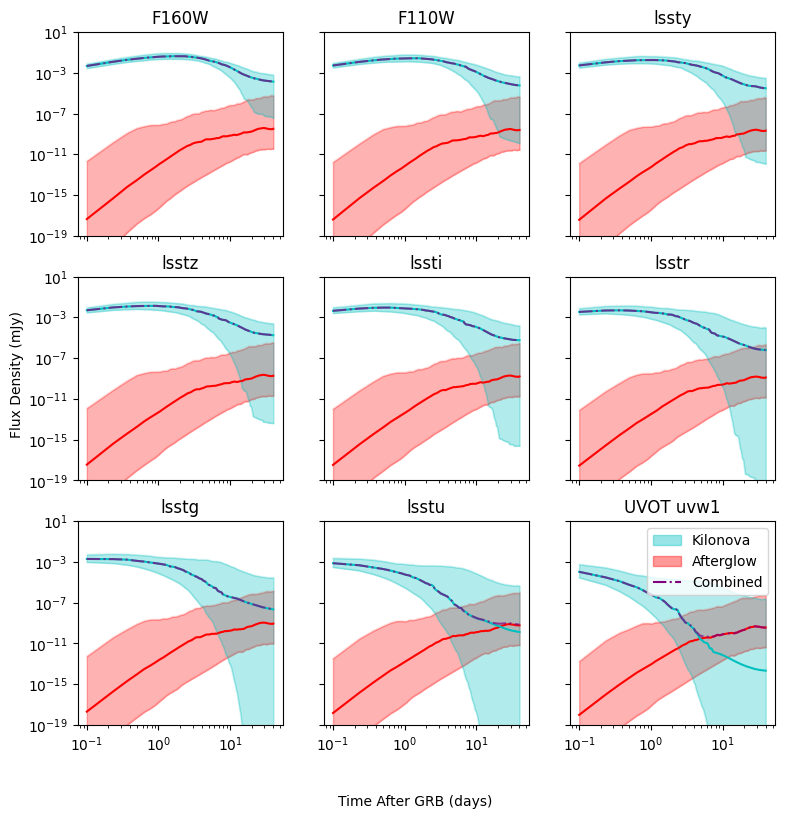

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9), sharex=True, sharey=True)
time= np.linspace(0.1,40,300)
#time2=np.linspace(0.1,40,150)

for j in range(3):
    
    for i in range(3):
        ax[j,i].loglog(time, loweroff[i+(3*j)], c='r',  alpha=0.1)
        ax[j,i].loglog(time, medianoff[i+(3*j)], c='r' )
        ax[j,i].loglog(time, upperoff[i+(3*j)], c='r',  alpha=0.1)
        ax[j,i].fill_between(time, loweroff[i+(3*j)], upperoff[i+(3*j)], color='r',  alpha=0.3)

        ax[j,i].loglog(time, lowerkn[i+(3*j)], c='c',  alpha=0.1)
        ax[j,i].loglog(time, mediankn[i+(3*j)], c='c')
        ax[j,i].loglog(time, upperkn[i+(3*j)], c='c',  alpha=0.1)
        ax[j,i].fill_between(time, lowerkn[i+(3*j)], upperkn[i+(3*j)], color='c', alpha=0.3)
    
        ax[j,i].loglog(time, np.array(medianoff[i+(3*j)])+mediankn[i+(3*j)], c='purple', ls='-.', alpha=0.7)
    
ax[0,0].set_title('F160W')
ax[0,1].set_title('F110W')
ax[0,2].set_title('lssty')
ax[1,0].set_title('lsstz')
ax[1,1].set_title('lssti')
ax[1,2].set_title('lsstr')
ax[2,0].set_title('lsstg')
ax[2,1].set_title('lsstu')
ax[2,2].set_title('UVOT uvw1')
#['F160W', 'F110W','lssty', 'lsstz','lssti', 'lsstr','lsstg','lsstu', 'uvot::uvw1']

kn = mpatches.Patch(color='c', label='Kilonova', alpha=0.4)
ag = mpatches.Patch(color='r', label='Afterglow', alpha=0.4)
#knline= Line2D([0],[0], ls='-', c='c', label='Kilonova median')
#agline= Line2D([0],[0], ls='-', c='r', label='Afterglow median')
both= Line2D([0],[0], ls='-.', c='purple', label='Combined')

ax[2,2].legend(handles=[kn,ag,both], loc='upper right')

fig.text(0.5, 0.02, 'Time After GRB (days)', ha='center')
fig.text(0.05, 0.5, 'Flux Density (mJy)', va='center', rotation='vertical')

plt.ylim(10e-20,10)
plt.savefig("off_twocomp.png", dpi='figure')

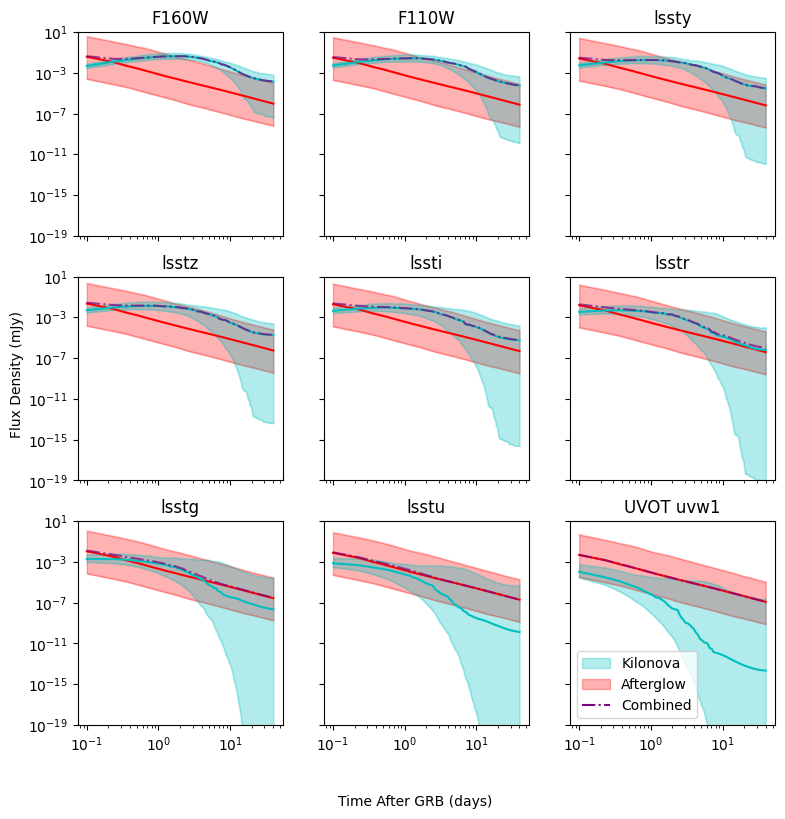

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9), sharex=True, sharey=True)
time= np.linspace(0.1,40,300)

for j in range(3):
    
    for i in range(3):
        ax[j,i].loglog(time, loweron[i+(3*j)], c='r',  alpha=0.1)
        ax[j,i].loglog(time, medianon[i+(3*j)], c='r' )
        ax[j,i].loglog(time, upperon[i+(3*j)], c='r',  alpha=0.1)
        ax[j,i].fill_between(time, loweron[i+(3*j)], upperon[i+(3*j)], color='r',  alpha=0.3)

        ax[j,i].loglog(time, lowerkn[i+(3*j)], c='c',  alpha=0.1)
        ax[j,i].loglog(time, mediankn[i+(3*j)], c='c')
        ax[j,i].loglog(time, upperkn[i+(3*j)], c='c',  alpha=0.1)
        ax[j,i].fill_between(time, lowerkn[i+(3*j)], upperkn[i+(3*j)], color='c', alpha=0.3)
    
        ax[j,i].loglog(time, np.array(medianon[i+(3*j)])+mediankn[i+(3*j)], c='purple', ls='-.', alpha=0.7)
    
ax[0,0].set_title('F160W')
ax[0,1].set_title('F110W')
ax[0,2].set_title('lssty')
ax[1,0].set_title('lsstz')
ax[1,1].set_title('lssti')
ax[1,2].set_title('lsstr')
ax[2,0].set_title('lsstg')
ax[2,1].set_title('lsstu')
ax[2,2].set_title('UVOT uvw1')

kn = mpatches.Patch(color='c', label='Kilonova', alpha=0.3)
ag = mpatches.Patch(color='r', label='Afterglow', alpha=0.3)
#knline= Line2D([0],[0], ls='-', c='c', label='Kilonova median')
#agline= Line2D([0],[0], ls='-', c='r', label='Afterglow median')
both= Line2D([0],[0], ls='-.', c='purple', label='Combined')

plt.legend(handles=[kn,ag,both])

fig.text(0.5, 0.02, 'Time After GRB (days)', ha='center')
fig.text(0.05, 0.5, 'Flux Density (mJy)', va='center', rotation='vertical')

plt.ylim(10e-20, 10)
plt.savefig("on_twocomp.png", dpi='figure')